In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [112]:
#reading the data
data = pd.read_csv("C://Users/Nikanshi/Downloads/energydata_complete.csv")
print(data.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1       

# Exploratory Data Analysis

In [113]:
print("Number of observations in dataset = {}".format(data.shape[0]))
print("Total number of columns = {}".format(data.columns.shape[0]))
print("Count of null values:-")
print(data.isnull().sum())

Number of observations in dataset = 19735
Total number of columns = 29
Count of null values:-
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [114]:
data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

           ...                 T9          RH_9         T_out   Press_mm_hg  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          19.485828     41.552401      7.411665    755.522602   
std        ...           2.014712      4.151497      5.317409      7.399441   
min        ...          14.890000     29.166667     -5.000000    729.300000   
25%        ...          18.000000     38.500000      3.666667    750.933333   
50%        ...          19.390000     40.900000      6.916667    756.100000   
75%        ...          20.600000     44.338095     10.408333    760.933333   
max        ...          24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

Observations
Temperature ranges for all home sensors is between 14.89℃ to 29.86℃ except for T6 for which it is -6.06℃ to 28.29℃. The reason for such low readings is that the sensor is kept outside.
Similarly, humudity ranges for all home sensors is between 20.60% to 63.36%. Except for RH_5 and RH_6, whose ranges are 29.82% to 96.32% and 1% to 99.9% respectively.
The reason behind this is that RH_5 is inside the bathroom,
And RH_6 is outside the building, explaining the high humidity values.
One interesting observation can be seen in Appliances column that although the max consumption is 1080Wh, 75% of values are less than 100Wh. This shows that there are fewer cases when Appliance energy consumption is very high.

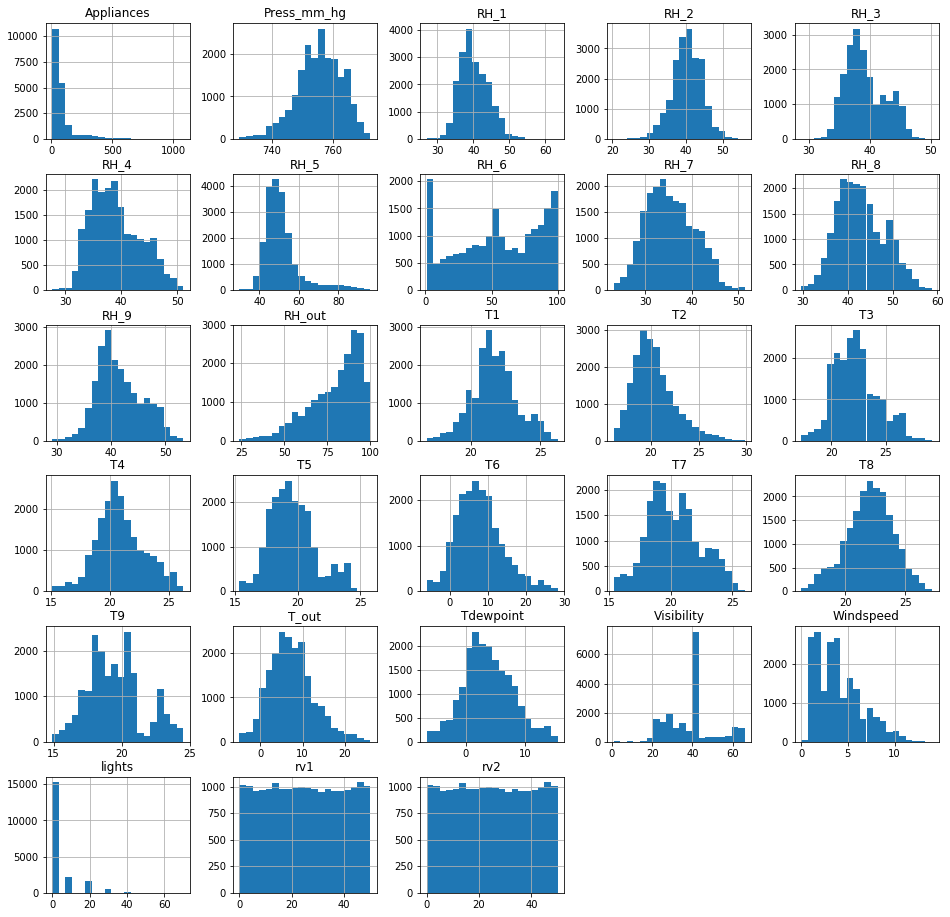

In [115]:
#Histograms for each column to understand distibution
histograms = data.hist(figsize=(16, 16), bins=20)

It can be observed from Histograms that:-

All humidity values except RH_6 and RH_out follow a Normal distribution. That is, all the readings from sensors inside the home are from a Normal distribution.
Similarly, all temperature readings follow a Normal distribution except for T9.
Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
Also, there is no similarity between our target variable, Appliances and the remaining 24 columns. Windspeed looks similar but the number of observations are different as seen from the y-axes of both plots.

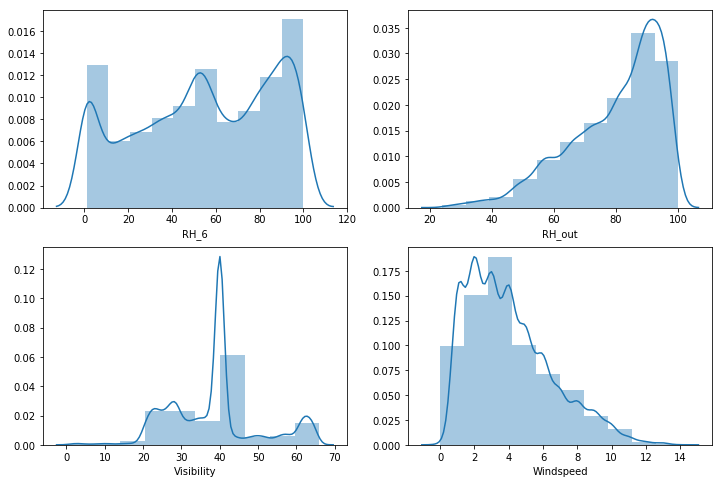

In [116]:
#focussed displots for RH_6 , RH_out , Visibility , Windspeed to inspect irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(data["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(data["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(data["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(data["Windspeed"],bins=10, ax=ax[1][1])

Humidity - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house
Visibilty - This column is negatively skewed
Windspeed - This column is postively skewed

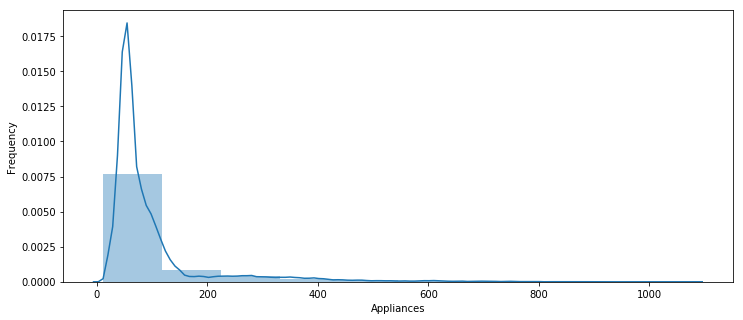

In [117]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(data["Appliances"] , bins=10 )

Appliance - This column is postively skewed , most the values are around mean 100 Wh . There are outliers in this column

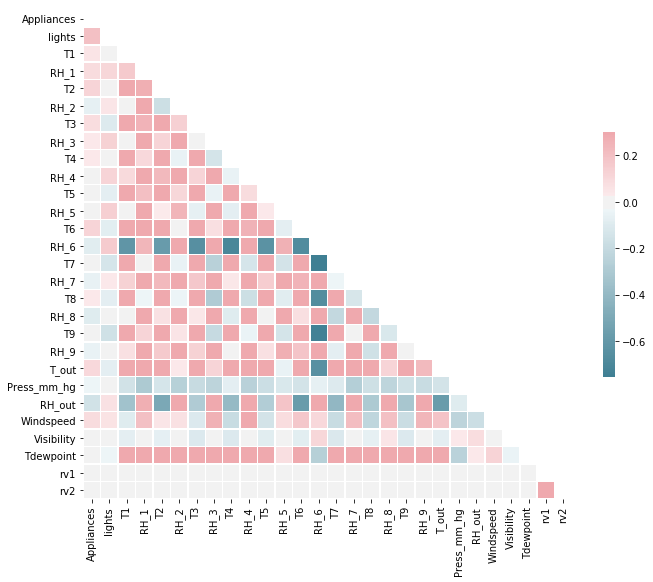

In [109]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Feautures to be dropped:
Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoortemperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values

Humidity - There are no significantly high correlation cases (> 0.9) for humidity sensors.

Random variables have no role to play

Lights- Alot of observations have a value of 0, this won't help find a significant relation sin the regression


In [118]:
#reading the modified dataset with 22 seleceted features
data = pd.read_csv("C://Users/Nikanshi/Downloads/energydata_modified.csv")
print(data.head())

   Appliances     T1       RH_1    T2       RH_2     T3       RH_3         T4  \
0          60  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000   
1          60  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000   
2          50  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667   
3          50  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000   
4          60  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000   

        RH_4         T5    ...           RH_7    T8       RH_8   RH_9  T_out  \
0  45.566667  17.166667    ...      41.626667  18.2  48.900000  45.53   6.60   
1  45.992500  17.166667    ...      41.560000  18.2  48.863333  45.56   6.48   
2  45.890000  17.166667    ...      41.433333  18.2  48.730000  45.50   6.37   
3  45.723333  17.166667    ...      41.290000  18.1  48.590000  45.40   6.25   
4  45.530000  17.200000    ...      41.230000  18.1  48.590000  45.40   6.13   

   Press_mm_hg  RH_out  Windspee

In [119]:
#Seprating features and target
X = data.iloc[:, 1:23]

y = data.iloc[:, 0:1].values

In [120]:
X.describe()

T1          RH_1            T2          RH_2            T3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     40.259739     20.341219     40.420420     22.267611   
std        1.606066      3.979299      2.192974      4.069813      2.006111   
min       16.790000     27.023333     16.100000     20.463333     17.200000   
25%       20.760000     37.333333     18.790000     37.900000     20.790000   
50%       21.600000     39.656667     20.000000     40.500000     22.100000   
75%       22.600000     43.066667     21.500000     43.260000     23.290000   
max       26.260000     63.360000     29.856667     56.026667     29.236000   

               RH_3            T4          RH_4            T5          RH_5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      39.242500     20.855335     39.026904     19.592106     50.949283   
std        3.254576      2.042884      4.341321      1.844623      9.022034   
min       28.766667     15.100000     27.660000     15.330000     29.815000   
25%       36.900000     19.530000     35.530000     18.277500     45.400000   
50%       38.530000     20.666667     38.400000     19.390000     49.090000   
75%       41.760000     22.100000     42.156667     20.619643     53.663333   
max       50.163333     26.200000     51.090000     25.795000     96.321667   

           ...               RH_7            T8          RH_8          RH_9  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          35.388200     22.029107     42.936165     41.552401   
std        ...           5.114208      1.956162      5.224361      4.151497   
min        ...          23.200000     16.306667     29.600000     29.166667   
25%        ...          31.500000     20.790000     39.066667     38.500000   
50%        ...          34.863333     22.100000     42.375000     40.900000   
75%        ...          39.000000     23.390000     46.536000     44.338095   
max        ...          51.400000     27.230000     58.780000     53.326667   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.412580    755.522602     79.750418      4.039752     38.330834   
std        5.318464      7.399441     14.901088      2.451221     11.794719   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.670000    750.933333     70.333333      2.000000     29.000000   
50%        6.920000    756.100000     83.666667      3.666667     40.000000   
75%       10.400000    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   

          Tdewpoint  
count  19735.000000  
mean       3.760995  
std        4.195248  
min       -6.600000  
25%        0.900000  
50%        3.430000  
75%        6.570000  
max       15.500000  

[8 rows x 22 columns]

In [121]:
X.head()

T1       RH_1    T2       RH_2     T3       RH_3         T4       RH_4  \
0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000  45.566667   
1  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000  45.992500   
2  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667  45.890000   
3  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000  45.723333   
4  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000  45.530000   

          T5   RH_5    ...           RH_7    T8       RH_8   RH_9  T_out  \
0  17.166667  55.20    ...      41.626667  18.2  48.900000  45.53   6.60   
1  17.166667  55.20    ...      41.560000  18.2  48.863333  45.56   6.48   
2  17.166667  55.09    ...      41.433333  18.2  48.730000  45.50   6.37   
3  17.166667  55.09    ...      41.290000  18.1  48.590000  45.40   6.25   
4  17.200000  55.09    ...      41.230000  18.1  48.590000  45.40   6.13   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  
0        733.5    92.0   7.000000   63.000000        5.3  
1        733.6    92.0   6.666667   59.166667        5.2  
2        733.7    92.0   6.333333   55.333333        5.1  
3        733.8    92.0   6.000000   51.500000        5.0  
4        733.9    92.0   5.666667   47.666667        4.9  

[5 rows x 22 columns]

In [122]:
y.shape

(19735, 1)

In [123]:
#Normalizing feautures
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
#Splitting the dataset in train and test/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 5)

Matrix Transformations

In [126]:
X_train.shape

(13222, 22)

In [127]:
X_train = X_train.T

In [128]:
X_train.shape

(22, 13222)

In [129]:
y_train.shape

(13222, 1)

In [130]:
y_train = y_train.T

In [131]:
y_train.shape

(1, 13222)

In [132]:
X_val = X_val.T

In [133]:
X_val.shape

(22, 6513)

In [134]:
y_val = y_val.T

In [135]:
y_val.shape

(1, 6513)

# Defining Linear Regression Model

In [136]:
def intialize_parameters(lenw):
    w = np.zeros((1,lenw))
    b = 0
    return w,b

In [137]:
def forward_prop(X,w,b): # w-->1xn, X--> nxm
    z= np.dot(w,X)+ b # z--> 1xm
    return z #--> z 1xm b--> [b b b...]

In [138]:
def cost_function(z,y):
    m = y.shape[1]
    J = (1/(2*m))*np.sum(np.square(z-y))
    return J

In [139]:
def back_prop(X,y,z):
    m = y.shape[1]
    dz = (1/m)*(z-y)
    dw = np.dot(dz,X.T)
    db = np.sum(dz)
    return dw,db

In [140]:
def gradient_descent_update(w,b,dw,db,learning_rate):
    w = w -learning_rate*dw
    b = b- learning_rate*db
    return w,b

In [141]:
def linear_reg_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    
    lenw = X_train.shape[0]
    w,b = intialize_parameters(lenw)
    
    costs_train = []
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]
    
    for i in range(1,epochs+1):
        z_train = forward_prop(X_train,w,b)
        cost_train = cost_function(z_train,y_train)
        dw,db = back_prop(X_train, y_train, z_train)
        w,b = gradient_descent_update(w,b,dw,db,learning_rate)
        
        #store training cost in a list
        if i%10==0:
            costs_train.append(cost_train)
        #MAE_train
        MAE_train = (1/m_train)*np.sum(np.abs(z_train-y_train))
        
        #costs_val, MAE_val
        z_val = forward_prop(X_val,w,b)
        cost_val = cost_function(z_val, y_val)
        MAE_val = (1/m_val)*np.sum(np.abs(z_val-y_val))
        
        #print cost_train,cost_val,MAE_train, MAE_val
        print('Epochs' +str(i)+' /'+str(epochs)+': ')
        print('Training cost '+str(cost_train)+'|' 'Validation cost ' +str(cost_val))
        print('Training MAE '+str(MAE_train)+ '|'+'Validation MAE ' +str(MAE_val))
        
    plt.plot(costs_train)
    plt.xlabel('Iterations(per tens)')
    plt.ylabel('Training Cost')
    plt.title('Learning Rate' +str(learning_rate))
    plt.show()

Epochs1 /500: 
Training cost 9886.90062017849|Validation cost 9311.684660501496
Training MAE 97.34987142641053|Validation MAE 88.59819121420287
Epochs2 /500: 
Training cost 8899.359817588216|Validation cost 8525.567523649295
Training MAE 87.64623250218587|Validation MAE 79.84805656498563
Epochs3 /500: 
Training cost 8120.0692984708485|Validation cost 7889.958218467141
Training MAE 78.90030139107502|Validation MAE 72.11097950634198
Epochs4 /500: 
Training cost 7489.865209620734|Validation cost 7373.831760620629
Training MAE 71.15046542952254|Validation MAE 65.50132608351176
Epochs5 /500: 
Training cost 6978.734255954637|Validation cost 6953.946330242789
Training MAE 64.52746407722798|Validation MAE 60.117865618508716
Epochs6 /500: 
Training cost 6563.577708827932|Validation cost 6611.811445391378
Training MAE 59.11466919744066|Validation MAE 55.93143509048113
Epochs7 /500: 
Training cost 6225.8985844303925|Validation cost 6332.575012810445
Training MAE 54.967951772437324|Validation MAE 

Epochs113 /500: 
Training cost 4516.683364926421|Validation cost 4857.818723886941
Training MAE 53.91932640303925|Validation MAE 54.812946302838846
Epochs114 /500: 
Training cost 4516.037849336969|Validation cost 4857.203325622099
Training MAE 53.916076211405716|Validation MAE 54.809821706115635
Epochs115 /500: 
Training cost 4515.400971589994|Validation cost 4856.596216759412
Training MAE 53.91285580504617|Validation MAE 54.8067204458503
Epochs116 /500: 
Training cost 4514.772552528494|Validation cost 4855.997221202069
Training MAE 53.90966432685497|Validation MAE 54.80362576013577
Epochs117 /500: 
Training cost 4514.152418487034|Validation cost 4855.406168324267
Training MAE 53.906488895864754|Validation MAE 54.800554139371116
Epochs118 /500: 
Training cost 4513.5404010615575|Validation cost 4854.822892741637
Training MAE 53.90331461117122|Validation MAE 54.797499827004955
Epochs119 /500: 
Training cost 4512.936336891056|Validation cost 4854.247234093538
Training MAE 53.9001796173586

Epochs221 /500: 
Training cost 4476.178034270973|Validation cost 4819.09650377204
Training MAE 53.684335495747035|Validation MAE 54.59164690555072
Epochs222 /500: 
Training cost 4475.9642583133445|Validation cost 4818.8898020066335
Training MAE 53.68304003965499|Validation MAE 54.59046877493244
Epochs223 /500: 
Training cost 4475.752199895658|Validation cost 4818.684710724132
Training MAE 53.68175167231284|Validation MAE 54.58931546990763
Epochs224 /500: 
Training cost 4475.54183922451|Validation cost 4818.481211469092
Training MAE 53.680470741047806|Validation MAE 54.588171730268115
Epochs225 /500: 
Training cost 4475.333156800148|Validation cost 4818.279286064715
Training MAE 53.67920925951352|Validation MAE 54.58704505065794
Epochs226 /500: 
Training cost 4475.126133411155|Validation cost 4818.07891660765
Training MAE 53.6779559653191|Validation MAE 54.585948395278514
Epochs227 /500: 
Training cost 4474.920750129252|Validation cost 4817.880085462928
Training MAE 53.676728457563286|V

Epochs299 /500: 
Training cost 4463.4856993097|Validation cost 4806.717555867687
Training MAE 53.61044733198969|Validation MAE 54.52625702270032
Epochs300 /500: 
Training cost 4463.363071498302|Validation cost 4806.5967096530085
Training MAE 53.60975859487317|Validation MAE 54.52563672058673
Epochs301 /500: 
Training cost 4463.241214007022|Validation cost 4806.476595520199
Training MAE 53.60907515626559|Validation MAE 54.52501578052771
Epochs302 /500: 
Training cost 4463.120119862391|Validation cost 4806.357207026032
Training MAE 53.608395981028885|Validation MAE 54.52439963006363
Epochs303 /500: 
Training cost 4462.999782174235|Validation cost 4806.238537804181
Training MAE 53.60771869262541|Validation MAE 54.523789704717956
Epochs304 /500: 
Training cost 4462.880194134477|Validation cost 4806.12058156411
Training MAE 53.607051905933666|Validation MAE 54.523199391195604
Epochs305 /500: 
Training cost 4462.76134901596|Validation cost 4806.003332089952
Training MAE 53.606387655360464|Va

Epochs383 /500: 
Training cost 4455.336251268736|Validation cost 4798.624665193911
Training MAE 53.568569861541974|Validation MAE 54.48694396238209
Epochs384 /500: 
Training cost 4455.260137122313|Validation cost 4798.548481871204
Training MAE 53.568211213254955|Validation MAE 54.486604654696585
Epochs385 /500: 
Training cost 4455.184413103578|Validation cost 4798.472678442138
Training MAE 53.56785758536873|Validation MAE 54.48626701911236
Epochs386 /500: 
Training cost 4455.109076417875|Validation cost 4798.397252300086
Training MAE 53.56750554655957|Validation MAE 54.485929250451484
Epochs387 /500: 
Training cost 4455.034124297859|Validation cost 4798.322200863353
Training MAE 53.567153072657085|Validation MAE 54.48559093579442
Epochs388 /500: 
Training cost 4454.9595540031605|Validation cost 4798.247521574873
Training MAE 53.56680104009641|Validation MAE 54.48525873573316
Epochs389 /500: 
Training cost 4454.885362820066|Validation cost 4798.173211901911
Training MAE 53.5664494788322

Epochs471 /500: 
Training cost 4449.8777895142375|Validation cost 4793.13695580657
Training MAE 53.54547796276921|Validation MAE 54.468422160850714
Epochs472 /500: 
Training cost 4449.827683273477|Validation cost 4793.086392106316
Training MAE 53.54529165765438|Validation MAE 54.46831044055965
Epochs473 /500: 
Training cost 4449.777797997941|Validation cost 4793.0360489832365
Training MAE 53.545104883786934|Validation MAE 54.46819804422693
Epochs474 /500: 
Training cost 4449.728132408081|Validation cost 4792.985925214155
Training MAE 53.54491764755128|Validation MAE 54.46808497978948
Epochs475 /500: 
Training cost 4449.678685234522|Validation cost 4792.936019585216
Training MAE 53.54473144584811|Validation MAE 54.46797335356598
Epochs476 /500: 
Training cost 4449.629455217957|Validation cost 4792.886330891795
Training MAE 53.54454487696017|Validation MAE 54.467862596033676
Epochs477 /500: 
Training cost 4449.58044110904|Validation cost 4792.836857938399
Training MAE 53.54435785481057|V

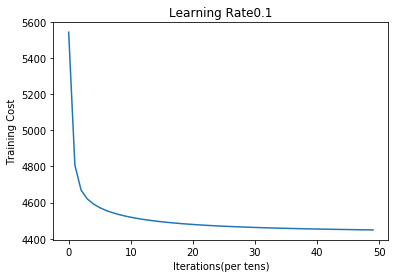

In [142]:
#Alpha = 0.1, iterations = 500
linear_reg_model(X_train,y_train,X_val,y_val,0.1,500)

Epochs1 /500: 
Training cost 9886.90062017849|Validation cost 8446.753793311398
Training MAE 97.34987142641053|Validation MAE 78.87954578412355
Epochs2 /500: 
Training cost 8046.199827627265|Validation cost 7272.20681681213
Training MAE 78.00736127424148|Validation MAE 64.16949315067197
Epochs3 /500: 
Training cost 6876.47923606315|Validation cost 6509.622133688734
Training MAE 63.16577580117829|Validation MAE 54.801157343267626
Epochs4 /500: 
Training cost 6125.678706572832|Validation cost 6016.096279342594
Training MAE 53.85825426649562|Validation MAE 50.09572582969762
Epochs5 /500: 
Training cost 5639.655468481928|Validation cost 5691.462370200058
Training MAE 49.16778437213397|Validation MAE 48.23823713239604
Epochs6 /500: 
Training cost 5322.250692514179|Validation cost 5476.408674847092
Training MAE 47.39534481988267|Validation MAE 47.99857745325873
Epochs7 /500: 
Training cost 5112.827011499462|Validation cost 5331.7991903407765
Training MAE 47.179963499152635|Validation MAE 48.

Epochs61 /500: 
Training cost 4511.526424967023|Validation cost 4852.345787342182
Training MAE 53.89447373569217|Validation MAE 54.786194437481846
Epochs62 /500: 
Training cost 4510.376479613818|Validation cost 4851.2644226012835
Training MAE 53.88827597295649|Validation MAE 54.780450660677566
Epochs63 /500: 
Training cost 4509.255156204511|Validation cost 4850.209841749926
Training MAE 53.88219924483527|Validation MAE 54.77486737018139
Epochs64 /500: 
Training cost 4508.161386592444|Validation cost 4849.181029971273
Training MAE 53.876259067266204|Validation MAE 54.76935870088539
Epochs65 /500: 
Training cost 4507.094159855121|Validation cost 4848.177027202983
Training MAE 53.870397078391726|Validation MAE 54.7639846705585
Epochs66 /500: 
Training cost 4506.052518085798|Validation cost 4847.196924155753
Training MAE 53.86466175652232|Validation MAE 54.7587467445235
Epochs67 /500: 
Training cost 4505.035552574269|Validation cost 4846.23985869366
Training MAE 53.85901819472552|Validatio

Epochs166 /500: 
Training cost 4459.863340537702|Validation cost 4803.036452232105
Training MAE 53.59128975028852|Validation MAE 54.50807211744717
Epochs167 /500: 
Training cost 4459.6623087227845|Validation cost 4802.8380430482275
Training MAE 53.59026709747061|Validation MAE 54.50711247772443
Epochs168 /500: 
Training cost 4459.463582342763|Validation cost 4802.6418275408705
Training MAE 53.58926299223171|Validation MAE 54.50616262418355
Epochs169 /500: 
Training cost 4459.267123664927|Validation cost 4802.447771173643
Training MAE 53.588275797254695|Validation MAE 54.50523392152133
Epochs170 /500: 
Training cost 4459.072895782181|Validation cost 4802.255840157126
Training MAE 53.587296974263225|Validation MAE 54.504327014676456
Epochs171 /500: 
Training cost 4458.880862591161|Validation cost 4802.0660014289015
Training MAE 53.58632938354021|Validation MAE 54.50344563505546
Epochs172 /500: 
Training cost 4458.690988770987|Validation cost 4801.87822263419
Training MAE 53.5853793567598

Epochs254 /500: 
Training cost 4448.181621234989|Validation cost 4791.380073592012
Training MAE 53.53919020493861|Validation MAE 54.464530278423595
Epochs255 /500: 
Training cost 4448.096177245869|Validation cost 4791.294105747604
Training MAE 53.538884233974116|Validation MAE 54.46433731651246
Epochs256 /500: 
Training cost 4448.011450239698|Validation cost 4791.208856221796
Training MAE 53.53857958626923|Validation MAE 54.46416330506921
Epochs257 /500: 
Training cost 4447.9274325603465|Validation cost 4791.1243176500875
Training MAE 53.53827780448005|Validation MAE 54.463988311135275
Epochs258 /500: 
Training cost 4447.84411666271|Validation cost 4791.040482769505
Training MAE 53.537977844828326|Validation MAE 54.46382479484957
Epochs259 /500: 
Training cost 4447.761495110614|Validation cost 4790.957344416727
Training MAE 53.53768623795835|Validation MAE 54.46367027300386
Epochs260 /500: 
Training cost 4447.679560574743|Validation cost 4790.874895526264
Training MAE 53.53740104695478

Epochs341 /500: 
Training cost 4442.806679881976|Validation cost 4785.980790513851
Training MAE 53.52526092876706|Validation MAE 54.46036725999191
Epochs342 /500: 
Training cost 4442.763358520495|Validation cost 4785.937514420118
Training MAE 53.52518153337355|Validation MAE 54.46034359503565
Epochs343 /500: 
Training cost 4442.720354328839|Validation cost 4785.894562850789
Training MAE 53.52510414532538|Validation MAE 54.46031890847631
Epochs344 /500: 
Training cost 4442.677664669428|Validation cost 4785.851933132429
Training MAE 53.525029590222886|Validation MAE 54.46029321783382
Epochs345 /500: 
Training cost 4442.635286931758|Validation cost 4785.809622617965
Training MAE 53.524954882587245|Validation MAE 54.46026654037977
Epochs346 /500: 
Training cost 4442.59321853204|Validation cost 4785.767628686352
Training MAE 53.524880476146365|Validation MAE 54.46023974605166
Epochs347 /500: 
Training cost 4442.55145691284|Validation cost 4785.7259487422425
Training MAE 53.52480745938605|Va

Epochs431 /500: 
Training cost 4439.924449345306|Validation cost 4783.126981691857
Training MAE 53.52085643944213|Validation MAE 54.46059040532214
Epochs432 /500: 
Training cost 4439.901572061567|Validation cost 4783.104634664075
Training MAE 53.520829357933785|Validation MAE 54.46062047346195
Epochs433 /500: 
Training cost 4439.878851957814|Validation cost 4783.0824481895725
Training MAE 53.5208030628633|Validation MAE 54.46065006682467
Epochs434 /500: 
Training cost 4439.856287876947|Validation cost 4783.0604210719
Training MAE 53.52077938872946|Validation MAE 54.46067919157896
Epochs435 /500: 
Training cost 4439.833878671378|Validation cost 4783.038552124366
Training MAE 53.5207553335613|Validation MAE 54.460707853817794
Epochs436 /500: 
Training cost 4439.811623202942|Validation cost 4783.016840169945
Training MAE 53.52073567356294|Validation MAE 54.46073605955945
Epochs437 /500: 
Training cost 4439.789520342799|Validation cost 4782.995284041179
Training MAE 53.52071568585452|Valid

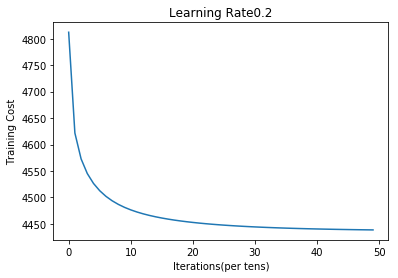

In [143]:
#Alpha = 0.2, iterations = 500
linear_reg_model(X_train,y_train,X_val,y_val,0.2,500)

Epochs1 /500: 
Training cost 9886.90062017849|Validation cost 10206.833691281763
Training MAE 97.34987142641053|Validation MAE 97.41578411451103
Epochs2 /500: 
Training cost 9782.099403351143|Validation cost 10103.256554998365
Training MAE 96.3794434227944|Validation MAE 96.44636709294208
Epochs3 /500: 
Training cost 9679.916288685745|Validation cost 10002.250500329612
Training MAE 95.41841860824212|Validation MAE 95.4871227346219
Epochs4 /500: 
Training cost 9580.221819534825|Validation cost 9903.692160300627
Training MAE 94.46672700284228|Validation MAE 94.53791263826217
Epochs5 /500: 
Training cost 9482.900342638313|Validation cost 9807.470800886089
Training MAE 93.52429747505373|Validation MAE 93.59860258525727
Epochs6 /500: 
Training cost 9387.84808728404|Validation cost 9713.486605351047
Training MAE 92.59105789469669|Validation MAE 92.66906228438847
Epochs7 /500: 
Training cost 9294.97152477149|Validation cost 9621.649205610478
Training MAE 91.66693527361365|Validation MAE 91.74

Epochs66 /500: 
Training cost 6163.740311912781|Validation cost 6520.707059924084
Training MAE 54.22984044470254|Validation MAE 54.867911861266485
Epochs67 /500: 
Training cost 6136.11263817815|Validation cost 6493.211420999561
Training MAE 53.914174264050004|Validation MAE 54.55968642470083
Epochs68 /500: 
Training cost 6109.0184471859675|Validation cost 6466.241459110137
Training MAE 53.607823637416|Validation MAE 54.26061187110443
Epochs69 /500: 
Training cost 6082.447058201986|Validation cost 6439.78670442852
Training MAE 53.31052462775741|Validation MAE 53.97072054318556
Epochs70 /500: 
Training cost 6056.388008434545|Validation cost 6413.836900888447
Training MAE 53.02301406044125|Validation MAE 53.68982242245242
Epochs71 /500: 
Training cost 6030.831048463846|Validation cost 6388.382001623321
Training MAE 52.74508006698985|Validation MAE 53.41873582183463
Epochs72 /500: 
Training cost 6005.766137775964|Validation cost 6363.41216451704
Training MAE 52.475858409055725|Validation M

Epochs173 /500: 
Training cost 4887.201826621319|Validation cost 5239.30731716802
Training MAE 48.19194890949671|Validation MAE 49.01934530147293
Epochs174 /500: 
Training cost 4883.344174832069|Validation cost 5235.35677729709
Training MAE 48.23156060895936|Validation MAE 49.057886895577376
Epochs175 /500: 
Training cost 4879.550768829025|Validation cost 5231.470777258135
Training MAE 48.271263341683785|Validation MAE 49.09659034560945
Epochs176 /500: 
Training cost 4875.820385270588|Validation cost 5227.648104459844
Training MAE 48.31100580140165|Validation MAE 49.135480034221516
Epochs177 /500: 
Training cost 4872.151824963008|Validation cost 5223.887570059533
Training MAE 48.35084735259857|Validation MAE 49.174322582557295
Epochs178 /500: 
Training cost 4868.543912376614|Validation cost 5220.188008489717
Training MAE 48.390739167885194|Validation MAE 49.21321617509657
Epochs179 /500: 
Training cost 4864.995495171838|Validation cost 5216.548276994237
Training MAE 48.430663597603946|

Epochs263 /500: 
Training cost 4698.909904024441|Validation cost 5044.412187869002
Training MAE 51.43118020567836|Validation MAE 52.2711185851485
Epochs264 /500: 
Training cost 4697.866657646046|Validation cost 5043.317088429584
Training MAE 51.458186869778906|Validation MAE 52.29834886262403
Epochs265 /500: 
Training cost 4696.835704265503|Validation cost 5042.2347200824
Training MAE 51.484914704713105|Validation MAE 52.32531485727563
Epochs266 /500: 
Training cost 4695.816834243096|Validation cost 5041.16487086479
Training MAE 51.511362162885895|Validation MAE 52.35200693856923
Epochs267 /500: 
Training cost 4694.809841915403|Validation cost 5040.107332771846
Training MAE 51.53758696186138|Validation MAE 52.37846036261759
Epochs268 /500: 
Training cost 4693.814525517234|Validation cost 5039.061901679412
Training MAE 51.56357031143347|Validation MAE 52.404695898131806
Epochs269 /500: 
Training cost 4692.8306871051145|Validation cost 5038.028377268597
Training MAE 51.589374386228|Valid

Epochs360 /500: 
Training cost 4633.9985244993495|Validation cost 4976.150621937018
Training MAE 53.171822264516145|Validation MAE 54.035416582472614
Epochs361 /500: 
Training cost 4633.563278210602|Validation cost 4975.694784572359
Training MAE 53.18243221450061|Validation MAE 54.046258697649776
Epochs362 /500: 
Training cost 4633.130857129797|Validation cost 4975.241986716525
Training MAE 53.192929769164614|Validation MAE 54.05697920209495
Epochs363 /500: 
Training cost 4632.701225572393|Validation cost 4974.79219084972
Training MAE 53.20330668944165|Validation MAE 54.06757485733645
Epochs364 /500: 
Training cost 4632.274348455664|Validation cost 4974.3453600667135
Training MAE 53.213586827056346|Validation MAE 54.078050524881704
Epochs365 /500: 
Training cost 4631.8501912874|Validation cost 4973.901458065536
Training MAE 53.22376062040701|Validation MAE 54.08840829490908
Epochs366 /500: 
Training cost 4631.428720154829|Validation cost 4973.460449136376
Training MAE 53.23381968509862

Epochs462 /500: 
Training cost 4599.877368400998|Validation cost 4940.768891807726
Training MAE 53.83110984886602|Validation MAE 54.70157794292334
Epochs463 /500: 
Training cost 4599.615576352606|Validation cost 4940.500926248647
Training MAE 53.83454658132797|Validation MAE 54.70501130890109
Epochs464 /500: 
Training cost 4599.354794261614|Validation cost 4940.234055640546
Training MAE 53.83795122122854|Validation MAE 54.70840868887869
Epochs465 /500: 
Training cost 4599.095014353102|Validation cost 4939.968271416289
Training MAE 53.841317346268646|Validation MAE 54.71176266014247
Epochs466 /500: 
Training cost 4598.836228948939|Validation cost 4939.703565112637
Training MAE 53.84464047792955|Validation MAE 54.71507931376713
Epochs467 /500: 
Training cost 4598.578430466205|Validation cost 4939.439928368602
Training MAE 53.8479180346913|Validation MAE 54.71835338265452
Epochs468 /500: 
Training cost 4598.3216114156385|Validation cost 4939.177352923834
Training MAE 53.8511543409069|Vali

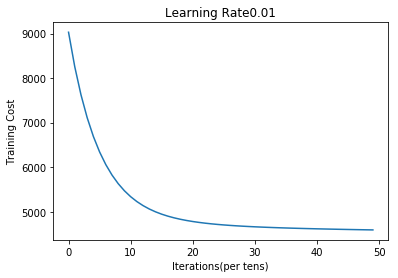

In [165]:
#Alpha = 0.01, iterations = 500
linear_reg_model(X_train,y_train,X_val,y_val,0.01,500)

Epochs1 /500: 
Training cost 9886.90062017849|Validation cost 10302.429864770635
Training MAE 97.34987142641053|Validation MAE 98.29754340454184
Epochs2 /500: 
Training cost 9876.360027130073|Validation cost 10291.767553287156
Training MAE 97.25282862604892|Validation MAE 98.19967330532306
Epochs3 /500: 
Training cost 9865.846239829814|Validation cost 10281.132830832761
Training MAE 97.15587985757793|Validation MAE 98.10190621847373
Epochs4 /500: 
Training cost 9855.359118444925|Validation cost 10270.525550338521
Training MAE 97.0590250510177|Validation MAE 98.00424200158001
Epochs5 /500: 
Training cost 9844.89852471993|Validation cost 10259.94556637771
Training MAE 96.9622641362731|Validation MAE 97.90668051267116
Epochs6 /500: 
Training cost 9834.464321953785|Validation cost 10249.392735142363
Training MAE 96.86559704313545|Validation MAE 97.8092216102168
Epochs7 /500: 
Training cost 9824.056374977374|Validation cost 10238.86691442021
Training MAE 96.76902370128393|Validation MAE 97.

Epochs99 /500: 
Training cost 8964.509103962266|Validation cost 9370.932995947143
Training MAE 88.2756430262412|Validation MAE 89.17566493887661
Epochs100 /500: 
Training cost 8956.10703801246|Validation cost 9362.45970292573
Training MAE 88.18747000052433|Validation MAE 89.08727189210468
Epochs101 /500: 
Training cost 8947.723055093962|Validation cost 9354.004804758577
Training MAE 88.09940708754583|Validation MAE 88.99896965467843
Epochs102 /500: 
Training cost 8939.357099234017|Validation cost 9345.56824252323
Training MAE 88.01143319181209|Validation MAE 88.91075811719291
Epochs103 /500: 
Training cost 8931.009114862532|Validation cost 9337.149957727299
Training MAE 87.92354588605959|Validation MAE 88.82263717049462
Epochs104 /500: 
Training cost 8922.679046806905|Validation cost 9328.749892303027
Training MAE 87.8357450951359|Validation MAE 88.73460670568002
Epochs105 /500: 
Training cost 8914.366840286893|Validation cost 9320.367988601938
Training MAE 87.7480307438753|Validation 

Epochs198 /500: 
Training cost 8212.862195659918|Validation cost 8613.372476588658
Training MAE 79.96656904596774|Validation MAE 80.8551770707442
Epochs199 /500: 
Training cost 8206.02686978447|Validation cost 8606.486000303004
Training MAE 79.88694607401627|Validation MAE 80.77562022152048
Epochs200 /500: 
Training cost 8199.205447750244|Validation cost 8599.613549248832
Training MAE 79.8074019298121|Validation MAE 80.69617282242852
Epochs201 /500: 
Training cost 8192.39789697302|Validation cost 8592.755089697903
Training MAE 79.72793654104822|Validation MAE 80.61680567214545
Epochs202 /500: 
Training cost 8185.604184999156|Validation cost 8585.910588063784
Training MAE 79.6485498354396|Validation MAE 80.53751868383242
Epochs203 /500: 
Training cost 8178.824279504378|Validation cost 8579.080010900514
Training MAE 79.5692417407233|Validation MAE 80.45831177078863
Epochs204 /500: 
Training cost 8172.058148292548|Validation cost 8572.263324901302
Training MAE 79.49001218465904|Validation

Epochs292 /500: 
Training cost 7627.090046244358|Validation cost 8023.198700480534
Training MAE 72.87740162358148|Validation MAE 73.77384418803024
Epochs293 /500: 
Training cost 7621.4337800676685|Validation cost 8017.498929963126
Training MAE 72.80659493358708|Validation MAE 73.70315258175914
Epochs294 /500: 
Training cost 7615.788801737884|Validation cost 8011.810498848778
Training MAE 72.73590044613566|Validation MAE 73.63254735870949
Epochs295 /500: 
Training cost 7610.155087261184|Validation cost 8006.133382707531
Training MAE 72.66530825248407|Validation MAE 73.5620250568798
Epochs296 /500: 
Training cost 7604.5326127084545|Validation cost 8000.467557178807
Training MAE 72.59482910445878|Validation MAE 73.49158129812676
Epochs297 /500: 
Training cost 7598.921354214916|Validation cost 7994.812997970986
Training MAE 72.5244350208023|Validation MAE 73.42122061309267
Epochs298 /500: 
Training cost 7593.321287979772|Validation cost 7989.169680861022
Training MAE 72.45412898650581|Vali

Epochs386 /500: 
Training cost 7141.70428348047|Validation cost 7533.902532845276
Training MAE 66.65590696747039|Validation MAE 67.5645378993086
Epochs387 /500: 
Training cost 7137.0119549533965|Validation cost 7529.170150611424
Training MAE 66.59469141485312|Validation MAE 67.50348868183397
Epochs388 /500: 
Training cost 7132.328903187901|Validation cost 7524.447071234777
Training MAE 66.53357491131848|Validation MAE 67.44253088104117
Epochs389 /500: 
Training cost 7127.655109106357|Validation cost 7519.7332754914705
Training MAE 66.472556368747|Validation MAE 67.38169850833867
Epochs390 /500: 
Training cost 7122.990553674141|Validation cost 7515.028744202511
Training MAE 66.41163905766307|Validation MAE 67.32100226498041
Epochs391 /500: 
Training cost 7118.335217899491|Validation cost 7510.333458233601
Training MAE 66.35086666560476|Validation MAE 67.26040797772555
Epochs392 /500: 
Training cost 7113.689082833361|Validation cost 7505.647398494988
Training MAE 66.29022184175138|Valida

Epochs482 /500: 
Training cost 6730.951896195902|Validation cost 7119.408267915425
Training MAE 61.2731588264628|Validation MAE 62.214391707748064
Epochs483 /500: 
Training cost 6727.068865159234|Validation cost 7115.487234240639
Training MAE 61.22232179209112|Validation MAE 62.16409158154444
Epochs484 /500: 
Training cost 6723.193457915089|Validation cost 7111.573842706687
Training MAE 61.1715893200614|Validation MAE 62.11390634586771
Epochs485 /500: 
Training cost 6719.325658978588|Validation cost 7107.668077795699
Training MAE 61.12097760222137|Validation MAE 62.06384126832994
Epochs486 /500: 
Training cost 6715.465452897573|Validation cost 7103.769924023197
Training MAE 61.07049131252376|Validation MAE 62.01388121473026
Epochs487 /500: 
Training cost 6711.612824252531|Validation cost 7099.879365938002
Training MAE 61.02011037348664|Validation MAE 61.96404536881599
Epochs488 /500: 
Training cost 6707.767757656523|Validation cost 7095.996388122149
Training MAE 60.96984829219342|Valid

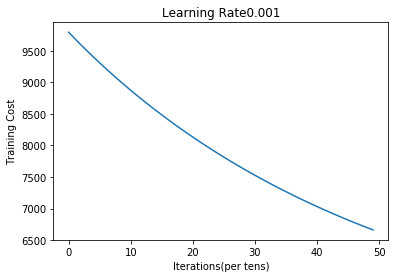

In [166]:
#Alpha = 0.001, iterations = 500
linear_reg_model(X_train,y_train,X_val,y_val,0.001,500)

Epochs1 /10000: 
Training cost 9886.90062017849|Validation cost 9311.684660501496
Training MAE 97.34987142641053|Validation MAE 88.59819121420287
Epochs2 /10000: 
Training cost 8899.359817588216|Validation cost 8525.567523649295
Training MAE 87.64623250218587|Validation MAE 79.84805656498563
Epochs3 /10000: 
Training cost 8120.0692984708485|Validation cost 7889.958218467141
Training MAE 78.90030139107502|Validation MAE 72.11097950634198
Epochs4 /10000: 
Training cost 7489.865209620734|Validation cost 7373.831760620629
Training MAE 71.15046542952254|Validation MAE 65.50132608351176
Epochs5 /10000: 
Training cost 6978.734255954637|Validation cost 6953.946330242789
Training MAE 64.52746407722798|Validation MAE 60.117865618508716
Epochs6 /10000: 
Training cost 6563.577708827932|Validation cost 6611.811445391378
Training MAE 59.11466919744066|Validation MAE 55.93143509048113
Epochs7 /10000: 
Training cost 6225.8985844303925|Validation cost 6332.575012810445
Training MAE 54.967951772437324|V

Epochs139 /10000: 
Training cost 4502.310740035664|Validation cost 4844.123594964584
Training MAE 53.84237262079797|Validation MAE 54.74111120860979
Epochs140 /10000: 
Training cost 4501.843063930627|Validation cost 4843.677926507621
Training MAE 53.839699633462004|Validation MAE 54.7387837978945
Epochs141 /10000: 
Training cost 4501.380693911982|Validation cost 4843.237289989546
Training MAE 53.83705417322962|Validation MAE 54.736457694220334
Epochs142 /10000: 
Training cost 4500.923541578105|Validation cost 4842.801599687497
Training MAE 53.8344589745991|Validation MAE 54.73414478316707
Epochs143 /10000: 
Training cost 4500.4715205875345|Validation cost 4842.370771926519
Training MAE 53.831889555513854|Validation MAE 54.731840060474134
Epochs144 /10000: 
Training cost 4500.024546592825|Validation cost 4841.944725013285
Training MAE 53.82934971481443|Validation MAE 54.72953800281513
Epochs145 /10000: 
Training cost 4499.582537177126|Validation cost 4841.5233791725705
Training MAE 53.8

Epochs246 /10000: 
Training cost 4471.30682400371|Validation cost 4814.372925524546
Training MAE 53.65493877240351|Validation MAE 54.56571459990965
Epochs247 /10000: 
Training cost 4471.130662368702|Validation cost 4814.201530165911
Training MAE 53.6538563647415|Validation MAE 54.56477096994599
Epochs248 /10000: 
Training cost 4470.955800634786|Validation cost 4814.031356897084
Training MAE 53.652781557937885|Validation MAE 54.56383030340191
Epochs249 /10000: 
Training cost 4470.782224988969|Validation cost 4813.862392906923
Training MAE 53.65171031173979|Validation MAE 54.56289513758447
Epochs250 /10000: 
Training cost 4470.609921807966|Validation cost 4813.694625562241
Training MAE 53.6506551654923|Validation MAE 54.56195944082183
Epochs251 /10000: 
Training cost 4470.438877655069|Validation cost 4813.528042404788
Training MAE 53.64963241428363|Validation MAE 54.56102934379346
Epochs252 /10000: 
Training cost 4470.269079277056|Validation cost 4813.362631148297
Training MAE 53.6486249

Epochs344 /10000: 
Training cost 4458.642204737376|Validation cost 4801.923034644206
Training MAE 53.58483835545415|Validation MAE 54.50244737580222
Epochs345 /10000: 
Training cost 4458.548362645857|Validation cost 4801.829697919882
Training MAE 53.58437311488928|Validation MAE 54.50200733974125
Epochs346 /10000: 
Training cost 4458.455045095267|Validation cost 4801.736865982119
Training MAE 53.58391281590605|Validation MAE 54.5015717169724
Epochs347 /10000: 
Training cost 4458.36224790928|Validation cost 4801.644534960695
Training MAE 53.58345235724582|Validation MAE 54.50113543630828
Epochs348 /10000: 
Training cost 4458.26996695632|Validation cost 4801.5527010263895
Training MAE 53.58299183314531|Validation MAE 54.50069975831325
Epochs349 /10000: 
Training cost 4458.178198148975|Validation cost 4801.46136039044
Training MAE 53.58253381321978|Validation MAE 54.500269660366506
Epochs350 /10000: 
Training cost 4458.08693744342|Validation cost 4801.37050930401
Training MAE 53.582075395

Epochs434 /10000: 
Training cost 4451.899767722687|Validation cost 4795.174986184255
Training MAE 53.553188749982716|Validation MAE 54.47355326196024
Epochs435 /10000: 
Training cost 4451.840482711957|Validation cost 4795.1153064796345
Training MAE 53.552954210725325|Validation MAE 54.47336918126507
Epochs436 /10000: 
Training cost 4451.781474243249|Validation cost 4795.055900142515
Training MAE 53.5527266902629|Validation MAE 54.47319553057764
Epochs437 /10000: 
Training cost 4451.722740574018|Validation cost 4794.99676552639
Training MAE 53.55249899501351|Validation MAE 54.47302604168376
Epochs438 /10000: 
Training cost 4451.664279976818|Validation cost 4794.937900998543
Training MAE 53.5522712906922|Validation MAE 54.47285628619704
Epochs439 /10000: 
Training cost 4451.606090739142|Validation cost 4794.879304939895
Training MAE 53.552043564413694|Validation MAE 54.47268960952621
Epochs440 /10000: 
Training cost 4451.5481711632565|Validation cost 4794.820975744857
Training MAE 53.551

Epochs529 /10000: 
Training cost 4447.301285594248|Validation cost 4790.534698436296
Training MAE 53.53600920365067|Validation MAE 54.46288965416509
Epochs530 /10000: 
Training cost 4447.262155032754|Validation cost 4790.495158661894
Training MAE 53.53588983836784|Validation MAE 54.462838139751696
Epochs531 /10000: 
Training cost 4447.223185286172|Validation cost 4790.45578144682
Training MAE 53.53577053549724|Validation MAE 54.462787364966935
Epochs532 /10000: 
Training cost 4447.184375525299|Validation cost 4790.416565982587
Training MAE 53.53565315636517|Validation MAE 54.462744159039815
Epochs533 /10000: 
Training cost 4447.145724926708|Validation cost 4790.377511466061
Training MAE 53.53553566939408|Validation MAE 54.4627015232209
Epochs534 /10000: 
Training cost 4447.107232672694|Validation cost 4790.338617099425
Training MAE 53.53541858001099|Validation MAE 54.46265959841785
Epochs535 /10000: 
Training cost 4447.0688979512215|Validation cost 4790.2998820901175
Training MAE 53.53

Epochs625 /10000: 
Training cost 4444.176008797382|Validation cost 4787.379936366995
Training MAE 53.52777567045993|Validation MAE 54.46073145763598
Epochs626 /10000: 
Training cost 4444.149214697877|Validation cost 4787.35294964551
Training MAE 53.52772290985068|Validation MAE 54.46071948713927
Epochs627 /10000: 
Training cost 4444.122522159189|Validation cost 4787.326066901559
Training MAE 53.52766984439575|Validation MAE 54.46070714797119
Epochs628 /10000: 
Training cost 4444.095930729552|Validation cost 4787.2992876813205
Training MAE 53.52761710266863|Validation MAE 54.460694443328286
Epochs629 /10000: 
Training cost 4444.069439959772|Validation cost 4787.272611533442
Training MAE 53.52756461421925|Validation MAE 54.460681376383526
Epochs630 /10000: 
Training cost 4444.043049403223|Validation cost 4787.246038009025
Training MAE 53.52751305705509|Validation MAE 54.46066896366355
Epochs631 /10000: 
Training cost 4444.016758615814|Validation cost 4787.219566661605
Training MAE 53.527

Epochs718 /10000: 
Training cost 4442.066648491428|Validation cost 4785.262494481803
Training MAE 53.523861501367605|Validation MAE 54.45975871797217
Epochs719 /10000: 
Training cost 4442.047652746687|Validation cost 4785.243512175447
Training MAE 53.52382922365055|Validation MAE 54.45974491044945
Epochs720 /10000: 
Training cost 4442.028725495856|Validation cost 4785.224600300641
Training MAE 53.523796933737295|Validation MAE 54.45973090473768
Epochs721 /10000: 
Training cost 4442.009866462572|Validation cost 4785.205758574208
Training MAE 53.52376444480306|Validation MAE 54.459716702568834
Epochs722 /10000: 
Training cost 4441.991075371824|Validation cost 4785.186986714305
Training MAE 53.52373185526634|Validation MAE 54.45970230566277
Epochs723 /10000: 
Training cost 4441.972351949939|Validation cost 4785.168284440418
Training MAE 53.52370095277718|Validation MAE 54.45968884904011
Epochs724 /10000: 
Training cost 4441.953695924576|Validation cost 4785.149651473355
Training MAE 53.52

Epochs816 /10000: 
Training cost 4440.492938950106|Validation cost 4783.698261894648
Training MAE 53.52145613615753|Validation MAE 54.45984320952434
Epochs817 /10000: 
Training cost 4440.479520378436|Validation cost 4783.685013970992
Training MAE 53.52143951383574|Validation MAE 54.459855658766024
Epochs818 /10000: 
Training cost 4440.466148538284|Validation cost 4783.671814052015
Training MAE 53.52142325611385|Validation MAE 54.45986796599902
Epochs819 /10000: 
Training cost 4440.452823253368|Validation cost 4783.658661955126
Training MAE 53.52140687133865|Validation MAE 54.4598801322143
Epochs820 /10000: 
Training cost 4440.4395443481635|Validation cost 4783.645557498508
Training MAE 53.52139087635247|Validation MAE 54.45989215839653
Epochs821 /10000: 
Training cost 4440.426311647905|Validation cost 4783.632500501116
Training MAE 53.52137565333337|Validation MAE 54.45990404552406
Epochs822 /10000: 
Training cost 4440.413124978576|Validation cost 4783.619490782673
Training MAE 53.5213

Epochs919 /10000: 
Training cost 4439.328171666468|Validation cost 4782.556717109101
Training MAE 53.52043953075254|Validation MAE 54.461359361047506
Epochs920 /10000: 
Training cost 4439.318759034853|Validation cost 4782.547576099195
Training MAE 53.5204393533342|Validation MAE 54.46137327303879
Epochs921 /10000: 
Training cost 4439.30937835738|Validation cost 4782.538467756633
Training MAE 53.52043908588897|Validation MAE 54.46138709626511
Epochs922 /10000: 
Training cost 4439.300029518773|Validation cost 4782.529391961622
Training MAE 53.520439479429434|Validation MAE 54.461400831281914
Epochs923 /10000: 
Training cost 4439.290712404207|Validation cost 4782.520348594845
Training MAE 53.520441031118295|Validation MAE 54.461414478641274
Epochs924 /10000: 
Training cost 4439.281426899313|Validation cost 4782.51133753745
Training MAE 53.52044249031434|Validation MAE 54.461428038892016
Epochs925 /10000: 
Training cost 4439.272172890173|Validation cost 4782.502358671057
Training MAE 53.52

Epochs1022 /10000: 
Training cost 4438.507980843594|Validation cost 4781.767525753407
Training MAE 53.52125498870657|Validation MAE 54.46287396744467
Epochs1023 /10000: 
Training cost 4438.501326002498|Validation cost 4781.761195219331
Training MAE 53.521267532656964|Validation MAE 54.462889849282746
Epochs1024 /10000: 
Training cost 4438.494693305483|Validation cost 4781.754887163091
Training MAE 53.52128000087546|Validation MAE 54.46290567067074
Epochs1025 /10000: 
Training cost 4438.488082674875|Validation cost 4781.7486015040995
Training MAE 53.52129239378643|Validation MAE 54.46292143193555
Epochs1026 /10000: 
Training cost 4438.481494033286|Validation cost 4781.742338162076
Training MAE 53.52130471181199|Validation MAE 54.46293713340222
Epochs1027 /10000: 
Training cost 4438.4749273036205|Validation cost 4781.736097057038
Training MAE 53.52131695537195|Validation MAE 54.46295277539405
Epochs1028 /10000: 
Training cost 4438.468382409064|Validation cost 4781.729878109305
Training M

Epochs1118 /10000: 
Training cost 4437.959887192418|Validation cost 4781.251713240151
Training MAE 53.522510762353626|Validation MAE 54.464414739875494
Epochs1119 /10000: 
Training cost 4437.95504164321|Validation cost 4781.247212524726
Training MAE 53.52252308597827|Validation MAE 54.46443057562178
Epochs1120 /10000: 
Training cost 4437.950211945994|Validation cost 4781.242727770136
Training MAE 53.522535356739546|Validation MAE 54.46444704046619
Epochs1121 /10000: 
Training cost 4437.945398046119|Validation cost 4781.238258919902
Training MAE 53.522547574907726|Validation MAE 54.4644643748881
Epochs1122 /10000: 
Training cost 4437.940599889134|Validation cost 4781.233805917753
Training MAE 53.5225597407517|Validation MAE 54.46448166247111
Epochs1123 /10000: 
Training cost 4437.935817420781|Validation cost 4781.229368707619
Training MAE 53.52257207356971|Validation MAE 54.46449890342895
Epochs1124 /10000: 
Training cost 4437.931050586999|Validation cost 4781.224947233637
Training MAE 

Epochs1215 /10000: 
Training cost 4437.556253401544|Validation cost 4780.881795056973
Training MAE 53.52383843072911|Validation MAE 54.46613428198549
Epochs1216 /10000: 
Training cost 4437.55271759166|Validation cost 4780.878607359487
Training MAE 53.523853123789095|Validation MAE 54.46615166608764
Epochs1217 /10000: 
Training cost 4437.549193146304|Validation cost 4780.875430995759
Training MAE 53.52386801102955|Validation MAE 54.466169013499695
Epochs1218 /10000: 
Training cost 4437.54568002679|Validation cost 4780.872265926007
Training MAE 53.52388300899058|Validation MAE 54.46618632436304
Epochs1219 /10000: 
Training cost 4437.542178194565|Validation cost 4780.869112110593
Training MAE 53.52389796325136|Validation MAE 54.466203598818446
Epochs1220 /10000: 
Training cost 4437.538687611213|Validation cost 4780.865969510021
Training MAE 53.52391401412973|Validation MAE 54.46622173763001
Epochs1221 /10000: 
Training cost 4437.535208238453|Validation cost 4780.862838084938
Training MAE 

Epochs1314 /10000: 
Training cost 4437.255747853537|Validation cost 4780.6154530511485
Training MAE 53.52550244180265|Validation MAE 54.46814386756399
Epochs1315 /10000: 
Training cost 4437.2531690443375|Validation cost 4780.613214866523
Training MAE 53.5255201900659|Validation MAE 54.46816530628279
Epochs1316 /10000: 
Training cost 4437.250598357865|Validation cost 4780.6109846913005
Training MAE 53.52553853101339|Validation MAE 54.468186707884946
Epochs1317 /10000: 
Training cost 4437.24803576675|Validation cost 4780.608762497505
Training MAE 53.52555683107423|Validation MAE 54.468208072481055
Epochs1318 /10000: 
Training cost 4437.24548124372|Validation cost 4780.606548257261
Training MAE 53.52557509038466|Validation MAE 54.468229400181286
Epochs1319 /10000: 
Training cost 4437.242934761595|Validation cost 4780.60434194279
Training MAE 53.52559330908035|Validation MAE 54.46825069109542
Epochs1320 /10000: 
Training cost 4437.240396293293|Validation cost 4780.602143526412
Training MAE

Epochs1410 /10000: 
Training cost 4437.041606937951|Validation cost 4780.433420385551
Training MAE 53.52724794706737|Validation MAE 54.47015921895661
Epochs1411 /10000: 
Training cost 4437.039695611229|Validation cost 4780.431836531717
Training MAE 53.52726709464409|Validation MAE 54.470181298513346
Epochs1412 /10000: 
Training cost 4437.037790167904|Validation cost 4780.430258404918
Training MAE 53.52728620495823|Validation MAE 54.470203343135886
Epochs1413 /10000: 
Training cost 4437.035890588333|Validation cost 4780.428685985202
Training MAE 53.52730527811469|Validation MAE 54.470225352912394
Epochs1414 /10000: 
Training cost 4437.033996852942|Validation cost 4780.427119252687
Training MAE 53.52732431421797|Validation MAE 54.47024732793074
Epochs1415 /10000: 
Training cost 4437.032108942223|Validation cost 4780.425558187559
Training MAE 53.52734331337219|Validation MAE 54.47026926827848
Epochs1416 /10000: 
Training cost 4437.030226836735|Validation cost 4780.424002770076
Training MA

Epochs1507 /10000: 
Training cost 4436.8809244856875|Validation cost 4780.303736848648
Training MAE 53.5290735488873|Validation MAE 54.47222992276533
Epochs1508 /10000: 
Training cost 4436.879501568794|Validation cost 4780.302625116587
Training MAE 53.52909166601278|Validation MAE 54.47225068966336
Epochs1509 /10000: 
Training cost 4436.878082911859|Validation cost 4780.301517467819
Training MAE 53.52910975381024|Validation MAE 54.47227142585544
Epochs1510 /10000: 
Training cost 4436.876668500793|Validation cost 4780.30041388814
Training MAE 53.52912780947001|Validation MAE 54.47229213141095
Epochs1511 /10000: 
Training cost 4436.87525832156|Validation cost 4780.2993143633885
Training MAE 53.52914583307271|Validation MAE 54.472312806399124
Epochs1512 /10000: 
Training cost 4436.873852360168|Validation cost 4780.298218879455
Training MAE 53.529163824698635|Validation MAE 54.47233345088892
Epochs1513 /10000: 
Training cost 4436.872450602674|Validation cost 4780.297127422278
Training MAE 

Epochs1592 /10000: 
Training cost 4436.773885292698|Validation cost 4780.222508385944
Training MAE 53.53055082873231|Validation MAE 54.47397410522244
Epochs1593 /10000: 
Training cost 4436.772778608054|Validation cost 4780.221697566014
Training MAE 53.53056800297702|Validation MAE 54.473995605061695
Epochs1594 /10000: 
Training cost 4436.771675142155|Validation cost 4780.220889782399
Training MAE 53.530585148285084|Validation MAE 54.47401707414725
Epochs1595 /10000: 
Training cost 4436.7705748844555|Validation cost 4780.220085024533
Training MAE 53.5306022647228|Validation MAE 54.47403851254186
Epochs1596 /10000: 
Training cost 4436.769477824446|Validation cost 4780.21928328189
Training MAE 53.5306193523563|Validation MAE 54.47405992030808
Epochs1597 /10000: 
Training cost 4436.768383951657|Validation cost 4780.218484543976
Training MAE 53.53063641125147|Validation MAE 54.47408129750833
Epochs1598 /10000: 
Training cost 4436.767293255646|Validation cost 4780.217688800339
Training MAE 5

Epochs1683 /10000: 
Training cost 4436.685166960567|Validation cost 4780.1599665816475
Training MAE 53.53203356168236|Validation MAE 54.4758836441212
Epochs1684 /10000: 
Training cost 4436.684314039799|Validation cost 4780.159392945332
Training MAE 53.53204904170471|Validation MAE 54.47590403590706
Epochs1685 /10000: 
Training cost 4436.683463510894|Validation cost 4780.158821519953
Training MAE 53.53206449690693|Validation MAE 54.475924399708404
Epochs1686 /10000: 
Training cost 4436.6826153661095|Validation cost 4780.1582522978115
Training MAE 53.532079927341854|Validation MAE 54.475944735578345
Epochs1687 /10000: 
Training cost 4436.681769597727|Validation cost 4780.15768527124
Training MAE 53.53209533306214|Validation MAE 54.475965043569836
Epochs1688 /10000: 
Training cost 4436.680926198054|Validation cost 4780.157120432594
Training MAE 53.532110714120314|Validation MAE 54.47598532373574
Epochs1689 /10000: 
Training cost 4436.680085159425|Validation cost 4780.156557774258
Training

Epochs1778 /10000: 
Training cost 4436.613825601026|Validation cost 4780.114357622626
Training MAE 53.533427090881254|Validation MAE 54.47780559603007
Epochs1779 /10000: 
Training cost 4436.613168682365|Validation cost 4780.113963081568
Training MAE 53.533441068985496|Validation MAE 54.4778251197381
Epochs1780 /10000: 
Training cost 4436.612513525199|Validation cost 4780.113570127705
Training MAE 53.53345502553247|Validation MAE 54.47784461750194
Epochs1781 /10000: 
Training cost 4436.611860123905|Validation cost 4780.113178755507
Training MAE 53.5334689605653|Validation MAE 54.47786408936786
Epochs1782 /10000: 
Training cost 4436.611208472886|Validation cost 4780.11278895946
Training MAE 53.53348287412705|Validation MAE 54.47788353538213
Epochs1783 /10000: 
Training cost 4436.610558566558|Validation cost 4780.112400734071
Training MAE 53.53349683149295|Validation MAE 54.47790295559083
Epochs1784 /10000: 
Training cost 4436.609910399359|Validation cost 4780.112014073869
Training MAE 53

Epochs1880 /10000: 
Training cost 4436.555003662376|Validation cost 4780.0814166365335
Training MAE 53.53483012991061|Validation MAE 54.479697199627616
Epochs1881 /10000: 
Training cost 4436.554500456571|Validation cost 4780.081158527331
Training MAE 53.53484329395637|Validation MAE 54.47971492316183
Epochs1882 /10000: 
Training cost 4436.553998526175|Validation cost 4780.080901529455
Training MAE 53.53485643836137|Validation MAE 54.47973262394643
Epochs1883 /10000: 
Training cost 4436.553497867198|Validation cost 4780.080645639025
Training MAE 53.534869563162566|Validation MAE 54.479750302020356
Epochs1884 /10000: 
Training cost 4436.552998475663|Validation cost 4780.080390852173
Training MAE 53.534882668396826|Validation MAE 54.479767957422446
Epochs1885 /10000: 
Training cost 4436.552500347608|Validation cost 4780.080137165046
Training MAE 53.53489575410098|Validation MAE 54.479785590191476
Epochs1886 /10000: 
Training cost 4436.552003479082|Validation cost 4780.079884573804
Trainin

Epochs1974 /10000: 
Training cost 4436.512780587942|Validation cost 4780.061530433403
Training MAE 53.53601756863238|Validation MAE 54.481283731234505
Epochs1975 /10000: 
Training cost 4436.512381487373|Validation cost 4780.061361497667
Training MAE 53.53602969143546|Validation MAE 54.48129991135699
Epochs1976 /10000: 
Training cost 4436.511983339798|Validation cost 4780.061193361537
Training MAE 53.53604179705682|Validation MAE 54.481316071553294
Epochs1977 /10000: 
Training cost 4436.5115861423|Validation cost 4780.061026022214
Training MAE 53.53605388552729|Validation MAE 54.481332211856326
Epochs1978 /10000: 
Training cost 4436.511189891975|Validation cost 4780.060859476906
Training MAE 53.536065956877714|Validation MAE 54.48134833229895
Epochs1979 /10000: 
Training cost 4436.5107945859245|Validation cost 4780.060693722838
Training MAE 53.53607801113881|Validation MAE 54.48136443291396
Epochs1980 /10000: 
Training cost 4436.510400221263|Validation cost 4780.060528757236
Training MA

Epochs2063 /10000: 
Training cost 4436.480683772741|Validation cost 4780.04933091258
Training MAE 53.537032564465015|Validation MAE 54.482652554979325
Epochs2064 /10000: 
Training cost 4436.480359094154|Validation cost 4780.0492232058195
Training MAE 53.53704327181975|Validation MAE 54.482668003697356
Epochs2065 /10000: 
Training cost 4436.480035143494|Validation cost 4780.049116084022
Training MAE 53.53705396449787|Validation MAE 54.48268343452799
Epochs2066 /10000: 
Training cost 4436.479711918593|Validation cost 4780.049009545133
Training MAE 53.53706464619856|Validation MAE 54.48269884749964
Epochs2067 /10000: 
Training cost 4436.479389417284|Validation cost 4780.048903587105
Training MAE 53.537075389375055|Validation MAE 54.48271445135647
Epochs2068 /10000: 
Training cost 4436.479067637415|Validation cost 4780.048798207898
Training MAE 53.537086117835464|Validation MAE 54.48273021950805
Epochs2069 /10000: 
Training cost 4436.478746576833|Validation cost 4780.048693405479
Training 

Epochs2160 /10000: 
Training cost 4436.452282398641|Validation cost 4780.041327248101
Training MAE 53.53802289418518|Validation MAE 54.48411523746362
Epochs2161 /10000: 
Training cost 4436.452019196897|Validation cost 4780.041267688651
Training MAE 53.53803262652948|Validation MAE 54.4841300038736
Epochs2162 /10000: 
Training cost 4436.451756542501|Validation cost 4780.041208544725
Training MAE 53.53804234605725|Validation MAE 54.4841447533543
Epochs2163 /10000: 
Training cost 4436.451494433876|Validation cost 4780.041149814857
Training MAE 53.5380520527901|Validation MAE 54.48415948593206
Epochs2164 /10000: 
Training cost 4436.451232869448|Validation cost 4780.041091497584
Training MAE 53.53806174674961|Validation MAE 54.48417420163321
Epochs2165 /10000: 
Training cost 4436.450971847647|Validation cost 4780.04103359145
Training MAE 53.53807142795732|Validation MAE 54.484188900483964
Epochs2166 /10000: 
Training cost 4436.450711366914|Validation cost 4780.040976095006
Training MAE 53.5

Epochs2252 /10000: 
Training cost 4436.430174379312|Validation cost 4780.0374164242585
Training MAE 53.53887794119021|Validation MAE 54.4854061959138
Epochs2253 /10000: 
Training cost 4436.429955526714|Validation cost 4780.037389547968
Training MAE 53.53888684079534|Validation MAE 54.48541956149624
Epochs2254 /10000: 
Training cost 4436.429737095769|Validation cost 4780.037362971553
Training MAE 53.5388957290291|Validation MAE 54.48543291234065
Epochs2255 /10000: 
Training cost 4436.4295190853045|Validation cost 4780.037336693954
Training MAE 53.53890460591019|Validation MAE 54.4854462484694
Epochs2256 /10000: 
Training cost 4436.429301494153|Validation cost 4780.037310714106
Training MAE 53.538913471457285|Validation MAE 54.48545956990485
Epochs2257 /10000: 
Training cost 4436.429084321153|Validation cost 4780.037285030951
Training MAE 53.53892232568904|Validation MAE 54.485472876669284
Epochs2258 /10000: 
Training cost 4436.428867565145|Validation cost 4780.037259643437
Training MAE 

Epochs2350 /10000: 
Training cost 4436.410565701364|Validation cost 4780.036058436518
Training MAE 53.53973501064871|Validation MAE 54.486656657639095
Epochs2351 /10000: 
Training cost 4436.410383137591|Validation cost 4780.036056405818
Training MAE 53.5397433608031|Validation MAE 54.48666885777743
Epochs2352 /10000: 
Training cost 4436.410200896901|Validation cost 4780.03605458641
Training MAE 53.53975170086043|Validation MAE 54.48668104490549
Epochs2353 /10000: 
Training cost 4436.410018978442|Validation cost 4780.036052977534
Training MAE 53.539760030836796|Validation MAE 54.48669321904265
Epochs2354 /10000: 
Training cost 4436.40983738136|Validation cost 4780.036051578438
Training MAE 53.539768350748254|Validation MAE 54.48670538020819
Epochs2355 /10000: 
Training cost 4436.409656104805|Validation cost 4780.0360503883685
Training MAE 53.539776660610826|Validation MAE 54.48671752842141
Epochs2356 /10000: 
Training cost 4436.409475147931|Validation cost 4780.036049406576
Training MAE

Epochs2445 /10000: 
Training cost 4436.394554505568|Validation cost 4780.036711963405
Training MAE 53.54050550664866|Validation MAE 54.48779055458439
Epochs2446 /10000: 
Training cost 4436.3943991655415|Validation cost 4780.036726959997
Training MAE 53.54051353897468|Validation MAE 54.48780226991307
Epochs2447 /10000: 
Training cost 4436.394244078324|Validation cost 4780.036742106493
Training MAE 53.540521561965136|Validation MAE 54.487813973536085
Epochs2448 /10000: 
Training cost 4436.394089243282|Validation cost 4780.036757402347
Training MAE 53.540529575634515|Validation MAE 54.48782566547023
Epochs2449 /10000: 
Training cost 4436.393934659782|Validation cost 4780.036772847014
Training MAE 53.540537579997306|Validation MAE 54.48783734573228
Epochs2450 /10000: 
Training cost 4436.393780327196|Validation cost 4780.036788439957
Training MAE 53.54054557506794|Validation MAE 54.48784901433896
Epochs2451 /10000: 
Training cost 4436.393626244894|Validation cost 4780.036804180634
Training 

Epochs2553 /10000: 
Training cost 4436.379119000447|Validation cost 4780.03909599133
Training MAE 53.541336084565884|Validation MAE 54.488999169825426
Epochs2554 /10000: 
Training cost 4436.378987671671|Validation cost 4780.0391243837375
Training MAE 53.54134360337197|Validation MAE 54.48900983129974
Epochs2555 /10000: 
Training cost 4436.378856537427|Validation cost 4780.039152876917
Training MAE 53.541351113953|Validation MAE 54.489020482601234
Epochs2556 /10000: 
Training cost 4436.378725597258|Validation cost 4780.039181470496
Training MAE 53.541358639178966|Validation MAE 54.489031123744084
Epochs2557 /10000: 
Training cost 4436.378594850714|Validation cost 4780.039210164101
Training MAE 53.54136619024571|Validation MAE 54.48904175474248
Epochs2558 /10000: 
Training cost 4436.378464297341|Validation cost 4780.039238957361
Training MAE 53.54137373306868|Validation MAE 54.489052375610555
Epochs2559 /10000: 
Training cost 4436.378333936691|Validation cost 4780.039267849903
Training M

Epochs2665 /10000: 
Training cost 4436.365523787035|Validation cost 4780.042824489637
Training MAE 53.54214071544697|Validation MAE 54.49014995531161
Epochs2666 /10000: 
Training cost 4436.365411708612|Validation cost 4780.042862110518
Training MAE 53.542147577041725|Validation MAE 54.490159737021756
Epochs2667 /10000: 
Training cost 4436.365299781438|Validation cost 4780.042899797351
Training MAE 53.54215443145923|Validation MAE 54.49016950972285
Epochs2668 /10000: 
Training cost 4436.365188005188|Validation cost 4780.042937549882
Training MAE 53.54216127870999|Validation MAE 54.49017927342718
Epochs2669 /10000: 
Training cost 4436.365076379538|Validation cost 4780.042975367855
Training MAE 53.54216811880451|Validation MAE 54.49018902814704
Epochs2670 /10000: 
Training cost 4436.364964904163|Validation cost 4780.043013251022
Training MAE 53.54217495175326|Validation MAE 54.490198775381785
Epochs2671 /10000: 
Training cost 4436.364853578743|Validation cost 4780.043051199129
Training MA

Epochs2765 /10000: 
Training cost 4436.355015550195|Validation cost 4780.046875153564
Training MAE 53.54279298060448|Validation MAE 54.491092240243084
Epochs2766 /10000: 
Training cost 4436.354917129325|Validation cost 4780.046918241783
Training MAE 53.542799173774114|Validation MAE 54.49110129026922
Epochs2767 /10000: 
Training cost 4436.35481883143|Validation cost 4780.0469613744135
Training MAE 53.542805360735|Validation MAE 54.491110332181535
Epochs2768 /10000: 
Training cost 4436.354720656265|Validation cost 4780.0470045512775
Training MAE 53.54281154149601|Validation MAE 54.491119365990926
Epochs2769 /10000: 
Training cost 4436.35462260359|Validation cost 4780.047047772195
Training MAE 53.54281771606605|Validation MAE 54.49112839170824
Epochs2770 /10000: 
Training cost 4436.354524673158|Validation cost 4780.047091036985
Training MAE 53.54282388445393|Validation MAE 54.491137456013085
Epochs2771 /10000: 
Training cost 4436.35442686473|Validation cost 4780.04713434547
Training MAE 

Epochs2857 /10000: 
Training cost 4436.346446794198|Validation cost 4780.051004177238
Training MAE 53.54334440057827|Validation MAE 54.49190561643514
Epochs2858 /10000: 
Training cost 4436.346358746627|Validation cost 4780.0510506690125
Training MAE 53.54335014758114|Validation MAE 54.49191411017228
Epochs2859 /10000: 
Training cost 4436.346270802212|Validation cost 4780.051097190956
Training MAE 53.54335588911213|Validation MAE 54.49192259657543
Epochs2860 /10000: 
Training cost 4436.346182960765|Validation cost 4780.051143742937
Training MAE 53.543361625178825|Validation MAE 54.491931075654165
Epochs2861 /10000: 
Training cost 4436.346095222097|Validation cost 4780.051190324823
Training MAE 53.54336735578884|Validation MAE 54.491939547418106
Epochs2862 /10000: 
Training cost 4436.3460075860185|Validation cost 4780.051236936485
Training MAE 53.54337308094975|Validation MAE 54.491948011876815
Epochs2863 /10000: 
Training cost 4436.345920052342|Validation cost 4780.051283577792
Training

Epochs2947 /10000: 
Training cost 4436.338914675868|Validation cost 4780.0552948851355
Training MAE 53.54384834346236|Validation MAE 54.49264306793028
Epochs2948 /10000: 
Training cost 4436.3388352111215|Validation cost 4780.055343614008
Training MAE 53.54385390632485|Validation MAE 54.49265108749957
Epochs2949 /10000: 
Training cost 4436.33875583438|Validation cost 4780.0553923628295
Training MAE 53.54385946420666|Validation MAE 54.49265910048217
Epochs2950 /10000: 
Training cost 4436.338676545496|Validation cost 4780.055441131504
Training MAE 53.54386501711446|Validation MAE 54.49266710688643
Epochs2951 /10000: 
Training cost 4436.33859734432|Validation cost 4780.055489919937
Training MAE 53.54387056505493|Validation MAE 54.49267510672068
Epochs2952 /10000: 
Training cost 4436.338518230702|Validation cost 4780.055538728028
Training MAE 53.54387610803473|Validation MAE 54.49268309999322
Epochs2953 /10000: 
Training cost 4436.338439204496|Validation cost 4780.055587555685
Training MAE 

Epochs3042 /10000: 
Training cost 4436.331738993371|Validation cost 4780.060000761425
Training MAE 53.544355467607616|Validation MAE 54.49337688239848
Epochs3043 /10000: 
Training cost 4436.3316672731235|Validation cost 4780.060050994425
Training MAE 53.54436058568301|Validation MAE 54.49338431942929
Epochs3044 /10000: 
Training cost 4436.331595628279|Validation cost 4780.060101239476
Training MAE 53.544365699366345|Validation MAE 54.49339175063793
Epochs3045 /10000: 
Training cost 4436.33152405872|Validation cost 4780.060151496509
Training MAE 53.544370808663324|Validation MAE 54.493399176031545
Epochs3046 /10000: 
Training cost 4436.331452564332|Validation cost 4780.060201765452
Training MAE 53.54437591357966|Validation MAE 54.49340659561723
Epochs3047 /10000: 
Training cost 4436.331381144995|Validation cost 4780.060252046235
Training MAE 53.5443810141211|Validation MAE 54.49341400940208
Epochs3048 /10000: 
Training cost 4436.331309800596|Validation cost 4780.060302338789
Training MA

Epochs3146 /10000: 
Training cost 4436.324663796477|Validation cost 4780.065277705281
Training MAE 53.54486824217364|Validation MAE 54.49412039736489
Epochs3147 /10000: 
Training cost 4436.324599337293|Validation cost 4780.0653288530975
Training MAE 53.544872961704016|Validation MAE 54.494127265090206
Epochs3148 /10000: 
Training cost 4436.324534942678|Validation cost 4780.06538000675
Training MAE 53.54487767735517|Validation MAE 54.49413412767777
Epochs3149 /10000: 
Training cost 4436.324470612541|Validation cost 4780.065431166189
Training MAE 53.54488239121249|Validation MAE 54.49414098513365
Epochs3150 /10000: 
Training cost 4436.324406346787|Validation cost 4780.065482331364
Training MAE 53.54488710705009|Validation MAE 54.49414783746388
Epochs3151 /10000: 
Training cost 4436.324342145328|Validation cost 4780.065533502227
Training MAE 53.544891819009656|Validation MAE 54.49415468467453
Epochs3152 /10000: 
Training cost 4436.324278008071|Validation cost 4780.065584678725
Training MA

Epochs3242 /10000: 
Training cost 4436.318757658485|Validation cost 4780.0702078693275
Training MAE 53.545304989590534|Validation MAE 54.49475710721451
Epochs3243 /10000: 
Training cost 4436.318699006158|Validation cost 4780.070259370814
Training MAE 53.54530936482462|Validation MAE 54.49476350808682
Epochs3244 /10000: 
Training cost 4436.3186404104335|Validation cost 4780.070310874002
Training MAE 53.54531373660616|Validation MAE 54.49476990436323
Epochs3245 /10000: 
Training cost 4436.318581871237|Validation cost 4780.070362378855
Training MAE 53.545318104939405|Validation MAE 54.49477629604901
Epochs3246 /10000: 
Training cost 4436.318523388494|Validation cost 4780.070413885338
Training MAE 53.54532246982859|Validation MAE 54.49478268314935
Epochs3247 /10000: 
Training cost 4436.318464962131|Validation cost 4780.070465393412
Training MAE 53.54532683127794|Validation MAE 54.49478906566952
Epochs3248 /10000: 
Training cost 4436.318406592072|Validation cost 4780.0705169030425
Training 

Epochs3340 /10000: 
Training cost 4436.313267953404|Validation cost 4780.075257921707
Training MAE 53.54571982876112|Validation MAE 54.49536331766901
Epochs3341 /10000: 
Training cost 4436.313214515855|Validation cost 4780.075309432053
Training MAE 53.54572391718901|Validation MAE 54.495369291891556
Epochs3342 /10000: 
Training cost 4436.313161128279|Validation cost 4780.075360941005
Training MAE 53.545728002528115|Validation MAE 54.49537526199604
Epochs3343 /10000: 
Training cost 4436.313107790615|Validation cost 4780.075412448537
Training MAE 53.54573208478212|Validation MAE 54.495381227987004
Epochs3344 /10000: 
Training cost 4436.313054502801|Validation cost 4780.075463954619
Training MAE 53.54573616395469|Validation MAE 54.49538718986895
Epochs3345 /10000: 
Training cost 4436.313001264776|Validation cost 4780.07551545923
Training MAE 53.54574024004947|Validation MAE 54.495393147646396
Epochs3346 /10000: 
Training cost 4436.31294807648|Validation cost 4780.075566962338
Training MAE

Epochs3438 /10000: 
Training cost 4436.308259692908|Validation cost 4780.080295498295
Training MAE 53.546106352737844|Validation MAE 54.49592988300026
Epochs3439 /10000: 
Training cost 4436.308210878724|Validation cost 4780.080346755789
Training MAE 53.5461101551019|Validation MAE 54.49593547417613
Epochs3440 /10000: 
Training cost 4436.308162109033|Validation cost 4780.080398009606
Training MAE 53.54611395471178|Validation MAE 54.495941061647066
Epochs3441 /10000: 
Training cost 4436.308113383783|Validation cost 4780.080449259728
Training MAE 53.546117751570655|Validation MAE 54.49594664541698
Epochs3442 /10000: 
Training cost 4436.308064702924|Validation cost 4780.080500506134
Training MAE 53.546121545681665|Validation MAE 54.49595222548979
Epochs3443 /10000: 
Training cost 4436.308016066405|Validation cost 4780.080551748804
Training MAE 53.546125337047975|Validation MAE 54.495957801869395
Epochs3444 /10000: 
Training cost 4436.307967474174|Validation cost 4780.08060298772
Training M

Epochs3539 /10000: 
Training cost 4436.303546000897|Validation cost 4780.085450847201
Training MAE 53.54647699119852|Validation MAE 54.496476512004676
Epochs3540 /10000: 
Training cost 4436.3035014371135|Validation cost 4780.085501641914
Training MAE 53.54648053060078|Validation MAE 54.496481747848165
Epochs3541 /10000: 
Training cost 4436.303456913093|Validation cost 4780.085552431208
Training MAE 53.546484067545485|Validation MAE 54.496486980355
Epochs3542 /10000: 
Training cost 4436.303412428792|Validation cost 4780.08560321507
Training MAE 53.54648760203536|Validation MAE 54.49649220952856
Epochs3543 /10000: 
Training cost 4436.303367984169|Validation cost 4780.085653993481
Training MAE 53.54649113407314|Validation MAE 54.49649743537225
Epochs3544 /10000: 
Training cost 4436.303323579181|Validation cost 4780.085704766432
Training MAE 53.546494663661505|Validation MAE 54.49650265788941
Epochs3545 /10000: 
Training cost 4436.303279213783|Validation cost 4780.085755533904
Training MAE

Epochs3639 /10000: 
Training cost 4436.299279768652|Validation cost 4780.090501262409
Training MAE 53.54681919076993|Validation MAE 54.496984108946265
Epochs3640 /10000: 
Training cost 4436.29923897931|Validation cost 4780.090551448456
Training MAE 53.54682249724515|Validation MAE 54.496989027129935
Epochs3641 /10000: 
Training cost 4436.299198225758|Validation cost 4780.090601627794
Training MAE 53.5468258015157|Validation MAE 54.49699394229279
Epochs3642 /10000: 
Training cost 4436.299157507959|Validation cost 4780.090651800418
Training MAE 53.54682910358391|Validation MAE 54.496998854437734
Epochs3643 /10000: 
Training cost 4436.299116825876|Validation cost 4780.090701966312
Training MAE 53.54683240345212|Validation MAE 54.49700376356775
Epochs3644 /10000: 
Training cost 4436.299076179472|Validation cost 4780.090752125466
Training MAE 53.54683570112267|Validation MAE 54.49700866968574
Epochs3645 /10000: 
Training cost 4436.299035568712|Validation cost 4780.090802277869
Training MAE 

Epochs3737 /10000: 
Training cost 4436.295447124767|Validation cost 4780.095386034263
Training MAE 53.54713329179879|Validation MAE 54.49745217461089
Epochs3738 /10000: 
Training cost 4436.29540967614|Validation cost 4780.09543551463
Training MAE 53.54713642668958|Validation MAE 54.49745685363942
Epochs3739 /10000: 
Training cost 4436.295372259945|Validation cost 4780.095484987334
Training MAE 53.54713955957411|Validation MAE 54.497461529897286
Epochs3740 /10000: 
Training cost 4436.295334876151|Validation cost 4780.095534452369
Training MAE 53.547142690454415|Validation MAE 54.49746620338708
Epochs3741 /10000: 
Training cost 4436.295297524726|Validation cost 4780.095583909724
Training MAE 53.547145819332535|Validation MAE 54.497470874111386
Epochs3742 /10000: 
Training cost 4436.2952602056375|Validation cost 4780.095633359392
Training MAE 53.54714894621052|Validation MAE 54.49747554207276
Epochs3743 /10000: 
Training cost 4436.295222918856|Validation cost 4780.095682801363
Training MA

Epochs3820 /10000: 
Training cost 4436.29244640258|Validation cost 4780.099466091075
Training MAE 53.54738684306805|Validation MAE 54.497831335906895
Epochs3821 /10000: 
Training cost 4436.292411541119|Validation cost 4780.099514908594
Training MAE 53.547389818137525|Validation MAE 54.49783579342694
Epochs3822 /10000: 
Training cost 4436.292376709584|Validation cost 4780.0995637178185
Training MAE 53.54739279136095|Validation MAE 54.49784024837873
Epochs3823 /10000: 
Training cost 4436.292341907945|Validation cost 4780.099612518741
Training MAE 53.54739576274012|Validation MAE 54.49784470076457
Epochs3824 /10000: 
Training cost 4436.292307136173|Validation cost 4780.099661311356
Training MAE 53.547398732276854|Validation MAE 54.49784915058677
Epochs3825 /10000: 
Training cost 4436.292272394241|Validation cost 4780.0997100956565
Training MAE 53.547401699972966|Validation MAE 54.49785359784761
Epochs3826 /10000: 
Training cost 4436.292237682119|Validation cost 4780.0997588716355
Training

Epochs3917 /10000: 
Training cost 4436.289200080109|Validation cost 4780.104161828358
Training MAE 53.54766727731675|Validation MAE 54.498252086811746
Epochs3918 /10000: 
Training cost 4436.2891679934755|Validation cost 4780.104209812147
Training MAE 53.547670138903435|Validation MAE 54.498256305498224
Epochs3919 /10000: 
Training cost 4436.289135934154|Validation cost 4780.104257787059
Training MAE 53.547672998789274|Validation MAE 54.49826052182624
Epochs3920 /10000: 
Training cost 4436.289103902122|Validation cost 4780.104305753089
Training MAE 53.54767585697583|Validation MAE 54.498264735797825
Epochs3921 /10000: 
Training cost 4436.289071897354|Validation cost 4780.1043537102305
Training MAE 53.54767871346475|Validation MAE 54.498268947415
Epochs3922 /10000: 
Training cost 4436.289039919822|Validation cost 4780.104401658478
Training MAE 53.547681568257545|Validation MAE 54.49827315667978
Epochs3923 /10000: 
Training cost 4436.289007969505|Validation cost 4780.104449597829
Training

Epochs4001 /10000: 
Training cost 4436.286597661921|Validation cost 4780.108161043685
Training MAE 53.54790186878246|Validation MAE 54.498598423011735
Epochs4002 /10000: 
Training cost 4436.28656778413|Validation cost 4780.108208264649
Training MAE 53.54790459283757|Validation MAE 54.498602450408534
Epochs4003 /10000: 
Training cost 4436.286537931627|Validation cost 4780.108255476336
Training MAE 53.547907315318085|Validation MAE 54.498606475608305
Epochs4004 /10000: 
Training cost 4436.286508104386|Validation cost 4780.108302678745
Training MAE 53.547910036225396|Validation MAE 54.49861049861286
Epochs4005 /10000: 
Training cost 4436.286478302386|Validation cost 4780.108349871868
Training MAE 53.547912755560944|Validation MAE 54.49861451942402
Epochs4006 /10000: 
Training cost 4436.286448525604|Validation cost 4780.108397055704
Training MAE 53.54791547332615|Validation MAE 54.49861853804357
Epochs4007 /10000: 
Training cost 4436.286418774017|Validation cost 4780.108444230246
Training 

Epochs4086 /10000: 
Training cost 4436.2841461065855|Validation cost 4780.112141314564
Training MAE 53.548127985253224|Validation MAE 54.49893308341875
Epochs4087 /10000: 
Training cost 4436.284118298673|Validation cost 4780.112187733006
Training MAE 53.548130604765454|Validation MAE 54.498936930340236
Epochs4088 /10000: 
Training cost 4436.284090514184|Validation cost 4780.1122341418495
Training MAE 53.54813322280783|Validation MAE 54.49894077521139
Epochs4089 /10000: 
Training cost 4436.284062753098|Validation cost 4780.112280541091
Training MAE 53.54813583938161|Validation MAE 54.49894461803386
Epochs4090 /10000: 
Training cost 4436.284035015394|Validation cost 4780.112326930726
Training MAE 53.548138454488054|Validation MAE 54.498948458809274
Epochs4091 /10000: 
Training cost 4436.284007301049|Validation cost 4780.112373310753
Training MAE 53.54814106812846|Validation MAE 54.49895229753928
Epochs4092 /10000: 
Training cost 4436.283979610046|Validation cost 4780.112419681167
Trainin

Epochs4169 /10000: 
Training cost 4436.28191588032|Validation cost 4780.1159610837985
Training MAE 53.54834051653962|Validation MAE 54.49924603570908
Epochs4170 /10000: 
Training cost 4436.281889947448|Validation cost 4780.11600669476
Training MAE 53.548343018227236|Validation MAE 54.49924979621138
Epochs4171 /10000: 
Training cost 4436.281864036337|Validation cost 4780.116052295868
Training MAE 53.54834551854498|Validation MAE 54.49925355473809
Epochs4172 /10000: 
Training cost 4436.28183814697|Validation cost 4780.116097887123
Training MAE 53.548348017493986|Validation MAE 54.499257311290755
Epochs4173 /10000: 
Training cost 4436.281812279327|Validation cost 4780.116143468519
Training MAE 53.548350515075406|Validation MAE 54.49926106587091
Epochs4174 /10000: 
Training cost 4436.281786433389|Validation cost 4780.116189040056
Training MAE 53.54835301129038|Validation MAE 54.49926481848008
Epochs4175 /10000: 
Training cost 4436.281760609136|Validation cost 4780.116234601729
Training MAE

Epochs4261 /10000: 
Training cost 4436.279618803061|Validation cost 4780.12011573121
Training MAE 53.54856924129301|Validation MAE 54.49958392012629
Epochs4262 /10000: 
Training cost 4436.279594794593|Validation cost 4780.1201604253265
Training MAE 53.54857167051591|Validation MAE 54.49958750508406
Epochs4263 /10000: 
Training cost 4436.279570806207|Validation cost 4780.1202051093705
Training MAE 53.54857409844613|Validation MAE 54.49959108820022
Epochs4264 /10000: 
Training cost 4436.279546837883|Validation cost 4780.120249783341
Training MAE 53.548576525084705|Validation MAE 54.49959466947615
Epochs4265 /10000: 
Training cost 4436.279522889605|Validation cost 4780.120294447234
Training MAE 53.54857895043265|Validation MAE 54.49959824891323
Epochs4266 /10000: 
Training cost 4436.279498961354|Validation cost 4780.1203391010495
Training MAE 53.548581374491|Validation MAE 54.499601826512816
Epochs4267 /10000: 
Training cost 4436.279475053115|Validation cost 4780.120383744784
Training MAE

Epochs4359 /10000: 
Training cost 4436.277358823814|Validation cost 4780.12444758547
Training MAE 53.548801312964336|Validation MAE 54.499926696580665
Epochs4360 /10000: 
Training cost 4436.277336702885|Validation cost 4780.124491283489
Training MAE 53.548803620205526|Validation MAE 54.49993010736811
Epochs4361 /10000: 
Training cost 4436.277314600404|Validation cost 4780.124534971259
Training MAE 53.548805926249045|Validation MAE 54.499933516441565
Epochs4362 /10000: 
Training cost 4436.277292516358|Validation cost 4780.124578648778
Training MAE 53.54880823109581|Validation MAE 54.499936923802245
Epochs4363 /10000: 
Training cost 4436.27727045073|Validation cost 4780.124622316046
Training MAE 53.54881053474675|Validation MAE 54.49994032945138
Epochs4364 /10000: 
Training cost 4436.277248403506|Validation cost 4780.12466597306
Training MAE 53.54881283720276|Validation MAE 54.4999437333902
Epochs4365 /10000: 
Training cost 4436.277226374668|Validation cost 4780.1247096198185
Training MA

Epochs4458 /10000: 
Training cost 4436.275255922865|Validation cost 4780.128723750183
Training MAE 53.549035872064934|Validation MAE 54.50025623760549
Epochs4459 /10000: 
Training cost 4436.275235553915|Validation cost 4780.128766426905
Training MAE 53.54903820544932|Validation MAE 54.5002594844582
Epochs4460 /10000: 
Training cost 4436.275215201917|Validation cost 4780.128809093251
Training MAE 53.549040537661064|Validation MAE 54.50026272971216
Epochs4461 /10000: 
Training cost 4436.275194866856|Validation cost 4780.128851749219
Training MAE 53.549042868701|Validation MAE 54.50026597336844
Epochs4462 /10000: 
Training cost 4436.275174548718|Validation cost 4780.128894394808
Training MAE 53.54904519856998|Validation MAE 54.50026921542814
Epochs4463 /10000: 
Training cost 4436.275154247488|Validation cost 4780.128937030017
Training MAE 53.549047527268826|Validation MAE 54.50027245589238
Epochs4464 /10000: 
Training cost 4436.275133963153|Validation cost 4780.128979654845
Training MAE 5

Epochs4551 /10000: 
Training cost 4436.2734322945535|Validation cost 4780.132648169422
Training MAE 53.54924819784475|Validation MAE 54.50055149473353
Epochs4552 /10000: 
Training cost 4436.273413442039|Validation cost 4780.132689877151
Training MAE 53.54925044151676|Validation MAE 54.500554597456784
Epochs4553 /10000: 
Training cost 4436.273394605189|Validation cost 4780.132731574423
Training MAE 53.54925268408302|Validation MAE 54.500557698678676
Epochs4554 /10000: 
Training cost 4436.273375783991|Validation cost 4780.132773261235
Training MAE 53.5492549255443|Validation MAE 54.50056079840018
Epochs4555 /10000: 
Training cost 4436.27335697843|Validation cost 4780.132814937591
Training MAE 53.54925716590136|Validation MAE 54.500563896622324
Epochs4556 /10000: 
Training cost 4436.273338188493|Validation cost 4780.132856603488
Training MAE 53.549259405154956|Validation MAE 54.500566993346084
Epochs4557 /10000: 
Training cost 4436.273319414168|Validation cost 4780.132898258926
Training M

Epochs4639 /10000: 
Training cost 4436.27183180942|Validation cost 4780.136278356121
Training MAE 53.549441828982886|Validation MAE 54.50081889400241
Epochs4640 /10000: 
Training cost 4436.2718142859185|Validation cost 4780.136319141496
Training MAE 53.54944400146282|Validation MAE 54.500821868304364
Epochs4641 /10000: 
Training cost 4436.2717967769595|Validation cost 4780.1363599163715
Training MAE 53.54944618023218|Validation MAE 54.50082484118871
Epochs4642 /10000: 
Training cost 4436.271779282531|Validation cost 4780.136400680743
Training MAE 53.54944835794773|Validation MAE 54.50082781265634
Epochs4643 /10000: 
Training cost 4436.271761802619|Validation cost 4780.136441434613
Training MAE 53.54945053461014|Validation MAE 54.50083078270816
Epochs4644 /10000: 
Training cost 4436.271744337213|Validation cost 4780.136482177981
Training MAE 53.5494527102201|Validation MAE 54.500833751345056
Epochs4645 /10000: 
Training cost 4436.271726886302|Validation cost 4780.136522910844
Training M

Epochs4731 /10000: 
Training cost 4436.270279014276|Validation cost 4780.13998661666
Training MAE 53.549638636695576|Validation MAE 54.50108670716934
Epochs4732 /10000: 
Training cost 4436.270262778761|Validation cost 4780.14002643485
Training MAE 53.54964072929591|Validation MAE 54.50108955474002
Epochs4733 /10000: 
Training cost 4436.270246556707|Validation cost 4780.140066242519
Training MAE 53.54964282089969|Validation MAE 54.50109240097294
Epochs4734 /10000: 
Training cost 4436.270230348103|Validation cost 4780.140106039668
Training MAE 53.54964491150754|Validation MAE 54.50109524586892
Epochs4735 /10000: 
Training cost 4436.270214152935|Validation cost 4780.140145826298
Training MAE 53.5496470011201|Validation MAE 54.5010980894288
Epochs4736 /10000: 
Training cost 4436.270197971194|Validation cost 4780.140185602408
Training MAE 53.54964908973802|Validation MAE 54.50110093165341
Epochs4737 /10000: 
Training cost 4436.270181802868|Validation cost 4780.140225367998
Training MAE 53.5

Epochs4822 /10000: 
Training cost 4436.268855356385|Validation cost 4780.143566995087
Training MAE 53.54982505815013|Validation MAE 54.50134045649667
Epochs4823 /10000: 
Training cost 4436.268840300694|Validation cost 4780.143605856129
Training MAE 53.54982706259719|Validation MAE 54.50134318562793
Epochs4824 /10000: 
Training cost 4436.268825257474|Validation cost 4780.143644706658
Training MAE 53.54982906610313|Validation MAE 54.50134591349362
Epochs4825 /10000: 
Training cost 4436.268810226717|Validation cost 4780.143683546676
Training MAE 53.54983106866855|Validation MAE 54.50134864009452
Epochs4826 /10000: 
Training cost 4436.268795208411|Validation cost 4780.143722376181
Training MAE 53.549833070294035|Validation MAE 54.501351365431354
Epochs4827 /10000: 
Training cost 4436.268780202546|Validation cost 4780.143761195175
Training MAE 53.54983507098015|Validation MAE 54.5013540895049
Epochs4828 /10000: 
Training cost 4436.268765209112|Validation cost 4780.143800003657
Training MAE 

Training MAE 53.550007519582415|Validation MAE 54.50158924601599
Epochs4916 /10000: 
Training cost 4436.267493266924|Validation cost 4780.147174020847
Training MAE 53.55000943892486|Validation MAE 54.501591893255984
Epochs4917 /10000: 
Training cost 4436.267479339231|Validation cost 4780.147211895033
Training MAE 53.550011357377976|Validation MAE 54.50159453928267
Epochs4918 /10000: 
Training cost 4436.26746542307|Validation cost 4780.147249758738
Training MAE 53.5500132749423|Validation MAE 54.501597184096816
Epochs4919 /10000: 
Training cost 4436.267451518428|Validation cost 4780.147287611963
Training MAE 53.55001519161838|Validation MAE 54.50159982769906
Epochs4920 /10000: 
Training cost 4436.267437625296|Validation cost 4780.14732545471
Training MAE 53.55001710740673|Validation MAE 54.50160247009016
Epochs4921 /10000: 
Training cost 4436.267423743668|Validation cost 4780.1473632869765
Training MAE 53.55001902230789|Validation MAE 54.501605111270806
Epochs4922 /10000: 
Training cost

Epochs5011 /10000: 
Training cost 4436.266220314551|Validation cost 4780.15072534463
Training MAE 53.55018779558121|Validation MAE 54.50184035261551
Epochs5012 /10000: 
Training cost 4436.266207440438|Validation cost 4780.150762225559
Training MAE 53.550189631906505|Validation MAE 54.50184292023521
Epochs5013 /10000: 
Training cost 4436.266194576979|Validation cost 4780.1507990960645
Training MAE 53.55019146739137|Validation MAE 54.501845486694535
Epochs5014 /10000: 
Training cost 4436.266181724162|Validation cost 4780.150835956143
Training MAE 53.55019330203631|Validation MAE 54.50184805199413
Epochs5015 /10000: 
Training cost 4436.266168881983|Validation cost 4780.150872805796
Training MAE 53.55019513584182|Validation MAE 54.50185061613465
Epochs5016 /10000: 
Training cost 4436.2661560504275|Validation cost 4780.150909645026
Training MAE 53.55019696880835|Validation MAE 54.50185317911673
Epochs5017 /10000: 
Training cost 4436.266143229492|Validation cost 4780.150946473833
Training MA

Epochs5104 /10000: 
Training cost 4436.265067466276|Validation cost 4780.154110763435
Training MAE 53.550355341544865|Validation MAE 54.502074259869076
Epochs5105 /10000: 
Training cost 4436.265055545914|Validation cost 4780.154146677945
Training MAE 53.55035711148151|Validation MAE 54.50207672228273
Epochs5106 /10000: 
Training cost 4436.2650436354115|Validation cost 4780.154182582102
Training MAE 53.550358880617004|Validation MAE 54.50207918359413
Epochs5107 /10000: 
Training cost 4436.265031734762|Validation cost 4780.154218475906
Training MAE 53.550360648951724|Validation MAE 54.50208164380386
Epochs5108 /10000: 
Training cost 4436.265019843953|Validation cost 4780.154254359359
Training MAE 53.55036241648617|Validation MAE 54.50208410291255
Epochs5109 /10000: 
Training cost 4436.265007962982|Validation cost 4780.15429023246
Training MAE 53.550364183220786|Validation MAE 54.50208656092078
Epochs5110 /10000: 
Training cost 4436.264996091836|Validation cost 4780.154326095212
Training 

Epochs5194 /10000: 
Training cost 4436.264033177343|Validation cost 4780.15730171258
Training MAE 53.55051172091432|Validation MAE 54.50229153190159
Epochs5195 /10000: 
Training cost 4436.264022112356|Validation cost 4780.157336699042
Training MAE 53.55051343672901|Validation MAE 54.50229389746148
Epochs5196 /10000: 
Training cost 4436.264011056518|Validation cost 4780.157371675238
Training MAE 53.55051515177377|Validation MAE 54.50229626197126
Epochs5197 /10000: 
Training cost 4436.264000009822|Validation cost 4780.157406641169
Training MAE 53.55051686604903|Validation MAE 54.502298625431486
Epochs5198 /10000: 
Training cost 4436.26398897226|Validation cost 4780.157441596834
Training MAE 53.55051857955522|Validation MAE 54.50230098784273
Epochs5199 /10000: 
Training cost 4436.263977943826|Validation cost 4780.157476542237
Training MAE 53.55052029229273|Validation MAE 54.50230334920554
Epochs5200 /10000: 
Training cost 4436.263966924511|Validation cost 4780.157511477378
Training MAE 53

Epochs5289 /10000: 
Training cost 4436.263021825631|Validation cost 4780.160579737942
Training MAE 53.5506716192505|Validation MAE 54.50251267418723
Epochs5290 /10000: 
Training cost 4436.263011596821|Validation cost 4780.1606137540275
Training MAE 53.550673272566286|Validation MAE 54.50251496263646
Epochs5291 /10000: 
Training cost 4436.263001376469|Validation cost 4780.160647759955
Training MAE 53.55067492514794|Validation MAE 54.50251725007804
Epochs5292 /10000: 
Training cost 4436.262991164566|Validation cost 4780.160681755725
Training MAE 53.55067657699584|Validation MAE 54.5025195365125
Epochs5293 /10000: 
Training cost 4436.262980961104|Validation cost 4780.160715741337
Training MAE 53.55067822811037|Validation MAE 54.502521834922
Epochs5294 /10000: 
Training cost 4436.262970766078|Validation cost 4780.160749716795
Training MAE 53.55067987849195|Validation MAE 54.50252414845781
Epochs5295 /10000: 
Training cost 4436.26296057948|Validation cost 4780.1607836820995
Training MAE 53.

Epochs5384 /10000: 
Training cost 4436.262086893425|Validation cost 4780.163766079766
Training MAE 53.550825459428964|Validation MAE 54.50272920653319
Epochs5385 /10000: 
Training cost 4436.2620774374445|Validation cost 4780.163799136394
Training MAE 53.55082704470419|Validation MAE 54.50273144469442
Epochs5386 /10000: 
Training cost 4436.262067989278|Validation cost 4780.163832182985
Training MAE 53.550828629281064|Validation MAE 54.502733681877864
Epochs5387 /10000: 
Training cost 4436.262058548921|Validation cost 4780.163865219541
Training MAE 53.550830213159934|Validation MAE 54.502735918084014
Epochs5388 /10000: 
Training cost 4436.262049116368|Validation cost 4780.163898246063
Training MAE 53.550831796341186|Validation MAE 54.502738153313366
Epochs5389 /10000: 
Training cost 4436.262039691611|Validation cost 4780.163931262552
Training MAE 53.550833378825146|Validation MAE 54.502740387566426
Epochs5390 /10000: 
Training cost 4436.262030274643|Validation cost 4780.16396426901
Train

Epochs5482 /10000: 
Training cost 4436.261196389847|Validation cost 4780.166958136338
Training MAE 53.55097755131427|Validation MAE 54.50294397292939
Epochs5483 /10000: 
Training cost 4436.26118766984|Validation cost 4780.166990216032
Training MAE 53.55097906983402|Validation MAE 54.50294611756683
Epochs5484 /10000: 
Training cost 4436.261178957039|Validation cost 4780.167022285827
Training MAE 53.550980587689715|Validation MAE 54.50294826127332
Epochs5485 /10000: 
Training cost 4436.261170251439|Validation cost 4780.1670543457285
Training MAE 53.550982104881676|Validation MAE 54.50295040404936
Epochs5486 /10000: 
Training cost 4436.261161553034|Validation cost 4780.167086395735
Training MAE 53.550983621410246|Validation MAE 54.502952545895376
Epochs5487 /10000: 
Training cost 4436.261152861815|Validation cost 4780.167118435849
Training MAE 53.55098513727575|Validation MAE 54.50295468681184
Epochs5488 /10000: 
Training cost 4436.261144177781|Validation cost 4780.167150466073
Training M

Epochs5577 /10000: 
Training cost 4436.260399355118|Validation cost 4780.169961726506
Training MAE 53.551118891533456|Validation MAE 54.50314361974159
Epochs5578 /10000: 
Training cost 4436.2603912937475|Validation cost 4780.1699928727885
Training MAE 53.551120348439106|Validation MAE 54.503145677957484
Epochs5579 /10000: 
Training cost 4436.260383239039|Validation cost 4780.170024009321
Training MAE 53.55112180471166|Validation MAE 54.5031477352849
Epochs5580 /10000: 
Training cost 4436.260375190984|Validation cost 4780.1700551361055
Training MAE 53.55112326035144|Validation MAE 54.503149791724255
Epochs5581 /10000: 
Training cost 4436.260367149581|Validation cost 4780.170086253143
Training MAE 53.55112471535873|Validation MAE 54.503151847275994
Epochs5582 /10000: 
Training cost 4436.260359114822|Validation cost 4780.170117360435
Training MAE 53.551126169733884|Validation MAE 54.50315390194054
Epochs5583 /10000: 
Training cost 4436.260351086702|Validation cost 4780.170148457983
Traini

Epochs5667 /10000: 
Training cost 4436.259699873926|Validation cost 4780.172726033081
Training MAE 53.55124751393505|Validation MAE 54.503325350877276
Epochs5668 /10000: 
Training cost 4436.259692390519|Validation cost 4780.172756308381
Training MAE 53.55124891509802|Validation MAE 54.50332733082838
Epochs5669 /10000: 
Training cost 4436.259684913295|Validation cost 4780.172786574079
Training MAE 53.55125031565536|Validation MAE 54.50332930992879
Epochs5670 /10000: 
Training cost 4436.259677442248|Validation cost 4780.172816830177
Training MAE 53.5512517156074|Validation MAE 54.50333128817893
Epochs5671 /10000: 
Training cost 4436.259669977376|Validation cost 4780.172847076677
Training MAE 53.55125311495443|Validation MAE 54.503333265579194
Epochs5672 /10000: 
Training cost 4436.259662518671|Validation cost 4780.172877313578
Training MAE 53.55125451369672|Validation MAE 54.50333524212998
Epochs5673 /10000: 
Training cost 4436.259655066128|Validation cost 4780.172907540886
Training MAE 

Epochs5764 /10000: 
Training cost 4436.25900203236|Validation cost 4780.175618284075
Training MAE 53.55138064998961|Validation MAE 54.50351350450186
Epochs5765 /10000: 
Training cost 4436.258995125515|Validation cost 4780.175647636025
Training MAE 53.551381993757865|Validation MAE 54.503515403795205
Epochs5766 /10000: 
Training cost 4436.2589882243765|Validation cost 4780.175676978542
Training MAE 53.55138333694832|Validation MAE 54.50351730227622
Epochs5767 /10000: 
Training cost 4436.25898132894|Validation cost 4780.1757063116265
Training MAE 53.55138467956126|Validation MAE 54.50351919994526
Epochs5768 /10000: 
Training cost 4436.2589744392|Validation cost 4780.175735635283
Training MAE 53.55138602159695|Validation MAE 54.503521096802714
Epochs5769 /10000: 
Training cost 4436.258967555153|Validation cost 4780.17576494951
Training MAE 53.55138736305567|Validation MAE 54.50352299284894
Epochs5770 /10000: 
Training cost 4436.258960676791|Validation cost 4780.175794254312
Training MAE 5

Epochs5858 /10000: 
Training cost 4436.258377110456|Validation cost 4780.178336376532
Training MAE 53.55150447529822|Validation MAE 54.50368853790504
Epochs5859 /10000: 
Training cost 4436.258370719895|Validation cost 4780.178364849667
Training MAE 53.55150576594256|Validation MAE 54.50369036248006
Epochs5860 /10000: 
Training cost 4436.2583643346115|Validation cost 4780.178393313538
Training MAE 53.55150705603442|Validation MAE 54.50369218627772
Epochs5861 /10000: 
Training cost 4436.258357954605|Validation cost 4780.178421768151
Training MAE 53.55150834557404|Validation MAE 54.503694009298364
Epochs5862 /10000: 
Training cost 4436.258351579868|Validation cost 4780.178450213503
Training MAE 53.55150963456172|Validation MAE 54.50369583154237
Epochs5863 /10000: 
Training cost 4436.258345210397|Validation cost 4780.178478649602
Training MAE 53.55151092299771|Validation MAE 54.503697653010114
Epochs5864 /10000: 
Training cost 4436.258338846189|Validation cost 4780.1785070764445
Training M

Epochs5953 /10000: 
Training cost 4436.257792987067|Validation cost 4780.181000227935
Training MAE 53.5516246553324|Validation MAE 54.50385845097453
Epochs5954 /10000: 
Training cost 4436.2577870790565|Validation cost 4780.181027829546
Training MAE 53.551625894635386|Validation MAE 54.503860203285015
Epochs5955 /10000: 
Training cost 4436.257781175929|Validation cost 4780.181055422075
Training MAE 53.55162713341001|Validation MAE 54.503861954851516
Epochs5956 /10000: 
Training cost 4436.257775277676|Validation cost 4780.181083005522
Training MAE 53.55162837165649|Validation MAE 54.503863705674405
Epochs5957 /10000: 
Training cost 4436.257769384296|Validation cost 4780.18111057989
Training MAE 53.5516296093751|Validation MAE 54.50386545575402
Epochs5958 /10000: 
Training cost 4436.257763495784|Validation cost 4780.18113814518
Training MAE 53.55163084656608|Validation MAE 54.50386720509069
Epochs5959 /10000: 
Training cost 4436.2577576121375|Validation cost 4780.181165701396
Training MAE

Epochs6044 /10000: 
Training cost 4436.257274862945|Validation cost 4780.183475014467
Training MAE 53.55173529775772|Validation MAE 54.50401490569629
Epochs6045 /10000: 
Training cost 4436.257269382948|Validation cost 4780.183501797454
Training MAE 53.55173648996992|Validation MAE 54.504016591681854
Epochs6046 /10000: 
Training cost 4436.257263907479|Validation cost 4780.183528571532
Training MAE 53.55173768167558|Validation MAE 54.504018276953744
Epochs6047 /10000: 
Training cost 4436.2572584365325|Validation cost 4780.183555336708
Training MAE 53.55173887287491|Validation MAE 54.50401996151231
Epochs6048 /10000: 
Training cost 4436.257252970106|Validation cost 4780.183582092981
Training MAE 53.55174006356816|Validation MAE 54.50402164535786
Epochs6049 /10000: 
Training cost 4436.257247508194|Validation cost 4780.183608840353
Training MAE 53.55174125375556|Validation MAE 54.504023328490725
Epochs6050 /10000: 
Training cost 4436.257242050795|Validation cost 4780.183635578828
Training M

Epochs6135 /10000: 
Training cost 4436.256794274438|Validation cost 4780.185876035451
Training MAE 53.55184174272992|Validation MAE 54.50416544684068
Epochs6136 /10000: 
Training cost 4436.256789191435|Validation cost 4780.185902016082
Training MAE 53.55184288978514|Validation MAE 54.50416706918877
Epochs6137 /10000: 
Training cost 4436.256784112632|Validation cost 4780.185927987986
Training MAE 53.551844036354495|Validation MAE 54.50416869085197
Epochs6138 /10000: 
Training cost 4436.2567790380235|Validation cost 4780.185953951168
Training MAE 53.5518451824382|Validation MAE 54.50417031183057
Epochs6139 /10000: 
Training cost 4436.256773967607|Validation cost 4780.185979905628
Training MAE 53.55184632803648|Validation MAE 54.50417193212491
Epochs6140 /10000: 
Training cost 4436.256768901379|Validation cost 4780.186005851369
Training MAE 53.55184747314957|Validation MAE 54.50417355173527
Epochs6141 /10000: 
Training cost 4436.256763839336|Validation cost 4780.186031788392
Training MAE 

Epochs6220 /10000: 
Training cost 4436.256376872011|Validation cost 4780.188053438246
Training MAE 53.55193776099026|Validation MAE 54.50430093145454
Epochs6221 /10000: 
Training cost 4436.256372133799|Validation cost 4780.188078684416
Training MAE 53.5519388703923|Validation MAE 54.5043024966702
Epochs6222 /10000: 
Training cost 4436.256367399501|Validation cost 4780.188103922032
Training MAE 53.55193997932555|Validation MAE 54.504304061226556
Epochs6223 /10000: 
Training cost 4436.256362669114|Validation cost 4780.188129151097
Training MAE 53.55194108779021|Validation MAE 54.50430562512391
Epochs6224 /10000: 
Training cost 4436.256357942634|Validation cost 4780.188154371612
Training MAE 53.551942195786495|Validation MAE 54.50430718836255
Epochs6225 /10000: 
Training cost 4436.256353220059|Validation cost 4780.188179583578
Training MAE 53.55194330331461|Validation MAE 54.50430875094279
Epochs6226 /10000: 
Training cost 4436.256348501385|Validation cost 4780.188204787
Training MAE 53.5

Epochs6315 /10000: 
Training cost 4436.255943778305|Validation cost 4780.190413915346
Training MAE 53.55204108993035|Validation MAE 54.50444694353618
Epochs6316 /10000: 
Training cost 4436.255939397839|Validation cost 4780.190438358055
Training MAE 53.55204215572564|Validation MAE 54.504448451283814
Epochs6317 /10000: 
Training cost 4436.255935020991|Validation cost 4780.190462792407
Training MAE 53.552043221071735|Validation MAE 54.50444995839775
Epochs6318 /10000: 
Training cost 4436.25593064776|Validation cost 4780.190487218401
Training MAE 53.552044285968805|Validation MAE 54.50445146487828
Epochs6319 /10000: 
Training cost 4436.25592627814|Validation cost 4780.190511636039
Training MAE 53.55204535041708|Validation MAE 54.50445297072569
Epochs6320 /10000: 
Training cost 4436.255921912129|Validation cost 4780.190536045327
Training MAE 53.552046414416765|Validation MAE 54.50445447594026
Epochs6321 /10000: 
Training cost 4436.255917549725|Validation cost 4780.190560446262
Training MAE

Epochs6406 /10000: 
Training cost 4436.255559616369|Validation cost 4780.192604223188
Training MAE 53.55213626192233|Validation MAE 54.504582456571754
Epochs6407 /10000: 
Training cost 4436.255555553225|Validation cost 4780.192627913703
Training MAE 53.55213728764947|Validation MAE 54.50458393265742
Epochs6408 /10000: 
Training cost 4436.255551493438|Validation cost 4780.192651596048
Training MAE 53.55213831294527|Validation MAE 54.50458540812402
Epochs6409 /10000: 
Training cost 4436.255547437004|Validation cost 4780.192675270225
Training MAE 53.552139337809884|Validation MAE 54.504586882971815
Epochs6410 /10000: 
Training cost 4436.255543383921|Validation cost 4780.192698936235
Training MAE 53.552140362243534|Validation MAE 54.50458835720109
Epochs6411 /10000: 
Training cost 4436.255539334185|Validation cost 4780.19272259408
Training MAE 53.55214138624639|Validation MAE 54.50458983081209
Epochs6412 /10000: 
Training cost 4436.255535287794|Validation cost 4780.192746243763
Training MA

Epochs6498 /10000: 
Training cost 4436.255199514269|Validation cost 4780.194749810236
Training MAE 53.55222884687695|Validation MAE 54.504715698742494
Epochs6499 /10000: 
Training cost 4436.255195748571|Validation cost 4780.194772757782
Training MAE 53.55222983370691|Validation MAE 54.50471711899339
Epochs6500 /10000: 
Training cost 4436.255191985983|Validation cost 4780.194795697347
Training MAE 53.55223082012268|Validation MAE 54.504718538649634
Epochs6501 /10000: 
Training cost 4436.255188226503|Validation cost 4780.194818628937
Training MAE 53.55223180612446|Validation MAE 54.504719957711494
Epochs6502 /10000: 
Training cost 4436.255184470128|Validation cost 4780.194841552553
Training MAE 53.55223279171242|Validation MAE 54.50472137617921
Epochs6503 /10000: 
Training cost 4436.255180716857|Validation cost 4780.194864468196
Training MAE 53.552233776886744|Validation MAE 54.504722794053066
Epochs6504 /10000: 
Training cost 4436.255176966685|Validation cost 4780.194887375867
Training 

Epochs6588 /10000: 
Training cost 4436.254872762281|Validation cost 4780.196783379914
Training MAE 53.55231602395851|Validation MAE 54.50484116988088
Epochs6589 /10000: 
Training cost 4436.254869266478|Validation cost 4780.196805617745
Training MAE 53.552316974231395|Validation MAE 54.50484253763661
Epochs6590 /10000: 
Training cost 4436.254865773563|Validation cost 4780.196827847783
Training MAE 53.552317924106134|Validation MAE 54.504843904820504
Epochs6591 /10000: 
Training cost 4436.254862283532|Validation cost 4780.196850070034
Training MAE 53.5523188735829|Validation MAE 54.50484527143283
Epochs6592 /10000: 
Training cost 4436.254858796385|Validation cost 4780.196872284499
Training MAE 53.552319822661865|Validation MAE 54.50484663747381
Epochs6593 /10000: 
Training cost 4436.254855312117|Validation cost 4780.196894491179
Training MAE 53.552320771343204|Validation MAE 54.50484800294372
Epochs6594 /10000: 
Training cost 4436.254851830728|Validation cost 4780.196916690076
Training M

Epochs6678 /10000: 
Training cost 4436.2545694291975|Validation cost 4780.198753829433
Training MAE 53.5523999741733|Validation MAE 54.50496200654599
Epochs6679 /10000: 
Training cost 4436.254566183945|Validation cost 4780.1987753745
Training MAE 53.55240088930004|Validation MAE 54.50496332381603
Epochs6680 /10000: 
Training cost 4436.254562941373|Validation cost 4780.198796911963
Training MAE 53.55240180404395|Validation MAE 54.504964640536066
Epochs6681 /10000: 
Training cost 4436.254559701478|Validation cost 4780.198818441827
Training MAE 53.5524027184052|Validation MAE 54.50496595670634
Epochs6682 /10000: 
Training cost 4436.25455646426|Validation cost 4780.198839964092
Training MAE 53.55240363238395|Validation MAE 54.504967272327114
Epochs6683 /10000: 
Training cost 4436.2545532297145|Validation cost 4780.198861478762
Training MAE 53.55240454598039|Validation MAE 54.504968587398594
Epochs6684 /10000: 
Training cost 4436.254549997841|Validation cost 4780.198882985838
Training MAE 5

Epochs6777 /10000: 
Training cost 4436.254260811863|Validation cost 4780.200850240944
Training MAE 53.552488740417694|Validation MAE 54.50508978503116
Epochs6778 /10000: 
Training cost 4436.2542578215225|Validation cost 4780.200871043539
Training MAE 53.55248961843891|Validation MAE 54.505091048984625
Epochs6779 /10000: 
Training cost 4436.254254833651|Validation cost 4780.200891838739
Training MAE 53.55249049609337|Validation MAE 54.50509231241103
Epochs6780 /10000: 
Training cost 4436.25425184825|Validation cost 4780.200912626546
Training MAE 53.55249137338126|Validation MAE 54.505093575310596
Epochs6781 /10000: 
Training cost 4436.254248865313|Validation cost 4780.200933406962
Training MAE 53.552492250302706|Validation MAE 54.50509483768356
Epochs6782 /10000: 
Training cost 4436.25424588484|Validation cost 4780.200954179988
Training MAE 53.55249312685788|Validation MAE 54.505096099530135
Epochs6783 /10000: 
Training cost 4436.254242906829|Validation cost 4780.200974945628
Training M

Epochs6875 /10000: 
Training cost 4436.253979193927|Validation cost 4780.2028540623505
Training MAE 53.55257306716167|Validation MAE 54.505211181381426
Epochs6876 /10000: 
Training cost 4436.253976436197|Validation cost 4780.202874150105
Training MAE 53.55257390998299|Validation MAE 54.505212394742124
Epochs6877 /10000: 
Training cost 4436.253973680746|Validation cost 4780.202894230668
Training MAE 53.55257475245271|Validation MAE 54.505213607597405
Epochs6878 /10000: 
Training cost 4436.253970927569|Validation cost 4780.202914304042
Training MAE 53.55257559457102|Validation MAE 54.50521481994752
Epochs6879 /10000: 
Training cost 4436.253968176667|Validation cost 4780.202934370229
Training MAE 53.552576436338036|Validation MAE 54.50521603179268
Epochs6880 /10000: 
Training cost 4436.253965428037|Validation cost 4780.202954429229
Training MAE 53.552577277753926|Validation MAE 54.50521724313308
Epochs6881 /10000: 
Training cost 4436.253962681678|Validation cost 4780.202974481048
Training

Epochs6971 /10000: 
Training cost 4436.253724575006|Validation cost 4780.204749989727
Training MAE 53.55265239614688|Validation MAE 54.505325389927336
Epochs6972 /10000: 
Training cost 4436.253722027586|Validation cost 4780.204769396541
Training MAE 53.552653205895176|Validation MAE 54.505326555740496
Epochs6973 /10000: 
Training cost 4436.253719482271|Validation cost 4780.204788796361
Training MAE 53.55265401530608|Validation MAE 54.50532772106854
Epochs6974 /10000: 
Training cost 4436.253716939057|Validation cost 4780.20480818919
Training MAE 53.55265482437973|Validation MAE 54.505328885911666
Epochs6975 /10000: 
Training cost 4436.253714397943|Validation cost 4780.20482757503
Training MAE 53.55265563311626|Validation MAE 54.50533005027008
Epochs6976 /10000: 
Training cost 4436.253711858929|Validation cost 4780.204846953883
Training MAE 53.55265644151583|Validation MAE 54.50533121414401
Epochs6977 /10000: 
Training cost 4436.253709322012|Validation cost 4780.204866325752
Training MAE

Epochs7068 /10000: 
Training cost 4436.253487020598|Validation cost 4780.206600193691
Training MAE 53.552729391849226|Validation MAE 54.50543624520232
Epochs7069 /10000: 
Training cost 4436.253484669392|Validation cost 4780.206618931729
Training MAE 53.55273016953196|Validation MAE 54.50543736490631
Epochs7070 /10000: 
Training cost 4436.253482320128|Validation cost 4780.206637662975
Training MAE 53.552730946891|Validation MAE 54.50543848414476
Epochs7071 /10000: 
Training cost 4436.253479972803|Validation cost 4780.206656387428
Training MAE 53.552731723926456|Validation MAE 54.505439602917896
Epochs7072 /10000: 
Training cost 4436.253477627418|Validation cost 4780.206675105091
Training MAE 53.55273250063848|Validation MAE 54.50544072122589
Epochs7073 /10000: 
Training cost 4436.25347528397|Validation cost 4780.206693815964
Training MAE 53.55273327702722|Validation MAE 54.50544183906895
Epochs7074 /10000: 
Training cost 4436.253472942458|Validation cost 4780.206712520053
Training MAE 5

Epochs7172 /10000: 
Training cost 4436.253252610533|Validation cost 4780.208512929112
Training MAE 53.55280893473552|Validation MAE 54.50555055248572
Epochs7173 /10000: 
Training cost 4436.253250452943|Validation cost 4780.2085309714075
Training MAE 53.55280968335303|Validation MAE 54.50555164791612
Epochs7174 /10000: 
Training cost 4436.253248297135|Validation cost 4780.2085490071195
Training MAE 53.55281043165926|Validation MAE 54.50555274289157
Epochs7175 /10000: 
Training cost 4436.253246143107|Validation cost 4780.2085670362485
Training MAE 53.55281117965429|Validation MAE 54.50555383741224
Epochs7176 /10000: 
Training cost 4436.253243990858|Validation cost 4780.208585058798
Training MAE 53.55281192733828|Validation MAE 54.505554931478386
Epochs7177 /10000: 
Training cost 4436.253241840389|Validation cost 4780.208603074771
Training MAE 53.55281267471136|Validation MAE 54.505556025090115
Epochs7178 /10000: 
Training cost 4436.253239691694|Validation cost 4780.208621084168
Training 

Epochs7269 /10000: 
Training cost 4436.253051408894|Validation cost 4780.210232673577
Training MAE 53.55288030125167|Validation MAE 54.5056547190154
Epochs7270 /10000: 
Training cost 4436.253049417491|Validation cost 4780.210250086578
Training MAE 53.55288102293114|Validation MAE 54.50565577119757
Epochs7271 /10000: 
Training cost 4436.253047427732|Validation cost 4780.210267493188
Training MAE 53.552881744310774|Validation MAE 54.50565682294301
Epochs7272 /10000: 
Training cost 4436.253045439617|Validation cost 4780.210284893411
Training MAE 53.55288246539066|Validation MAE 54.50565787425194
Epochs7273 /10000: 
Training cost 4436.253043453144|Validation cost 4780.210302287248
Training MAE 53.552883186170966|Validation MAE 54.50565892512452
Epochs7274 /10000: 
Training cost 4436.2530414683115|Validation cost 4780.210319674702
Training MAE 53.55288390665179|Validation MAE 54.505659975560945
Epochs7275 /10000: 
Training cost 4436.253039485118|Validation cost 4780.210337055773
Training MA

Epochs7360 /10000: 
Training cost 4436.2528767647045|Validation cost 4780.211791330565
Training MAE 53.5529447614435|Validation MAE 54.505748701396065
Epochs7361 /10000: 
Training cost 4436.252874917551|Validation cost 4780.211808170181
Training MAE 53.55294545634888|Validation MAE 54.50574971458108
Epochs7362 /10000: 
Training cost 4436.252873071924|Validation cost 4780.211825003587
Training MAE 53.55294615096574|Validation MAE 54.505750727345784
Epochs7363 /10000: 
Training cost 4436.252871227822|Validation cost 4780.2118418307855
Training MAE 53.55294684529415|Validation MAE 54.505751739690375
Epochs7364 /10000: 
Training cost 4436.252869385243|Validation cost 4780.211858651776
Training MAE 53.55294753933428|Validation MAE 54.50575275161502
Epochs7365 /10000: 
Training cost 4436.252867544185|Validation cost 4780.211875466563
Training MAE 53.55294823308624|Validation MAE 54.505753763119884
Epochs7366 /10000: 
Training cost 4436.252865704649|Validation cost 4780.211892275148
Training 

Epochs7455 /10000: 
Training cost 4436.2527079262545|Validation cost 4780.213363634362
Training MAE 53.553010316899694|Validation MAE 54.50584310153662
Epochs7456 /10000: 
Training cost 4436.252706218557|Validation cost 4780.213379892681
Training MAE 53.55301099910624|Validation MAE 54.5058440755712
Epochs7457 /10000: 
Training cost 4436.252704512271|Validation cost 4780.213396144972
Training MAE 53.5530116810297|Validation MAE 54.505845049201895
Epochs7458 /10000: 
Training cost 4436.252702807393|Validation cost 4780.213412391239
Training MAE 53.553012362670216|Validation MAE 54.505846022428905
Epochs7459 /10000: 
Training cost 4436.252701103924|Validation cost 4780.213428631485
Training MAE 53.55301304402791|Validation MAE 54.5058469952524
Epochs7460 /10000: 
Training cost 4436.252699401862|Validation cost 4780.213444865711
Training MAE 53.55301372510287|Validation MAE 54.50584796767253
Epochs7461 /10000: 
Training cost 4436.252697701205|Validation cost 4780.213461093917
Training MAE

Epochs7553 /10000: 
Training cost 4436.252547102276|Validation cost 4780.214928599645
Training MAE 53.55307584563207|Validation MAE 54.505936662873715
Epochs7554 /10000: 
Training cost 4436.252545527415|Validation cost 4780.214944276516
Training MAE 53.55307650065584|Validation MAE 54.50593759812396
Epochs7555 /10000: 
Training cost 4436.252543953854|Validation cost 4780.214959947549
Training MAE 53.55307715540797|Validation MAE 54.50593853298659
Epochs7556 /10000: 
Training cost 4436.252542381592|Validation cost 4780.214975612745
Training MAE 53.55307780988856|Validation MAE 54.50593946746176
Epochs7557 /10000: 
Training cost 4436.25254081063|Validation cost 4780.214991272106
Training MAE 53.55307846409774|Validation MAE 54.50594040154967
Epochs7558 /10000: 
Training cost 4436.252539240965|Validation cost 4780.215006925633
Training MAE 53.55307911803562|Validation MAE 54.505941335250455
Epochs7559 /10000: 
Training cost 4436.252537672596|Validation cost 4780.215022573329
Training MAE 

Epochs7643 /10000: 
Training cost 4436.252410450384|Validation cost 4780.216316354528
Training MAE 53.55313399472427|Validation MAE 54.506019301919395
Epochs7644 /10000: 
Training cost 4436.252408988392|Validation cost 4780.21633151343
Training MAE 53.553134629772565|Validation MAE 54.50602020292685
Epochs7645 /10000: 
Training cost 4436.252407527608|Validation cost 4780.216346666662
Training MAE 53.553135264557625|Validation MAE 54.50602110356102
Epochs7646 /10000: 
Training cost 4436.25240606803|Validation cost 4780.216361814225
Training MAE 53.553135899079564|Validation MAE 54.50602200382208
Epochs7647 /10000: 
Training cost 4436.252404609659|Validation cost 4780.216376956122
Training MAE 53.55313653333848|Validation MAE 54.506022903710175
Epochs7648 /10000: 
Training cost 4436.252403152491|Validation cost 4780.216392092354
Training MAE 53.55313716733451|Validation MAE 54.506023803225446
Epochs7649 /10000: 
Training cost 4436.252401696527|Validation cost 4780.216407222923
Training M

Epochs7738 /10000: 
Training cost 4436.252276817455|Validation cost 4780.217731388956
Training MAE 53.5531931640812|Validation MAE 54.50610325232804
Epochs7739 /10000: 
Training cost 4436.25227546584|Validation cost 4780.217746017438
Training MAE 53.55319377460802|Validation MAE 54.506104118561616
Epochs7740 /10000: 
Training cost 4436.252274115342|Validation cost 4780.217760640425
Training MAE 53.55319438488187|Validation MAE 54.506104984436455
Epochs7741 /10000: 
Training cost 4436.252272765958|Validation cost 4780.217775257916
Training MAE 53.55319499490287|Validation MAE 54.50610584995269
Epochs7742 /10000: 
Training cost 4436.252271417689|Validation cost 4780.217789869917
Training MAE 53.55319560467109|Validation MAE 54.50610671511048
Epochs7743 /10000: 
Training cost 4436.252270070534|Validation cost 4780.217804476429
Training MAE 53.55319621418666|Validation MAE 54.50610757990997
Epochs7744 /10000: 
Training cost 4436.252268724492|Validation cost 4780.217819077452
Training MAE 5

Epochs7832 /10000: 
Training cost 4436.252154524061|Validation cost 4780.219082689187
Training MAE 53.553249461920956|Validation MAE 54.506183130073566
Epochs7833 /10000: 
Training cost 4436.252153273455|Validation cost 4780.219096809019
Training MAE 53.55325004912516|Validation MAE 54.506183963230846
Epochs7834 /10000: 
Training cost 4436.252152023884|Validation cost 4780.219110923526
Training MAE 53.55325063608614|Validation MAE 54.506184796043186
Epochs7835 /10000: 
Training cost 4436.252150775344|Validation cost 4780.219125032709
Training MAE 53.55325122280401|Validation MAE 54.50618562851071
Epochs7836 /10000: 
Training cost 4436.252149527835|Validation cost 4780.219139136569
Training MAE 53.55325180927886|Validation MAE 54.50618646063357
Epochs7837 /10000: 
Training cost 4436.252148281357|Validation cost 4780.219153235108
Training MAE 53.553252395510796|Validation MAE 54.50618729241192
Epochs7838 /10000: 
Training cost 4436.252147035909|Validation cost 4780.219167328329
Training 

Epochs7928 /10000: 
Training cost 4436.252039056694|Validation cost 4780.220414161174
Training MAE 53.55330473881591|Validation MAE 54.50626156056025
Epochs7929 /10000: 
Training cost 4436.252037901461|Validation cost 4780.220427777812
Training MAE 53.553305303128155|Validation MAE 54.50626236124977
Epochs7930 /10000: 
Training cost 4436.252036747183|Validation cost 4780.220441389294
Training MAE 53.55330586720672|Validation MAE 54.50626316160786
Epochs7931 /10000: 
Training cost 4436.252035593859|Validation cost 4780.220454995621
Training MAE 53.55330643105173|Validation MAE 54.50626396163469
Epochs7932 /10000: 
Training cost 4436.252034441486|Validation cost 4780.220468596795
Training MAE 53.55330699466326|Validation MAE 54.50626476133037
Epochs7933 /10000: 
Training cost 4436.252033290066|Validation cost 4780.220482192818
Training MAE 53.55330755804143|Validation MAE 54.506265560695056
Epochs7934 /10000: 
Training cost 4436.252032139596|Validation cost 4780.220495783692
Training MAE

Epochs8014 /10000: 
Training cost 4436.251943114947|Validation cost 4780.221566523631
Training MAE 53.553352425517865|Validation MAE 54.5063292225377
Epochs8015 /10000: 
Training cost 4436.251942038959|Validation cost 4780.221579703168
Training MAE 53.553352970087126|Validation MAE 54.506329995224064
Epochs8016 /10000: 
Training cost 4436.25194096386|Validation cost 4780.221592877698
Training MAE 53.55335351443096|Validation MAE 54.50633076759067
Epochs8017 /10000: 
Training cost 4436.251939889648|Validation cost 4780.221606047221
Training MAE 53.55335405854946|Validation MAE 54.50633153963764
Epochs8018 /10000: 
Training cost 4436.251938816325|Validation cost 4780.221619211739
Training MAE 53.553354602442724|Validation MAE 54.506332311365135
Epochs8019 /10000: 
Training cost 4436.2519377438875|Validation cost 4780.221632371256
Training MAE 53.55335514611082|Validation MAE 54.50633308277326
Epochs8020 /10000: 
Training cost 4436.251936672335|Validation cost 4780.221645525772
Training M

Epochs8106 /10000: 
Training cost 4436.251847753779|Validation cost 4780.222758292703
Training MAE 53.55340168702784|Validation MAE 54.50639898773853
Epochs8107 /10000: 
Training cost 4436.251846756556|Validation cost 4780.222771018644
Training MAE 53.553402213457595|Validation MAE 54.506399731557345
Epochs8108 /10000: 
Training cost 4436.251845760157|Validation cost 4780.222783739736
Training MAE 53.55340273966947|Validation MAE 54.506400475068425
Epochs8109 /10000: 
Training cost 4436.251844764581|Validation cost 4780.222796455975
Training MAE 53.55340326566357|Validation MAE 54.50640121827187
Epochs8110 /10000: 
Training cost 4436.251843769826|Validation cost 4780.222809167366
Training MAE 53.55340379143998|Validation MAE 54.50640196116784
Epochs8111 /10000: 
Training cost 4436.251842775895|Validation cost 4780.22282187391
Training MAE 53.553404316998794|Validation MAE 54.506402703756436
Epochs8112 /10000: 
Training cost 4436.251841782784|Validation cost 4780.222834575608
Training M

Epochs8200 /10000: 
Training cost 4436.251757525616|Validation cost 4780.223933545955
Training MAE 53.55345023115478|Validation MAE 54.50646757853556
Epochs8201 /10000: 
Training cost 4436.25175660292|Validation cost 4780.22394582306
Training MAE 53.553450737496064|Validation MAE 54.506468293978344
Epochs8202 /10000: 
Training cost 4436.251755680984|Validation cost 4780.223958095468
Training MAE 53.55345124362785|Validation MAE 54.50646900912517
Epochs8203 /10000: 
Training cost 4436.25175475981|Validation cost 4780.22397036318
Training MAE 53.553451749550206|Validation MAE 54.50646972397616
Epochs8204 /10000: 
Training cost 4436.251753839398|Validation cost 4780.223982626201
Training MAE 53.553452255263224|Validation MAE 54.50647043853144
Epochs8205 /10000: 
Training cost 4436.251752919746|Validation cost 4780.223994884528
Training MAE 53.55345276076701|Validation MAE 54.50647115279115
Epochs8206 /10000: 
Training cost 4436.251752000852|Validation cost 4780.224007138167
Training MAE 5

Epochs8293 /10000: 
Training cost 4436.251674894924|Validation cost 4780.2250554349
Training MAE 53.55349643581176|Validation MAE 54.50653286444
Epochs8294 /10000: 
Training cost 4436.251674040477|Validation cost 4780.225067282142
Training MAE 53.55349692303667|Validation MAE 54.50653355287868
Epochs8295 /10000: 
Training cost 4436.251673186735|Validation cost 4780.225079124837
Training MAE 53.553497410060004|Validation MAE 54.50653424103262
Epochs8296 /10000: 
Training cost 4436.251672333699|Validation cost 4780.225090962988
Training MAE 53.553497896881886|Validation MAE 54.50653492890194
Epochs8297 /10000: 
Training cost 4436.251671481368|Validation cost 4780.225102796595
Training MAE 53.55349838350235|Validation MAE 54.506535616486765
Epochs8298 /10000: 
Training cost 4436.251670629741|Validation cost 4780.225114625659
Training MAE 53.553498869921505|Validation MAE 54.50653630378722
Epochs8299 /10000: 
Training cost 4436.251669778816|Validation cost 4780.225126450184
Training MAE 53

Epochs8390 /10000: 
Training cost 4436.251595215207|Validation cost 4780.226183681426
Training MAE 53.55354290673031|Validation MAE 54.506598334528434
Epochs8391 /10000: 
Training cost 4436.251594426572|Validation cost 4780.226195094994
Training MAE 53.553543376687|Validation MAE 54.50659899589106
Epochs8392 /10000: 
Training cost 4436.251593638591|Validation cost 4780.226206504169
Training MAE 53.55354384644934|Validation MAE 54.506599656980214
Epochs8393 /10000: 
Training cost 4436.251592851258|Validation cost 4780.22621790895
Training MAE 53.55354431601737|Validation MAE 54.50660031779598
Epochs8394 /10000: 
Training cost 4436.2515920645765|Validation cost 4780.22622930934
Training MAE 53.553544785391175|Validation MAE 54.50660097833847
Epochs8395 /10000: 
Training cost 4436.251591278544|Validation cost 4780.226240705341
Training MAE 53.55354525457085|Validation MAE 54.50660163860781
Epochs8396 /10000: 
Training cost 4436.251590493162|Validation cost 4780.226252096954
Training MAE 5

Epochs8488 /10000: 
Training cost 4436.251520944837|Validation cost 4780.227281560222
Training MAE 53.55358805074748|Validation MAE 54.50666186523675
Epochs8489 /10000: 
Training cost 4436.251520217547|Validation cost 4780.227292550475
Training MAE 53.55358850203335|Validation MAE 54.50666250032913
Epochs8490 /10000: 
Training cost 4436.251519490857|Validation cost 4780.227303536484
Training MAE 53.553588953132596|Validation MAE 54.50666313515893
Epochs8491 /10000: 
Training cost 4436.25151876477|Validation cost 4780.22731451825
Training MAE 53.55358940404529|Validation MAE 54.506663769726245
Epochs8492 /10000: 
Training cost 4436.251518039281|Validation cost 4780.2273254957745
Training MAE 53.55358985477149|Validation MAE 54.50666440403117
Epochs8493 /10000: 
Training cost 4436.251517314391|Validation cost 4780.22733646906
Training MAE 53.55359030531132|Validation MAE 54.50666503807383
Epochs8494 /10000: 
Training cost 4436.2515165901|Validation cost 4780.227347438108
Training MAE 53.

Epochs8573 /10000: 
Training cost 4436.251461221607|Validation cost 4780.228200728564
Training MAE 53.55362575136335|Validation MAE 54.506714921287006
Epochs8574 /10000: 
Training cost 4436.251460543647|Validation cost 4780.228211363417
Training MAE 53.55362618705904|Validation MAE 54.50671553444305
Epochs8575 /10000: 
Training cost 4436.251459866247|Validation cost 4780.2282219941535
Training MAE 53.55362662257455|Validation MAE 54.50671614734562
Epochs8576 /10000: 
Training cost 4436.251459189408|Validation cost 4780.228232620773
Training MAE 53.55362705790999|Validation MAE 54.50671675999478
Epochs8577 /10000: 
Training cost 4436.251458513126|Validation cost 4780.228243243279
Training MAE 53.55362749306542|Validation MAE 54.506717372390646
Epochs8578 /10000: 
Training cost 4436.251457837403|Validation cost 4780.228253861674
Training MAE 53.5536279280409|Validation MAE 54.50671798453334
Epochs8579 /10000: 
Training cost 4436.251457162238|Validation cost 4780.228264475955
Training MAE

Epochs8663 /10000: 
Training cost 4436.25140239452|Validation cost 4780.229141547811
Training MAE 53.55366425113244|Validation MAE 54.50676910230016
Epochs8664 /10000: 
Training cost 4436.251401765149|Validation cost 4780.229151817965
Training MAE 53.553664670909356|Validation MAE 54.50676969305701
Epochs8665 /10000: 
Training cost 4436.251401136298|Validation cost 4780.2291620841315
Training MAE 53.5536650905127|Validation MAE 54.506770283569644
Epochs8666 /10000: 
Training cost 4436.2514005079665|Validation cost 4780.229172346314
Training MAE 53.55366550994257|Validation MAE 54.506770873838164
Epochs8667 /10000: 
Training cost 4436.251399880154|Validation cost 4780.229182604513
Training MAE 53.55366592919902|Validation MAE 54.50677146386267
Epochs8668 /10000: 
Training cost 4436.251399252859|Validation cost 4780.22919285873
Training MAE 53.553666348282114|Validation MAE 54.50677205364327
Epochs8669 /10000: 
Training cost 4436.251398626084|Validation cost 4780.229203108966
Training MA

Epochs8764 /10000: 
Training cost 4436.251341383125|Validation cost 4780.230158940105
Training MAE 53.55370578400269|Validation MAE 54.50682755214857
Epochs8765 /10000: 
Training cost 4436.251340804147|Validation cost 4780.2301688148245
Training MAE 53.55370618660868|Validation MAE 54.506828118743776
Epochs8766 /10000: 
Training cost 4436.251340225648|Validation cost 4780.230178685701
Training MAE 53.55370658904823|Validation MAE 54.506828685104765
Epochs8767 /10000: 
Training cost 4436.251339647626|Validation cost 4780.230188552734
Training MAE 53.55370699132141|Validation MAE 54.506829251231665
Epochs8768 /10000: 
Training cost 4436.251339070082|Validation cost 4780.230198415928
Training MAE 53.5537073934283|Validation MAE 54.50682981712452
Epochs8769 /10000: 
Training cost 4436.251338493015|Validation cost 4780.230208275282
Training MAE 53.553707795368936|Validation MAE 54.5068303827835
Epochs8770 /10000: 
Training cost 4436.251337916425|Validation cost 4780.230218130799
Training MA

Epochs8860 /10000: 
Training cost 4436.251287926583|Validation cost 4780.231089585109
Training MAE 53.55374368497364|Validation MAE 54.50688089104328
Epochs8861 /10000: 
Training cost 4436.2512873917585|Validation cost 4780.231099097159
Training MAE 53.5537440719119|Validation MAE 54.50688143559152
Epochs8862 /10000: 
Training cost 4436.251286857377|Validation cost 4780.231108605499
Training MAE 53.55374445869019|Validation MAE 54.50688197991468
Epochs8863 /10000: 
Training cost 4436.251286323436|Validation cost 4780.231118110128
Training MAE 53.55374484530861|Validation MAE 54.50688252401286
Epochs8864 /10000: 
Training cost 4436.251285789935|Validation cost 4780.231127611049
Training MAE 53.55374523176722|Validation MAE 54.50688306788616
Epochs8865 /10000: 
Training cost 4436.251285256876|Validation cost 4780.231137108262
Training MAE 53.55374561806609|Validation MAE 54.506883611534654
Epochs8866 /10000: 
Training cost 4436.251284724257|Validation cost 4780.231146601769
Training MAE 

Epochs8957 /10000: 
Training cost 4436.251238052644|Validation cost 4780.231995171606
Training MAE 53.55378048294416|Validation MAE 54.50693267789006
Epochs8958 /10000: 
Training cost 4436.251237559014|Validation cost 4780.232004329887
Training MAE 53.55378085467202|Validation MAE 54.5069332010345
Epochs8959 /10000: 
Training cost 4436.251237065791|Validation cost 4780.232013484585
Training MAE 53.55378122624621|Validation MAE 54.50693372396271
Epochs8960 /10000: 
Training cost 4436.251236572976|Validation cost 4780.232022635703
Training MAE 53.55378159766683|Validation MAE 54.50693424667481
Epochs8961 /10000: 
Training cost 4436.251236080569|Validation cost 4780.232031783242
Training MAE 53.55378196893394|Validation MAE 54.50693476917087
Epochs8962 /10000: 
Training cost 4436.251235588568|Validation cost 4780.232040927203
Training MAE 53.553782340047576|Validation MAE 54.506935291450986
Epochs8963 /10000: 
Training cost 4436.251235096973|Validation cost 4780.232050067586
Training MAE 

Epochs9050 /10000: 
Training cost 4436.2511938463895|Validation cost 4780.2328317370175
Training MAE 53.553814578067104|Validation MAE 54.506980416878925
Epochs9051 /10000: 
Training cost 4436.251193389272|Validation cost 4780.232840567736
Training MAE 53.553814938147866|Validation MAE 54.50698092029386
Epochs9052 /10000: 
Training cost 4436.251192932533|Validation cost 4780.2328493949935
Training MAE 53.553815298079826|Validation MAE 54.50698142350077
Epochs9053 /10000: 
Training cost 4436.25119247617|Validation cost 4780.23285821879
Training MAE 53.55381565786301|Validation MAE 54.5069819264997
Epochs9054 /10000: 
Training cost 4436.251192020185|Validation cost 4780.232867039128
Training MAE 53.5538160174975|Validation MAE 54.50698242929077
Epochs9055 /10000: 
Training cost 4436.251191564576|Validation cost 4780.232875856008
Training MAE 53.553816376983356|Validation MAE 54.506982931874056
Epochs9056 /10000: 
Training cost 4436.251191109344|Validation cost 4780.232884669432
Training 

Epochs9146 /10000: 
Training cost 4436.251151641121|Validation cost 4780.233663882278
Training MAE 53.55384847591346|Validation MAE 54.50702780821668
Epochs9147 /10000: 
Training cost 4436.251151218865|Validation cost 4780.233672386449
Training MAE 53.55384882198467|Validation MAE 54.50702829204695
Epochs9148 /10000: 
Training cost 4436.251150796956|Validation cost 4780.23368088728
Training MAE 53.55384916791288|Validation MAE 54.5070287756773
Epochs9149 /10000: 
Training cost 4436.251150375397|Validation cost 4780.2336893847705
Training MAE 53.55384951369813|Validation MAE 54.507029259107775
Epochs9150 /10000: 
Training cost 4436.251149954185|Validation cost 4780.2336978789235
Training MAE 53.553849859340474|Validation MAE 54.507029742338474
Epochs9151 /10000: 
Training cost 4436.251149533321|Validation cost 4780.233706369738
Training MAE 53.55385020483997|Validation MAE 54.5070302253695
Epochs9152 /10000: 
Training cost 4436.251149112806|Validation cost 4780.233714857217
Training MAE

Epochs9237 /10000: 
Training cost 4436.251114609581|Validation cost 4780.234424230471
Training MAE 53.553879389845996|Validation MAE 54.50707102797985
Epochs9238 /10000: 
Training cost 4436.251114217911|Validation cost 4780.234432435648
Training MAE 53.55387972314167|Validation MAE 54.507071493950306
Epochs9239 /10000: 
Training cost 4436.2511138265645|Validation cost 4780.234440637596
Training MAE 53.553880056299604|Validation MAE 54.507071959728194
Epochs9240 /10000: 
Training cost 4436.251113435541|Validation cost 4780.234448836315
Training MAE 53.55388038931985|Validation MAE 54.50707242531362
Epochs9241 /10000: 
Training cost 4436.25111304484|Validation cost 4780.234457031806
Training MAE 53.55388072220249|Validation MAE 54.50707289070665
Epochs9242 /10000: 
Training cost 4436.251112654462|Validation cost 4780.234465224072
Training MAE 53.55388105494756|Validation MAE 54.50707335590739
Epochs9243 /10000: 
Training cost 4436.251112264407|Validation cost 4780.234473413112
Training M

Epochs9325 /10000: 
Training cost 4436.251081352174|Validation cost 4780.235134053576
Training MAE 53.553908319900124|Validation MAE 54.50711130496343
Epochs9326 /10000: 
Training cost 4436.251080987973|Validation cost 4780.235141979096
Training MAE 53.55390864394047|Validation MAE 54.507111754290825
Epochs9327 /10000: 
Training cost 4436.2510806240725|Validation cost 4780.235149901488
Training MAE 53.5539089678469|Validation MAE 54.507112203432555
Epochs9328 /10000: 
Training cost 4436.251080260474|Validation cost 4780.235157820757
Training MAE 53.55390929161949|Validation MAE 54.5071126523887
Epochs9329 /10000: 
Training cost 4436.251079897174|Validation cost 4780.235165736903
Training MAE 53.553909615258284|Validation MAE 54.507113101159334
Epochs9330 /10000: 
Training cost 4436.251079534176|Validation cost 4780.235173649927
Training MAE 53.55390993876334|Validation MAE 54.50711354974454
Epochs9331 /10000: 
Training cost 4436.251079171478|Validation cost 4780.23518155983
Training MA

Epochs9425 /10000: 
Training cost 4436.251046381769|Validation cost 4780.235911322127
Training MAE 53.55394006998379|Validation MAE 54.50715533095573
Epochs9426 /10000: 
Training cost 4436.251046046452|Validation cost 4780.235918940829
Training MAE 53.553940380904386|Validation MAE 54.50715576209167
Epochs9427 /10000: 
Training cost 4436.251045711413|Validation cost 4780.235926556519
Training MAE 53.55394069169652|Validation MAE 54.507156193049475
Epochs9428 /10000: 
Training cost 4436.25104537665|Validation cost 4780.2359341692
Training MAE 53.553941002360226|Validation MAE 54.50715662382922
Epochs9429 /10000: 
Training cost 4436.251045042164|Validation cost 4780.235941778873
Training MAE 53.55394131289556|Validation MAE 54.507157054430955
Epochs9430 /10000: 
Training cost 4436.251044707954|Validation cost 4780.235949385539
Training MAE 53.553941623302585|Validation MAE 54.50715748485477
Epochs9431 /10000: 
Training cost 4436.251044374021|Validation cost 4780.235956989199
Training MAE

Epochs9517 /10000: 
Training cost 4436.251016663816|Validation cost 4780.236599781946
Training MAE 53.55396814349451|Validation MAE 54.507194258931605
Epochs9518 /10000: 
Training cost 4436.251016353046|Validation cost 4780.236607128374
Training MAE 53.5539684428151|Validation MAE 54.50719467398317
Epochs9519 /10000: 
Training cost 4436.251016042532|Validation cost 4780.236614471896
Training MAE 53.553968742012025|Validation MAE 54.50719508886325
Epochs9520 /10000: 
Training cost 4436.251015732275|Validation cost 4780.23662181251
Training MAE 53.55396904108531|Validation MAE 54.507195503571914
Epochs9521 /10000: 
Training cost 4436.251015422274|Validation cost 4780.2366291502185
Training MAE 53.55396934003503|Validation MAE 54.507195918109225
Epochs9522 /10000: 
Training cost 4436.25101511253|Validation cost 4780.236636485022
Training MAE 53.55396963886122|Validation MAE 54.50719633247526
Epochs9523 /10000: 
Training cost 4436.251014803041|Validation cost 4780.236643816922
Training MAE

Epochs9605 /10000: 
Training cost 4436.250990275763|Validation cost 4780.237235255607
Training MAE 53.55399401583411|Validation MAE 54.50723013472189
Epochs9606 /10000: 
Training cost 4436.250989986788|Validation cost 4780.237242350297
Training MAE 53.553994304464595|Validation MAE 54.50723053495065
Epochs9607 /10000: 
Training cost 4436.250989698052|Validation cost 4780.237249442172
Training MAE 53.55399459297583|Validation MAE 54.50723093501404
Epochs9608 /10000: 
Training cost 4436.250989409554|Validation cost 4780.237256531236
Training MAE 53.55399488136786|Validation MAE 54.507231334912156
Epochs9609 /10000: 
Training cost 4436.250989121295|Validation cost 4780.23726361749
Training MAE 53.55399516964073|Validation MAE 54.50723173464504
Epochs9610 /10000: 
Training cost 4436.250988833274|Validation cost 4780.237270700934
Training MAE 53.553995457794485|Validation MAE 54.50723213421276
Epochs9611 /10000: 
Training cost 4436.250988545492|Validation cost 4780.237277781568
Training MAE

Epochs9699 /10000: 
Training cost 4436.250964129495|Validation cost 4780.237890003142
Training MAE 53.554020632379384|Validation MAE 54.50726704251413
Epochs9700 /10000: 
Training cost 4436.250963862117|Validation cost 4780.237896838031
Training MAE 53.55402091001263|Validation MAE 54.50726742749409
Epochs9701 /10000: 
Training cost 4436.250963594959|Validation cost 4780.237903670207
Training MAE 53.55402118753115|Validation MAE 54.507267812315014
Epochs9702 /10000: 
Training cost 4436.2509633280215|Validation cost 4780.237910499669
Training MAE 53.55402146493502|Validation MAE 54.50726819697694
Epochs9703 /10000: 
Training cost 4436.250963061305|Validation cost 4780.237917326418
Training MAE 53.55402174222428|Validation MAE 54.50726858147994
Epochs9704 /10000: 
Training cost 4436.250962794808|Validation cost 4780.237924150458
Training MAE 53.554022019398964|Validation MAE 54.50726896582408
Epochs9705 /10000: 
Training cost 4436.250962528532|Validation cost 4780.237930971785
Training M

Epochs9788 /10000: 
Training cost 4436.25094117727|Validation cost 4780.238487795422
Training MAE 53.55404489787615|Validation MAE 54.5073006902707
Epochs9789 /10000: 
Training cost 4436.25094092885|Validation cost 4780.238494392738
Training MAE 53.55404516548383|Validation MAE 54.50730106134914
Epochs9790 /10000: 
Training cost 4436.250940680635|Validation cost 4780.238500987431
Training MAE 53.554045432980935|Validation MAE 54.50730143227428
Epochs9791 /10000: 
Training cost 4436.250940432624|Validation cost 4780.2385075795
Training MAE 53.55404570036751|Validation MAE 54.50730180304617
Epochs9792 /10000: 
Training cost 4436.250940184817|Validation cost 4780.238514168948
Training MAE 53.55404596764362|Validation MAE 54.50730217366486
Epochs9793 /10000: 
Training cost 4436.250939937217|Validation cost 4780.238520755775
Training MAE 53.554046234809306|Validation MAE 54.50730254413046
Epochs9794 /10000: 
Training cost 4436.250939689819|Validation cost 4780.238527339982
Training MAE 53.5

Epochs9885 /10000: 
Training cost 4436.250918011282|Validation cost 4780.23911566466
Training MAE 53.55407034770905|Validation MAE 54.50733598032704
Epochs9886 /10000: 
Training cost 4436.250917781996|Validation cost 4780.239122012068
Training MAE 53.5540706048021|Validation MAE 54.50733633682576
Epochs9887 /10000: 
Training cost 4436.2509175528985|Validation cost 4780.239128356948
Training MAE 53.554070861788915|Validation MAE 54.5073366931772
Epochs9888 /10000: 
Training cost 4436.25091732399|Validation cost 4780.239134699299
Training MAE 53.55407111866956|Validation MAE 54.507337049381405
Epochs9889 /10000: 
Training cost 4436.250917095271|Validation cost 4780.239141039124
Training MAE 53.554071375444074|Validation MAE 54.50733740543846
Epochs9890 /10000: 
Training cost 4436.250916866741|Validation cost 4780.239147376423
Training MAE 53.55407163211252|Validation MAE 54.50733776134843
Epochs9891 /10000: 
Training cost 4436.250916638401|Validation cost 4780.239153711199
Training MAE 5

Epochs9977 /10000: 
Training cost 4436.250897690384|Validation cost 4780.2396891626695
Training MAE 53.554093561108026|Validation MAE 54.50736816926104
Epochs9978 /10000: 
Training cost 4436.250897477881|Validation cost 4780.239695281468
Training MAE 53.554093808610645|Validation MAE 54.5073685124615
Epochs9979 /10000: 
Training cost 4436.250897265554|Validation cost 4780.239701397826
Training MAE 53.55409405601101|Validation MAE 54.50736885552018
Epochs9980 /10000: 
Training cost 4436.250897053403|Validation cost 4780.239707511745
Training MAE 53.554094303309164|Validation MAE 54.50736919843711
Epochs9981 /10000: 
Training cost 4436.250896841426|Validation cost 4780.239713623224
Training MAE 53.554094550505155|Validation MAE 54.50736954121239
Epochs9982 /10000: 
Training cost 4436.250896629626|Validation cost 4780.239719732264
Training MAE 53.55409479759901|Validation MAE 54.50736988384605
Epochs9983 /10000: 
Training cost 4436.250896418|Validation cost 4780.239725838868
Training MAE 

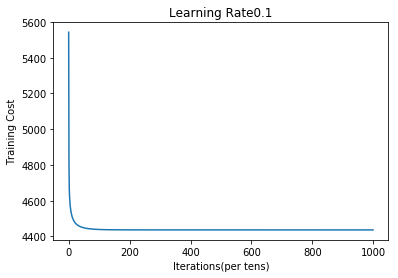

In [147]:
#Alpha = 0.1, iterations = 10000
linear_reg_model(X_train,y_train,X_val,y_val,0.1,10000)

Epochs1 /10000: 
Training cost 9886.90062017849|Validation cost 10206.833691281763
Training MAE 97.34987142641053|Validation MAE 97.41578411451103
Epochs2 /10000: 
Training cost 9782.099403351143|Validation cost 10103.256554998365
Training MAE 96.3794434227944|Validation MAE 96.44636709294208
Epochs3 /10000: 
Training cost 9679.916288685745|Validation cost 10002.250500329612
Training MAE 95.41841860824212|Validation MAE 95.4871227346219
Epochs4 /10000: 
Training cost 9580.221819534825|Validation cost 9903.692160300627
Training MAE 94.46672700284228|Validation MAE 94.53791263826217
Epochs5 /10000: 
Training cost 9482.900342638313|Validation cost 9807.470800886089
Training MAE 93.52429747505373|Validation MAE 93.59860258525727
Epochs6 /10000: 
Training cost 9387.84808728404|Validation cost 9713.486605351047
Training MAE 92.59105789469669|Validation MAE 92.66906228438847
Epochs7 /10000: 
Training cost 9294.97152477149|Validation cost 9621.649205610478
Training MAE 91.66693527361365|Valida

Epochs72 /10000: 
Training cost 6005.766137775964|Validation cost 6363.41216451704
Training MAE 52.475858409055725|Validation MAE 53.15621352445989
Epochs73 /10000: 
Training cost 5981.183440398158|Validation cost 6338.917747862775
Training MAE 52.214893835909095|Validation MAE 52.90173267847342
Epochs74 /10000: 
Training cost 5957.073320632332|Validation cost 6314.88930612581
Training MAE 51.96243535472595|Validation MAE 52.65655959470415
Epochs75 /10000: 
Training cost 5933.426338883607|Validation cost 6291.317585806731
Training MAE 51.71783583479208|Validation MAE 52.41965222341986
Epochs76 /10000: 
Training cost 5910.233247581273|Validation cost 6268.193521401617
Training MAE 51.48077078550192|Validation MAE 52.19119047037311
Epochs77 /10000: 
Training cost 5887.484987189463|Validation cost 6245.508231456024
Training MAE 51.251369928149266|Validation MAE 51.97082773259084
Epochs78 /10000: 
Training cost 5865.172682305102|Validation cost 6223.253014709771
Training MAE 51.02978070537

Epochs167 /10000: 
Training cost 4911.768575225248|Validation cost 5264.436914180312
Training MAE 47.95967151783752|Validation MAE 48.79514500295724
Epochs168 /10000: 
Training cost 4907.498342746259|Validation cost 5260.072278825374
Training MAE 47.99751919787709|Validation MAE 48.83201290384809
Epochs169 /10000: 
Training cost 4903.300231585708|Validation cost 5255.779985337633
Training MAE 48.03575879441882|Validation MAE 48.868878141356085
Epochs170 /10000: 
Training cost 4899.172862780855|Validation cost 5251.5586681316445
Training MAE 48.07427163242739|Validation MAE 48.906026976227395
Epochs171 /10000: 
Training cost 4895.1148846369|Validation cost 5247.406988423152
Training MAE 48.113144977395024|Validation MAE 48.94343635832485
Epochs172 /10000: 
Training cost 4891.12497217999|Validation cost 5243.323633694027
Training MAE 48.15243112770327|Validation MAE 48.98115143088259
Epochs173 /10000: 
Training cost 4887.201826621319|Validation cost 5239.30731716802
Training MAE 48.19194

Epochs255 /10000: 
Training cost 4707.724956525956|Validation cost 5053.658107997479
Training MAE 51.20681246884215|Validation MAE 52.04386168579753
Epochs256 /10000: 
Training cost 4706.57531493042|Validation cost 5052.453027559654
Training MAE 51.235635355360145|Validation MAE 52.073156435160826
Epochs257 /10000: 
Training cost 4705.439796503915|Validation cost 5051.262526163653
Training MAE 51.264250905911844|Validation MAE 52.102221770128175
Epochs258 /10000: 
Training cost 4704.31815678863|Validation cost 5050.086357219032
Training MAE 51.292621859892975|Validation MAE 52.13100355576528
Epochs259 /10000: 
Training cost 4703.210155987494|Validation cost 5048.924278767908
Training MAE 51.320777697043056|Validation MAE 52.159515889325554
Epochs260 /10000: 
Training cost 4702.115558872471|Validation cost 5047.7760533945775
Training MAE 51.34874698416771|Validation MAE 52.18779199419007
Epochs261 /10000: 
Training cost 4701.03413469469|Validation cost 5046.641448136935
Training MAE 51.

Epochs347 /10000: 
Training cost 4639.931226181029|Validation cost 4982.371367304138
Training MAE 53.02277315496016|Validation MAE 53.88323002411983
Epochs348 /10000: 
Training cost 4639.455709057659|Validation cost 4981.872300365389
Training MAE 53.0349838501148|Validation MAE 53.895703451688206
Epochs349 /10000: 
Training cost 4638.98354137705|Validation cost 4981.376822192552
Training MAE 53.04706068555582|Validation MAE 53.908050144299914
Epochs350 /10000: 
Training cost 4638.514678494098|Validation cost 4980.884886139064
Training MAE 53.05900766679029|Validation MAE 53.92026750967971
Epochs351 /10000: 
Training cost 4638.0490765346085|Validation cost 4980.3964463420125
Training MAE 53.07086326104065|Validation MAE 53.93236621747674
Epochs352 /10000: 
Training cost 4637.586692380694|Validation cost 4979.911457707543
Training MAE 53.082594012793315|Validation MAE 53.94433374926093
Epochs353 /10000: 
Training cost 4637.12748365646|Validation cost 4979.429875896564
Training MAE 53.094

Epochs429 /10000: 
Training cost 4609.140460754391|Validation cost 4950.289020368128
Training MAE 53.69211923797445|Validation MAE 54.56213492924594
Epochs430 /10000: 
Training cost 4608.840237153039|Validation cost 4949.9793240758645
Training MAE 53.6970995721512|Validation MAE 54.567227982056224
Epochs431 /10000: 
Training cost 4608.541346743504|Validation cost 4949.6710764859
Training MAE 53.70202662004201|Validation MAE 54.57225669645554
Epochs432 /10000: 
Training cost 4608.243777438679|Validation cost 4949.364264450741
Training MAE 53.70690545654197|Validation MAE 54.57722198703092
Epochs433 /10000: 
Training cost 4607.947517321346|Validation cost 4949.058875001917
Training MAE 53.71172444652681|Validation MAE 54.58212973543026
Epochs434 /10000: 
Training cost 4607.652554641218|Validation cost 4948.754895346953
Training MAE 53.7164974089937|Validation MAE 54.58697511099976
Epochs435 /10000: 
Training cost 4607.35887781204|Validation cost 4948.452312866414
Training MAE 53.72122670

Epochs518 /10000: 
Training cost 4586.587164427518|Validation cost 4927.24430004604
Training MAE 53.97085489193831|Validation MAE 54.84184657832827
Epochs519 /10000: 
Training cost 4586.372153946053|Validation cost 4927.0268326380055
Training MAE 53.972539207098926|Validation MAE 54.84355465932346
Epochs520 /10000: 
Training cost 4586.157832102463|Validation cost 4926.810103958467
Training MAE 53.9742085648603|Validation MAE 54.84523616834927
Epochs521 /10000: 
Training cost 4585.944194743393|Validation cost 4926.594109380022
Training MAE 53.97585890931218|Validation MAE 54.846891376063056
Epochs522 /10000: 
Training cost 4585.731237756349|Validation cost 4926.378844320507
Training MAE 53.97748534054641|Validation MAE 54.84852055042156
Epochs523 /10000: 
Training cost 4585.5189570691155|Validation cost 4926.164304242387
Training MAE 53.97909698898641|Validation MAE 54.85012502012721
Epochs524 /10000: 
Training cost 4585.30734864919|Validation cost 4925.9504846521495
Training MAE 53.980

Epochs600 /10000: 
Training cost 4570.934083926008|Validation cost 4911.520820821012
Training MAE 54.05199361157969|Validation MAE 54.92194438469503
Epochs601 /10000: 
Training cost 4570.764577089759|Validation cost 4911.351717680435
Training MAE 54.052418638398116|Validation MAE 54.92238190459047
Epochs602 /10000: 
Training cost 4570.595516335477|Validation cost 4911.18308342117
Training MAE 54.0528321900601|Validation MAE 54.92280918755625
Epochs603 /10000: 
Training cost 4570.426899579347|Validation cost 4911.014915739016
Training MAE 54.053238481838356|Validation MAE 54.923224765099775
Epochs604 /10000: 
Training cost 4570.258724752429|Validation cost 4910.847212346701
Training MAE 54.05363412781245|Validation MAE 54.92362875559641
Epochs605 /10000: 
Training cost 4570.090989800509|Validation cost 4910.679970973704
Training MAE 54.054018954616126|Validation MAE 54.924021715609044
Epochs606 /10000: 
Training cost 4569.923692683952|Validation cost 4910.513189366087
Training MAE 54.05

Epochs699 /10000: 
Training cost 4556.036946141401|Validation cost 4896.746181874818
Training MAE 54.061338954542265|Validation MAE 54.932493576280066
Epochs700 /10000: 
Training cost 4555.903367345531|Validation cost 4896.614454244768
Training MAE 54.06118806777952|Validation MAE 54.93238514443227
Epochs701 /10000: 
Training cost 4555.77008243457|Validation cost 4896.483028949365
Training MAE 54.06103266456372|Validation MAE 54.932272896239866
Epochs702 /10000: 
Training cost 4555.637090288097|Validation cost 4896.351904779544
Training MAE 54.060872790502266|Validation MAE 54.932157571102394
Epochs703 /10000: 
Training cost 4555.5043897919095|Validation cost 4896.22108053326
Training MAE 54.06070934661055|Validation MAE 54.932042583731224
Epochs704 /10000: 
Training cost 4555.3719798379825|Validation cost 4896.090555015433
Training MAE 54.06054312323842|Validation MAE 54.93192443465224
Epochs705 /10000: 
Training cost 4555.239859324423|Validation cost 4895.960327037889
Training MAE 54

Epochs790 /10000: 
Training cost 4544.963367369731|Validation cost 4885.866710718412
Training MAE 54.03740300087319|Validation MAE 54.91269634553814
Epochs791 /10000: 
Training cost 4544.852594503462|Validation cost 4885.758274394942
Training MAE 54.037060853197794|Validation MAE 54.91243711232457
Epochs792 /10000: 
Training cost 4544.742034436471|Validation cost 4885.650053760999
Training MAE 54.03671785977964|Validation MAE 54.91217696722039
Epochs793 /10000: 
Training cost 4544.631686468823|Validation cost 4885.5420480767525
Training MAE 54.03637326745518|Validation MAE 54.91191741346763
Epochs794 /10000: 
Training cost 4544.521549903953|Validation cost 4885.434256606081
Training MAE 54.036028934844325|Validation MAE 54.91165659149873
Epochs795 /10000: 
Training cost 4544.411624048639|Validation cost 4885.326678616544
Training MAE 54.035682988254614|Validation MAE 54.9113951313843
Epochs796 /10000: 
Training cost 4544.301908212988|Validation cost 4885.219313379356
Training MAE 54.03

Epochs887 /10000: 
Training cost 4535.116462106217|Validation cost 4876.255022028725
Training MAE 54.00172069588581|Validation MAE 54.885827133284444
Epochs888 /10000: 
Training cost 4535.023505289218|Validation cost 4876.164537102594
Training MAE 54.001341257181465|Validation MAE 54.885535729949275
Epochs889 /10000: 
Training cost 4534.930706459955|Validation cost 4876.074210388
Training MAE 54.000963178090736|Validation MAE 54.88524332911106
Epochs890 /10000: 
Training cost 4534.838065167483|Validation cost 4875.984041416005
Training MAE 54.00058755639183|Validation MAE 54.88494993911901
Epochs891 /10000: 
Training cost 4534.745580962772|Validation cost 4875.894029719727
Training MAE 54.000212223034346|Validation MAE 54.8846566981511
Epochs892 /10000: 
Training cost 4534.653253398697|Validation cost 4875.804174834331
Training MAE 53.99983609155188|Validation MAE 54.88436529735233
Epochs893 /10000: 
Training cost 4534.561082030029|Validation cost 4875.714476297019
Training MAE 53.9994

Epochs982 /10000: 
Training cost 4526.934107648195|Validation cost 4868.306396725909
Training MAE 53.9663291096728|Validation MAE 54.857659995792304
Epochs983 /10000: 
Training cost 4526.854381528667|Validation cost 4868.22909979717
Training MAE 53.965965943897785|Validation MAE 54.85735824504514
Epochs984 /10000: 
Training cost 4526.774777849782|Validation cost 4868.151924320809
Training MAE 53.96560357496746|Validation MAE 54.85705597481037
Epochs985 /10000: 
Training cost 4526.695296303772|Validation cost 4868.074869980425
Training MAE 53.96524181809377|Validation MAE 54.85675318906794
Epochs986 /10000: 
Training cost 4526.61593658403|Validation cost 4867.997936460856
Training MAE 53.96487991344887|Validation MAE 54.85644989176772
Epochs987 /10000: 
Training cost 4526.536698385108|Validation cost 4867.921123448158
Training MAE 53.964517623917615|Validation MAE 54.85614608682981
Epochs988 /10000: 
Training cost 4526.457581402706|Validation cost 4867.844430629606
Training MAE 53.96415

Epochs1066 /10000: 
Training cost 4520.636695249887|Validation cost 4862.208882304234
Training MAE 53.93673670505482|Validation MAE 54.831898638907454
Epochs1067 /10000: 
Training cost 4520.566281909031|Validation cost 4862.140790485843
Training MAE 53.93639950463874|Validation MAE 54.83158430136663
Epochs1068 /10000: 
Training cost 4520.495968719112|Validation cost 4862.072797294297
Training MAE 53.93606207364894|Validation MAE 54.83126975923135
Epochs1069 /10000: 
Training cost 4520.425755452733|Validation cost 4862.0049024977
Training MAE 53.93572599664012|Validation MAE 54.83095690333874
Epochs1070 /10000: 
Training cost 4520.355641883275|Validation cost 4861.937105864968
Training MAE 53.93538983016961|Validation MAE 54.83064375919929
Epochs1071 /10000: 
Training cost 4520.285627784889|Validation cost 4861.869407165825
Training MAE 53.93505343915215|Validation MAE 54.83033032899298
Epochs1072 /10000: 
Training cost 4520.215712932493|Validation cost 4861.801806170804
Training MAE 53

Epochs1161 /10000: 
Training cost 4514.365406320444|Validation cost 4856.150812175225
Training MAE 53.905835360181634|Validation MAE 54.80250665734942
Epochs1162 /10000: 
Training cost 4514.303589083394|Validation cost 4856.091155889564
Training MAE 53.90552080846554|Validation MAE 54.80220210587143
Epochs1163 /10000: 
Training cost 4514.241853421404|Validation cost 4856.0315793598475
Training MAE 53.90520612575379|Validation MAE 54.801897859392
Epochs1164 /10000: 
Training cost 4514.180199167226|Validation cost 4855.972082416887
Training MAE 53.9048916069779|Validation MAE 54.80159462729954
Epochs1165 /10000: 
Training cost 4514.118626154121|Validation cost 4855.9126648920255
Training MAE 53.90457889036547|Validation MAE 54.80129123411964
Epochs1166 /10000: 
Training cost 4514.057134215857|Validation cost 4855.853326617128
Training MAE 53.90426616064895|Validation MAE 54.80098768108593
Epochs1167 /10000: 
Training cost 4513.995723186711|Validation cost 4855.794067424592
Training MAE 5

Epochs1259 /10000: 
Training cost 4508.671312489802|Validation cost 4850.659614667732
Training MAE 53.87597302711425|Validation MAE 54.77397750845295
Epochs1260 /10000: 
Training cost 4508.616765168973|Validation cost 4850.607043444512
Training MAE 53.875681396259175|Validation MAE 54.77370482875117
Epochs1261 /10000: 
Training cost 4508.562285166177|Validation cost 4850.554537609039
Training MAE 53.87538981006589|Validation MAE 54.77343425697331
Epochs1262 /10000: 
Training cost 4508.507872355419|Validation cost 4850.5020970348705
Training MAE 53.875099143178815|Validation MAE 54.773163577823944
Epochs1263 /10000: 
Training cost 4508.453526611051|Validation cost 4850.449721595917
Training MAE 53.874808761874576|Validation MAE 54.77289279208303
Epochs1264 /10000: 
Training cost 4508.399247807764|Validation cost 4850.397411166447
Training MAE 53.87451830183279|Validation MAE 54.772621900526765
Epochs1265 /10000: 
Training cost 4508.345035820592|Validation cost 4850.345165621076
Training

Epochs1353 /10000: 
Training cost 4503.8222045680795|Validation cost 4845.987794128973
Training MAE 53.84963089886889|Validation MAE 54.74950183649374
Epochs1354 /10000: 
Training cost 4503.773476855831|Validation cost 4845.940860464711
Training MAE 53.849360245569756|Validation MAE 54.74925586969132
Epochs1355 /10000: 
Training cost 4503.724805963602|Validation cost 4845.8939816906
Training MAE 53.84908991079893|Validation MAE 54.74901048017018
Epochs1356 /10000: 
Training cost 4503.676191792757|Validation cost 4845.847157708405
Training MAE 53.848820035906535|Validation MAE 54.74876578279838
Epochs1357 /10000: 
Training cost 4503.6276342449055|Validation cost 4845.800388420135
Training MAE 53.84855096210774|Validation MAE 54.74852150074556
Epochs1358 /10000: 
Training cost 4503.579133221899|Validation cost 4845.753673728057
Training MAE 53.84828187333297|Validation MAE 54.74827806948427
Epochs1359 /10000: 
Training cost 4503.530688625834|Validation cost 4845.707013534681
Training MAE

Epochs1446 /10000: 
Training cost 4499.521476095931|Validation cost 4841.845726039355
Training MAE 53.82540012817044|Validation MAE 54.727832522489855
Epochs1447 /10000: 
Training cost 4499.477640108004|Validation cost 4841.803507117149
Training MAE 53.82515160674782|Validation MAE 54.72760609068188
Epochs1448 /10000: 
Training cost 4499.433852712832|Validation cost 4841.761334919978
Training MAE 53.82490305610628|Validation MAE 54.72737960562336
Epochs1449 /10000: 
Training cost 4499.39011383133|Validation cost 4841.719209369658
Training MAE 53.82465447657787|Validation MAE 54.727153067719605
Epochs1450 /10000: 
Training cost 4499.346423384591|Validation cost 4841.677130388189
Training MAE 53.824405868493365|Validation MAE 54.72692647737435
Epochs1451 /10000: 
Training cost 4499.302781293889|Validation cost 4841.635097897753
Training MAE 53.824158129415395|Validation MAE 54.726700126788856
Epochs1452 /10000: 
Training cost 4499.259187480675|Validation cost 4841.593111820719
Training M

Epochs1541 /10000: 
Training cost 4495.563618589261|Validation cost 4838.033287000085
Training MAE 53.80237373749572|Validation MAE 54.706451646155756
Epochs1542 /10000: 
Training cost 4495.524068999254|Validation cost 4837.995181566838
Training MAE 53.80213817265735|Validation MAE 54.70623199816961
Epochs1543 /10000: 
Training cost 4495.484561219937|Validation cost 4837.957116177564
Training MAE 53.8019025937415|Validation MAE 54.7060143218625
Epochs1544 /10000: 
Training cost 4495.445095187063|Validation cost 4837.919090769214
Training MAE 53.80166700099524|Validation MAE 54.70579661911899
Epochs1545 /10000: 
Training cost 4495.405670836521|Validation cost 4837.881105278877
Training MAE 53.801431394664746|Validation MAE 54.705578890220885
Epochs1546 /10000: 
Training cost 4495.366288104337|Validation cost 4837.843159643781
Training MAE 53.80119577499534|Validation MAE 54.705361135448996
Epochs1547 /10000: 
Training cost 4495.326946926671|Validation cost 4837.805253801292
Training MAE

Epochs1637 /10000: 
Training cost 4491.948761634596|Validation cost 4834.549190556691
Training MAE 53.7804522502588|Validation MAE 54.68635583441033
Epochs1638 /10000: 
Training cost 4491.912951008304|Validation cost 4834.514660215844
Training MAE 53.78023268664287|Validation MAE 54.68615662252964
Epochs1639 /10000: 
Training cost 4491.87717659023|Validation cost 4834.480164439635
Training MAE 53.780013118755605|Validation MAE 54.68595780260512
Epochs1640 /10000: 
Training cost 4491.84143832752|Validation cost 4834.445703176559
Training MAE 53.77979379416795|Validation MAE 54.68575896542491
Epochs1641 /10000: 
Training cost 4491.805736167423|Validation cost 4834.411276375213
Training MAE 53.779575462034984|Validation MAE 54.68556011119873
Epochs1642 /10000: 
Training cost 4491.77007005729|Validation cost 4834.376883984301
Training MAE 53.77935712516679|Validation MAE 54.6853612401356
Epochs1643 /10000: 
Training cost 4491.7344399445765|Validation cost 4834.3425259526275
Training MAE 53

Epochs1732 /10000: 
Training cost 4488.701421131508|Validation cost 4831.41632779488
Training MAE 53.76056202170404|Validation MAE 54.66780560504564
Epochs1733 /10000: 
Training cost 4488.668827830498|Validation cost 4831.3848647649365
Training MAE 53.760361341438006|Validation MAE 54.66761321720647
Epochs1734 /10000: 
Training cost 4488.636266144728|Validation cost 4831.353431837804
Training MAE 53.760160660407706|Validation MAE 54.66742082520232
Epochs1735 /10000: 
Training cost 4488.6037360301|Validation cost 4831.322028970786
Training MAE 53.75995997876137|Validation MAE 54.66722842918971
Epochs1736 /10000: 
Training cost 4488.571237442596|Validation cost 4831.290656121266
Training MAE 53.75975929664676|Validation MAE 54.66703602932471
Epochs1737 /10000: 
Training cost 4488.538770338284|Validation cost 4831.259313246708
Training MAE 53.759558614211244|Validation MAE 54.66684362576282
Epochs1738 /10000: 
Training cost 4488.506334673308|Validation cost 4831.228000304661
Training MAE 

Epochs1828 /10000: 
Training cost 4485.710588458851|Validation cost 4828.527304615876
Training MAE 53.74172700181878|Validation MAE 54.650124883756625
Epochs1829 /10000: 
Training cost 4485.680840168016|Validation cost 4828.4985477876935
Training MAE 53.74153712520116|Validation MAE 54.64994785402803
Epochs1830 /10000: 
Training cost 4485.65111960464|Validation cost 4828.469817308749
Training MAE 53.741348181022744|Validation MAE 54.64977082163266
Epochs1831 /10000: 
Training cost 4485.621426731636|Validation cost 4828.441113143345
Training MAE 53.74115933040496|Validation MAE 54.649593786696286
Epochs1832 /10000: 
Training cost 4485.59176151198|Validation cost 4828.412435255844
Training MAE 53.740970878632005|Validation MAE 54.64941674934427
Epochs1833 /10000: 
Training cost 4485.562123908712|Validation cost 4828.383783610676
Training MAE 53.74078261453515|Validation MAE 54.649239709701625
Epochs1834 /10000: 
Training cost 4485.532513884941|Validation cost 4828.355158172333
Training M

Epochs1914 /10000: 
Training cost 4483.249917036858|Validation cost 4826.147002636702
Training MAE 53.72625418127057|Validation MAE 54.63529115636263
Epochs1915 /10000: 
Training cost 4483.222424114942|Validation cost 4826.120387674469
Training MAE 53.72608690662717|Validation MAE 54.63512245391556
Epochs1916 /10000: 
Training cost 4483.194955954654|Validation cost 4826.093796213183
Training MAE 53.72591963313796|Validation MAE 54.63495375243498
Epochs1917 /10000: 
Training cost 4483.167512524009|Validation cost 4826.067228222199
Training MAE 53.72575289395713|Validation MAE 54.63478505202395
Epochs1918 /10000: 
Training cost 4483.140093791072|Validation cost 4826.0406836709235
Training MAE 53.72558704161075|Validation MAE 54.63461635278522
Epochs1919 /10000: 
Training cost 4483.112699723967|Validation cost 4826.014162528817
Training MAE 53.72542118980083|Validation MAE 54.63444765482129
Epochs1920 /10000: 
Training cost 4483.085330290865|Validation cost 4825.9876647653955
Training MAE

Epochs1996 /10000: 
Training cost 4481.074989240291|Validation cost 4824.039998333562
Training MAE 53.71319830662104|Validation MAE 54.621811979866294
Epochs1997 /10000: 
Training cost 4481.049425120899|Validation cost 4824.015213187809
Training MAE 53.71304594864655|Validation MAE 54.621649640791105
Epochs1998 /10000: 
Training cost 4481.023883309421|Validation cost 4823.990449196806
Training MAE 53.712893865443604|Validation MAE 54.62148730531189
Epochs1999 /10000: 
Training cost 4480.99836377793|Validation cost 4823.965706333905
Training MAE 53.712741783299364|Validation MAE 54.621324973515804
Epochs2000 /10000: 
Training cost 4480.972866498543|Validation cost 4823.9409845724995
Training MAE 53.71258970229513|Validation MAE 54.62116264548972
Epochs2001 /10000: 
Training cost 4480.947391443426|Validation cost 4823.916283886033
Training MAE 53.71243762251193|Validation MAE 54.6210003213203
Epochs2002 /10000: 
Training cost 4480.921938584787|Validation cost 4823.891604247989
Training M

Epochs2087 /10000: 
Training cost 4478.8367297136165|Validation cost 4821.868056139461
Training MAE 53.69983263157431|Validation MAE 54.607897427730855
Epochs2088 /10000: 
Training cost 4478.813086529479|Validation cost 4821.845092118099
Training MAE 53.6996915167476|Validation MAE 54.60775525100828
Epochs2089 /10000: 
Training cost 4478.789463287073|Validation cost 4821.8221469979735
Training MAE 53.69955040283553|Validation MAE 54.607613073911814
Epochs2090 /10000: 
Training cost 4478.765859962246|Validation cost 4821.79922075613
Training MAE 53.69940928990768|Validation MAE 54.60747089651622
Epochs2091 /10000: 
Training cost 4478.74227653089|Validation cost 4821.776313369652
Training MAE 53.699268178033506|Validation MAE 54.607328718896035
Epochs2092 /10000: 
Training cost 4478.718712968927|Validation cost 4821.753424815657
Training MAE 53.69912706728222|Validation MAE 54.60718654112562
Epochs2093 /10000: 
Training cost 4478.695169252323|Validation cost 4821.730555071303
Training MA

Epochs2185 /10000: 
Training cost 4476.610939448339|Validation cost 4819.704056748635
Training MAE 53.68645353871094|Validation MAE 54.594700478532644
Epochs2186 /10000: 
Training cost 4476.589141269173|Validation cost 4819.68284130052
Training MAE 53.68632193175058|Validation MAE 54.59457576407831
Epochs2187 /10000: 
Training cost 4476.567360834287|Validation cost 4819.661642668774
Training MAE 53.686190327083715|Validation MAE 54.59445104676733
Epochs2188 /10000: 
Training cost 4476.545598122915|Validation cost 4819.640460833733
Training MAE 53.68605872476745|Validation MAE 54.59432632666324
Epochs2189 /10000: 
Training cost 4476.5238531143195|Validation cost 4819.619295775761
Training MAE 53.68592712485874|Validation MAE 54.59420160382944
Epochs2190 /10000: 
Training cost 4476.502125787801|Validation cost 4819.5981474752525
Training MAE 53.68579586717961|Validation MAE 54.59407687832913
Epochs2191 /10000: 
Training cost 4476.480416122683|Validation cost 4819.5770159126305
Training M

Epochs2273 /10000: 
Training cost 4474.758416944099|Validation cost 4817.899380989671
Training MAE 53.67528205680067|Validation MAE 54.58446346915757
Epochs2274 /10000: 
Training cost 4474.738104081469|Validation cost 4817.879573306062
Training MAE 53.67516185921081|Validation MAE 54.58435555102732
Epochs2275 /10000: 
Training cost 4474.717807249742|Validation cost 4817.859780818503
Training MAE 53.67504166231234|Validation MAE 54.58424762531619
Epochs2276 /10000: 
Training cost 4474.697526430702|Validation cost 4817.840003509796
Training MAE 53.67492168747444|Validation MAE 54.58413969208231
Epochs2277 /10000: 
Training cost 4474.677261606164|Validation cost 4817.820241362767
Training MAE 53.67480183170978|Validation MAE 54.584031751383726
Epochs2278 /10000: 
Training cost 4474.657012757966|Validation cost 4817.800494360267
Training MAE 53.67468197669458|Validation MAE 54.58392380327833
Epochs2279 /10000: 
Training cost 4474.636779867977|Validation cost 4817.780762485175
Training MAE 

Epochs2374 /10000: 
Training cost 4472.784844097632|Validation cost 4815.972780210571
Training MAE 53.663388910137165|Validation MAE 54.574004132856004
Epochs2375 /10000: 
Training cost 4472.766062645931|Validation cost 4815.954424576033
Training MAE 53.66327573168145|Validation MAE 54.57390409992713
Epochs2376 /10000: 
Training cost 4472.7472955130015|Validation cost 4815.936082522928
Training MAE 53.66316356514747|Validation MAE 54.57380406168864
Epochs2377 /10000: 
Training cost 4472.728542683102|Validation cost 4815.917754036434
Training MAE 53.66305163171366|Validation MAE 54.57370401818845
Epochs2378 /10000: 
Training cost 4472.70980414052|Validation cost 4815.899439101751
Training MAE 53.6629396997292|Validation MAE 54.57360396947433
Epochs2379 /10000: 
Training cost 4472.691079869558|Validation cost 4815.881137704098
Training MAE 53.66282776923569|Validation MAE 54.57350431244708
Epochs2380 /10000: 
Training cost 4472.672369854544|Validation cost 4815.862849828719
Training MAE 

Epochs2466 /10000: 
Training cost 4471.114973076022|Validation cost 4814.339110425593
Training MAE 53.65335166604049|Validation MAE 54.5650819687251
Epochs2467 /10000: 
Training cost 4471.097445773131|Validation cost 4814.3219448268255
Training MAE 53.65324422500527|Validation MAE 54.56498805810016
Epochs2468 /10000: 
Training cost 4471.079931430042|Validation cost 4814.304791531022
Training MAE 53.653136786928236|Validation MAE 54.5648941413234
Epochs2469 /10000: 
Training cost 4471.062430032918|Validation cost 4814.2876505251825
Training MAE 53.65302935184433|Validation MAE 54.56480021843897
Epochs2470 /10000: 
Training cost 4471.04494156795|Validation cost 4814.2705217963285
Training MAE 53.65292200538963|Validation MAE 54.56470628949093
Epochs2471 /10000: 
Training cost 4471.02746602134|Validation cost 4814.253405331495
Training MAE 53.6528149361654|Validation MAE 54.56461235452326
Epochs2472 /10000: 
Training cost 4471.010003379314|Validation cost 4814.236301117737
Training MAE 53

Epochs2564 /10000: 
Training cost 4469.456858420057|Validation cost 4812.7134443958885
Training MAE 53.64345806701197|Validation MAE 54.556243873943664
Epochs2565 /10000: 
Training cost 4469.440538229049|Validation cost 4812.697425366716
Training MAE 53.64336420279358|Validation MAE 54.556160658176935
Epochs2566 /10000: 
Training cost 4469.42422972852|Validation cost 4812.681417448727
Training MAE 53.64327033819881|Validation MAE 54.55607743372802
Epochs2567 /10000: 
Training cost 4469.407932906372|Validation cost 4812.665420630571
Training MAE 53.64317647325954|Validation MAE 54.55599420063794
Epochs2568 /10000: 
Training cost 4469.391647750516|Validation cost 4812.649434900915
Training MAE 53.643082608007596|Validation MAE 54.55591095894763
Epochs2569 /10000: 
Training cost 4469.375374248887|Validation cost 4812.633460248436
Training MAE 53.64298874247475|Validation MAE 54.55582770869794
Epochs2570 /10000: 
Training cost 4469.359112389432|Validation cost 4812.617496661828
Training MA

Epochs2655 /10000: 
Training cost 4468.018165799626|Validation cost 4811.299874200214
Training MAE 53.63519668516408|Validation MAE 54.54881645766411
Epochs2656 /10000: 
Training cost 4468.002861798752|Validation cost 4811.284821617375
Training MAE 53.63510806938503|Validation MAE 54.548736352982075
Epochs2657 /10000: 
Training cost 4467.987568450762|Validation cost 4811.269779173073
Training MAE 53.6350194537728|Validation MAE 54.54865624123646
Epochs2658 /10000: 
Training cost 4467.972285744937|Validation cost 4811.254746857264
Training MAE 53.6349308383551|Validation MAE 54.54857612246283
Epochs2659 /10000: 
Training cost 4467.957013670566|Validation cost 4811.239724659916
Training MAE 53.63484222315968|Validation MAE 54.54849819670214
Epochs2660 /10000: 
Training cost 4467.941752216957|Validation cost 4811.224712571013
Training MAE 53.63475360821417|Validation MAE 54.54842097283788
Epochs2661 /10000: 
Training cost 4467.92650137343|Validation cost 4811.209710580549
Training MAE 53.

Epochs2750 /10000: 
Training cost 4466.610410304528|Validation cost 4809.913798324631
Training MAE 53.62727938715838|Validation MAE 54.54202361418974
Epochs2751 /10000: 
Training cost 4466.596072332983|Validation cost 4809.89966583268
Training MAE 53.627199273199004|Validation MAE 54.54195410171896
Epochs2752 /10000: 
Training cost 4466.581744055597|Validation cost 4809.885542581667
Training MAE 53.6271191871745|Validation MAE 54.54188458026608
Epochs2753 /10000: 
Training cost 4466.567425462889|Validation cost 4809.871428562725
Training MAE 53.62703909991748|Validation MAE 54.54181504986387
Epochs2754 /10000: 
Training cost 4466.553116545397|Validation cost 4809.857323766992
Training MAE 53.62695901145308|Validation MAE 54.54174551054508
Epochs2755 /10000: 
Training cost 4466.538817293659|Validation cost 4809.843228185622
Training MAE 53.62687892180635|Validation MAE 54.54167596234233
Epochs2756 /10000: 
Training cost 4466.524527698238|Validation cost 4809.829141809779
Training MAE 53

Epochs2840 /10000: 
Training cost 4465.357734513886|Validation cost 4808.677870395253
Training MAE 53.620342670573095|Validation MAE 54.535885359295
Epochs2841 /10000: 
Training cost 4465.344232429836|Validation cost 4808.664535361808
Training MAE 53.6202691563695|Validation MAE 54.53581827832399
Epochs2842 /10000: 
Training cost 4465.330739233251|Validation cost 4808.6512088147565
Training MAE 53.62019563979292|Validation MAE 54.53575118921362
Epochs2843 /10000: 
Training cost 4465.317254915671|Validation cost 4808.63789074619
Training MAE 53.620122120866625|Validation MAE 54.53568409199338
Epochs2844 /10000: 
Training cost 4465.303779468647|Validation cost 4808.624581148211
Training MAE 53.620048851408065|Validation MAE 54.5356169866927
Epochs2845 /10000: 
Training cost 4465.2903128837415|Validation cost 4808.6112800129295
Training MAE 53.61997569377836|Validation MAE 54.535549873340926
Epochs2846 /10000: 
Training cost 4465.276855152527|Validation cost 4808.597987332463
Training MAE

Epochs2934 /10000: 
Training cost 4464.126283212974|Validation cost 4807.460440595624
Training MAE 53.61366958561241|Validation MAE 54.52970715602226
Epochs2935 /10000: 
Training cost 4464.113580945816|Validation cost 4807.447869999456
Training MAE 53.613599969405655|Validation MAE 54.52964283792166
Epochs2936 /10000: 
Training cost 4464.100886815123|Validation cost 4807.435307187701
Training MAE 53.613530467635435|Validation MAE 54.52957851323424
Epochs2937 /10000: 
Training cost 4464.088200813364|Validation cost 4807.422752153321
Training MAE 53.6134609635732|Validation MAE 54.52951418198571
Epochs2938 /10000: 
Training cost 4464.075522933018|Validation cost 4807.410204889288
Training MAE 53.61339145723987|Validation MAE 54.52944984420169
Epochs2939 /10000: 
Training cost 4464.06285316657|Validation cost 4807.397665388581
Training MAE 53.613321948656285|Validation MAE 54.529385499907804
Epochs2940 /10000: 
Training cost 4464.050191506519|Validation cost 4807.385133644188
Training MAE

Epochs3032 /10000: 
Training cost 4462.919020469059|Validation cost 4806.264481321976
Training MAE 53.60695716927435|Validation MAE 54.52358016593299
Epochs3033 /10000: 
Training cost 4462.907081129557|Validation cost 4806.252641412604
Training MAE 53.606890697545|Validation MAE 54.523519204812864
Epochs3034 /10000: 
Training cost 4462.895149230156|Validation cost 4806.240808637005
Training MAE 53.60682427893826|Validation MAE 54.52345823740745
Epochs3035 /10000: 
Training cost 4462.883224764162|Validation cost 4806.228982988928
Training MAE 53.606757858230615|Validation MAE 54.52339726374015
Epochs3036 /10000: 
Training cost 4462.871307724893|Validation cost 4806.217164462126
Training MAE 53.60669145722775|Validation MAE 54.523336283834354
Epochs3037 /10000: 
Training cost 4462.859398105673|Validation cost 4806.205353050365
Training MAE 53.60662527958492|Validation MAE 54.52327608779647
Epochs3038 /10000: 
Training cost 4462.847495899835|Validation cost 4806.193548747417
Training MAE 

Epochs3131 /10000: 
Training cost 4461.772097413447|Validation cost 4805.125982994177
Training MAE 53.60071891024819|Validation MAE 54.51787948178796
Epochs3132 /10000: 
Training cost 4461.760863391044|Validation cost 4805.114820132001
Training MAE 53.60065839825679|Validation MAE 54.517824054773435
Epochs3133 /10000: 
Training cost 4461.749636183203|Validation cost 4805.103663819224
Training MAE 53.600597883326465|Validation MAE 54.51776862128436
Epochs3134 /10000: 
Training cost 4461.738415783968|Validation cost 4805.09251405028
Training MAE 53.60053736547461|Validation MAE 54.517713181342145
Epochs3135 /10000: 
Training cost 4461.72720218739|Validation cost 4805.081370819615
Training MAE 53.60047684471859|Validation MAE 54.51765773496815
Epochs3136 /10000: 
Training cost 4461.715995387529|Validation cost 4805.070234121675
Training MAE 53.600416321075755|Validation MAE 54.517602282183724
Epochs3137 /10000: 
Training cost 4461.704795378449|Validation cost 4805.059103950917
Training MA

Epochs3221 /10000: 
Training cost 4460.787645344993|Validation cost 4804.146918236048
Training MAE 53.59546282469456|Validation MAE 54.51298212626408
Epochs3222 /10000: 
Training cost 4460.777001570755|Validation cost 4804.136323273465
Training MAE 53.59540808386456|Validation MAE 54.5129278969502
Epochs3223 /10000: 
Training cost 4460.76636410171|Validation cost 4804.125734384382
Training MAE 53.59535333925437|Validation MAE 54.5128736620518
Epochs3224 /10000: 
Training cost 4460.755732932488|Validation cost 4804.11515156378
Training MAE 53.59529859088032|Validation MAE 54.51282002063586
Epochs3225 /10000: 
Training cost 4460.745108057727|Validation cost 4804.104574806649
Training MAE 53.59524383875867|Validation MAE 54.51276648951236
Epochs3226 /10000: 
Training cost 4460.734489472069|Validation cost 4804.094004107982
Training MAE 53.59518908290568|Validation MAE 54.51271295252084
Epochs3227 /10000: 
Training cost 4460.723877170162|Validation cost 4804.083439462777
Training MAE 53.59

Epochs3316 /10000: 
Training cost 4459.8039152056945|Validation cost 4803.166838129648
Training MAE 53.590401420244945|Validation MAE 54.50806448014225
Epochs3317 /10000: 
Training cost 4459.793847268541|Validation cost 4803.156798509159
Training MAE 53.59034967418658|Validation MAE 54.50801552164703
Epochs3318 /10000: 
Training cost 4459.783785152604|Validation cost 4803.146764509842
Training MAE 53.590297924665734|Validation MAE 54.50796655649952
Epochs3319 /10000: 
Training cost 4459.773728853061|Validation cost 4803.136736127187
Training MAE 53.59024678491424|Validation MAE 54.50791758471847
Epochs3320 /10000: 
Training cost 4459.76367836509|Validation cost 4803.126713356689
Training MAE 53.59019607770624|Validation MAE 54.50786860632264
Epochs3321 /10000: 
Training cost 4459.753633683875|Validation cost 4803.116696193845
Training MAE 53.59014536659614|Validation MAE 54.50781962133068
Epochs3322 /10000: 
Training cost 4459.74359480461|Validation cost 4803.10668463416
Training MAE 5

Epochs3407 /10000: 
Training cost 4458.910998604914|Validation cost 4802.275716367892
Training MAE 53.585910321735824|Validation MAE 54.50378976023425
Epochs3408 /10000: 
Training cost 4458.901441271346|Validation cost 4802.26617038966
Training MAE 53.58586230905386|Validation MAE 54.5037450616365
Epochs3409 /10000: 
Training cost 4458.8918893409955|Validation cost 4802.256629641719
Training MAE 53.58581429238624|Validation MAE 54.50370046999394
Epochs3410 /10000: 
Training cost 4458.8823428095|Validation cost 4802.2470941199845
Training MAE 53.585766271746756|Validation MAE 54.50365587150799
Epochs3411 /10000: 
Training cost 4458.872801672496|Validation cost 4802.237563820376
Training MAE 53.585718247149146|Validation MAE 54.503611266196145
Epochs3412 /10000: 
Training cost 4458.863265925629|Validation cost 4802.228038738821
Training MAE 53.585670444817374|Validation MAE 54.503566654075904
Epochs3413 /10000: 
Training cost 4458.853735564548|Validation cost 4802.2185188712465
Training 

Epochs3501 /10000: 
Training cost 4458.035655666056|Validation cost 4801.400721707369
Training MAE 53.58155706308629|Validation MAE 54.499703581700395
Epochs3502 /10000: 
Training cost 4458.026587770364|Validation cost 4801.391650098709
Training MAE 53.58151169190712|Validation MAE 54.49966229192355
Epochs3503 /10000: 
Training cost 4458.017524887452|Validation cost 4801.3825833549445
Training MAE 53.58146631669684|Validation MAE 54.49962099513553
Epochs3504 /10000: 
Training cost 4458.008467013375|Validation cost 4801.373521472385
Training MAE 53.581420937468295|Validation MAE 54.499579691352814
Epochs3505 /10000: 
Training cost 4457.999414144192|Validation cost 4801.364464447336
Training MAE 53.58137555423436|Validation MAE 54.49953838059183
Epochs3506 /10000: 
Training cost 4457.990366275965|Validation cost 4801.3554122761125
Training MAE 53.58133016700785|Validation MAE 54.499497062869025
Epochs3507 /10000: 
Training cost 4457.98132340476|Validation cost 4801.346364955033
Training 

Epochs3591 /10000: 
Training cost 4457.239168186157|Validation cost 4800.60333654507
Training MAE 53.57760382471169|Validation MAE 54.49596130600883
Epochs3592 /10000: 
Training cost 4457.2305361175495|Validation cost 4800.59468842541
Training MAE 53.577561596282244|Validation MAE 54.49591944886333
Epochs3593 /10000: 
Training cost 4457.221908722792|Validation cost 4800.586044853148
Training MAE 53.57751936367017|Validation MAE 54.49587758611052
Epochs3594 /10000: 
Training cost 4457.213285998297|Validation cost 4800.577405824923
Training MAE 53.577477195236916|Validation MAE 54.49583571776512
Epochs3595 /10000: 
Training cost 4457.20466794048|Validation cost 4800.568771337372
Training MAE 53.57743519042742|Validation MAE 54.49579384384187
Epochs3596 /10000: 
Training cost 4457.19605454576|Validation cost 4800.560141387139
Training MAE 53.577393181382575|Validation MAE 54.495751964355485
Epochs3597 /10000: 
Training cost 4457.187445810557|Validation cost 4800.55151597087
Training MAE 5

Epochs3690 /10000: 
Training cost 4456.406717047958|Validation cost 4799.768717211779
Training MAE 53.57352944103273|Validation MAE 54.49191413298353
Epochs3691 /10000: 
Training cost 4456.39853084895|Validation cost 4799.760503492377
Training MAE 53.57348979647182|Validation MAE 54.4918736406265
Epochs3692 /10000: 
Training cost 4456.390348985883|Validation cost 4799.752294003447
Training MAE 53.57345014762818|Validation MAE 54.49183314308863
Epochs3693 /10000: 
Training cost 4456.382171455517|Validation cost 4799.744088741946
Training MAE 53.573410494513084|Validation MAE 54.491792640383466
Epochs3694 /10000: 
Training cost 4456.373998254611|Validation cost 4799.735887704837
Training MAE 53.573370837137766|Validation MAE 54.4917521325246
Epochs3695 /10000: 
Training cost 4456.3658293799335|Validation cost 4799.727690889083
Training MAE 53.57333117551349|Validation MAE 54.49171161952554
Epochs3696 /10000: 
Training cost 4456.357664828252|Validation cost 4799.71949829165
Training MAE 5

Epochs3784 /10000: 
Training cost 4455.655742100887|Validation cost 4799.01472028438
Training MAE 53.56986036918737|Validation MAE 54.4884166584567
Epochs3785 /10000: 
Training cost 4455.647949742432|Validation cost 4799.006891329118
Training MAE 53.56982298387905|Validation MAE 54.48838226170651
Epochs3786 /10000: 
Training cost 4455.640161429112|Validation cost 4798.999066331185
Training MAE 53.569785594430044|Validation MAE 54.48834819568972
Epochs3787 /10000: 
Training cost 4455.632377157979|Validation cost 4798.991245287811
Training MAE 53.569748200850775|Validation MAE 54.4883141235232
Epochs3788 /10000: 
Training cost 4455.624596926087|Validation cost 4798.983428196226
Training MAE 53.56971080315163|Validation MAE 54.48828004521978
Epochs3789 /10000: 
Training cost 4455.616820730494|Validation cost 4798.975615053663
Training MAE 53.56967340134301|Validation MAE 54.488245960792284
Epochs3790 /10000: 
Training cost 4455.609048568258|Validation cost 4798.96780585736
Training MAE 53

Epochs3880 /10000: 
Training cost 4454.925709721986|Validation cost 4798.280798768243
Training MAE 53.56641141539369|Validation MAE 54.48516577819436
Epochs3881 /10000: 
Training cost 4454.918292657765|Validation cost 4798.273337453483
Training MAE 53.566376392550566|Validation MAE 54.48513272707344
Epochs3882 /10000: 
Training cost 4454.910879368478|Validation cost 4798.26587984185
Training MAE 53.566341365487595|Validation MAE 54.48509967066368
Epochs3883 /10000: 
Training cost 4454.903469851441|Validation cost 4798.258425930819
Training MAE 53.56630633421453|Validation MAE 54.48506660897666
Epochs3884 /10000: 
Training cost 4454.896064103974|Validation cost 4798.250975717863
Training MAE 53.566271298741206|Validation MAE 54.48503354202386
Epochs3885 /10000: 
Training cost 4454.8886621234|Validation cost 4798.243529200463
Training MAE 53.56623625907735|Validation MAE 54.48500046981687
Epochs3886 /10000: 
Training cost 4454.881263907041|Validation cost 4798.2360863761
Training MAE 53.

Epochs3971 /10000: 
Training cost 4454.265896121883|Validation cost 4797.616682819166
Training MAE 53.56330025915487|Validation MAE 54.4823133382879
Epochs3972 /10000: 
Training cost 4454.258811898662|Validation cost 4797.609548428461
Training MAE 53.56326688662002|Validation MAE 54.48228415456484
Epochs3973 /10000: 
Training cost 4454.25173121654|Validation cost 4797.602417520499
Training MAE 53.56323350996957|Validation MAE 54.482254964947856
Epochs3974 /10000: 
Training cost 4454.244654073057|Validation cost 4797.595290092964
Training MAE 53.56320012921274|Validation MAE 54.482225769448206
Epochs3975 /10000: 
Training cost 4454.237580465757|Validation cost 4797.588166143539
Training MAE 53.56316674435872|Validation MAE 54.48219656807717
Epochs3976 /10000: 
Training cost 4454.230510392187|Validation cost 4797.581045669908
Training MAE 53.56313344212377|Validation MAE 54.48216736084603
Epochs3977 /10000: 
Training cost 4454.223443849897|Validation cost 4797.573928669761
Training MAE 5

Epochs4069 /10000: 
Training cost 4453.588107501691|Validation cost 4796.933720972631
Training MAE 53.56019001484522|Validation MAE 54.4795107055931
Epochs4070 /10000: 
Training cost 4453.58135896935|Validation cost 4796.926917189215
Training MAE 53.560159519605854|Validation MAE 54.47948389078324
Epochs4071 /10000: 
Training cost 4453.574613747934|Validation cost 4796.920116671189
Training MAE 53.56012911149715|Validation MAE 54.47945706993184
Epochs4072 /10000: 
Training cost 4453.567871835205|Validation cost 4796.913319416432
Training MAE 53.560098726085016|Validation MAE 54.47943024304969
Epochs4073 /10000: 
Training cost 4453.56113322892|Validation cost 4796.906525422827
Training MAE 53.56006861765848|Validation MAE 54.47940341014759
Epochs4074 /10000: 
Training cost 4453.554397926845|Validation cost 4796.899734688262
Training MAE 53.5600386791672|Validation MAE 54.47937657123631
Epochs4075 /10000: 
Training cost 4453.547665926744|Validation cost 4796.892947210619
Training MAE 53.

Epochs4169 /10000: 
Training cost 4452.929288920777|Validation cost 4796.269171045541
Training MAE 53.557265999958425|Validation MAE 54.47692738319142
Epochs4170 /10000: 
Training cost 4452.922860714114|Validation cost 4796.262683614517
Training MAE 53.55723767948192|Validation MAE 54.47690348034723
Epochs4171 /10000: 
Training cost 4452.916435604177|Validation cost 4796.256199246152
Training MAE 53.55720935445552|Validation MAE 54.476879571396104
Epochs4172 /10000: 
Training cost 4452.910013588923|Validation cost 4796.249717938511
Training MAE 53.55718104492968|Validation MAE 54.47685604718091
Epochs4173 /10000: 
Training cost 4452.903594666312|Validation cost 4796.243239689654
Training MAE 53.557153002885336|Validation MAE 54.47683258332657
Epochs4174 /10000: 
Training cost 4452.897178834297|Validation cost 4796.236764497649
Training MAE 53.55712495622924|Validation MAE 54.47680911333705
Epochs4175 /10000: 
Training cost 4452.890766090844|Validation cost 4796.230292360565
Training MA

Epochs4266 /10000: 
Training cost 4452.319876102478|Validation cost 4795.6538701432255
Training MAE 53.55468299181293|Validation MAE 54.47481614198753
Epochs4267 /10000: 
Training cost 4452.3137390259935|Validation cost 4795.647671015673
Training MAE 53.554657616618606|Validation MAE 54.47479597063952
Epochs4268 /10000: 
Training cost 4452.307604856267|Validation cost 4795.64147477055
Training MAE 53.5546322364758|Validation MAE 54.474775792465074
Epochs4269 /10000: 
Training cost 4452.301473591424|Validation cost 4795.6352814060765
Training MAE 53.55460685139263|Validation MAE 54.47475601197647
Epochs4270 /10000: 
Training cost 4452.295345229592|Validation cost 4795.629090920473
Training MAE 53.554581461377204|Validation MAE 54.47473671813792
Epochs4271 /10000: 
Training cost 4452.2892197689025|Validation cost 4795.622903311962
Training MAE 53.55455606643761|Validation MAE 54.474717417033105
Epochs4272 /10000: 
Training cost 4452.283097207485|Validation cost 4795.616718578769
Training

Epochs4361 /10000: 
Training cost 4451.749578333422|Validation cost 4795.077581476549
Training MAE 53.55239552043294|Validation MAE 54.47302909238266
Epochs4362 /10000: 
Training cost 4451.743709256731|Validation cost 4795.071648438988
Training MAE 53.55237281660827|Validation MAE 54.47301214889834
Epochs4363 /10000: 
Training cost 4451.737842915962|Validation cost 4795.065718121373
Training MAE 53.55235010751242|Validation MAE 54.47299519785076
Epochs4364 /10000: 
Training cost 4451.731979309389|Validation cost 4795.059790522062
Training MAE 53.55232739315322|Validation MAE 54.47297823925
Epochs4365 /10000: 
Training cost 4451.726118435292|Validation cost 4795.0538656394165
Training MAE 53.55230467353849|Validation MAE 54.47296127310607
Epochs4366 /10000: 
Training cost 4451.720260291949|Validation cost 4795.047943471796
Training MAE 53.55228198891352|Validation MAE 54.47294429942903
Epochs4367 /10000: 
Training cost 4451.714404877641|Validation cost 4795.042024017565
Training MAE 53.

Epochs4462 /10000: 
Training cost 4451.170336698552|Validation cost 4794.491812350082
Training MAE 53.55016517109482|Validation MAE 54.47144580577718
Epochs4463 /10000: 
Training cost 4451.164735487485|Validation cost 4794.486145960783
Training MAE 53.55014396935813|Validation MAE 54.471430898906924
Epochs4464 /10000: 
Training cost 4451.159136845524|Validation cost 4794.480482132349
Training MAE 53.55012276238492|Validation MAE 54.47141598447642
Epochs4465 /10000: 
Training cost 4451.153540771091|Validation cost 4794.474820863271
Training MAE 53.55010155018262|Validation MAE 54.47140106249525
Epochs4466 /10000: 
Training cost 4451.147947262604|Validation cost 4794.469162152041
Training MAE 53.550080332758675|Validation MAE 54.47138613297293
Epochs4467 /10000: 
Training cost 4451.142356318488|Validation cost 4794.4635059971515
Training MAE 53.55005911012053|Validation MAE 54.47137119591907
Epochs4468 /10000: 
Training cost 4451.136767937164|Validation cost 4794.457852397097
Training MA

Epochs4556 /10000: 
Training cost 4450.6548445584385|Validation cost 4793.970166649145
Training MAE 53.548199987307335|Validation MAE 54.470116399528145
Epochs4557 /10000: 
Training cost 4450.64947810975|Validation cost 4793.9647345446465
Training MAE 53.54817955443398|Validation MAE 54.47010355875328
Epochs4558 /10000: 
Training cost 4450.644114087257|Validation cost 4793.9593048643455
Training MAE 53.54815911667807|Validation MAE 54.47009072823627
Epochs4559 /10000: 
Training cost 4450.638752489496|Validation cost 4793.953877606843
Training MAE 53.54813867404654|Validation MAE 54.47007789016035
Epochs4560 /10000: 
Training cost 4450.633393315012|Validation cost 4793.948452770741
Training MAE 53.54811822654637|Validation MAE 54.47006504453464
Epochs4561 /10000: 
Training cost 4450.6280365623425|Validation cost 4793.943030354642
Training MAE 53.54809777418451|Validation MAE 54.47005219136826
Epochs4562 /10000: 
Training cost 4450.622682230032|Validation cost 4793.937610357153
Training 

Epochs4651 /10000: 
Training cost 4450.155666481968|Validation cost 4793.4647506249985
Training MAE 53.54632994923789|Validation MAE 54.468945382592075
Epochs4652 /10000: 
Training cost 4450.150524163065|Validation cost 4793.459542724219
Training MAE 53.546310670978|Validation MAE 54.46893369215239
Epochs4653 /10000: 
Training cost 4450.145384136817|Validation cost 4793.454337119575
Training MAE 53.54629138797382|Validation MAE 54.46892222608505
Epochs4654 /10000: 
Training cost 4450.140246401873|Validation cost 4793.449133809768
Training MAE 53.54627210023191|Validation MAE 54.46891075266024
Epochs4655 /10000: 
Training cost 4450.135110956886|Validation cost 4793.443932793504
Training MAE 53.54625284253713|Validation MAE 54.46889927188655
Epochs4656 /10000: 
Training cost 4450.129977800503|Validation cost 4793.438734069485
Training MAE 53.54623375053135|Validation MAE 54.468887783772594
Epochs4657 /10000: 
Training cost 4450.12484693138|Validation cost 4793.433537636416
Training MAE 5

Epochs4750 /10000: 
Training cost 4449.6574906930855|Validation cost 4792.960107196982
Training MAE 53.54446565781415|Validation MAE 54.46783062951023
Epochs4751 /10000: 
Training cost 4449.652568960053|Validation cost 4792.955120473467
Training MAE 53.544447093867106|Validation MAE 54.46781935801287
Epochs4752 /10000: 
Training cost 4449.647649391047|Validation cost 4792.95013592237
Training MAE 53.54442852532629|Validation MAE 54.46780807991832
Epochs4753 /10000: 
Training cost 4449.642731984821|Validation cost 4792.945153542487
Training MAE 53.544409952197974|Validation MAE 54.46779692428296
Epochs4754 /10000: 
Training cost 4449.637816740127|Validation cost 4792.940173332617
Training MAE 53.544391374488455|Validation MAE 54.46778599594398
Epochs4755 /10000: 
Training cost 4449.632903655719|Validation cost 4792.935195291559
Training MAE 53.544372792203944|Validation MAE 54.46777506088841
Epochs4756 /10000: 
Training cost 4449.627992730351|Validation cost 4792.930219418115
Training M

Epochs4836 /10000: 
Training cost 4449.242005511806|Validation cost 4792.539068025963
Training MAE 53.54286229436018|Validation MAE 54.46687451425442
Epochs4837 /10000: 
Training cost 4449.2372654226|Validation cost 4792.5342638276115
Training MAE 53.54284378253827|Validation MAE 54.46686334641646
Epochs4838 /10000: 
Training cost 4449.232527393605|Validation cost 4792.529461701532
Training MAE 53.54282526662247|Validation MAE 54.46685217236723
Epochs4839 /10000: 
Training cost 4449.227791423651|Validation cost 4792.524661646595
Training MAE 53.542806746618574|Validation MAE 54.466840992114086
Epochs4840 /10000: 
Training cost 4449.223057511574|Validation cost 4792.519863661679
Training MAE 53.54278822253238|Validation MAE 54.466829805664375
Epochs4841 /10000: 
Training cost 4449.218325656208|Validation cost 4792.515067745656
Training MAE 53.54276969436966|Validation MAE 54.46681861302544
Epochs4842 /10000: 
Training cost 4449.213595856392|Validation cost 4792.510273897403
Training MAE

Epochs4927 /10000: 
Training cost 4448.818954610989|Validation cost 4792.11023723947
Training MAE 53.54120223237599|Validation MAE 54.46586298871746
Epochs4928 /10000: 
Training cost 4448.814397331458|Validation cost 4792.105617103224
Training MAE 53.54118436769558|Validation MAE 54.46585187072436
Epochs4929 /10000: 
Training cost 4448.809842009583|Validation cost 4792.100998940048
Training MAE 53.54116649913667|Validation MAE 54.46584074699775
Epochs4930 /10000: 
Training cost 4448.805288644276|Validation cost 4792.096382748885
Training MAE 53.541148626704725|Validation MAE 54.465829617544415
Epochs4931 /10000: 
Training cost 4448.800737234449|Validation cost 4792.091768528685
Training MAE 53.541130750405195|Validation MAE 54.46581848237118
Epochs4932 /10000: 
Training cost 4448.796187779018|Validation cost 4792.087156278393
Training MAE 53.541112870243516|Validation MAE 54.46580734148484
Epochs4933 /10000: 
Training cost 4448.791640276897|Validation cost 4792.082545996959
Training MA

Epochs5018 /10000: 
Training cost 4448.412128810334|Validation cost 4791.697758561582
Training MAE 53.539649285175116|Validation MAE 54.464883520225925
Epochs5019 /10000: 
Training cost 4448.407745321785|Validation cost 4791.693313750854
Training MAE 53.53963379928573|Validation MAE 54.46487312755017
Epochs5020 /10000: 
Training cost 4448.403363695204|Validation cost 4791.6888708203605
Training MAE 53.539618309163245|Validation MAE 54.46486283187374
Epochs5021 /10000: 
Training cost 4448.3989839295755|Validation cost 4791.684429769114
Training MAE 53.53960281481299|Validation MAE 54.46485264637042
Epochs5022 /10000: 
Training cost 4448.394606023884|Validation cost 4791.67999059613
Training MAE 53.539587316240336|Validation MAE 54.46484245535786
Epochs5023 /10000: 
Training cost 4448.390229977116|Validation cost 4791.675553300422
Training MAE 53.539571813450635|Validation MAE 54.46483225884246
Epochs5024 /10000: 
Training cost 4448.385855788259|Validation cost 4791.671117881005
Training

Epochs5102 /10000: 
Training cost 4448.0503112590895|Validation cost 4791.33085626744
Training MAE 53.53837429452323|Validation MAE 54.46406104232317
Epochs5103 /10000: 
Training cost 4448.046080706144|Validation cost 4791.326566022132
Training MAE 53.538359223534314|Validation MAE 54.464051310610365
Epochs5104 /10000: 
Training cost 4448.041851932426|Validation cost 4791.322277576554
Training MAE 53.53834414859388|Validation MAE 54.46404157368363
Epochs5105 /10000: 
Training cost 4448.037624936978|Validation cost 4791.317990929779
Training MAE 53.538329069706954|Validation MAE 54.46403183154894
Epochs5106 /10000: 
Training cost 4448.03339971885|Validation cost 4791.313706080875
Training MAE 53.53831398687858|Validation MAE 54.4640220842123
Epochs5107 /10000: 
Training cost 4448.029176277085|Validation cost 4791.309423028915
Training MAE 53.53829890011377|Validation MAE 54.4640128409326
Epochs5108 /10000: 
Training cost 4448.0249546107325|Validation cost 4791.305141772971
Training MAE 

Epochs5193 /10000: 
Training cost 4447.672502745391|Validation cost 4790.9477025715705
Training MAE 53.53704169520977|Validation MAE 54.46331411236304
Epochs5194 /10000: 
Training cost 4447.668430276245|Validation cost 4790.94357237078
Training MAE 53.53702754910057|Validation MAE 54.46330734410622
Epochs5195 /10000: 
Training cost 4447.66435950224|Validation cost 4790.939443887679
Training MAE 53.53701339916086|Validation MAE 54.46330057043157
Epochs5196 /10000: 
Training cost 4447.660290422485|Validation cost 4790.9353171213925
Training MAE 53.5369992453954|Validation MAE 54.46329379134483
Epochs5197 /10000: 
Training cost 4447.656223036084|Validation cost 4790.93119207105
Training MAE 53.536985087808965|Validation MAE 54.46328700685174
Epochs5198 /10000: 
Training cost 4447.652157342148|Validation cost 4790.9270687357775
Training MAE 53.5369709264063|Validation MAE 54.46328021695804
Epochs5199 /10000: 
Training cost 4447.648093339781|Validation cost 4790.9229471147055
Training MAE 5

Epochs5281 /10000: 
Training cost 4447.320517866162|Validation cost 4790.590725753411
Training MAE 53.535910981269915|Validation MAE 54.46280419653333
Epochs5282 /10000: 
Training cost 4447.316591217409|Validation cost 4790.5867434304955
Training MAE 53.53589915673668|Validation MAE 54.46279895513083
Epochs5283 /10000: 
Training cost 4447.312666187541|Validation cost 4790.582762750644
Training MAE 53.53588732805959|Validation MAE 54.46279370808334
Epochs5284 /10000: 
Training cost 4447.308742775717|Validation cost 4790.578783713036
Training MAE 53.53587549524337|Validation MAE 54.46278845539653
Epochs5285 /10000: 
Training cost 4447.3048209811|Validation cost 4790.574806316845
Training MAE 53.53586365829275|Validation MAE 54.46278319707608
Epochs5286 /10000: 
Training cost 4447.300900802851|Validation cost 4790.5708305612525
Training MAE 53.53585181721242|Validation MAE 54.46277793312763
Epochs5287 /10000: 
Training cost 4447.296982240132|Validation cost 4790.566856445437
Training MAE 

Epochs5377 /10000: 
Training cost 4446.950823665788|Validation cost 4790.215799366144
Training MAE 53.53478901656785|Validation MAE 54.4623700455419
Epochs5378 /10000: 
Training cost 4446.947048683923|Validation cost 4790.211971102547
Training MAE 53.5347774871481|Validation MAE 54.46236572574845
Epochs5379 /10000: 
Training cost 4446.943275242955|Validation cost 4790.208144405468
Training MAE 53.53476595376917|Validation MAE 54.462361400582374
Epochs5380 /10000: 
Training cost 4446.939503342099|Validation cost 4790.204319274137
Training MAE 53.534754416435526|Validation MAE 54.46235707004896
Epochs5381 /10000: 
Training cost 4446.93573298057|Validation cost 4790.20049570778
Training MAE 53.53474287515172|Validation MAE 54.462352734153484
Epochs5382 /10000: 
Training cost 4446.931964157582|Validation cost 4790.196673705627
Training MAE 53.534731329922224|Validation MAE 54.4623483929012
Epochs5383 /10000: 
Training cost 4446.928196872354|Validation cost 4790.192853266908
Training MAE 53

Epochs5475 /10000: 
Training cost 4446.588081791047|Validation cost 4789.847959561582
Training MAE 53.53368000277832|Validation MAE 54.462018140407544
Epochs5476 /10000: 
Training cost 4446.584454164556|Validation cost 4789.844281222395
Training MAE 53.53366889124742|Validation MAE 54.462015488230044
Epochs5477 /10000: 
Training cost 4446.580828004487|Validation cost 4789.8406043764
Training MAE 53.5336577759833|Validation MAE 54.46201283049283
Epochs5478 /10000: 
Training cost 4446.577203310106|Validation cost 4789.836929022871
Training MAE 53.53364665699021|Validation MAE 54.46201016720109
Epochs5479 /10000: 
Training cost 4446.573580080679|Validation cost 4789.833255161085
Training MAE 53.53363553427239|Validation MAE 54.46200749835996
Epochs5480 /10000: 
Training cost 4446.569958315472|Validation cost 4789.829582790317
Training MAE 53.53362440783409|Validation MAE 54.4620048239746
Epochs5481 /10000: 
Training cost 4446.566338013753|Validation cost 4789.825911909845
Training MAE 53.

Epochs5573 /10000: 
Training cost 4446.239434310695|Validation cost 4789.494470904379
Training MAE 53.53261798159506|Validation MAE 54.46176946082373
Epochs5574 /10000: 
Training cost 4446.235946975133|Validation cost 4789.490935523221
Training MAE 53.53260764359818|Validation MAE 54.46176722833165
Epochs5575 /10000: 
Training cost 4446.232461036274|Validation cost 4789.4874015663945
Training MAE 53.532597302068396|Validation MAE 54.461764990524465
Epochs5576 /10000: 
Training cost 4446.228976493432|Validation cost 4789.483869033216
Training MAE 53.53258695700971|Validation MAE 54.46176274740701
Epochs5577 /10000: 
Training cost 4446.225493345917|Validation cost 4789.480337923008
Training MAE 53.53257660842609|Validation MAE 54.461760498984155
Epochs5578 /10000: 
Training cost 4446.222011593044|Validation cost 4789.476808235087
Training MAE 53.53256625632148|Validation MAE 54.46175824526073
Epochs5579 /10000: 
Training cost 4446.2185312341235|Validation cost 4789.473279968776
Training 

Epochs5652 /10000: 
Training cost 4445.968184288969|Validation cost 4789.219510942139
Training MAE 53.53183223602345|Validation MAE 54.46158109156853
Epochs5653 /10000: 
Training cost 4445.964805207644|Validation cost 4789.216086018416
Training MAE 53.53182263921303|Validation MAE 54.4615786603573
Epochs5654 /10000: 
Training cost 4445.9614274700125|Validation cost 4789.212662466519
Training MAE 53.531813038926444|Validation MAE 54.46157622407858
Epochs5655 /10000: 
Training cost 4445.958051075423|Validation cost 4789.209240285799
Training MAE 53.53180343516752|Validation MAE 54.46157378273699
Epochs5656 /10000: 
Training cost 4445.95467602322|Validation cost 4789.205819475609
Training MAE 53.53179382794004|Validation MAE 54.46157133633717
Epochs5657 /10000: 
Training cost 4445.951302312753|Validation cost 4789.202400035302
Training MAE 53.531784217247825|Validation MAE 54.46156888488374
Epochs5658 /10000: 
Training cost 4445.947929943367|Validation cost 4789.1989819642295
Training MAE

Epochs5753 /10000: 
Training cost 4445.633575497529|Validation cost 4788.880414941015
Training MAE 53.53091438271273|Validation MAE 54.46135018419022
Epochs5754 /10000: 
Training cost 4445.630328897386|Validation cost 4788.877125363294
Training MAE 53.53090560192497|Validation MAE 54.461348413214495
Epochs5755 /10000: 
Training cost 4445.627083576995|Validation cost 4788.87383709389
Training MAE 53.53089681774311|Validation MAE 54.46134663732499
Epochs5756 /10000: 
Training cost 4445.623839535744|Validation cost 4788.870550132192
Training MAE 53.53088803017076|Validation MAE 54.461344856526125
Epochs5757 /10000: 
Training cost 4445.62059677302|Validation cost 4788.8672644775925
Training MAE 53.53087923921156|Validation MAE 54.46134307082226
Epochs5758 /10000: 
Training cost 4445.617355288211|Validation cost 4788.863980129482
Training MAE 53.530870444869116|Validation MAE 54.46134128021778
Epochs5759 /10000: 
Training cost 4445.614115080706|Validation cost 4788.860697087253
Training MAE

Epochs5849 /10000: 
Training cost 4445.327651283158|Validation cost 4788.570495521471
Training MAE 53.53010356450348|Validation MAE 54.46119927261399
Epochs5850 /10000: 
Training cost 4445.324524799786|Validation cost 4788.567328814391
Training MAE 53.53009558551188|Validation MAE 54.461197651427774
Epochs5851 /10000: 
Training cost 4445.321399539073|Validation cost 4788.56416335875
Training MAE 53.530087603141965|Validation MAE 54.461196025596905
Epochs5852 /10000: 
Training cost 4445.318275500443|Validation cost 4788.560999153974
Training MAE 53.5300796769231|Validation MAE 54.46119439512549
Epochs5853 /10000: 
Training cost 4445.31515268332|Validation cost 4788.557836199488
Training MAE 53.530071766799686|Validation MAE 54.46119276001767
Epochs5854 /10000: 
Training cost 4445.312031087126|Validation cost 4788.554674494717
Training MAE 53.530063853288254|Validation MAE 54.46119112027756
Epochs5855 /10000: 
Training cost 4445.308910711286|Validation cost 4788.551514039084
Training MAE

Epochs5949 /10000: 
Training cost 4445.02096321783|Validation cost 4788.259927698336
Training MAE 53.529378627059366|Validation MAE 54.46106781414476
Epochs5950 /10000: 
Training cost 4445.017956201839|Validation cost 4788.256883340552
Training MAE 53.529372020924626|Validation MAE 54.46106642199791
Epochs5951 /10000: 
Training cost 4445.014950352551|Validation cost 4788.253840178301
Training MAE 53.529365411299786|Validation MAE 54.4610650253985
Epochs5952 /10000: 
Training cost 4445.011945669422|Validation cost 4788.250798211041
Training MAE 53.52935879818824|Validation MAE 54.461063624350416
Epochs5953 /10000: 
Training cost 4445.008942151912|Validation cost 4788.247757438228
Training MAE 53.5293521815934|Validation MAE 54.461062218857606
Epochs5954 /10000: 
Training cost 4445.005939799478|Validation cost 4788.244717859321
Training MAE 53.529345561518646|Validation MAE 54.46106080892398
Epochs5955 /10000: 
Training cost 4445.002938611579|Validation cost 4788.241679473778
Training MA

Epochs6054 /10000: 
Training cost 4444.7114966066465|Validation cost 4787.946697480646
Training MAE 53.52870886717159|Validation MAE 54.46089804950277
Epochs6055 /10000: 
Training cost 4444.708609193489|Validation cost 4787.9437757483365
Training MAE 53.52870265899717|Validation MAE 54.46089621072161
Epochs6056 /10000: 
Training cost 4444.705722891835|Validation cost 4787.940855156246
Training MAE 53.52869644750207|Validation MAE 54.46089436788423
Epochs6057 /10000: 
Training cost 4444.702837701175|Validation cost 4787.937935703862
Training MAE 53.528690232689506|Validation MAE 54.46089252099429
Epochs6058 /10000: 
Training cost 4444.699953620999|Validation cost 4787.935017390679
Training MAE 53.52868401456268|Validation MAE 54.46089067005539
Epochs6059 /10000: 
Training cost 4444.6970706508|Validation cost 4787.932100216181
Training MAE 53.52867779312476|Validation MAE 54.46088881507116
Epochs6060 /10000: 
Training cost 4444.694188790071|Validation cost 4787.929184179863
Training MAE 

Epochs6155 /10000: 
Training cost 4444.425397340047|Validation cost 4787.657276641449
Training MAE 53.5281439157359|Validation MAE 54.460732797099006
Epochs6156 /10000: 
Training cost 4444.422619667139|Validation cost 4787.6544675384275
Training MAE 53.52813862429911|Validation MAE 54.460731696334264
Epochs6157 /10000: 
Training cost 4444.419843055805|Validation cost 4787.65165952545
Training MAE 53.52813332958109|Validation MAE 54.46073059154904
Epochs6158 /10000: 
Training cost 4444.417067505562|Validation cost 4787.64885260203
Training MAE 53.528128042547415|Validation MAE 54.4607294827468
Epochs6159 /10000: 
Training cost 4444.414293015936|Validation cost 4787.646046767688
Training MAE 53.5281228213961|Validation MAE 54.460728369931026
Epochs6160 /10000: 
Training cost 4444.411519586442|Validation cost 4787.643242021942
Training MAE 53.52811759694601|Validation MAE 54.460727253105226
Epochs6161 /10000: 
Training cost 4444.408747216607|Validation cost 4787.640438364308
Training MAE 

Epochs6251 /10000: 
Training cost 4444.163513897587|Validation cost 4787.39250525589
Training MAE 53.52763659017382|Validation MAE 54.4606250521096
Epochs6252 /10000: 
Training cost 4444.1608359877655|Validation cost 4787.3897986335505
Training MAE 53.52763136462832|Validation MAE 54.4606239424229
Epochs6253 /10000: 
Training cost 4444.158159094716|Validation cost 4787.387093056113
Training MAE 53.52762613600642|Validation MAE 54.46062282898551
Epochs6254 /10000: 
Training cost 4444.155483217987|Validation cost 4787.384388523118
Training MAE 53.52762090431102|Validation MAE 54.460621711800684
Epochs6255 /10000: 
Training cost 4444.152808357123|Validation cost 4787.381685034109
Training MAE 53.52761566954501|Validation MAE 54.46062059087166
Epochs6256 /10000: 
Training cost 4444.150134511672|Validation cost 4787.37898258863
Training MAE 53.52761043171125|Validation MAE 54.460619466201685
Epochs6257 /10000: 
Training cost 4444.147461681182|Validation cost 4787.37628118622
Training MAE 53

Epochs6358 /10000: 
Training cost 4443.88265493501|Validation cost 4787.108732717089
Training MAE 53.527082518756416|Validation MAE 54.46050336487488
Epochs6359 /10000: 
Training cost 4443.880083297586|Validation cost 4787.106135352087
Training MAE 53.52707738746968|Validation MAE 54.46050235395693
Epochs6360 /10000: 
Training cost 4443.877512629823|Validation cost 4787.103538984393
Training MAE 53.52707225329171|Validation MAE 54.46050133949921
Epochs6361 /10000: 
Training cost 4443.8749429313|Validation cost 4787.100943613575
Training MAE 53.52706711622525|Validation MAE 54.46050032150472
Epochs6362 /10000: 
Training cost 4443.872374201586|Validation cost 4787.098349239202
Training MAE 53.52706197627297|Validation MAE 54.46049929997655
Epochs6363 /10000: 
Training cost 4443.869806440255|Validation cost 4787.095755860842
Training MAE 53.52705683343763|Validation MAE 54.460498274917704
Epochs6364 /10000: 
Training cost 4443.867239646883|Validation cost 4787.093163478064
Training MAE 53

Training cost 4443.6451029112|Validation cost 4786.868882443765
Training MAE 53.526620257981065|Validation MAE 54.46045423200217
Epochs6453 /10000: 
Training cost 4443.642620587657|Validation cost 4786.86637696844
Training MAE 53.526615334954755|Validation MAE 54.46045373303528
Epochs6454 /10000: 
Training cost 4443.640139194671|Validation cost 4786.8638724508155
Training MAE 53.526610409142556|Validation MAE 54.46045323060105
Epochs6455 /10000: 
Training cost 4443.637658731837|Validation cost 4786.8613688904825
Training MAE 53.526605480547076|Validation MAE 54.46045272470238
Epochs6456 /10000: 
Training cost 4443.635179198752|Validation cost 4786.858866287029
Training MAE 53.5266005491709|Validation MAE 54.46045221534215
Epochs6457 /10000: 
Training cost 4443.632700595009|Validation cost 4786.856364640044
Training MAE 53.526595689283155|Validation MAE 54.46045170252328
Epochs6458 /10000: 
Training cost 4443.630222920203|Validation cost 4786.853863949118
Training MAE 53.52659084000795|

Epochs6558 /10000: 
Training cost 4443.3870781039095|Validation cost 4786.608553480243
Training MAE 53.52611501006328|Validation MAE 54.46038259489925
Epochs6559 /10000: 
Training cost 4443.384692207258|Validation cost 4786.606147276362
Training MAE 53.52611043822699|Validation MAE 54.46038174413413
Epochs6560 /10000: 
Training cost 4443.382307199434|Validation cost 4786.603741987819
Training MAE 53.52610586369612|Validation MAE 54.46038089019766
Epochs6561 /10000: 
Training cost 4443.379923080057|Validation cost 4786.6013376142255
Training MAE 53.52610128647312|Validation MAE 54.46038011988683
Epochs6562 /10000: 
Training cost 4443.377539848743|Validation cost 4786.598934155193
Training MAE 53.5260967065605|Validation MAE 54.460379629761604
Epochs6563 /10000: 
Training cost 4443.37515750511|Validation cost 4786.596531610333
Training MAE 53.526092123960765|Validation MAE 54.46037913637315
Epochs6564 /10000: 
Training cost 4443.372776048779|Validation cost 4786.5941299792585
Training MA

Epochs6658 /10000: 
Training cost 4443.152827125875|Validation cost 4786.372401964973
Training MAE 53.525687955254234|Validation MAE 54.46032771093709
Epochs6659 /10000: 
Training cost 4443.150528252715|Validation cost 4786.370085403592
Training MAE 53.52568386555356|Validation MAE 54.46032713508762
Epochs6660 /10000: 
Training cost 4443.148230231159|Validation cost 4786.36776971967
Training MAE 53.525679773217576|Validation MAE 54.46032655619143
Epochs6661 /10000: 
Training cost 4443.145933060842|Validation cost 4786.365454912837
Training MAE 53.52567567824869|Validation MAE 54.4603259742511
Epochs6662 /10000: 
Training cost 4443.143636741404|Validation cost 4786.363140982725
Training MAE 53.525671580649266|Validation MAE 54.46032538926916
Epochs6663 /10000: 
Training cost 4443.141341272484|Validation cost 4786.360827928966
Training MAE 53.52566748042168|Validation MAE 54.46032480124813
Epochs6664 /10000: 
Training cost 4443.139046653719|Validation cost 4786.358515751191
Training MAE 

Epochs6753 /10000: 
Training cost 4442.938187047614|Validation cost 4786.156196001345
Training MAE 53.52529096170544|Validation MAE 54.460259747988026
Epochs6754 /10000: 
Training cost 4442.935967485542|Validation cost 4786.153961176548
Training MAE 53.525286774795|Validation MAE 54.46025889380875
Epochs6755 /10000: 
Training cost 4442.933748741501|Validation cost 4786.151727194978
Training MAE 53.5252826651696|Validation MAE 54.46025803681642
Epochs6756 /10000: 
Training cost 4442.931530815148|Validation cost 4786.1494940562825
Training MAE 53.52527881251217|Validation MAE 54.46025717701341
Epochs6757 /10000: 
Training cost 4442.929313706139|Validation cost 4786.147261760109
Training MAE 53.52527495731769|Validation MAE 54.460256314402116
Epochs6758 /10000: 
Training cost 4442.927097414126|Validation cost 4786.145030306108
Training MAE 53.52527109958843|Validation MAE 54.46025544898486
Epochs6759 /10000: 
Training cost 4442.92488193877|Validation cost 4786.142799693928
Training MAE 53

Epochs6849 /10000: 
Training cost 4442.728790683011|Validation cost 4785.945448271014
Training MAE 53.52491696628226|Validation MAE 54.46016525320768
Epochs6850 /10000: 
Training cost 4442.726648106439|Validation cost 4785.943292817369
Training MAE 53.52491332234507|Validation MAE 54.46016413957273
Epochs6851 /10000: 
Training cost 4442.7245063156315|Validation cost 4785.941138173985
Training MAE 53.52490967597519|Validation MAE 54.46016302334531
Epochs6852 /10000: 
Training cost 4442.722365310262|Validation cost 4785.938984340524
Training MAE 53.524906027174765|Validation MAE 54.460161904527624
Epochs6853 /10000: 
Training cost 4442.720225090004|Validation cost 4785.936831316653
Training MAE 53.52490237594598|Validation MAE 54.46016078312188
Epochs6854 /10000: 
Training cost 4442.7180856545265|Validation cost 4785.934679102039
Training MAE 53.524898722291006|Validation MAE 54.46015965913031
Epochs6855 /10000: 
Training cost 4442.715947003505|Validation cost 4785.932527696344
Training 

Training MAE 53.524558717981364|Validation MAE 54.46004535991332
Epochs6949 /10000: 
Training cost 4442.518370226773|Validation cost 4785.733860145021
Training MAE 53.52455509522807|Validation MAE 54.46004405125909
Epochs6950 /10000: 
Training cost 4442.516304631434|Validation cost 4785.731784084903
Training MAE 53.524551470204976|Validation MAE 54.46004274022912
Epochs6951 /10000: 
Training cost 4442.514239789908|Validation cost 4785.72970880234
Training MAE 53.52454784291411|Validation MAE 54.46004142682549
Epochs6952 /10000: 
Training cost 4442.512175701884|Validation cost 4785.727634297009
Training MAE 53.52454421335754|Validation MAE 54.46004011105026
Epochs6953 /10000: 
Training cost 4442.510112367048|Validation cost 4785.725560568593
Training MAE 53.524540581537295|Validation MAE 54.46003879290548
Epochs6954 /10000: 
Training cost 4442.508049785093|Validation cost 4785.723487616773
Training MAE 53.5245369474554|Validation MAE 54.4600374723932
Epochs6955 /10000: 
Training cost 44

Epochs7047 /10000: 
Training cost 4442.319477962896|Validation cost 4785.534053997734
Training MAE 53.524209894531054|Validation MAE 54.4599045962162
Epochs7048 /10000: 
Training cost 4442.317484784991|Validation cost 4785.532052644906
Training MAE 53.52420640956958|Validation MAE 54.45990306213387
Epochs7049 /10000: 
Training cost 4442.315492331122|Validation cost 4785.530052039094
Training MAE 53.524202922471915|Validation MAE 54.459901525872866
Epochs7050 /10000: 
Training cost 4442.313500600992|Validation cost 4785.528052179995
Training MAE 53.524199433239964|Validation MAE 54.459899987435094
Epochs7051 /10000: 
Training cost 4442.311509594305|Validation cost 4785.526053067306
Training MAE 53.52419594187565|Validation MAE 54.45989844682245
Epochs7052 /10000: 
Training cost 4442.309519310764|Validation cost 4785.524054700721
Training MAE 53.52419244838088|Validation MAE 54.459896904036874
Epochs7053 /10000: 
Training cost 4442.307529750075|Validation cost 4785.522057079937
Training 

Epochs7142 /10000: 
Training cost 4442.133318328324|Validation cost 4785.347219272856
Training MAE 53.523888351106756|Validation MAE 54.45975006227614
Epochs7143 /10000: 
Training cost 4442.131392630825|Validation cost 4785.345287548636
Training MAE 53.5238852004945|Validation MAE 54.45974849127896
Epochs7144 /10000: 
Training cost 4442.129467629856|Validation cost 4785.343356543182
Training MAE 53.52388204779789|Validation MAE 54.45974691823349
Epochs7145 /10000: 
Training cost 4442.127543325136|Validation cost 4785.341426256204
Training MAE 53.523878893018775|Validation MAE 54.45974534314154
Epochs7146 /10000: 
Training cost 4442.125619716382|Validation cost 4785.339496687409
Training MAE 53.523875736158985|Validation MAE 54.45974376600494
Epochs7147 /10000: 
Training cost 4442.123696803313|Validation cost 4785.33756783651
Training MAE 53.523872577220374|Validation MAE 54.45974218682548
Epochs7148 /10000: 
Training cost 4442.121774585644|Validation cost 4785.335639703216
Training MAE

Epochs7234 /10000: 
Training cost 4441.95903472346|Validation cost 4785.172473287887
Training MAE 53.52359639489347|Validation MAE 54.4596204022225
Epochs7235 /10000: 
Training cost 4441.957171940762|Validation cost 4785.170606490845
Training MAE 53.52359334486931|Validation MAE 54.459619283932625
Epochs7236 /10000: 
Training cost 4441.95530982916|Validation cost 4785.168740386404
Training MAE 53.52359034738524|Validation MAE 54.459618163677824
Epochs7237 /10000: 
Training cost 4441.9534483883845|Validation cost 4785.166874974284
Training MAE 53.523587398304436|Validation MAE 54.45961704145978
Epochs7238 /10000: 
Training cost 4441.951587618165|Validation cost 4785.16501025421
Training MAE 53.52358444721671|Validation MAE 54.45961591728022
Epochs7239 /10000: 
Training cost 4441.949727518231|Validation cost 4785.163146225901
Training MAE 53.52358149412382|Validation MAE 54.459614791140815
Epochs7240 /10000: 
Training cost 4441.947868088314|Validation cost 4785.161282889081
Training MAE 

Epochs7325 /10000: 
Training cost 4441.792237155427|Validation cost 4785.005397506696
Training MAE 53.52332876541312|Validation MAE 54.45952375815507
Epochs7326 /10000: 
Training cost 4441.790434351634|Validation cost 4785.003592612821
Training MAE 53.523325771185874|Validation MAE 54.45952290461973
Epochs7327 /10000: 
Training cost 4441.788632194873|Validation cost 4785.0017883867595
Training MAE 53.52332277507357|Validation MAE 54.45952204921221
Epochs7328 /10000: 
Training cost 4441.786830684887|Validation cost 4784.999984828243
Training MAE 53.52331977707787|Validation MAE 54.45952119193409
Epochs7329 /10000: 
Training cost 4441.785029821417|Validation cost 4784.998181937007
Training MAE 53.523316777200456|Validation MAE 54.45952033278697
Epochs7330 /10000: 
Training cost 4441.783229604206|Validation cost 4784.996379712782
Training MAE 53.52331377544301|Validation MAE 54.459519471772474
Epochs7331 /10000: 
Training cost 4441.781430032993|Validation cost 4784.994578155305
Training M

Epochs7413 /10000: 
Training cost 4441.636039172881|Validation cost 4784.849094265477
Training MAE 53.523068064495895|Validation MAE 54.45949224336543
Epochs7414 /10000: 
Training cost 4441.634292331511|Validation cost 4784.847347132101
Training MAE 53.523065121717686|Validation MAE 54.45949212052782
Epochs7415 /10000: 
Training cost 4441.632546114882|Validation cost 4784.845600643545
Training MAE 53.523062177174594|Validation MAE 54.459491995801
Epochs7416 /10000: 
Training cost 4441.630800522748|Validation cost 4784.8438547995565
Training MAE 53.52305923086822|Validation MAE 54.45949186918649
Epochs7417 /10000: 
Training cost 4441.629055554861|Validation cost 4784.842109599876
Training MAE 53.52305628280013|Validation MAE 54.459491740685834
Epochs7418 /10000: 
Training cost 4441.627311210974|Validation cost 4784.840365044249
Training MAE 53.523053332971884|Validation MAE 54.45949161030055
Epochs7419 /10000: 
Training cost 4441.625567490837|Validation cost 4784.8386211324205
Training 

Epochs7503 /10000: 
Training cost 4441.481296709092|Validation cost 4784.694405002922
Training MAE 53.52281809837777|Validation MAE 54.4594787372391
Epochs7504 /10000: 
Training cost 4441.479605115053|Validation cost 4784.692714892162
Training MAE 53.522815403718745|Validation MAE 54.45947858939116
Epochs7505 /10000: 
Training cost 4441.477914123903|Validation cost 4784.691025403655
Training MAE 53.52281270733309|Validation MAE 54.45947843977404
Epochs7506 /10000: 
Training cost 4441.4762237354025|Validation cost 4784.689336537154
Training MAE 53.52281000922227|Validation MAE 54.45947828838919
Epochs7507 /10000: 
Training cost 4441.474533949313|Validation cost 4784.687648292416
Training MAE 53.52280730938784|Validation MAE 54.459478135238065
Epochs7508 /10000: 
Training cost 4441.4728447654|Validation cost 4784.685960669193
Training MAE 53.52280460783126|Validation MAE 54.45947798032208
Epochs7509 /10000: 
Training cost 4441.471156183423|Validation cost 4784.6842736672415
Training MAE 

Epochs7602 /10000: 
Training cost 4441.316716641799|Validation cost 4784.530064483583
Training MAE 53.52255958193631|Validation MAE 54.4594657601484
Epochs7603 /10000: 
Training cost 4441.315083597871|Validation cost 4784.528434801866
Training MAE 53.5225570018554|Validation MAE 54.45946566955928
Epochs7604 /10000: 
Training cost 4441.313451133832|Validation cost 4784.526805718622
Training MAE 53.52255442014532|Validation MAE 54.45946557729839
Epochs7605 /10000: 
Training cost 4441.311819249452|Validation cost 4784.525177233618
Training MAE 53.52255183680748|Validation MAE 54.45946548336708
Epochs7606 /10000: 
Training cost 4441.310187944507|Validation cost 4784.523549346619
Training MAE 53.522549251843344|Validation MAE 54.459465387766706
Epochs7607 /10000: 
Training cost 4441.308557218767|Validation cost 4784.521922057388
Training MAE 53.52254666525431|Validation MAE 54.45946529049861
Epochs7608 /10000: 
Training cost 4441.306927072008|Validation cost 4784.520295365694
Training MAE 5

Epochs7699 /10000: 
Training cost 4441.160978230741|Validation cost 4784.374737596923
Training MAE 53.52231710744673|Validation MAE 54.459464153866
Epochs7700 /10000: 
Training cost 4441.159400394351|Validation cost 4784.373164889392
Training MAE 53.52231471857628|Validation MAE 54.459464197794134
Epochs7701 /10000: 
Training cost 4441.157823116311|Validation cost 4784.371592758043
Training MAE 53.52231232812963|Validation MAE 54.45946424011532
Epochs7702 /10000: 
Training cost 4441.156246396404|Validation cost 4784.370021202653
Training MAE 53.522309936108144|Validation MAE 54.45946428083086
Epochs7703 /10000: 
Training cost 4441.154670234413|Validation cost 4784.368450222996
Training MAE 53.52230754251317|Validation MAE 54.45946431994203
Epochs7704 /10000: 
Training cost 4441.153094630122|Validation cost 4784.366879818849
Training MAE 53.52230514734609|Validation MAE 54.45946435745011
Epochs7705 /10000: 
Training cost 4441.1515195833135|Validation cost 4784.3653099899875
Training MAE

Epochs7791 /10000: 
Training cost 4441.018127550798|Validation cost 4784.232432455555
Training MAE 53.52209198467946|Validation MAE 54.45949430547147
Epochs7792 /10000: 
Training cost 4441.016600186236|Validation cost 4784.230911828349
Training MAE 53.52208951499634|Validation MAE 54.459495089059345
Epochs7793 /10000: 
Training cost 4441.015073360461|Validation cost 4784.22939175706
Training MAE 53.52208704384317|Validation MAE 54.45949587103313
Epochs7794 /10000: 
Training cost 4441.013547073265|Validation cost 4784.227872241468
Training MAE 53.52208457122126|Validation MAE 54.459496651394026
Epochs7795 /10000: 
Training cost 4441.012021324439|Validation cost 4784.22635328136
Training MAE 53.522082097131886|Validation MAE 54.45949743014326
Epochs7796 /10000: 
Training cost 4441.010496113776|Validation cost 4784.224834876522
Training MAE 53.52207962157636|Validation MAE 54.45949820728203
Epochs7797 /10000: 
Training cost 4441.008971441067|Validation cost 4784.223317026736
Training MAE 

Epochs7872 /10000: 
Training cost 4440.896139082286|Validation cost 4784.111044563277
Training MAE 53.52191018608762|Validation MAE 54.45955264827254
Epochs7873 /10000: 
Training cost 4440.894654692831|Validation cost 4784.109568274087
Training MAE 53.52190799256212|Validation MAE 54.45955330496869
Epochs7874 /10000: 
Training cost 4440.893170825597|Validation cost 4784.108092523639
Training MAE 53.52190579759241|Validation MAE 54.4595540305892
Epochs7875 /10000: 
Training cost 4440.891687480385|Validation cost 4784.106617311723
Training MAE 53.52190360117974|Validation MAE 54.45955478325029
Epochs7876 /10000: 
Training cost 4440.890204656996|Validation cost 4784.105142638131
Training MAE 53.52190140332534|Validation MAE 54.45955553437334
Epochs7877 /10000: 
Training cost 4440.888722355227|Validation cost 4784.103668502656
Training MAE 53.52189920403046|Validation MAE 54.45955628395948
Epochs7878 /10000: 
Training cost 4440.88724057488|Validation cost 4784.102194905087
Training MAE 53.

Epochs7966 /10000: 
Training cost 4440.758862470281|Validation cost 4783.974600577069
Training MAE 53.52173354216339|Validation MAE 54.459618263682295
Epochs7967 /10000: 
Training cost 4440.757426304146|Validation cost 4783.97317403137
Training MAE 53.52173188425735|Validation MAE 54.4596189904072
Epochs7968 /10000: 
Training cost 4440.755990641747|Validation cost 4783.9717480052295
Training MAE 53.521730224901646|Validation MAE 54.459619715662555
Epochs7969 /10000: 
Training cost 4440.754555482895|Validation cost 4783.970322498449
Training MAE 53.52172856409747|Validation MAE 54.45962043944943
Epochs7970 /10000: 
Training cost 4440.753120827393|Validation cost 4783.9688975108265
Training MAE 53.521726901846016|Validation MAE 54.45962116176893
Epochs7971 /10000: 
Training cost 4440.751686675053|Validation cost 4783.967473042163
Training MAE 53.521725238148505|Validation MAE 54.45962188262213
Epochs7972 /10000: 
Training cost 4440.75025302568|Validation cost 4783.966049092259
Training M

Epochs8051 /10000: 
Training cost 4440.638567845218|Validation cost 4783.855179450115
Training MAE 53.52158869704279|Validation MAE 54.45967798438027
Epochs8052 /10000: 
Training cost 4440.637173817717|Validation cost 4783.853796361846
Training MAE 53.521586951101|Validation MAE 54.45967887424507
Epochs8053 /10000: 
Training cost 4440.635780277889|Validation cost 4783.852413776452
Training MAE 53.52158520380014|Validation MAE 54.45967976265251
Epochs8054 /10000: 
Training cost 4440.634387225546|Validation cost 4783.851031693739
Training MAE 53.521583455141375|Validation MAE 54.459680649603655
Epochs8055 /10000: 
Training cost 4440.632994660503|Validation cost 4783.849650113515
Training MAE 53.521581705125804|Validation MAE 54.459681535099556
Epochs8056 /10000: 
Training cost 4440.6316025825745|Validation cost 4783.84826903559
Training MAE 53.521579953754596|Validation MAE 54.45968241914129
Epochs8057 /10000: 
Training cost 4440.630210991576|Validation cost 4783.8468884597705
Training M

Epochs8135 /10000: 
Training cost 4440.523152040119|Validation cost 4783.740734859603
Training MAE 53.52143815952537|Validation MAE 54.45975784427377
Epochs8136 /10000: 
Training cost 4440.521798338113|Validation cost 4783.739393349063
Training MAE 53.52143635696202|Validation MAE 54.4597591624712
Epochs8137 /10000: 
Training cost 4440.520445108477|Validation cost 4783.7380523255
Training MAE 53.521434553126966|Validation MAE 54.459760479199524
Epochs8138 /10000: 
Training cost 4440.519092351034|Validation cost 4783.736711788727
Training MAE 53.521432748021255|Validation MAE 54.45976179445976
Epochs8139 /10000: 
Training cost 4440.517740065604|Validation cost 4783.73537173856
Training MAE 53.52143094164598|Validation MAE 54.45976310825292
Epochs8140 /10000: 
Training cost 4440.516388252009|Validation cost 4783.734032174814
Training MAE 53.521429134002226|Validation MAE 54.459764420580036
Epochs8141 /10000: 
Training cost 4440.515036910069|Validation cost 4783.732693097301
Training MAE 

Epochs8228 /10000: 
Training cost 4440.399255579382|Validation cost 4783.618033782281
Training MAE 53.52128783730654|Validation MAE 54.459874282639305
Epochs8229 /10000: 
Training cost 4440.397945052939|Validation cost 4783.616736775801
Training MAE 53.52128631593272|Validation MAE 54.45987546850199
Epochs8230 /10000: 
Training cost 4440.396634982564|Validation cost 4783.6154402393495
Training MAE 53.5212847933033|Validation MAE 54.45987665298794
Epochs8231 /10000: 
Training cost 4440.395325368089|Validation cost 4783.614144172748
Training MAE 53.52128326941932|Validation MAE 54.459877836098144
Epochs8232 /10000: 
Training cost 4440.39401620934|Validation cost 4783.612848575819
Training MAE 53.521281744281815|Validation MAE 54.45987901783355
Epochs8233 /10000: 
Training cost 4440.392707506146|Validation cost 4783.611553448383
Training MAE 53.52128021789183|Validation MAE 54.45988019819512
Epochs8234 /10000: 
Training cost 4440.391399258333|Validation cost 4783.610258790263
Training MAE

Epochs8325 /10000: 
Training cost 4440.274232904433|Validation cost 4783.494386532592
Training MAE 53.52113642555824|Validation MAE 54.45998914174215
Epochs8326 /10000: 
Training cost 4440.272965827806|Validation cost 4783.493134298293
Training MAE 53.52113481810767|Validation MAE 54.45999033322529
Epochs8327 /10000: 
Training cost 4440.271699190927|Validation cost 4783.4918825170425
Training MAE 53.521133209493236|Validation MAE 54.459991523384694
Epochs8328 /10000: 
Training cost 4440.27043299363|Validation cost 4783.49063118867
Training MAE 53.521131599715936|Validation MAE 54.459992712221315
Epochs8329 /10000: 
Training cost 4440.2691672357505|Validation cost 4783.489380313004
Training MAE 53.521129988776735|Validation MAE 54.459993899736055
Epochs8330 /10000: 
Training cost 4440.267901917125|Validation cost 4783.4881298898745
Training MAE 53.52112837667664|Validation MAE 54.45999508592985
Epochs8331 /10000: 
Training cost 4440.266637037588|Validation cost 4783.486879919109
Trainin

Training cost 4440.155801511199|Validation cost 4783.377423635849
Training MAE 53.521007975633175|Validation MAE 54.46015265115076
Epochs8421 /10000: 
Training cost 4440.154575484456|Validation cost 4783.376213685572
Training MAE 53.52100670992963|Validation MAE 54.46015446490442
Epochs8422 /10000: 
Training cost 4440.153349882114|Validation cost 4783.375004172374
Training MAE 53.52100544308549|Validation MAE 54.46015627726972
Epochs8423 /10000: 
Training cost 4440.1521247040155|Validation cost 4783.373795096089
Training MAE 53.521004175101694|Validation MAE 54.460158088247546
Epochs8424 /10000: 
Training cost 4440.150899950003|Validation cost 4783.372586456553
Training MAE 53.52100290597918|Validation MAE 54.46015989783878
Epochs8425 /10000: 
Training cost 4440.149675619919|Validation cost 4783.371378253602
Training MAE 53.52100163571888|Validation MAE 54.460161706044346
Epochs8426 /10000: 
Training cost 4440.148451713604|Validation cost 4783.370170487071
Training MAE 53.5210003643217

Epochs8516 /10000: 
Training cost 4440.04001582254|Validation cost 4783.263238170017
Training MAE 53.52088318353856|Validation MAE 54.46032073820873
Epochs8517 /10000: 
Training cost 4440.038829826084|Validation cost 4783.262069437611
Training MAE 53.52088195161733|Validation MAE 54.46032243838095
Epochs8518 /10000: 
Training cost 4440.037644239138|Validation cost 4783.260901126773
Training MAE 53.52088071862892|Validation MAE 54.46032413724084
Epochs8519 /10000: 
Training cost 4440.036459061545|Validation cost 4783.259733237347
Training MAE 53.52087948457416|Validation MAE 54.46032583478923
Epochs8520 /10000: 
Training cost 4440.035274293156|Validation cost 4783.2585657691725
Training MAE 53.52087824945394|Validation MAE 54.46032753102701
Epochs8521 /10000: 
Training cost 4440.034089933819|Validation cost 4783.257398722092
Training MAE 53.52087701326917|Validation MAE 54.46032922595497
Epochs8522 /10000: 
Training cost 4440.03290598338|Validation cost 4783.256232095949
Training MAE 53

Epochs8617 /10000: 
Training cost 4439.922273114434|Validation cost 4783.147299000707
Training MAE 53.52075518737033|Validation MAE 54.46048596773578
Epochs8618 /10000: 
Training cost 4439.921127720953|Validation cost 4783.146172058022
Training MAE 53.52075388502323|Validation MAE 54.46048753956523
Epochs8619 /10000: 
Training cost 4439.919982721941|Validation cost 4783.145045521241
Training MAE 53.52075258169413|Validation MAE 54.460489110165526
Epochs8620 /10000: 
Training cost 4439.918838117251|Validation cost 4783.143919390212
Training MAE 53.52075127738384|Validation MAE 54.460490679537486
Epochs8621 /10000: 
Training cost 4439.917693906737|Validation cost 4783.142793664784
Training MAE 53.5207499720932|Validation MAE 54.460492247681884
Epochs8622 /10000: 
Training cost 4439.916550090255|Validation cost 4783.141668344804
Training MAE 53.520748665822985|Validation MAE 54.46049381459953
Epochs8623 /10000: 
Training cost 4439.91540666766|Validation cost 4783.140543430121
Training MAE

Epochs8719 /10000: 
Training cost 4439.807450112191|Validation cost 4783.034415845039
Training MAE 53.52063784338593|Validation MAE 54.460640097968636
Epochs8720 /10000: 
Training cost 4439.806344213883|Validation cost 4783.033329532874
Training MAE 53.520636891442585|Validation MAE 54.46064154845279
Epochs8721 /10000: 
Training cost 4439.805238695479|Validation cost 4783.032243611438
Training MAE 53.52063593852614|Validation MAE 54.46064299778674
Epochs8722 /10000: 
Training cost 4439.804133556843|Validation cost 4783.0311580805865
Training MAE 53.520634984637375|Validation MAE 54.4606444459712
Epochs8723 /10000: 
Training cost 4439.803028797833|Validation cost 4783.030072940174
Training MAE 53.52063402977707|Validation MAE 54.46064589300694
Epochs8724 /10000: 
Training cost 4439.80192441831|Validation cost 4783.0289881900535
Training MAE 53.520633073946016|Validation MAE 54.46064733889469
Epochs8725 /10000: 
Training cost 4439.800820418134|Validation cost 4783.027903830081
Training M

Epochs8819 /10000: 
Training cost 4439.698718438653|Validation cost 4782.927695418918
Training MAE 53.52056304302491|Validation MAE 54.46077957217654
Epochs8820 /10000: 
Training cost 4439.697649848268|Validation cost 4782.926647468221
Training MAE 53.52056240597934|Validation MAE 54.46078091127475
Epochs8821 /10000: 
Training cost 4439.696581624094|Validation cost 4782.925599893978
Training MAE 53.5205617679502|Validation MAE 54.46078224929548
Epochs8822 /10000: 
Training cost 4439.6955137659925|Validation cost 4782.9245526960485
Training MAE 53.52056112893822|Validation MAE 54.46078358623939
Epochs8823 /10000: 
Training cost 4439.694446273832|Validation cost 4782.9235058742925
Training MAE 53.5205604889442|Validation MAE 54.46078492210721
Epochs8824 /10000: 
Training cost 4439.6933791474785|Validation cost 4782.922459428571
Training MAE 53.52055984796886|Validation MAE 54.46078625689962
Epochs8825 /10000: 
Training cost 4439.692312386797|Validation cost 4782.921413358743
Training MAE

Epochs8912 /10000: 
Training cost 4439.600888922029|Validation cost 4782.831828487462
Training MAE 53.52049968743644|Validation MAE 54.46091275393151
Epochs8913 /10000: 
Training cost 4439.5998538221065|Validation cost 4782.8308149559025
Training MAE 53.52049896211412|Validation MAE 54.46091420563263
Epochs8914 /10000: 
Training cost 4439.598819076145|Validation cost 4782.829801788029
Training MAE 53.520498235877064|Validation MAE 54.460915656301914
Epochs8915 /10000: 
Training cost 4439.597784684017|Validation cost 4782.8287889837065
Training MAE 53.52049750872597|Validation MAE 54.46091710594003
Epochs8916 /10000: 
Training cost 4439.596750645591|Validation cost 4782.8277765428
Training MAE 53.520496780661574|Validation MAE 54.46091855454761
Epochs8917 /10000: 
Training cost 4439.595716960738|Validation cost 4782.826764465175
Training MAE 53.52049605168459|Validation MAE 54.46092000212534
Epochs8918 /10000: 
Training cost 4439.5946836293315|Validation cost 4782.825752750697
Training 

Epochs9008 /10000: 
Training cost 4439.503115104812|Validation cost 4782.736168795887
Training MAE 53.520457756623436|Validation MAE 54.461056864060446
Epochs9009 /10000: 
Training cost 4439.502113403393|Validation cost 4782.735189571549
Training MAE 53.52045734949902|Validation MAE 54.46105839753397
Epochs9010 /10000: 
Training cost 4439.501112043767|Validation cost 4782.734210698209
Training MAE 53.520456941459514|Validation MAE 54.46105992999858
Epochs9011 /10000: 
Training cost 4439.500111025808|Validation cost 4782.733232175737
Training MAE 53.52045653250561|Validation MAE 54.461061461454925
Epochs9012 /10000: 
Training cost 4439.499110349393|Validation cost 4782.732254004002
Training MAE 53.52045612263798|Validation MAE 54.461062991903646
Epochs9013 /10000: 
Training cost 4439.4981100144|Validation cost 4782.731276182877
Training MAE 53.52045571185734|Validation MAE 54.46106452134534
Epochs9014 /10000: 
Training cost 4439.4971100207|Validation cost 4782.730298712231
Training MAE 

Epochs9102 /10000: 
Training cost 4439.4104326340475|Validation cost 4782.645638700435
Training MAE 53.52042180779172|Validation MAE 54.461196684303054
Epochs9103 /10000: 
Training cost 4439.409462524376|Validation cost 4782.644691910178
Training MAE 53.520421399709754|Validation MAE 54.461198125654406
Epochs9104 /10000: 
Training cost 4439.4084927450285|Validation cost 4782.643745458958
Training MAE 53.520420990743844|Validation MAE 54.46119956605468
Epochs9105 /10000: 
Training cost 4439.407523295882|Validation cost 4782.6427993466505
Training MAE 53.52042058089468|Validation MAE 54.46120100550448
Epochs9106 /10000: 
Training cost 4439.40655417682|Validation cost 4782.641853573129
Training MAE 53.5204201701629|Validation MAE 54.461202444004385
Epochs9107 /10000: 
Training cost 4439.405585387721|Validation cost 4782.640908138271
Training MAE 53.52041975854918|Validation MAE 54.46120388155503
Epochs9108 /10000: 
Training cost 4439.404616928465|Validation cost 4782.63996304195
Training 

Epochs9205 /10000: 
Training cost 4439.312225556401|Validation cost 4782.5498784022275
Training MAE 53.520401787109705|Validation MAE 54.4613433169488
Epochs9206 /10000: 
Training cost 4439.311288849346|Validation cost 4782.5489658856095
Training MAE 53.52040177431247|Validation MAE 54.46134471793363
Epochs9207 /10000: 
Training cost 4439.310352460529|Validation cost 4782.548053695426
Training MAE 53.52040176061481|Validation MAE 54.461346118025304
Epochs9208 /10000: 
Training cost 4439.309416389834|Validation cost 4782.547141831555
Training MAE 53.52040174601736|Validation MAE 54.46134751722438
Epochs9209 /10000: 
Training cost 4439.308480637146|Validation cost 4782.5462302938795
Training MAE 53.520401730520796|Validation MAE 54.46134891553143
Epochs9210 /10000: 
Training cost 4439.30754520235|Validation cost 4782.545319082278
Training MAE 53.52040171412571|Validation MAE 54.461350312947005
Epochs9211 /10000: 
Training cost 4439.306610085334|Validation cost 4782.544408196632
Training 

Epochs9300 /10000: 
Training cost 4439.2246435504885|Validation cost 4782.464630411283
Training MAE 53.5204207712433|Validation MAE 54.461472498912045
Epochs9301 /10000: 
Training cost 4439.223736569021|Validation cost 4782.463748377231
Training MAE 53.52042118577829|Validation MAE 54.4614738174979
Epochs9302 /10000: 
Training cost 4439.222829895073|Validation cost 4782.462866658436
Training MAE 53.520421599372064|Validation MAE 54.461475135242246
Epochs9303 /10000: 
Training cost 4439.221923528532|Validation cost 4782.461985254782
Training MAE 53.52042201202525|Validation MAE 54.46147645214561
Epochs9304 /10000: 
Training cost 4439.221017469288|Validation cost 4782.461104166152
Training MAE 53.52042242373849|Validation MAE 54.46147776820852
Epochs9305 /10000: 
Training cost 4439.220111717232|Validation cost 4782.460223392433
Training MAE 53.52042283451241|Validation MAE 54.46147908343151
Epochs9306 /10000: 
Training cost 4439.219206272251|Validation cost 4782.459342933509
Training MAE

Epochs9403 /10000: 
Training cost 4439.132820466518|Validation cost 4782.375416725823
Training MAE 53.520460622648024|Validation MAE 54.461619103133444
Epochs9404 /10000: 
Training cost 4439.131944585522|Validation cost 4782.374566564622
Training MAE 53.52046104075732|Validation MAE 54.461620648636924
Epochs9405 /10000: 
Training cost 4439.131069000868|Validation cost 4782.373716707022
Training MAE 53.52046145796324|Validation MAE 54.46162219328669
Epochs9406 /10000: 
Training cost 4439.130193712447|Validation cost 4782.37286715291
Training MAE 53.5204618742664|Validation MAE 54.461623737083265
Epochs9407 /10000: 
Training cost 4439.1293187201545|Validation cost 4782.372017902174
Training MAE 53.520462289667385|Validation MAE 54.46162528002716
Epochs9408 /10000: 
Training cost 4439.128444023884|Validation cost 4782.371168954705
Training MAE 53.52046270416682|Validation MAE 54.461626822118866
Epochs9409 /10000: 
Training cost 4439.127569623528|Validation cost 4782.370320310394
Training 

Epochs9501 /10000: 
Training cost 4439.048376610997|Validation cost 4782.293527225444
Training MAE 53.520523479492795|Validation MAE 54.46177284546312
Epochs9502 /10000: 
Training cost 4439.047529272206|Validation cost 4782.292706296451
Training MAE 53.520524419758075|Validation MAE 54.4617744073979
Epochs9503 /10000: 
Training cost 4439.046682219528|Validation cost 4782.291885660393
Training MAE 53.520525359064955|Validation MAE 54.46177596850975
Epochs9504 /10000: 
Training cost 4439.045835452861|Validation cost 4782.291065317164
Training MAE 53.52052629741406|Validation MAE 54.46177752879916
Epochs9505 /10000: 
Training cost 4439.044988972104|Validation cost 4782.290245266656
Training MAE 53.520527234805954|Validation MAE 54.461779088266624
Epochs9506 /10000: 
Training cost 4439.044142777155|Validation cost 4782.289425508764
Training MAE 53.52052817124124|Validation MAE 54.461780646912636
Epochs9507 /10000: 
Training cost 4439.04329686791|Validation cost 4782.28860604338
Training MA

Epochs9601 /10000: 
Training cost 4438.965042598883|Validation cost 4782.212867258993
Training MAE 53.520614929653256|Validation MAE 54.46192504342991
Epochs9602 /10000: 
Training cost 4438.964223371158|Validation cost 4782.212075101851
Training MAE 53.520615808021596|Validation MAE 54.461926525447446
Epochs9603 /10000: 
Training cost 4438.963404419507|Validation cost 4782.211283227173
Training MAE 53.52061668548846|Validation MAE 54.46192800668957
Epochs9604 /10000: 
Training cost 4438.962585743827|Validation cost 4782.210491634857
Training MAE 53.520617562054426|Validation MAE 54.461929487156766
Epochs9605 /10000: 
Training cost 4438.961767344023|Validation cost 4782.209700324802
Training MAE 53.52061843772004|Validation MAE 54.46193096684947
Epochs9606 /10000: 
Training cost 4438.960949219995|Validation cost 4782.208909296902
Training MAE 53.52061931248585|Validation MAE 54.461932445768156
Epochs9607 /10000: 
Training cost 4438.960131371645|Validation cost 4782.208118551055
Training

Epochs9700 /10000: 
Training cost 4438.885262972984|Validation cost 4782.13579798147
Training MAE 53.520704797870536|Validation MAE 54.46206807304013
Epochs9701 /10000: 
Training cost 4438.884470604518|Validation cost 4782.135033296412
Training MAE 53.520705760750815|Validation MAE 54.46206948048905
Epochs9702 /10000: 
Training cost 4438.883678502556|Validation cost 4782.134268883843
Training MAE 53.52070672275045|Validation MAE 54.46207088720697
Epochs9703 /10000: 
Training cost 4438.882886667001|Validation cost 4782.133504743665
Training MAE 53.52070768386995|Validation MAE 54.4620722931943
Epochs9704 /10000: 
Training cost 4438.8820950977615|Validation cost 4782.132740875779
Training MAE 53.520708644109895|Validation MAE 54.46207369845151
Epochs9705 /10000: 
Training cost 4438.881303794742|Validation cost 4782.131977280086
Training MAE 53.52070960347079|Validation MAE 54.46207510297901
Epochs9706 /10000: 
Training cost 4438.880512757845|Validation cost 4782.131213956489
Training MAE

Epochs9801 /10000: 
Training cost 4438.806563949348|Validation cost 4782.05992454825
Training MAE 53.52079896914911|Validation MAE 54.46220975379298
Epochs9802 /10000: 
Training cost 4438.805798024981|Validation cost 4782.059186891852
Training MAE 53.52079992593536|Validation MAE 54.46221116991595
Epochs9803 /10000: 
Training cost 4438.805032357723|Validation cost 4782.0584494981495
Training MAE 53.52080088187802|Validation MAE 54.46221258533447
Epochs9804 /10000: 
Training cost 4438.804266947482|Validation cost 4782.05771236705
Training MAE 53.52080183697762|Validation MAE 54.46221400004895
Epochs9805 /10000: 
Training cost 4438.803501794168|Validation cost 4782.056975498458
Training MAE 53.520802791234644|Validation MAE 54.462215414059806
Epochs9806 /10000: 
Training cost 4438.80273689769|Validation cost 4782.056238892279
Training MAE 53.520803744649626|Validation MAE 54.46221682736746
Epochs9807 /10000: 
Training cost 4438.801972257957|Validation cost 4782.055502548417
Training MAE 

Epochs9893 /10000: 
Training cost 4438.73716380846|Validation cost 4781.993147973763
Training MAE 53.52088352561163|Validation MAE 54.46234302088735
Epochs9894 /10000: 
Training cost 4438.736421160639|Validation cost 4781.9924340921125
Training MAE 53.5208844068914|Validation MAE 54.462344447098225
Epochs9895 /10000: 
Training cost 4438.73567876168|Validation cost 4781.991720464563
Training MAE 53.52088528737342|Validation MAE 54.46234587263748
Epochs9896 /10000: 
Training cost 4438.734936611494|Validation cost 4781.991007091023
Training MAE 53.520886167058165|Validation MAE 54.46234729750545
Epochs9897 /10000: 
Training cost 4438.734194709992|Validation cost 4781.9902939714
Training MAE 53.52088704594613|Validation MAE 54.462348721702575
Epochs9898 /10000: 
Training cost 4438.733453057088|Validation cost 4781.989581105605
Training MAE 53.52088792403779|Validation MAE 54.46235014522924
Epochs9899 /10000: 
Training cost 4438.732711652694|Validation cost 4781.988868493545
Training MAE 53

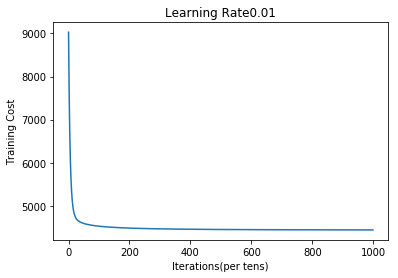

In [154]:
#Alpha = 0.01, iterations = 10000
linear_reg_model(X_train,y_train,X_val,y_val,0.01,10000)

Epochs1 /500: 
Training cost 9886.90062017849|Validation cost 10206.833691281763
Training MAE 97.34987142641053|Validation MAE 97.41578411451103
Epochs2 /500: 
Training cost 9782.099403351143|Validation cost 10103.256554998365
Training MAE 96.3794434227944|Validation MAE 96.44636709294208
Epochs3 /500: 
Training cost 9679.916288685745|Validation cost 10002.250500329612
Training MAE 95.41841860824212|Validation MAE 95.4871227346219
Epochs4 /500: 
Training cost 9580.221819534825|Validation cost 9903.692160300627
Training MAE 94.46672700284228|Validation MAE 94.53791263826217
Epochs5 /500: 
Training cost 9482.900342638313|Validation cost 9807.470800886089
Training MAE 93.52429747505373|Validation MAE 93.59860258525727
Epochs6 /500: 
Training cost 9387.84808728404|Validation cost 9713.486605351047
Training MAE 92.59105789469669|Validation MAE 92.66906228438847
Epochs7 /500: 
Training cost 9294.97152477149|Validation cost 9621.649205610478
Training MAE 91.66693527361365|Validation MAE 91.74

Epochs145 /500: 
Training cost 5027.135900053934|Validation cost 5381.903044154604
Training MAE 47.24351529408661|Validation MAE 48.088740254219005
Epochs146 /500: 
Training cost 5020.867207972422|Validation cost 5375.539597909923
Training MAE 47.26886861138964|Validation MAE 48.11413726345885
Epochs147 /500: 
Training cost 5014.709137143179|Validation cost 5369.286552883769
Training MAE 47.29518778761028|Validation MAE 48.14030235247877
Epochs148 /500: 
Training cost 5008.6595446400615|Validation cost 5363.1417934779265
Training MAE 47.32256698221294|Validation MAE 48.167412162169185
Epochs149 /500: 
Training cost 5002.716330173817|Validation cost 5357.10324591535
Training MAE 47.350793109678975|Validation MAE 48.195208458168665
Epochs150 /500: 
Training cost 4996.877435232338|Validation cost 5351.168877400523
Training MAE 47.379697356266554|Validation MAE 48.22407235299854
Epochs151 /500: 
Training cost 4991.140842238471|Validation cost 5345.336695296898
Training MAE 47.4092650272090

Epochs241 /500: 
Training cost 4725.451698818494|Validation cost 5072.2099755619
Training MAE 50.77982543633897|Validation MAE 51.608080204544464
Epochs242 /500: 
Training cost 4724.075819811424|Validation cost 5070.772070825679
Training MAE 50.81190442111233|Validation MAE 51.64090637351397
Epochs243 /500: 
Training cost 4722.71803179785|Validation cost 5069.352739020386
Training MAE 50.843698182138006|Validation MAE 51.67345749982025
Epochs244 /500: 
Training cost 4721.378014323502|Validation cost 5067.951658114656
Training MAE 50.87521202850389|Validation MAE 51.70573311552447
Epochs245 /500: 
Training cost 4720.055453093007|Validation cost 5066.568512185072
Training MAE 50.90648899746927|Validation MAE 51.7377213430151
Epochs246 /500: 
Training cost 4718.750039848299|Validation cost 5065.2029912964745
Training MAE 50.93755584257691|Validation MAE 51.769454127241474
Epochs247 /500: 
Training cost 4717.461472249446|Validation cost 5063.8547913846805
Training MAE 50.96834860654586|Val

Epochs326 /500: 
Training cost 4650.778912444808|Validation cost 4993.7725614068095
Training MAE 52.73570943553027|Validation MAE 53.58934113586164
Epochs327 /500: 
Training cost 4650.2212069209|Validation cost 4993.185795787258
Training MAE 52.75078535613331|Validation MAE 53.604740322853175
Epochs328 /500: 
Training cost 4649.6679957011165|Validation cost 4992.603808693867
Training MAE 52.765756269466394|Validation MAE 53.62000456035722
Epochs329 /500: 
Training cost 4649.1192140041585|Validation cost 4992.02653308771
Training MAE 52.780591328895305|Validation MAE 53.635121296512004
Epochs330 /500: 
Training cost 4648.574798203785|Validation cost 4991.453903096308
Training MAE 52.795281312776495|Validation MAE 53.650125710624245
Epochs331 /500: 
Training cost 4648.034685806664|Validation cost 4990.885853991593
Training MAE 52.809815932858925|Validation MAE 53.664974613750395
Epochs332 /500: 
Training cost 4647.498815430662|Validation cost 4990.322322168308
Training MAE 52.82419346221

Epochs417 /500: 
Training cost 4612.85177815609|Validation cost 4954.123418608271
Training MAE 53.627835562544874|Validation MAE 54.49664603335319
Epochs418 /500: 
Training cost 4612.534547332082|Validation cost 4953.795242844614
Training MAE 53.63355170283109|Validation MAE 54.50243947714346
Epochs419 /500: 
Training cost 4612.218809152246|Validation cost 4953.468688696213
Training MAE 53.639196637951585|Validation MAE 54.508171228311355
Epochs420 /500: 
Training cost 4611.9045492386185|Validation cost 4953.143740610063
Training MAE 53.64476933203323|Validation MAE 54.513837042977144
Epochs421 /500: 
Training cost 4611.591753423347|Validation cost 4952.820383253179
Training MAE 53.650274737879336|Validation MAE 54.51944867098148
Epochs422 /500: 
Training cost 4611.280407744963|Validation cost 4952.498601508813
Training MAE 53.655712679400374|Validation MAE 54.52499214448156
Epochs423 /500: 
Training cost 4610.970498444741|Validation cost 4952.1783804727365
Training MAE 53.661085212192

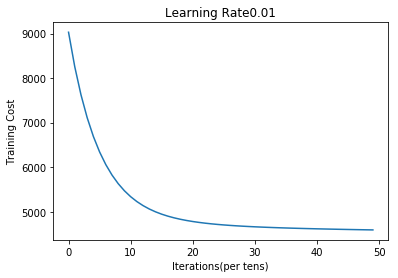

In [160]:
#Alpha = 0.01, iterations = 500
linear_reg_model(X_train,y_train,X_val,y_val,0.01,500)

Epochs1 /1000: 
Training cost 9886.90062017849|Validation cost 10206.833691281763
Training MAE 97.34987142641053|Validation MAE 97.41578411451103
Epochs2 /1000: 
Training cost 9782.099403351143|Validation cost 10103.256554998365
Training MAE 96.3794434227944|Validation MAE 96.44636709294208
Epochs3 /1000: 
Training cost 9679.916288685745|Validation cost 10002.250500329612
Training MAE 95.41841860824212|Validation MAE 95.4871227346219
Epochs4 /1000: 
Training cost 9580.221819534825|Validation cost 9903.692160300627
Training MAE 94.46672700284228|Validation MAE 94.53791263826217
Epochs5 /1000: 
Training cost 9482.900342638313|Validation cost 9807.470800886089
Training MAE 93.52429747505373|Validation MAE 93.59860258525727
Epochs6 /1000: 
Training cost 9387.84808728404|Validation cost 9713.486605351047
Training MAE 92.59105789469669|Validation MAE 92.66906228438847
Epochs7 /1000: 
Training cost 9294.97152477149|Validation cost 9621.649205610478
Training MAE 91.66693527361365|Validation MA

Epochs143 /1000: 
Training cost 5040.013938147045|Validation cost 5394.969816958547
Training MAE 47.19573781820337|Validation MAE 48.04016115091952
Epochs144 /1000: 
Training cost 5033.517399828408|Validation cost 5388.379049894277
Training MAE 47.21913703509473|Validation MAE 48.064011241230496
Epochs145 /1000: 
Training cost 5027.135900053934|Validation cost 5381.903044154604
Training MAE 47.24351529408661|Validation MAE 48.088740254219005
Epochs146 /1000: 
Training cost 5020.867207972422|Validation cost 5375.539597909923
Training MAE 47.26886861138964|Validation MAE 48.11413726345885
Epochs147 /1000: 
Training cost 5014.709137143179|Validation cost 5369.286552883769
Training MAE 47.29518778761028|Validation MAE 48.14030235247877
Epochs148 /1000: 
Training cost 5008.6595446400615|Validation cost 5363.1417934779265
Training MAE 47.32256698221294|Validation MAE 48.167412162169185
Epochs149 /1000: 
Training cost 5002.716330173817|Validation cost 5357.10324591535
Training MAE 47.35079310

Epochs230 /1000: 
Training cost 4741.878574045325|Validation cost 5089.351335526432
Training MAE 50.411177887354434|Validation MAE 51.23411561385635
Epochs231 /1000: 
Training cost 4740.280653259749|Validation cost 5087.686000268488
Training MAE 50.445887522219806|Validation MAE 51.26911572602939
Epochs232 /1000: 
Training cost 4738.70479231486|Validation cost 5086.043220170453
Training MAE 50.48037785880807|Validation MAE 51.30397566915501
Epochs233 /1000: 
Training cost 4737.150594236428|Validation cost 5084.422597383805
Training MAE 50.51454781533418|Validation MAE 51.33861457589747
Epochs234 /1000: 
Training cost 4735.617669722021|Validation cost 5082.823741656093
Training MAE 50.54845614045006|Validation MAE 51.372994833889
Epochs235 /1000: 
Training cost 4734.10563698916|Validation cost 5081.246270181645
Training MAE 50.58212856803464|Validation MAE 51.40708650832125
Epochs236 /1000: 
Training cost 4732.614121626515|Validation cost 5079.68980745524
Training MAE 50.61555958063466|

Epochs330 /1000: 
Training cost 4648.574798203785|Validation cost 4991.453903096308
Training MAE 52.795281312776495|Validation MAE 53.650125710624245
Epochs331 /1000: 
Training cost 4648.034685806664|Validation cost 4990.885853991593
Training MAE 52.809815932858925|Validation MAE 53.664974613750395
Epochs332 /1000: 
Training cost 4647.498815430662|Validation cost 4990.322322168308
Training MAE 52.824193462211525|Validation MAE 53.679662727448296
Epochs333 /1000: 
Training cost 4646.967126783553|Validation cost 4989.763245122825
Training MAE 52.83841634613776|Validation MAE 53.69419813456664
Epochs334 /1000: 
Training cost 4646.439560642161|Validation cost 4989.208561432367
Training MAE 52.8524793485047|Validation MAE 53.70857976069836
Epochs335 /1000: 
Training cost 4645.916058831894|Validation cost 4988.658210734651
Training MAE 52.86640313025163|Validation MAE 53.72281349027122
Epochs336 /1000: 
Training cost 4645.396564206695|Validation cost 4988.112133707918
Training MAE 52.8801774

Epochs413 /1000: 
Training cost 4614.135923020993|Validation cost 4955.452656794006
Training MAE 53.60433120477277|Validation MAE 54.4727706430836
Epochs414 /1000: 
Training cost 4613.812573504413|Validation cost 4955.117834502506
Training MAE 53.61030933196918|Validation MAE 54.478846125851966
Epochs415 /1000: 
Training cost 4613.490776321796|Validation cost 4954.784698316642
Training MAE 53.61621618885594|Validation MAE 54.48484809069193
Epochs416 /1000: 
Training cost 4613.170516216125|Validation cost 4954.453231764056
Training MAE 53.622052090230255|Validation MAE 54.490780309358456
Epochs417 /1000: 
Training cost 4612.85177815609|Validation cost 4954.123418608271
Training MAE 53.627835562544874|Validation MAE 54.49664603335319
Epochs418 /1000: 
Training cost 4612.534547332082|Validation cost 4953.795242844614
Training MAE 53.63355170283109|Validation MAE 54.50243947714346
Epochs419 /1000: 
Training cost 4612.218809152246|Validation cost 4953.468688696213
Training MAE 53.6391966379

Epochs499 /1000: 
Training cost 4590.809048377642|Validation cost 4931.523046748661
Training MAE 53.93410311804573|Validation MAE 54.80465685406618
Epochs500 /1000: 
Training cost 4590.580105732604|Validation cost 4931.290599255355
Training MAE 53.93627667730557|Validation MAE 54.8068407055497
Epochs501 /1000: 
Training cost 4590.351939246211|Validation cost 4931.058987906009
Training MAE 53.938419725258015|Validation MAE 54.80899458593081
Epochs502 /1000: 
Training cost 4590.124543864859|Validation cost 4930.828207081767
Training MAE 53.94053278487617|Validation MAE 54.81111672294251
Epochs503 /1000: 
Training cost 4589.897914588892|Validation cost 4930.598251222913
Training MAE 53.94262211627649|Validation MAE 54.81321145892224
Epochs504 /1000: 
Training cost 4589.6720464717955|Validation cost 4930.369114828022
Training MAE 53.94468267085338|Validation MAE 54.815297568676165
Epochs505 /1000: 
Training cost 4589.446934619409|Validation cost 4930.14079245312
Training MAE 53.94671579069

Epochs591 /1000: 
Training cost 4572.480070543084|Validation cost 4913.06423754906
Training MAE 54.04769367546307|Validation MAE 54.9176117437472
Epochs592 /1000: 
Training cost 4572.306452662321|Validation cost 4912.89080790518
Training MAE 54.04821405039673|Validation MAE 54.9181365178636
Epochs593 /1000: 
Training cost 4572.1333003142345|Validation cost 4912.71786867214
Training MAE 54.048722371770076|Validation MAE 54.918649833014
Epochs594 /1000: 
Training cost 4571.960611273723|Validation cost 4912.545417385135
Training MAE 54.0492237249127|Validation MAE 54.91915037143626
Epochs595 /1000: 
Training cost 4571.788383332065|Validation cost 4912.373451597971
Training MAE 54.049712333272005|Validation MAE 54.91963826266607
Epochs596 /1000: 
Training cost 4571.616614296744|Validation cost 4912.201968882866
Training MAE 54.05018888437626|Validation MAE 54.92011468333524
Epochs597 /1000: 
Training cost 4571.445301991275|Validation cost 4912.030966830255
Training MAE 54.05065478120228|Va

Epochs671 /1000: 
Training cost 4559.901224285311|Validation cost 4900.562444475563
Training MAE 54.06401782956053|Validation MAE 54.93401513646699
Epochs672 /1000: 
Training cost 4559.758934998645|Validation cost 4900.421730292382
Training MAE 54.06397984990783|Validation MAE 54.93401848311461
Epochs673 /1000: 
Training cost 4559.616973699075|Validation cost 4900.281355383928
Training MAE 54.06393677834992|Validation MAE 54.93401867610616
Epochs674 /1000: 
Training cost 4559.475339071042|Validation cost 4900.14131832035
Training MAE 54.06388943794037|Validation MAE 54.93401293278071
Epochs675 /1000: 
Training cost 4559.334029806723|Validation cost 4900.001617680576
Training MAE 54.06383675361653|Validation MAE 54.9340013120318
Epochs676 /1000: 
Training cost 4559.193044605969|Validation cost 4899.8622520522285
Training MAE 54.06377887725781|Validation MAE 54.93398387217985
Epochs677 /1000: 
Training cost 4559.052382176246|Validation cost 4899.723220031574
Training MAE 54.0637174702334

Epochs766 /1000: 
Training cost 4547.687636978683|Validation cost 4888.535880347084
Training MAE 54.04522203900364|Validation MAE 54.919020078180715
Epochs767 /1000: 
Training cost 4547.571537814973|Validation cost 4888.422035456165
Training MAE 54.044911900570426|Validation MAE 54.918765151918954
Epochs768 /1000: 
Training cost 4547.455669315958|Validation cost 4888.308425187619
Training MAE 54.04460165867586|Validation MAE 54.91850771638062
Epochs769 /1000: 
Training cost 4547.340030694225|Validation cost 4888.195048705014
Training MAE 54.044289193654755|Validation MAE 54.9182477956446
Epochs770 /1000: 
Training cost 4547.224621166281|Validation cost 4888.0819051762655
Training MAE 54.0439743967217|Validation MAE 54.91798824550746
Epochs771 /1000: 
Training cost 4547.109439952522|Validation cost 4887.96899377359
Training MAE 54.043657291275615|Validation MAE 54.91772667526174
Epochs772 /1000: 
Training cost 4546.994486277215|Validation cost 4887.856313673493
Training MAE 54.043337900

Epochs864 /1000: 
Training cost 4537.299140206013|Validation cost 4878.380952016077
Training MAE 54.01043960522348|Validation MAE 54.892388589168704
Epochs865 /1000: 
Training cost 4537.202420640619|Validation cost 4878.286693882442
Training MAE 54.01006319934059|Validation MAE 54.892101983574776
Epochs866 /1000: 
Training cost 4537.10586998873|Validation cost 4878.192605342109
Training MAE 54.00968657857595|Validation MAE 54.89181419478982
Epochs867 /1000: 
Training cost 4537.009487752272|Validation cost 4878.09868587538
Training MAE 54.00930913245602|Validation MAE 54.89152523297154
Epochs868 /1000: 
Training cost 4536.913273435344|Validation cost 4878.00493496491
Training MAE 54.008930983829295|Validation MAE 54.89123869405936
Epochs869 /1000: 
Training cost 4536.817226544219|Validation cost 4877.91135209569
Training MAE 54.00855274711312|Validation MAE 54.89095596204223
Epochs870 /1000: 
Training cost 4536.721346587314|Validation cost 4877.817936755035
Training MAE 54.0081741408338

Epochs947 /1000: 
Training cost 4529.804140218795|Validation cost 4871.090857167852
Training MAE 53.97913452377164|Validation MAE 54.868222548539336
Epochs948 /1000: 
Training cost 4529.719925287256|Validation cost 4871.0091000338725
Training MAE 53.97876219931007|Validation MAE 54.8679213069512
Epochs949 /1000: 
Training cost 4529.635844349499|Validation cost 4870.927476252821
Training MAE 53.978393161124224|Validation MAE 54.86761941384162
Epochs950 /1000: 
Training cost 4529.55189705306|Validation cost 4870.845985460967
Training MAE 53.97802473071427|Validation MAE 54.86731687438003
Epochs951 /1000: 
Training cost 4529.468083046874|Validation cost 4870.764627296056
Training MAE 53.97765847965609|Validation MAE 54.86701369369494
Epochs952 /1000: 
Training cost 4529.384401981256|Validation cost 4870.6834013973
Training MAE 53.977291936107704|Validation MAE 54.866709876874296
Epochs953 /1000: 
Training cost 4529.3008535079|Validation cost 4870.602307405377
Training MAE 53.9769249008631

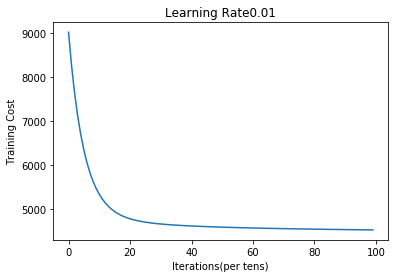

In [161]:
#Alpha = 0.01, iterations = 1000
linear_reg_model(X_train,y_train,X_val,y_val,0.01,1000)

Epochs1 /5000: 
Training cost 9886.90062017849|Validation cost 10206.833691281763
Training MAE 97.34987142641053|Validation MAE 97.41578411451103
Epochs2 /5000: 
Training cost 9782.099403351143|Validation cost 10103.256554998365
Training MAE 96.3794434227944|Validation MAE 96.44636709294208
Epochs3 /5000: 
Training cost 9679.916288685745|Validation cost 10002.250500329612
Training MAE 95.41841860824212|Validation MAE 95.4871227346219
Epochs4 /5000: 
Training cost 9580.221819534825|Validation cost 9903.692160300627
Training MAE 94.46672700284228|Validation MAE 94.53791263826217
Epochs5 /5000: 
Training cost 9482.900342638313|Validation cost 9807.470800886089
Training MAE 93.52429747505373|Validation MAE 93.59860258525727
Epochs6 /5000: 
Training cost 9387.84808728404|Validation cost 9713.486605351047
Training MAE 92.59105789469669|Validation MAE 92.66906228438847
Epochs7 /5000: 
Training cost 9294.97152477149|Validation cost 9621.649205610478
Training MAE 91.66693527361365|Validation MA

Epochs88 /5000: 
Training cost 5664.198852074298|Validation cost 6022.562140981605
Training MAE 49.23360126124912|Validation MAE 50.02797073989354
Epochs89 /5000: 
Training cost 5646.145281696536|Validation cost 6004.5113745927765
Training MAE 49.09287105750486|Validation MAE 49.88965441355859
Epochs90 /5000: 
Training cost 5628.434213707897|Validation cost 5986.799030939742
Training MAE 48.95956139353168|Validation MAE 49.757809718076494
Epochs91 /5000: 
Training cost 5611.058847220925|Validation cost 5969.418437259335
Training MAE 48.83252493584802|Validation MAE 49.63171834162338
Epochs92 /5000: 
Training cost 5594.012518875632|Validation cost 5952.363055206581
Training MAE 48.711447005843766|Validation MAE 49.51111124645656
Epochs93 /5000: 
Training cost 5577.2887000148485|Validation cost 5935.6264780922
Training MAE 48.5958980166055|Validation MAE 49.39653670018373
Epochs94 /5000: 
Training cost 5560.880993918865|Validation cost 5919.202428179066
Training MAE 48.48610283282727|Val

Epochs188 /5000: 
Training cost 4835.55779371777|Validation cost 5186.305214160642
Training MAE 48.79371843117492|Validation MAE 49.61289112267937
Epochs189 /5000: 
Training cost 4832.5457332148035|Validation cost 5183.205636808643
Training MAE 48.8342767005112|Validation MAE 49.65327550968474
Epochs190 /5000: 
Training cost 4829.581896570455|Validation cost 5180.15470108588
Training MAE 48.87484448733972|Validation MAE 49.693624864456766
Epochs191 /5000: 
Training cost 4826.665376059806|Validation cost 5177.151505011539
Training MAE 48.9153986472922|Validation MAE 49.73418692302499
Epochs192 /5000: 
Training cost 4823.795281791805|Validation cost 5174.195164171339
Training MAE 48.955874158249905|Validation MAE 49.77471757712212
Epochs193 /5000: 
Training cost 4820.970741353152|Validation cost 5171.284811368605
Training MAE 48.996236228849966|Validation MAE 49.81499000771726
Epochs194 /5000: 
Training cost 4818.19089945933|Validation cost 5168.419596282366
Training MAE 49.0366925234781

Epochs292 /5000: 
Training cost 4672.966554755584|Validation cost 5017.134150869509
Training MAE 52.12376533665198|Validation MAE 52.971610671738425
Epochs293 /5000: 
Training cost 4672.207537435421|Validation cost 5016.334996394279
Training MAE 52.14462947743999|Validation MAE 52.99271349306066
Epochs294 /5000: 
Training cost 4671.456096160881|Validation cost 5015.543784423632
Training MAE 52.165334766353254|Validation MAE 53.01362648360161
Epochs295 /5000: 
Training cost 4670.712109915654|Validation cost 5014.76039141926
Training MAE 52.18586030342607|Validation MAE 53.034345376056436
Epochs296 /5000: 
Training cost 4669.97545992626|Validation cost 5013.98469608823
Training MAE 52.20619918186331|Validation MAE 53.054859466889866
Epochs297 /5000: 
Training cost 4669.246029618405|Validation cost 5013.216579339794
Training MAE 52.22635425583699|Validation MAE 53.07519421690385
Epochs298 /5000: 
Training cost 4668.523704574215|Validation cost 5012.455924243046
Training MAE 52.24631274823

Epochs384 /5000: 
Training cost 4624.266088318612|Validation cost 4965.979567022546
Training MAE 53.39856407514263|Validation MAE 54.26479503311697
Epochs385 /5000: 
Training cost 4623.889904912461|Validation cost 4965.587454797379
Training MAE 53.40680666243363|Validation MAE 54.27307932644208
Epochs386 /5000: 
Training cost 4623.515835685928|Validation cost 4965.197630474834
Training MAE 53.41495771041598|Validation MAE 54.28126409147855
Epochs387 /5000: 
Training cost 4623.143856682913|Validation cost 4964.810068561612
Training MAE 53.423028281156114|Validation MAE 54.28935563008224
Epochs388 /5000: 
Training cost 4622.773944330836|Validation cost 4964.42474395983
Training MAE 53.43100534370086|Validation MAE 54.29736762385577
Epochs389 /5000: 
Training cost 4622.406075433577|Validation cost 4964.041631959919
Training MAE 53.43888797536692|Validation MAE 54.30530301812173
Epochs390 /5000: 
Training cost 4622.040227164565|Validation cost 4963.660708233656
Training MAE 53.446687154223

Epochs468 /5000: 
Training cost 4598.3216114156385|Validation cost 4939.177352923834
Training MAE 53.8511543409069|Validation MAE 54.72158913521438
Epochs469 /5000: 
Training cost 4598.065764400105|Validation cost 4938.915830617048
Training MAE 53.854348092068115|Validation MAE 54.72479543760809
Epochs470 /5000: 
Training cost 4597.810882113109|Validation cost 4938.655353384463
Training MAE 53.8574995112621|Validation MAE 54.72795816275347
Epochs471 /5000: 
Training cost 4597.55695733732|Validation cost 4938.3959132582795
Training MAE 53.860607212827325|Validation MAE 54.731078013216106
Epochs472 /5000: 
Training cost 4597.303982943128|Validation cost 4938.137502365182
Training MAE 53.86367706616024|Validation MAE 54.73416271637655
Epochs473 /5000: 
Training cost 4597.051951887237|Validation cost 4937.880112924867
Training MAE 53.86671528320911|Validation MAE 54.73721730024703
Epochs474 /5000: 
Training cost 4596.800857211264|Validation cost 4937.623737248599
Training MAE 53.8697210948

Epochs563 /5000: 
Training cost 4577.539965560213|Validation cost 4918.130010241877
Training MAE 54.02815366603099|Validation MAE 54.89800740742564
Epochs564 /5000: 
Training cost 4577.352336725871|Validation cost 4917.941765986282
Training MAE 54.02903470961808|Validation MAE 54.898889003898546
Epochs565 /5000: 
Training cost 4577.165243187173|Validation cost 4917.754089612678
Training MAE 54.029898579242506|Validation MAE 54.89975360617986
Epochs566 /5000: 
Training cost 4576.978682176448|Validation cost 4917.566978041938
Training MAE 54.030745713691374|Validation MAE 54.90060138677714
Epochs567 /5000: 
Training cost 4576.7926509486315|Validation cost 4917.38042822043
Training MAE 54.031580538063395|Validation MAE 54.901432516484306
Epochs568 /5000: 
Training cost 4576.6071467809725|Validation cost 4917.194437119721
Training MAE 54.032398986988035|Validation MAE 54.90224716439868
Epochs569 /5000: 
Training cost 4576.422166972781|Validation cost 4917.009001736281
Training MAE 54.03320

Epochs665 /5000: 
Training cost 4560.76192239671|Validation cost 4901.413935540096
Training MAE 54.06417105119885|Validation MAE 54.93390874577405
Epochs666 /5000: 
Training cost 4560.617637119353|Validation cost 4901.2711551808525
Training MAE 54.064155581141215|Validation MAE 54.93394058621235
Epochs667 /5000: 
Training cost 4560.473687888527|Validation cost 4901.1287228639085
Training MAE 54.064135513304684|Validation MAE 54.933966073570005
Epochs668 /5000: 
Training cost 4560.330073340894|Validation cost 4900.986637105188
Training MAE 54.064109981499044|Validation MAE 54.93398527093195
Epochs669 /5000: 
Training cost 4560.186792121246|Validation cost 4900.844896429841
Training MAE 54.06408160510316|Validation MAE 54.93399824076844
Epochs670 /5000: 
Training cost 4560.043842882437|Validation cost 4900.703499372175
Training MAE 54.06405115436031|Validation MAE 54.93400768991127
Epochs671 /5000: 
Training cost 4559.901224285311|Validation cost 4900.562444475563
Training MAE 54.0640178

Epochs757 /5000: 
Training cost 4548.743041258558|Validation cost 4889.571182569255
Training MAE 54.047947485654205|Validation MAE 54.92135489819438
Epochs758 /5000: 
Training cost 4548.62483001993|Validation cost 4889.455187706905
Training MAE 54.047650708685|Validation MAE 54.92109656153908
Epochs759 /5000: 
Training cost 4548.506856713249|Validation cost 4889.339435194999
Training MAE 54.0473513440441|Validation MAE 54.920836529374874
Epochs760 /5000: 
Training cost 4548.389120514678|Validation cost 4889.223924156699
Training MAE 54.04705020458857|Validation MAE 54.92057545472967
Epochs761 /5000: 
Training cost 4548.271620604535|Validation cost 4889.108653719782
Training MAE 54.04675085133315|Validation MAE 54.92031174994052
Epochs762 /5000: 
Training cost 4548.154356167263|Validation cost 4888.993623016606
Training MAE 54.046449241902735|Validation MAE 54.92005532523517
Epochs763 /5000: 
Training cost 4548.037326391406|Validation cost 4888.87883118408
Training MAE 54.04614586123856

Epochs846 /5000: 
Training cost 4539.06955775984|Validation cost 4880.1072057709725
Training MAE 54.01717217281033|Validation MAE 54.89750511481491
Epochs847 /5000: 
Training cost 4538.969710022951|Validation cost 4880.009803325134
Training MAE 54.01680328533781|Validation MAE 54.89722478907741
Epochs848 /5000: 
Training cost 4538.870040551692|Validation cost 4879.912580245368
Training MAE 54.01643520917772|Validation MAE 54.896943698211
Epochs849 /5000: 
Training cost 4538.770548806604|Validation cost 4879.815535967202
Training MAE 54.01606690596689|Validation MAE 54.89666125511789
Epochs850 /5000: 
Training cost 4538.671234250647|Validation cost 4879.718669928777
Training MAE 54.01569758336378|Validation MAE 54.89637747157388
Epochs851 /5000: 
Training cost 4538.572096349174|Validation cost 4879.621981570834
Training MAE 54.01532713467765|Validation MAE 54.89609426148298
Epochs852 /5000: 
Training cost 4538.473134569925|Validation cost 4879.525470336699
Training MAE 54.01495557093911

Epochs932 /5000: 
Training cost 4531.0836874601155|Validation cost 4872.333468482052
Training MAE 53.98475002666317|Validation MAE 54.872738910286394
Epochs933 /5000: 
Training cost 4530.997419358234|Validation cost 4872.249666376809
Training MAE 53.98436824095857|Validation MAE 54.872439282716336
Epochs934 /5000: 
Training cost 4530.911290708992|Validation cost 4872.166003263298
Training MAE 53.98398717041233|Validation MAE 54.87213893351931
Epochs935 /5000: 
Training cost 4530.8253011381685|Validation cost 4872.082478754645
Training MAE 53.98360926996873|Validation MAE 54.871838276740725
Epochs936 /5000: 
Training cost 4530.739450273048|Validation cost 4871.999092465576
Training MAE 53.983232782006596|Validation MAE 54.87153966362628
Epochs937 /5000: 
Training cost 4530.653737742409|Validation cost 4871.91584401241
Training MAE 53.98285589376371|Validation MAE 54.87124081763088
Epochs938 /5000: 
Training cost 4530.568163176523|Validation cost 4871.832733013053
Training MAE 53.9824809

Epochs1025 /5000: 
Training cost 4523.612788452703|Validation cost 4865.088541534995
Training MAE 53.95088575491521|Validation MAE 54.84459155520494
Epochs1026 /5000: 
Training cost 4523.53806304154|Validation cost 4865.01619578332
Training MAE 53.950534873396904|Validation MAE 54.84428669937436
Epochs1027 /5000: 
Training cost 4523.46344782013|Validation cost 4864.943958915876
Training MAE 53.95018408471721|Validation MAE 54.843981449643834
Epochs1028 /5000: 
Training cost 4523.388942525895|Validation cost 4864.871830663882
Training MAE 53.94983299975887|Validation MAE 54.84367580895074
Epochs1029 /5000: 
Training cost 4523.314546897197|Validation cost 4864.799810759549
Training MAE 53.94948162113812|Validation MAE 54.843369780211596
Epochs1030 /5000: 
Training cost 4523.24026067334|Validation cost 4864.7278989360675
Training MAE 53.94913002528074|Validation MAE 54.84306336632225
Epochs1031 /5000: 
Training cost 4523.166083594559|Validation cost 4864.656094927613
Training MAE 53.94877

Epochs1118 /5000: 
Training cost 4517.103177426312|Validation cost 4858.7939724219195
Training MAE 53.919534042701684|Validation MAE 54.815636176679675
Epochs1119 /5000: 
Training cost 4517.0376866405095|Validation cost 4858.730718674058
Training MAE 53.9192090183185|Validation MAE 54.81533094511267
Epochs1120 /5000: 
Training cost 4516.972285136218|Validation cost 4858.667552492475
Training MAE 53.918883828909486|Validation MAE 54.81502549370741
Epochs1121 /5000: 
Training cost 4516.906972722061|Validation cost 4858.604473682884
Training MAE 53.9185584758809|Validation MAE 54.81471982408185
Epochs1122 /5000: 
Training cost 4516.841749207282|Validation cost 4858.541482051639
Training MAE 53.918232960629844|Validation MAE 54.81441393784402
Epochs1123 /5000: 
Training cost 4516.776614401727|Validation cost 4858.478577405728
Training MAE 53.91790886449631|Validation MAE 54.81410783659216
Epochs1124 /5000: 
Training cost 4516.711568115855|Validation cost 4858.415759552774
Training MAE 53.9

Epochs1213 /5000: 
Training cost 4511.255515004436|Validation cost 4853.150840388815
Training MAE 53.88974261598896|Validation MAE 54.78697669369168
Epochs1214 /5000: 
Training cost 4511.197728613782|Validation cost 4853.095118191382
Training MAE 53.889435761797195|Validation MAE 54.78668628627393
Epochs1215 /5000: 
Training cost 4511.140015732791|Validation cost 4853.0394676075075
Training MAE 53.88912888546749|Validation MAE 54.78639575291512
Epochs1216 /5000: 
Training cost 4511.082376218113|Validation cost 4852.983888492791
Training MAE 53.88882334022338|Validation MAE 54.78610509457241
Epochs1217 /5000: 
Training cost 4511.024809926807|Validation cost 4852.9283807032625
Training MAE 53.88851790850872|Validation MAE 54.785814312198
Epochs1218 /5000: 
Training cost 4510.967316716349|Validation cost 4852.87294409537
Training MAE 53.88821238200224|Validation MAE 54.78552340673907
Epochs1219 /5000: 
Training cost 4510.909896444615|Validation cost 4852.817578525994
Training MAE 53.88790

Epochs1318 /5000: 
Training cost 4505.564256043947|Validation cost 4847.665835557389
Training MAE 53.85922144788152|Validation MAE 54.75831756157761
Epochs1319 /5000: 
Training cost 4505.513475527539|Validation cost 4847.616916827816
Training MAE 53.85894441612181|Validation MAE 54.75806189810168
Epochs1320 /5000: 
Training cost 4505.462755444181|Validation cost 4847.568056592189
Training MAE 53.858667423818666|Validation MAE 54.757806676841255
Epochs1321 /5000: 
Training cost 4505.412095686122|Validation cost 4847.51925474289
Training MAE 53.85839037536938|Validation MAE 54.75755137321394
Epochs1322 /5000: 
Training cost 4505.361496145886|Validation cost 4847.4705111725825
Training MAE 53.858113271302216|Validation MAE 54.75729598783098
Epochs1323 /5000: 
Training cost 4505.31095671628|Validation cost 4847.421825774216
Training MAE 53.8578375052398|Validation MAE 54.75704052130088
Epochs1324 /5000: 
Training cost 4505.260477290375|Validation cost 4847.373198441019
Training MAE 53.8575

Epochs1411 /5000: 
Training cost 4501.086977202436|Validation cost 4843.353446494046
Training MAE 53.83425303664945|Validation MAE 54.73582837821936
Epochs1412 /5000: 
Training cost 4501.041389204824|Validation cost 4843.309541466601
Training MAE 53.833995724905186|Validation MAE 54.73559888924349
Epochs1413 /5000: 
Training cost 4500.995852685743|Validation cost 4843.265686021197
Training MAE 53.83373837980933|Validation MAE 54.73536933544441
Epochs1414 /5000: 
Training cost 4500.950367559444|Validation cost 4843.221880072825
Training MAE 53.83348186975965|Validation MAE 54.73513971728187
Epochs1415 /5000: 
Training cost 4500.904933740379|Validation cost 4843.178123536683
Training MAE 53.83322567602157|Validation MAE 54.7349100352138
Epochs1416 /5000: 
Training cost 4500.859551143199|Validation cost 4843.134416328175
Training MAE 53.83296944869244|Validation MAE 54.7346802896964
Epochs1417 /5000: 
Training cost 4500.814219682753|Validation cost 4843.090758362904
Training MAE 53.832713

Epochs1504 /5000: 
Training cost 4497.056946109596|Validation cost 4839.471927985225
Training MAE 53.81120115784929|Validation MAE 54.714779820626006
Epochs1505 /5000: 
Training cost 4497.015803089063|Validation cost 4839.432295310315
Training MAE 53.810959797858665|Validation MAE 54.71455389147122
Epochs1506 /5000: 
Training cost 4496.974704354907|Validation cost 4839.392705112458
Training MAE 53.81071841977869|Validation MAE 54.71432792826901
Epochs1507 /5000: 
Training cost 4496.933649837599|Validation cost 4839.353157323231
Training MAE 53.81047732686511|Validation MAE 54.71410193134714
Epochs1508 /5000: 
Training cost 4496.892639467762|Validation cost 4839.31365187436
Training MAE 53.810236576637436|Validation MAE 54.713875901032225
Epochs1509 /5000: 
Training cost 4496.851673176167|Validation cost 4839.27418869773
Training MAE 53.80999665750061|Validation MAE 54.7136498376497
Epochs1510 /5000: 
Training cost 4496.810750893738|Validation cost 4839.234767725373
Training MAE 53.8097

Epochs1597 /5000: 
Training cost 4493.411497308499|Validation cost 4835.959351726667
Training MAE 53.78933058323953|Validation MAE 54.69448646659372
Epochs1598 /5000: 
Training cost 4493.37419378666|Validation cost 4835.923395326837
Training MAE 53.78910415046272|Validation MAE 54.69428181755112
Epochs1599 /5000: 
Training cost 4493.336928675561|Validation cost 4835.887475641145
Training MAE 53.78887848473236|Validation MAE 54.69407714728735
Epochs1600 /5000: 
Training cost 4493.29970191796|Validation cost 4835.851592613652
Training MAE 53.78865301913047|Validation MAE 54.69387245603724
Epochs1601 /5000: 
Training cost 4493.262513456734|Validation cost 4835.815746188537
Training MAE 53.78842754540474|Validation MAE 54.693667744034876
Epochs1602 /5000: 
Training cost 4493.225363234874|Validation cost 4835.779936310092
Training MAE 53.78820206376385|Validation MAE 54.69346301151353
Epochs1603 /5000: 
Training cost 4493.188251195486|Validation cost 4835.74416292273
Training MAE 53.7879780

Epochs1692 /5000: 
Training cost 4490.031594197715|Validation cost 4832.700033783035
Training MAE 53.768739123334|Validation MAE 54.67554240321967
Epochs1693 /5000: 
Training cost 4489.997699165357|Validation cost 4832.66733066416
Training MAE 53.76853122447238|Validation MAE 54.6753471948217
Epochs1694 /5000: 
Training cost 4489.963837581395|Validation cost 4832.634659425463
Training MAE 53.76832332365025|Validation MAE 54.675151978097844
Epochs1695 /5000: 
Training cost 4489.9300093982965|Validation cost 4832.6020200208
Training MAE 53.76811542102966|Validation MAE 54.67495675322322
Epochs1696 /5000: 
Training cost 4489.896214568622|Validation cost 4832.569412404123
Training MAE 53.76790751677217|Validation MAE 54.674761520372336
Epochs1697 /5000: 
Training cost 4489.86245304502|Validation cost 4832.536836529465
Training MAE 53.76769961103879|Validation MAE 54.67456627971917
Epochs1698 /5000: 
Training cost 4489.828724780229|Validation cost 4832.504292350957
Training MAE 53.767491703

Epochs1787 /5000: 
Training cost 4486.954608450635|Validation cost 4829.729470824484
Training MAE 53.74962962685242|Validation MAE 54.65749320682853
Epochs1788 /5000: 
Training cost 4486.923690577186|Validation cost 4829.699602119288
Training MAE 53.74943465899802|Validation MAE 54.657308971322124
Epochs1789 /5000: 
Training cost 4486.892802009739|Validation cost 4829.669761284723
Training MAE 53.749239753850404|Validation MAE 54.65712473428028
Epochs1790 /5000: 
Training cost 4486.861942708408|Validation cost 4829.639948282296
Training MAE 53.749044851486175|Validation MAE 54.65694049583746
Epochs1791 /5000: 
Training cost 4486.831112633371|Validation cost 4829.610163073592
Training MAE 53.748849952033645|Validation MAE 54.65675625612773
Epochs1792 /5000: 
Training cost 4486.800311744883|Validation cost 4829.580405620259
Training MAE 53.748655055620794|Validation MAE 54.65657201528472
Epochs1793 /5000: 
Training cost 4486.769540003269|Validation cost 4829.55067588402
Training MAE 53.7

Epochs1879 /5000: 
Training cost 4484.228021709428|Validation cost 4827.093574021435
Training MAE 53.7323041921666|Validation MAE 54.64124491583631
Epochs1880 /5000: 
Training cost 4484.199641551734|Validation cost 4827.066116797287
Training MAE 53.73212423312452|Validation MAE 54.64107422799806
Epochs1881 /5000: 
Training cost 4484.171287310054|Validation cost 4827.038684181123
Training MAE 53.73194427964316|Validation MAE 54.64090353855166
Epochs1882 /5000: 
Training cost 4484.142958950439|Validation cost 4827.011276140362
Training MAE 53.731764331823385|Validation MAE 54.640732847610145
Epochs1883 /5000: 
Training cost 4484.114656439002|Validation cost 4826.983892642476
Training MAE 53.73158471501728|Validation MAE 54.640562155286226
Epochs1884 /5000: 
Training cost 4484.086379741913|Validation cost 4826.956533654997
Training MAE 53.73140609356487|Validation MAE 54.64039146169229
Epochs1885 /5000: 
Training cost 4484.058128825397|Validation cost 4826.929199145513
Training MAE 53.731

Epochs1977 /5000: 
Training cost 4481.564983489711|Validation cost 4824.514971276804
Training MAE 53.71614651495545|Validation MAE 54.624896987880035
Epochs1978 /5000: 
Training cost 4481.538990152879|Validation cost 4824.489779067667
Training MAE 53.715990737015694|Validation MAE 54.62473459735871
Epochs1979 /5000: 
Training cost 4481.513019663308|Validation cost 4824.4646085281875
Training MAE 53.715834960279594|Validation MAE 54.62457220873152
Epochs1980 /5000: 
Training cost 4481.487071992197|Validation cost 4824.439459630855
Training MAE 53.71567918483203|Validation MAE 54.624409822090286
Epochs1981 /5000: 
Training cost 4481.4611471107855|Validation cost 4824.414332348202
Training MAE 53.71552341075765|Validation MAE 54.62424743752656
Epochs1982 /5000: 
Training cost 4481.435244990361|Validation cost 4824.389226652807
Training MAE 53.715367638140876|Validation MAE 54.62408505513165
Epochs1983 /5000: 
Training cost 4481.409365602256|Validation cost 4824.3641425173
Training MAE 53.

Epochs2069 /5000: 
Training cost 4479.26574482358|Validation cost 4822.284667026169
Training MAE 53.70239430661037|Validation MAE 54.61047254247005
Epochs2070 /5000: 
Training cost 4479.241738515042|Validation cost 4822.26135881485
Training MAE 53.70224999634436|Validation MAE 54.61032886930548
Epochs2071 /5000: 
Training cost 4479.217752589493|Validation cost 4822.2380699243395
Training MAE 53.70210568724597|Validation MAE 54.61018519471358
Epochs2072 /5000: 
Training cost 4479.193787022086|Validation cost 4822.214800331007
Training MAE 53.7019615378588|Validation MAE 54.61004151877327
Epochs2073 /5000: 
Training cost 4479.16984178802|Validation cost 4822.191550011258
Training MAE 53.70181766205083|Validation MAE 54.60989784156331
Epochs2074 /5000: 
Training cost 4479.145916862526|Validation cost 4822.16831894154
Training MAE 53.70167450326951|Validation MAE 54.60975416316223
Epochs2075 /5000: 
Training cost 4479.122012220879|Validation cost 4822.145107098335
Training MAE 53.701532038

Epochs2165 /5000: 
Training cost 4477.0506615914355|Validation cost 4820.131927706422
Training MAE 53.68909365240152|Validation MAE 54.597220490108775
Epochs2166 /5000: 
Training cost 4477.028504116824|Validation cost 4820.110371753647
Training MAE 53.68896030233575|Validation MAE 54.59709320592562
Epochs2167 /5000: 
Training cost 4477.006364808506|Validation cost 4820.088833017044
Training MAE 53.68882695441177|Validation MAE 54.59696591907088
Epochs2168 /5000: 
Training cost 4476.984243645078|Validation cost 4820.067311476324
Training MAE 53.68869397606116|Validation MAE 54.596838629610296
Epochs2169 /5000: 
Training cost 4476.962140605164|Validation cost 4820.045807111234
Training MAE 53.68856143527895|Validation MAE 54.59671133760942
Epochs2170 /5000: 
Training cost 4476.940055667421|Validation cost 4820.024319901549
Training MAE 53.68842889632448|Validation MAE 54.59658404313363
Epochs2171 /5000: 
Training cost 4476.917988810542|Validation cost 4820.002849827078
Training MAE 53.68

Epochs2262 /5000: 
Training cost 4474.982921708394|Validation cost 4818.118273393738
Training MAE 53.67661955800169|Validation MAE 54.585654694395146
Epochs2263 /5000: 
Training cost 4474.962431296082|Validation cost 4818.098297410982
Training MAE 53.676497518800694|Validation MAE 54.585546355337286
Epochs2264 /5000: 
Training cost 4474.9419571167955|Validation cost 4818.078336815188
Training MAE 53.67637552457345|Validation MAE 54.58543800903244
Epochs2265 /5000: 
Training cost 4474.921499152024|Validation cost 4818.0583915888665
Training MAE 53.67625372281786|Validation MAE 54.58532965553887
Epochs2266 /5000: 
Training cost 4474.901057383283|Validation cost 4818.038461714558
Training MAE 53.67613192221958|Validation MAE 54.58522129491473
Epochs2267 /5000: 
Training cost 4474.880631792119|Validation cost 4818.018547174831
Training MAE 53.676010122828956|Validation MAE 54.58511292721803
Epochs2268 /5000: 
Training cost 4474.860222360101|Validation cost 4817.998647952277
Training MAE 53

Epochs2361 /5000: 
Training cost 4473.030313180156|Validation cost 4816.212646153339
Training MAE 53.66488501205755|Validation MAE 54.57530621250418
Epochs2362 /5000: 
Training cost 4473.011344141923|Validation cost 4816.194112601524
Training MAE 53.66476829501948|Validation MAE 54.57520589450558
Epochs2363 /5000: 
Training cost 4472.992389629122|Validation cost 4816.175592825801
Training MAE 53.664651580974734|Validation MAE 54.57510557080817
Epochs2364 /5000: 
Training cost 4472.9734496257215|Validation cost 4816.157086811062
Training MAE 53.66453492388355|Validation MAE 54.57500524146098
Epochs2365 /5000: 
Training cost 4472.95452411571|Validation cost 4816.138594542228
Training MAE 53.6644187202991|Validation MAE 54.574904906512934
Epochs2366 /5000: 
Training cost 4472.935613083099|Validation cost 4816.1201160042365
Training MAE 53.66430334801156|Validation MAE 54.57480456601285
Epochs2367 /5000: 
Training cost 4472.916716511926|Validation cost 4816.101651182048
Training MAE 53.664

Epochs2453 /5000: 
Training cost 4471.344013684312|Validation cost 4814.563388727682
Training MAE 53.654754656564386|Validation MAE 54.566312190961085
Epochs2454 /5000: 
Training cost 4471.326316636477|Validation cost 4814.5460619990345
Training MAE 53.65464639242568|Validation MAE 54.56621723638886
Epochs2455 /5000: 
Training cost 4471.308632730024|Validation cost 4814.528747744022
Training MAE 53.65453813113802|Validation MAE 54.566122588251794
Epochs2456 /5000: 
Training cost 4471.290961950869|Validation cost 4814.511445949408
Training MAE 53.65442987273727|Validation MAE 54.566027934628906
Epochs2457 /5000: 
Training cost 4471.273304284946|Validation cost 4814.494156601967
Training MAE 53.65432161725919|Validation MAE 54.56593327556397
Epochs2458 /5000: 
Training cost 4471.255659718209|Validation cost 4814.476879688499
Training MAE 53.65421336473949|Validation MAE 54.56583861110074
Epochs2459 /5000: 
Training cost 4471.238028236633|Validation cost 4814.45961519582
Training MAE 53.6

Epochs2550 /5000: 
Training cost 4469.686575409883|Validation cost 4812.938883872372
Training MAE 53.644787096588495|Validation MAE 54.55743444836516
Epochs2551 /5000: 
Training cost 4469.670090272407|Validation cost 4812.922708086023
Training MAE 53.644691042352136|Validation MAE 54.55734894849747
Epochs2552 /5000: 
Training cost 4469.653616996546|Validation cost 4812.906543571412
Training MAE 53.64459498874691|Validation MAE 54.55726344113993
Epochs2553 /5000: 
Training cost 4469.637155569966|Validation cost 4812.890390316971
Training MAE 53.64449933218037|Validation MAE 54.55717792633305
Epochs2554 /5000: 
Training cost 4469.620705980354|Validation cost 4812.874248311143
Training MAE 53.64440398878992|Validation MAE 54.55709240411729
Epochs2555 /5000: 
Training cost 4469.604268215412|Validation cost 4812.858117542389
Training MAE 53.64430864571405|Validation MAE 54.557006874532995
Epochs2556 /5000: 
Training cost 4469.5878422628575|Validation cost 4812.841997999189
Training MAE 53.6

Epochs2652 /5000: 
Training cost 4468.0641418269915|Validation cost 4811.345092880587
Training MAE 53.63546253322367|Validation MAE 54.549056728971735
Epochs2653 /5000: 
Training cost 4468.04880580299|Validation cost 4811.330009821742
Training MAE 53.63537391711128|Validation MAE 54.54897664569469
Epochs2654 /5000: 
Training cost 4468.0334804641225|Validation cost 4811.314936931646
Training MAE 53.63528530108212|Validation MAE 54.548896555246884
Epochs2655 /5000: 
Training cost 4468.018165799626|Validation cost 4811.299874200214
Training MAE 53.63519668516408|Validation MAE 54.54881645766411
Epochs2656 /5000: 
Training cost 4468.002861798752|Validation cost 4811.284821617375
Training MAE 53.63510806938503|Validation MAE 54.548736352982075
Epochs2657 /5000: 
Training cost 4467.987568450762|Validation cost 4811.269779173073
Training MAE 53.6350194537728|Validation MAE 54.54865624123646
Epochs2658 /5000: 
Training cost 4467.972285744937|Validation cost 4811.254746857264
Training MAE 53.63

Epochs2762 /5000: 
Training cost 4466.438992381012|Validation cost 4809.7448163774125
Training MAE 53.62631901729634|Validation MAE 54.54118887890718
Epochs2763 /5000: 
Training cost 4466.424770116395|Validation cost 4809.730794193809
Training MAE 53.62623934892513|Validation MAE 54.5411192608031
Epochs2764 /5000: 
Training cost 4466.410557432981|Validation cost 4809.716781145452
Training MAE 53.6261597146396|Validation MAE 54.5410496341068
Epochs2765 /5000: 
Training cost 4466.396354321434|Validation cost 4809.70277722361
Training MAE 53.62608021335183|Validation MAE 54.54097999885045
Epochs2766 /5000: 
Training cost 4466.38216077243|Validation cost 4809.688782419558
Training MAE 53.62600071078969|Validation MAE 54.540910355066146
Epochs2767 /5000: 
Training cost 4466.36797677666|Validation cost 4809.674796724586
Training MAE 53.62592120697809|Validation MAE 54.54084070278595
Epochs2768 /5000: 
Training cost 4466.353802324822|Validation cost 4809.660820129993
Training MAE 53.625841701

Epochs2858 /5000: 
Training cost 4465.116049912582|Validation cost 4808.439131787961
Training MAE 53.61903192323422|Validation MAE 54.53467668040085
Epochs2859 /5000: 
Training cost 4465.102706517219|Validation cost 4808.42594830757
Training MAE 53.61895990204407|Validation MAE 54.53460945739256
Epochs2860 /5000: 
Training cost 4465.089371858662|Validation cost 4808.412773172717
Training MAE 53.61888787815611|Validation MAE 54.53454222676834
Epochs2861 /5000: 
Training cost 4465.076045928638|Validation cost 4808.399606375667
Training MAE 53.61881585159339|Validation MAE 54.534474988556845
Epochs2862 /5000: 
Training cost 4465.062728718887|Validation cost 4808.3864479087
Training MAE 53.61874382237892|Validation MAE 54.53440774278667
Epochs2863 /5000: 
Training cost 4465.0494202211585|Validation cost 4808.373297764099
Training MAE 53.61867179053564|Validation MAE 54.534340489486375
Epochs2864 /5000: 
Training cost 4465.03612042721|Validation cost 4808.360155934163
Training MAE 53.618599

Epochs2950 /5000: 
Training cost 4463.924019113437|Validation cost 4807.260241260935
Training MAE 53.612560182789316|Validation MAE 54.52867940063326
Epochs2951 /5000: 
Training cost 4463.911446131091|Validation cost 4807.247794375632
Training MAE 53.61249094308971|Validation MAE 54.52861646331114
Epochs2952 /5000: 
Training cost 4463.898881165804|Validation cost 4807.235355163161
Training MAE 53.612421701201995|Validation MAE 54.5285535189297
Epochs2953 /5000: 
Training cost 4463.886324210191|Validation cost 4807.222923616623
Training MAE 53.61235245714679|Validation MAE 54.52849056751461
Epochs2954 /5000: 
Training cost 4463.873775256873|Validation cost 4807.2104997291235
Training MAE 53.61228321094467|Validation MAE 54.52842760909154
Epochs2955 /5000: 
Training cost 4463.861234298486|Validation cost 4807.198083493778
Training MAE 53.61221396261616|Validation MAE 54.52836464368608
Epochs2956 /5000: 
Training cost 4463.848701327667|Validation cost 4807.185674903709
Training MAE 53.612

Epochs3048 /5000: 
Training cost 4462.72888011619|Validation cost 4806.075895337439
Training MAE 53.60589718832039|Validation MAE 54.52263133187447
Epochs3049 /5000: 
Training cost 4462.717059019739|Validation cost 4806.064168822409
Training MAE 53.60583098622108|Validation MAE 54.52257278472033
Epochs3050 /5000: 
Training cost 4462.7052452572725|Validation cost 4806.052449342017
Training MAE 53.60576478220524|Validation MAE 54.52251423039096
Epochs3051 /5000: 
Training cost 4462.693438822225|Validation cost 4806.04073689013
Training MAE 53.6056986952071|Validation MAE 54.522455668910034
Epochs3052 /5000: 
Training cost 4462.681639708038|Validation cost 4806.02903146062
Training MAE 53.605633490889716|Validation MAE 54.52239710030117
Epochs3053 /5000: 
Training cost 4462.669847908163|Validation cost 4806.017333047371
Training MAE 53.60556828429674|Validation MAE 54.52233852458801
Epochs3054 /5000: 
Training cost 4462.658063416058|Validation cost 4806.0056416442685
Training MAE 53.60550

Epochs3150 /5000: 
Training cost 4461.559810533768|Validation cost 4804.9150031937
Training MAE 53.59956869661211|Validation MAE 54.516829365780836
Epochs3151 /5000: 
Training cost 4461.548704976334|Validation cost 4804.903963824935
Training MAE 53.59950813173085|Validation MAE 54.5167750162634
Epochs3152 /5000: 
Training cost 4461.537606121482|Validation cost 4804.892930900955
Training MAE 53.59944756423678|Validation MAE 54.51672066014218
Epochs3153 /5000: 
Training cost 4461.526513963389|Validation cost 4804.881904416319
Training MAE 53.5993869941468|Validation MAE 54.51666629743824
Epochs3154 /5000: 
Training cost 4461.515428496234|Validation cost 4804.87088436559
Training MAE 53.599326421477805|Validation MAE 54.51661195931054
Epochs3155 /5000: 
Training cost 4461.504349714208|Validation cost 4804.859870743338
Training MAE 53.59926584624665|Validation MAE 54.51655765324247
Epochs3156 /5000: 
Training cost 4461.493277611502|Validation cost 4804.84886354414
Training MAE 53.599205268

Epochs3250 /5000: 
Training cost 4460.481516324004|Validation cost 4803.842111962244
Training MAE 53.59388762010114|Validation MAE 54.51142721799809
Epochs3251 /5000: 
Training cost 4460.471053242418|Validation cost 4803.83169111465
Training MAE 53.59383406225413|Validation MAE 54.511373994726355
Epochs3252 /5000: 
Training cost 4460.460596312753|Validation cost 4803.821276197329
Training MAE 53.59378050074531|Validation MAE 54.51132076581014
Epochs3253 /5000: 
Training cost 4460.450145529816|Validation cost 4803.810867205425
Training MAE 53.59372693559031|Validation MAE 54.51126753126841
Epochs3254 /5000: 
Training cost 4460.439700888415|Validation cost 4803.800464134089
Training MAE 53.5936733742114|Validation MAE 54.51121429112003
Epochs3255 /5000: 
Training cost 4460.429262383367|Validation cost 4803.790066978476
Training MAE 53.593619873884|Validation MAE 54.5111610453839
Epochs3256 /5000: 
Training cost 4460.418830009494|Validation cost 4803.779675733746
Training MAE 53.593566369

Epochs3358 /5000: 
Training cost 4459.386019112605|Validation cost 4802.74996266534
Training MAE 53.58829535234045|Validation MAE 54.50604930945899
Epochs3359 /5000: 
Training cost 4459.376191572716|Validation cost 4802.740155306648
Training MAE 53.588246033203404|Validation MAE 54.50600192871519
Epochs3360 /5000: 
Training cost 4459.366369655915|Validation cost 4802.730353383884
Training MAE 53.588196710139904|Validation MAE 54.505954541513006
Epochs3361 /5000: 
Training cost 4459.356553357596|Validation cost 4802.720556892741
Training MAE 53.58814738316418|Validation MAE 54.505907147870396
Epochs3362 /5000: 
Training cost 4459.346742673157|Validation cost 4802.710765828916
Training MAE 53.58809805229045|Validation MAE 54.50585974780536
Epochs3363 /5000: 
Training cost 4459.336937598001|Validation cost 4802.7009801881095
Training MAE 53.58804871753291|Validation MAE 54.50581234133582
Epochs3364 /5000: 
Training cost 4459.32713812754|Validation cost 4802.691199966031
Training MAE 53.58

Epochs3446 /5000: 
Training cost 4458.542226870076|Validation cost 4801.907261898025
Training MAE 53.58407479886075|Validation MAE 54.50207974616212
Epochs3447 /5000: 
Training cost 4458.532877069959|Validation cost 4801.897916914713
Training MAE 53.584028650872206|Validation MAE 54.50203592541181
Epochs3448 /5000: 
Training cost 4458.5235325062595|Validation cost 4801.888577005631
Training MAE 53.583982498544266|Validation MAE 54.50199209794934
Epochs3449 /5000: 
Training cost 4458.514193174793|Validation cost 4801.8792421668595
Training MAE 53.58393643095342|Validation MAE 54.50194826379171
Epochs3450 /5000: 
Training cost 4458.50485907138|Validation cost 4801.869912394491
Training MAE 53.58389060324113|Validation MAE 54.50190442295587
Epochs3451 /5000: 
Training cost 4458.4955301918435|Validation cost 4801.860587684614
Training MAE 53.58384477108138|Validation MAE 54.50186057545873
Epochs3452 /5000: 
Training cost 4458.486206532013|Validation cost 4801.851268033325
Training MAE 53.5

Epochs3544 /5000: 
Training cost 4457.650214510929|Validation cost 4801.014990420025
Training MAE 53.57963334511441|Validation MAE 54.49792199096218
Epochs3545 /5000: 
Training cost 4457.641358652954|Validation cost 4801.006124713306
Training MAE 53.57958904978879|Validation MAE 54.49788041432851
Epochs3546 /5000: 
Training cost 4457.632507641818|Validation cost 4800.997263716076
Training MAE 53.57954475051461|Validation MAE 54.49783883137381
Epochs3547 /5000: 
Training cost 4457.62366147375|Validation cost 4800.988407424804
Training MAE 53.579500447304206|Validation MAE 54.49779724211367
Epochs3548 /5000: 
Training cost 4457.614820144985|Validation cost 4800.979555835962
Training MAE 53.57945649129422|Validation MAE 54.497755646563704
Epochs3549 /5000: 
Training cost 4457.605983651759|Validation cost 4800.970708946024
Training MAE 53.579412739667234|Validation MAE 54.49771404473952
Epochs3550 /5000: 
Training cost 4457.597151990314|Validation cost 4800.961866751472
Training MAE 53.579

Epochs3632 /5000: 
Training cost 4456.889048047712|Validation cost 4800.252456993988
Training MAE 53.575885359316686|Validation MAE 54.49426180238391
Epochs3633 /5000: 
Training cost 4456.880604703394|Validation cost 4800.243992595703
Training MAE 53.57584342598876|Validation MAE 54.494221002770246
Epochs3634 /5000: 
Training cost 4456.8721658887935|Validation cost 4800.235532609687
Training MAE 53.57580148855626|Validation MAE 54.49418019749144
Epochs3635 /5000: 
Training cost 4456.863731600468|Validation cost 4800.227077032711
Training MAE 53.57575954703082|Validation MAE 54.49413938656185
Epochs3636 /5000: 
Training cost 4456.855301834983|Validation cost 4800.218625861556
Training MAE 53.57571760142413|Validation MAE 54.49409856999577
Epochs3637 /5000: 
Training cost 4456.846876588906|Validation cost 4800.210179093001
Training MAE 53.57567565174782|Validation MAE 54.494057747807545
Epochs3638 /5000: 
Training cost 4456.838455858809|Validation cost 4800.201736723829
Training MAE 53.5

Epochs3729 /5000: 
Training cost 4456.090638866134|Validation cost 4799.451489381108
Training MAE 53.5719834154547|Validation MAE 54.49039803107038
Epochs3730 /5000: 
Training cost 4456.082619396861|Validation cost 4799.443438423415
Training MAE 53.571943914430726|Validation MAE 54.49036122271085
Epochs3731 /5000: 
Training cost 4456.074604139528|Validation cost 4799.435391579772
Training MAE 53.57190459114456|Validation MAE 54.49032440842061
Epochs3732 /5000: 
Training cost 4456.066593091015|Validation cost 4799.427348847255
Training MAE 53.571865450924754|Validation MAE 54.49028758821305
Epochs3733 /5000: 
Training cost 4456.058586248213|Validation cost 4799.419310222939
Training MAE 53.5718263800046|Validation MAE 54.4902507621015
Epochs3734 /5000: 
Training cost 4456.050583608011|Validation cost 4799.411275703906
Training MAE 53.57178735743137|Validation MAE 54.49021393009936
Epochs3735 /5000: 
Training cost 4456.042585167303|Validation cost 4799.403245287237
Training MAE 53.571748

Epochs3833 /5000: 
Training cost 4455.2786199035045|Validation cost 4798.635704796594
Training MAE 53.56806482938137|Validation MAE 54.4867435627787
Epochs3834 /5000: 
Training cost 4455.2710223422855|Validation cost 4798.628066540075
Training MAE 53.56802916143797|Validation MAE 54.48670929361177
Epochs3835 /5000: 
Training cost 4455.2634286851|Validation cost 4798.620432108195
Training MAE 53.56799348913481|Validation MAE 54.48667546639321
Epochs3836 /5000: 
Training cost 4455.255838929136|Validation cost 4798.612801498308
Training MAE 53.567957812482064|Validation MAE 54.48664171776953
Epochs3837 /5000: 
Training cost 4455.248253071589|Validation cost 4798.6051747077745
Training MAE 53.567922131489865|Validation MAE 54.48660796338499
Epochs3838 /5000: 
Training cost 4455.2406711096555|Validation cost 4798.5975517339575
Training MAE 53.56788644616836|Validation MAE 54.486574203251756
Epochs3839 /5000: 
Training cost 4455.233093040534|Validation cost 4798.58993257422
Training MAE 53.5

Epochs3927 /5000: 
Training cost 4454.581145363241|Validation cost 4797.934079515266
Training MAE 53.56479085308838|Validation MAE 54.48364625708981
Epochs3928 /5000: 
Training cost 4454.5739028623775|Validation cost 4797.926789555025
Training MAE 53.56475663232787|Validation MAE 54.483614108251416
Epochs3929 /5000: 
Training cost 4454.56666401312|Validation cost 4797.91950318173
Training MAE 53.564722407380465|Validation MAE 54.4835819542506
Epochs3930 /5000: 
Training cost 4454.559428812903|Validation cost 4797.912220392961
Training MAE 53.564688178255665|Validation MAE 54.48354979509856
Epochs3931 /5000: 
Training cost 4454.552197259167|Validation cost 4797.90494118631
Training MAE 53.56465394496296|Validation MAE 54.48351763080649
Epochs3932 /5000: 
Training cost 4454.544969349352|Validation cost 4797.897665559359
Training MAE 53.56461970751185|Validation MAE 54.48348546138557
Epochs3933 /5000: 
Training cost 4454.537745080903|Validation cost 4797.890393509703
Training MAE 53.56458

Epochs4019 /5000: 
Training cost 4453.9298057026435|Validation cost 4797.27812091246
Training MAE 53.561747516686054|Validation MAE 54.4809173657149
Epochs4020 /5000: 
Training cost 4453.922888719444|Validation cost 4797.271151114821
Training MAE 53.56171537607486|Validation MAE 54.480888311945556
Epochs4021 /5000: 
Training cost 4453.915975161951|Validation cost 4797.26418469102
Training MAE 53.561683231224286|Validation MAE 54.480859252635376
Epochs4022 /5000: 
Training cost 4453.909065027815|Validation cost 4797.257221638837
Training MAE 53.56165114365804|Validation MAE 54.48083018779522
Epochs4023 /5000: 
Training cost 4453.902158314691|Validation cost 4797.250261956057
Training MAE 53.56161915840298|Validation MAE 54.48080111743596
Epochs4024 /5000: 
Training cost 4453.895255020235|Validation cost 4797.243305640467
Training MAE 53.561587168809595|Validation MAE 54.4807720415684
Epochs4025 /5000: 
Training cost 4453.888355142104|Validation cost 4797.236352689853
Training MAE 53.561

Epochs4113 /5000: 
Training cost 4453.294274811142|Validation cost 4796.6374157554255
Training MAE 53.55887618358663|Validation MAE 54.47833037252188
Epochs4114 /5000: 
Training cost 4453.287669866529|Validation cost 4796.630753669758
Training MAE 53.5588466495019|Validation MAE 54.47830391351548
Epochs4115 /5000: 
Training cost 4453.2810681361625|Validation cost 4796.6240947580345
Training MAE 53.55881711084294|Validation MAE 54.47827744868531
Epochs4116 /5000: 
Training cost 4453.2744696178925|Validation cost 4796.61743901822
Training MAE 53.55878756761843|Validation MAE 54.47825097804178
Epochs4117 /5000: 
Training cost 4453.267874309567|Validation cost 4796.610786448278
Training MAE 53.5587580198371|Validation MAE 54.47822450159528
Epochs4118 /5000: 
Training cost 4453.261282209039|Validation cost 4796.604137046178
Training MAE 53.558728467507606|Validation MAE 54.47819801935625
Epochs4119 /5000: 
Training cost 4453.25469331416|Validation cost 4796.597490809887
Training MAE 53.5586

Epochs4216 /5000: 
Training cost 4452.630477947003|Validation cost 4795.96754141018
Training MAE 53.55597038105505|Validation MAE 54.4758722502248
Epochs4217 /5000: 
Training cost 4452.624193106206|Validation cost 4795.961195857277
Training MAE 53.555943961921834|Validation MAE 54.475850722256986
Epochs4218 /5000: 
Training cost 4452.61791126802|Validation cost 4795.954853277797
Training MAE 53.555917537907234|Validation MAE 54.475829187711895
Epochs4219 /5000: 
Training cost 4452.611632430486|Validation cost 4795.948513669882
Training MAE 53.55589112168668|Validation MAE 54.47580764659972
Epochs4220 /5000: 
Training cost 4452.605356591647|Validation cost 4795.942177031674
Training MAE 53.55586482112575|Validation MAE 54.47578609893061
Epochs4221 /5000: 
Training cost 4452.599083749546|Validation cost 4795.935843361317
Training MAE 53.55583851565638|Validation MAE 54.47576454471473
Epochs4222 /5000: 
Training cost 4452.592813902229|Validation cost 4795.929512656958
Training MAE 53.5558

Epochs4315 /5000: 
Training cost 4452.022543527232|Validation cost 4795.353470156324
Training MAE 53.553461519411364|Validation MAE 54.473882972406834
Epochs4316 /5000: 
Training cost 4452.016546708508|Validation cost 4795.3474102023965
Training MAE 53.55343739306415|Validation MAE 54.47386405890497
Epochs4317 /5000: 
Training cost 4452.010552706648|Validation cost 4795.34135304545
Training MAE 53.55341353044216|Validation MAE 54.47384514078648
Epochs4318 /5000: 
Training cost 4452.004561519856|Validation cost 4795.335298683779
Training MAE 53.55339025518596|Validation MAE 54.47382621554965
Epochs4319 /5000: 
Training cost 4451.9985731463385|Validation cost 4795.329247115676
Training MAE 53.55336697459035|Validation MAE 54.47380728320445
Epochs4320 /5000: 
Training cost 4451.9925875843055|Validation cost 4795.323198339438
Training MAE 53.55334368866334|Validation MAE 54.4737883437609
Epochs4321 /5000: 
Training cost 4451.986604831967|Validation cost 4795.317152353364
Training MAE 53.55

Epochs4408 /5000: 
Training cost 4451.476661572457|Validation cost 4794.801642597924
Training MAE 53.55133632562997|Validation MAE 54.47225509411276
Epochs4409 /5000: 
Training cost 4451.470919244594|Validation cost 4794.795835645342
Training MAE 53.551313990781324|Validation MAE 54.47223993456063
Epochs4410 /5000: 
Training cost 4451.465179573224|Validation cost 4794.790031337016
Training MAE 53.55129165080742|Validation MAE 54.472224813003855
Epochs4411 /5000: 
Training cost 4451.459442556693|Validation cost 4794.784229671369
Training MAE 53.55126930571583|Validation MAE 54.47220972996524
Epochs4412 /5000: 
Training cost 4451.453708193345|Validation cost 4794.778430646824
Training MAE 53.55124695551413|Validation MAE 54.47219463903727
Epochs4413 /5000: 
Training cost 4451.447976481531|Validation cost 4794.772634261804
Training MAE 53.55122460020989|Validation MAE 54.47217954022994
Epochs4414 /5000: 
Training cost 4451.442247419597|Validation cost 4794.766840514735
Training MAE 53.551

Epochs4506 /5000: 
Training cost 4450.926293033414|Validation cost 4794.244893973376
Training MAE 53.54923559222357|Validation MAE 54.470814830427585
Epochs4507 /5000: 
Training cost 4450.920803385331|Validation cost 4794.239338850302
Training MAE 53.549214632167235|Validation MAE 54.47080089313198
Epochs4508 /5000: 
Training cost 4450.915316238055|Validation cost 4794.233786222825
Training MAE 53.549193667121315|Validation MAE 54.4707869483344
Epochs4509 /5000: 
Training cost 4450.909831590065|Validation cost 4794.228236089488
Training MAE 53.549172697092985|Validation MAE 54.4707729960442
Epochs4510 /5000: 
Training cost 4450.904349439837|Validation cost 4794.222688448836
Training MAE 53.54915172208936|Validation MAE 54.47075903627066
Epochs4511 /5000: 
Training cost 4450.8988697858495|Validation cost 4794.217143299416
Training MAE 53.5491307421176|Validation MAE 54.47074506902311
Epochs4512 /5000: 
Training cost 4450.893392626586|Validation cost 4794.211600639773
Training MAE 53.549

Epochs4607 /5000: 
Training cost 4450.384218952627|Validation cost 4793.69619131554
Training MAE 53.547183774751225|Validation MAE 54.46947260729751
Epochs4608 /5000: 
Training cost 4450.378974402284|Validation cost 4793.690881084481
Training MAE 53.5471641241401|Validation MAE 54.46946044429005
Epochs4609 /5000: 
Training cost 4450.373732205156|Validation cost 4793.6855732076765
Training MAE 53.54714446868009|Validation MAE 54.46944827388925
Epochs4610 /5000: 
Training cost 4450.3684923598385|Validation cost 4793.680267683783
Training MAE 53.54712480837795|Validation MAE 54.46943609610389
Epochs4611 /5000: 
Training cost 4450.363254864935|Validation cost 4793.674964511459
Training MAE 53.547105143240465|Validation MAE 54.46942391094281
Epochs4612 /5000: 
Training cost 4450.358019719046|Validation cost 4793.669663689361
Training MAE 53.54708547327439|Validation MAE 54.46941171841478
Epochs4613 /5000: 
Training cost 4450.352786920775|Validation cost 4793.664365216151
Training MAE 53.547

Epochs4704 /5000: 
Training cost 4449.886251524279|Validation cost 4793.191865852129
Training MAE 53.54532162857673|Validation MAE 54.468341850487604
Epochs4705 /5000: 
Training cost 4449.881228879512|Validation cost 4793.18677788172
Training MAE 53.54530292390878|Validation MAE 54.4683308910112
Epochs4706 /5000: 
Training cost 4449.87620845727|Validation cost 4793.1816921400405
Training MAE 53.545284214523626|Validation MAE 54.46831992457128
Epochs4707 /5000: 
Training cost 4449.871190256259|Validation cost 4793.176608625845
Training MAE 53.54526551074888|Validation MAE 54.46830895117597
Epochs4708 /5000: 
Training cost 4449.866174275185|Validation cost 4793.171527337888
Training MAE 53.545246988595295|Validation MAE 54.46829797083341
Epochs4709 /5000: 
Training cost 4449.861160512754|Validation cost 4793.166448274926
Training MAE 53.54522846167228|Validation MAE 54.468286983551685
Epochs4710 /5000: 
Training cost 4449.856148967677|Validation cost 4793.161371435715
Training MAE 53.545

Epochs4808 /5000: 
Training cost 4449.3755692193345|Validation cost 4792.6744315237775
Training MAE 53.54338494852462|Validation MAE 54.46718609480724
Epochs4809 /5000: 
Training cost 4449.370770966945|Validation cost 4792.669568840878
Training MAE 53.543366261224676|Validation MAE 54.467174808515324
Epochs4810 /5000: 
Training cost 4449.365974807801|Validation cost 4792.664708262147
Training MAE 53.54334756974227|Validation MAE 54.46716351592771
Epochs4811 /5000: 
Training cost 4449.361180740708|Validation cost 4792.659849786432
Training MAE 53.5433288740833|Validation MAE 54.46715221705184
Epochs4812 /5000: 
Training cost 4449.356388764477|Validation cost 4792.654993412585
Training MAE 53.54331017425367|Validation MAE 54.467140911895186
Epochs4813 /5000: 
Training cost 4449.3515988779145|Validation cost 4792.650139139456
Training MAE 53.54329147025927|Validation MAE 54.46712964319843
Epochs4814 /5000: 
Training cost 4449.346811079833|Validation cost 4792.645286965898
Training MAE 53.

Epochs4902 /5000: 
Training cost 4448.933526035869|Validation cost 4792.226384990791
Training MAE 53.54165147839931|Validation MAE 54.46614310972609
Epochs4903 /5000: 
Training cost 4448.928919459012|Validation cost 4792.221715183113
Training MAE 53.54163316842152|Validation MAE 54.46613194495726
Epochs4904 /5000: 
Training cost 4448.924314867273|Validation cost 4792.217047375099
Training MAE 53.54161485459246|Validation MAE 54.466120774379704
Epochs4905 /5000: 
Training cost 4448.919712259545|Validation cost 4792.212381565674
Training MAE 53.54159653691764|Validation MAE 54.466109598000344
Epochs4906 /5000: 
Training cost 4448.91511163472|Validation cost 4792.207717753768
Training MAE 53.541578245801524|Validation MAE 54.46609841582608
Epochs4907 /5000: 
Training cost 4448.910512991691|Validation cost 4792.203055938307
Training MAE 53.54156017621808|Validation MAE 54.46608722786384
Epochs4908 /5000: 
Training cost 4448.905916329351|Validation cost 4792.198396118222
Training MAE 53.541

Epochs4980 /5000: 
Training cost 4448.580091205186|Validation cost 4791.868064444679
Training MAE 53.54026772264331|Validation MAE 54.4652818504495
Epochs4981 /5000: 
Training cost 4448.575636201723|Validation cost 4791.8635474467865
Training MAE 53.54025111107674|Validation MAE 54.46527104574718
Epochs4982 /5000: 
Training cost 4448.571183099388|Validation cost 4791.859032367155
Training MAE 53.54023449554085|Validation MAE 54.46526023551256
Epochs4983 /5000: 
Training cost 4448.566731897139|Validation cost 4791.854519204772
Training MAE 53.54021787604096|Validation MAE 54.465249419752126
Epochs4984 /5000: 
Training cost 4448.56228259393|Validation cost 4791.850007958622
Training MAE 53.54020125258239|Validation MAE 54.465238598472446
Epochs4985 /5000: 
Training cost 4448.557835188718|Validation cost 4791.845498627694
Training MAE 53.54018462517049|Validation MAE 54.46522777168003
Epochs4986 /5000: 
Training cost 4448.553389680461|Validation cost 4791.8409912109755
Training MAE 53.540

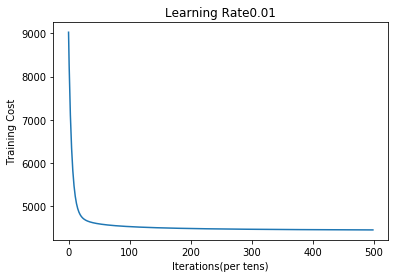

In [162]:
#Alpha = 0.01, iterations = 5000
linear_reg_model(X_train,y_train,X_val,y_val,0.01,5000)

Epochs1 /10000: 
Training cost 9886.90062017849|Validation cost 10206.833691281763
Training MAE 97.34987142641053|Validation MAE 97.41578411451103
Epochs2 /10000: 
Training cost 9782.099403351143|Validation cost 10103.256554998365
Training MAE 96.3794434227944|Validation MAE 96.44636709294208
Epochs3 /10000: 
Training cost 9679.916288685745|Validation cost 10002.250500329612
Training MAE 95.41841860824212|Validation MAE 95.4871227346219
Epochs4 /10000: 
Training cost 9580.221819534825|Validation cost 9903.692160300627
Training MAE 94.46672700284228|Validation MAE 94.53791263826217
Epochs5 /10000: 
Training cost 9482.900342638313|Validation cost 9807.470800886089
Training MAE 93.52429747505373|Validation MAE 93.59860258525727
Epochs6 /10000: 
Training cost 9387.84808728404|Validation cost 9713.486605351047
Training MAE 92.59105789469669|Validation MAE 92.66906228438847
Epochs7 /10000: 
Training cost 9294.97152477149|Validation cost 9621.649205610478
Training MAE 91.66693527361365|Valida

Epochs64 /10000: 
Training cost 6220.639948447089|Validation cost 6577.318345183391
Training MAE 54.88725478845569|Validation MAE 55.512467132175715
Epochs65 /10000: 
Training cost 6191.91237174591|Validation cost 6548.739064150175
Training MAE 54.5539329564702|Validation MAE 55.18487443778929
Epochs66 /10000: 
Training cost 6163.740311912781|Validation cost 6520.707059924084
Training MAE 54.22984044470254|Validation MAE 54.867911861266485
Epochs67 /10000: 
Training cost 6136.11263817815|Validation cost 6493.211420999561
Training MAE 53.914174264050004|Validation MAE 54.55968642470083
Epochs68 /10000: 
Training cost 6109.0184471859675|Validation cost 6466.241459110137
Training MAE 53.607823637416|Validation MAE 54.26061187110443
Epochs69 /10000: 
Training cost 6082.447058201986|Validation cost 6439.78670442852
Training MAE 53.31052462775741|Validation MAE 53.97072054318556
Epochs70 /10000: 
Training cost 6056.388008434545|Validation cost 6413.836900888447
Training MAE 53.02301406044125

Epochs138 /10000: 
Training cost 5074.303513292466|Validation cost 5429.725299005859
Training MAE 47.095158002082755|Validation MAE 47.93991958288941
Epochs139 /10000: 
Training cost 5067.196700012405|Validation cost 5422.526109948664
Training MAE 47.113041208423866|Validation MAE 47.95729011376706
Epochs140 /10000: 
Training cost 5060.2167783789755|Validation cost 5415.45337657695
Training MAE 47.13202508260645|Validation MAE 47.97597243275036
Epochs141 /10000: 
Training cost 5053.361281381069|Validation cost 5408.5046655219885
Training MAE 47.15217980960443|Validation MAE 47.99606890231194
Epochs142 /10000: 
Training cost 5046.627791186191|Validation cost 5401.67759162323
Training MAE 47.173424376196515|Validation MAE 48.017512120681815
Epochs143 /10000: 
Training cost 5040.013938147045|Validation cost 5394.969816958547
Training MAE 47.19573781820337|Validation MAE 48.04016115091952
Epochs144 /10000: 
Training cost 5033.517399828408|Validation cost 5388.379049894277
Training MAE 47.2

Epochs218 /10000: 
Training cost 4762.929964598586|Validation cost 5111.250537521361
Training MAE 49.976054127844534|Validation MAE 50.79858385219417
Epochs219 /10000: 
Training cost 4761.033347854565|Validation cost 5109.280525630295
Training MAE 50.013499887066935|Validation MAE 50.83598333460302
Epochs220 /10000: 
Training cost 4759.164212746705|Validation cost 5107.3384942552375
Training MAE 50.05074235715168|Validation MAE 50.8732055574285
Epochs221 /10000: 
Training cost 4757.322057199529|Validation cost 5105.4239415798975
Training MAE 50.08778395271565|Validation MAE 50.910192948424644
Epochs222 /10000: 
Training cost 4755.506388892692|Validation cost 5103.53637543114
Training MAE 50.12460259055059|Validation MAE 50.94698171063949
Epochs223 /10000: 
Training cost 4753.716725067385|Validation cost 5101.675313088852
Training MAE 50.16119878696873|Validation MAE 50.983553391669155
Epochs224 /10000: 
Training cost 4751.952592336636|Validation cost 5099.840281099605
Training MAE 50.1

Epochs289 /10000: 
Training cost 4675.290307736543|Validation cost 5019.580539317888
Training MAE 52.06005423040164|Validation MAE 52.90712484407967
Epochs290 /10000: 
Training cost 4674.50781308017|Validation cost 5018.756792979071
Training MAE 52.081454561255796|Validation MAE 52.92879106206579
Epochs291 /10000: 
Training cost 4673.733271425026|Validation cost 5017.941373677063
Training MAE 52.10269295541121|Validation MAE 52.95028451404706
Epochs292 /10000: 
Training cost 4672.966554755584|Validation cost 5017.134150869509
Training MAE 52.12376533665198|Validation MAE 52.971610671738425
Epochs293 /10000: 
Training cost 4672.207537435421|Validation cost 5016.334996394279
Training MAE 52.14462947743999|Validation MAE 52.99271349306066
Epochs294 /10000: 
Training cost 4671.456096160881|Validation cost 5015.543784423632
Training MAE 52.165334766353254|Validation MAE 53.01362648360161
Epochs295 /10000: 
Training cost 4670.712109915654|Validation cost 5014.76039141926
Training MAE 52.1858

Epochs363 /10000: 
Training cost 4632.701225572393|Validation cost 4974.79219084972
Training MAE 53.20330668944165|Validation MAE 54.06757485733645
Epochs364 /10000: 
Training cost 4632.274348455664|Validation cost 4974.3453600667135
Training MAE 53.213586827056346|Validation MAE 54.078050524881704
Epochs365 /10000: 
Training cost 4631.8501912874|Validation cost 4973.901458065536
Training MAE 53.22376062040701|Validation MAE 54.08840829490908
Epochs366 /10000: 
Training cost 4631.428720154829|Validation cost 4973.460449136376
Training MAE 53.23381968509862|Validation MAE 54.09865518172356
Epochs367 /10000: 
Training cost 4631.009901713751|Validation cost 4973.0222981506995
Training MAE 53.2437670667395|Validation MAE 54.10879434102904
Epochs368 /10000: 
Training cost 4630.593703177893|Validation cost 4972.586970550579
Training MAE 53.2536187357427|Validation MAE 54.118815017030414
Epochs369 /10000: 
Training cost 4630.180092308467|Validation cost 4972.154432338226
Training MAE 53.26338

Epochs438 /10000: 
Training cost 4606.485448968922|Validation cost 4947.552824811939
Training MAE 53.735159672034825|Validation MAE 54.605753512655106
Epochs439 /10000: 
Training cost 4606.196802863393|Validation cost 4947.255708194943
Training MAE 53.7397192062773|Validation MAE 54.61030808346972
Epochs440 /10000: 
Training cost 4605.909387040477|Validation cost 4946.959928150928
Training MAE 53.744225366838734|Validation MAE 54.61480404504215
Epochs441 /10000: 
Training cost 4605.623190840303|Validation cost 4946.665473039511
Training MAE 53.748675013745775|Validation MAE 54.619241995703874
Epochs442 /10000: 
Training cost 4605.338203748228|Validation cost 4946.372331374099
Training MAE 53.75307576013429|Validation MAE 54.62362821629771
Epochs443 /10000: 
Training cost 4605.054415392361|Validation cost 4946.080491819338
Training MAE 53.757430039768614|Validation MAE 54.627962124493386
Epochs444 /10000: 
Training cost 4604.771815541116|Validation cost 4945.789943188612
Training MAE 53

Epochs505 /10000: 
Training cost 4589.446934619409|Validation cost 4930.14079245312
Training MAE 53.946715790697695|Validation MAE 54.81737122689331
Epochs506 /10000: 
Training cost 4589.222574189151|Validation cost 4929.913278710869
Training MAE 53.94872091652703|Validation MAE 54.81941766346888
Epochs507 /10000: 
Training cost 4588.998960389249|Validation cost 4929.686568269755
Training MAE 53.95069781076864|Validation MAE 54.8214394684429
Epochs508 /10000: 
Training cost 4588.776088478|Validation cost 4929.460655853299
Training MAE 53.952647942588825|Validation MAE 54.8234312629675
Epochs509 /10000: 
Training cost 4588.5539537630275|Validation cost 4929.235536239272
Training MAE 53.954576385547874|Validation MAE 54.82539335266973
Epochs510 /10000: 
Training cost 4588.332551600562|Validation cost 4929.011204258934
Training MAE 53.956477726199395|Validation MAE 54.82732604012472
Epochs511 /10000: 
Training cost 4588.111877394728|Validation cost 4928.7876547962815
Training MAE 53.95835

Epochs585 /10000: 
Training cost 4573.5316807295|Validation cost 4914.115254465168
Training MAE 54.04433000892901|Validation MAE 54.914217383221356
Epochs586 /10000: 
Training cost 4573.3552219852|Validation cost 4913.938829527504
Training MAE 54.04491942665912|Validation MAE 54.91481222166042
Epochs587 /10000: 
Training cost 4573.1792424784435|Validation cost 4913.76291019177
Training MAE 54.0454950482977|Validation MAE 54.915399000673624
Epochs588 /10000: 
Training cost 4573.003739881976|Validation cost 4913.587493877184
Training MAE 54.04606159656734|Validation MAE 54.91597220552573
Epochs589 /10000: 
Training cost 4572.828711886042|Validation cost 4913.4125780228205
Training MAE 54.046616712860505|Validation MAE 54.91653197375975
Epochs590 /10000: 
Training cost 4572.6541561981885|Validation cost 4913.238160087397
Training MAE 54.047160169368134|Validation MAE 54.91707844155629
Epochs591 /10000: 
Training cost 4572.480070543084|Validation cost 4913.06423754906
Training MAE 54.04769

Epochs672 /10000: 
Training cost 4559.758934998645|Validation cost 4900.421730292382
Training MAE 54.06397984990783|Validation MAE 54.93401848311461
Epochs673 /10000: 
Training cost 4559.616973699075|Validation cost 4900.281355383928
Training MAE 54.06393677834992|Validation MAE 54.93401867610616
Epochs674 /10000: 
Training cost 4559.475339071042|Validation cost 4900.14131832035
Training MAE 54.06388943794037|Validation MAE 54.93401293278071
Epochs675 /10000: 
Training cost 4559.334029806723|Validation cost 4900.001617680576
Training MAE 54.06383675361653|Validation MAE 54.9340013120318
Epochs676 /10000: 
Training cost 4559.193044605969|Validation cost 4899.8622520522285
Training MAE 54.06377887725781|Validation MAE 54.93398387217985
Epochs677 /10000: 
Training cost 4559.052382176246|Validation cost 4899.723220031574
Training MAE 54.063717470233414|Validation MAE 54.933960670977804
Epochs678 /10000: 
Training cost 4558.912041232569|Validation cost 4899.584520223432
Training MAE 54.0636

Epochs751 /10000: 
Training cost 4549.457351926269|Validation cost 4890.272290794672
Training MAE 54.049682539468755|Validation MAE 54.92285468042818
Epochs752 /10000: 
Training cost 4549.33769555935|Validation cost 4890.154823153786
Training MAE 54.04939882145485|Validation MAE 54.92260543147834
Epochs753 /10000: 
Training cost 4549.21828215616|Validation cost 4890.037603223014
Training MAE 54.04911253719966|Validation MAE 54.922360901452976
Epochs754 /10000: 
Training cost 4549.099110867358|Validation cost 4889.920630097171
Training MAE 54.04882402902678|Validation MAE 54.92211355586476
Epochs755 /10000: 
Training cost 4548.98018084793|Validation cost 4889.803902875877
Training MAE 54.048533953118955|Validation MAE 54.921863422090304
Epochs756 /10000: 
Training cost 4548.86149125715|Validation cost 4889.687420663527
Training MAE 54.048241648692574|Validation MAE 54.92161052724674
Epochs757 /10000: 
Training cost 4548.743041258558|Validation cost 4889.571182569255
Training MAE 54.0479

Epochs831 /10000: 
Training cost 4540.589040063598|Validation cost 4881.59015841796
Training MAE 54.022698127546946|Validation MAE 54.90163669433445
Epochs832 /10000: 
Training cost 4540.486451924006|Validation cost 4881.489995916696
Training MAE 54.02232819421893|Validation MAE 54.90136450630567
Epochs833 /10000: 
Training cost 4540.384050441022|Validation cost 4881.3900215734175
Training MAE 54.021958180469035|Validation MAE 54.90109541901024
Epochs834 /10000: 
Training cost 4540.28183503728|Validation cost 4881.290234782467
Training MAE 54.02158687396824|Validation MAE 54.90082625712317
Epochs835 /10000: 
Training cost 4540.179805138051|Validation cost 4881.190634941051
Training MAE 54.021215078313716|Validation MAE 54.900555585310094
Epochs836 /10000: 
Training cost 4540.077960171222|Validation cost 4881.091221449225
Training MAE 54.020845919720315|Validation MAE 54.90028341686492
Epochs837 /10000: 
Training cost 4539.976299567276|Validation cost 4880.991993709869
Training MAE 54.0

Epochs903 /10000: 
Training cost 4533.647862474645|Validation cost 4874.825989684372
Training MAE 53.995670123132996|Validation MAE 54.88121048812028
Epochs904 /10000: 
Training cost 4533.557380402055|Validation cost 4874.737981001686
Training MAE 53.99529501070037|Validation MAE 54.88092432671668
Epochs905 /10000: 
Training cost 4533.467049326227|Validation cost 4874.650123268061
Training MAE 53.994919483269726|Validation MAE 54.880637266174084
Epochs906 /10000: 
Training cost 4533.376868825651|Validation cost 4874.562416046126
Training MAE 53.99454424298726|Validation MAE 54.8803493138391
Epochs907 /10000: 
Training cost 4533.28683848057|Validation cost 4874.474858900386
Training MAE 53.99416882655814|Validation MAE 54.880060476997244
Epochs908 /10000: 
Training cost 4533.196957872973|Validation cost 4874.387451397221
Training MAE 53.99379334059876|Validation MAE 54.87977076287346
Epochs909 /10000: 
Training cost 4533.1072265865905|Validation cost 4874.300193104867
Training MAE 53.99

Epochs979 /10000: 
Training cost 4527.174023745944|Validation cost 4868.539019408896
Training MAE 53.96741653448514|Validation MAE 54.858562090852544
Epochs980 /10000: 
Training cost 4527.093928446128|Validation cost 4868.461356212273
Training MAE 53.96705446051985|Validation MAE 54.85826192275228
Epochs981 /10000: 
Training cost 4527.01395651731|Validation cost 4868.383815424651
Training MAE 53.966691984353254|Validation MAE 54.857961223041634
Epochs982 /10000: 
Training cost 4526.934107648195|Validation cost 4868.306396725909
Training MAE 53.9663291096728|Validation MAE 54.857659995792304
Epochs983 /10000: 
Training cost 4526.854381528667|Validation cost 4868.22909979717
Training MAE 53.965965943897785|Validation MAE 54.85735824504514
Epochs984 /10000: 
Training cost 4526.774777849782|Validation cost 4868.151924320809
Training MAE 53.96560357496746|Validation MAE 54.85705597481037
Epochs985 /10000: 
Training cost 4526.695296303772|Validation cost 4868.074869980425
Training MAE 53.965

Epochs1071 /10000: 
Training cost 4520.285627784889|Validation cost 4861.869407165825
Training MAE 53.93505343915215|Validation MAE 54.83033032899298
Epochs1072 /10000: 
Training cost 4520.215712932493|Validation cost 4861.801806170804
Training MAE 53.93471683846374|Validation MAE 54.83001661488518
Epochs1073 /10000: 
Training cost 4520.145897101779|Validation cost 4861.7343026512335
Training MAE 53.93438083882789|Validation MAE 54.82970261902686
Epochs1074 /10000: 
Training cost 4520.076180069191|Validation cost 4861.666896379243
Training MAE 53.93404533884688|Validation MAE 54.82938834355461
Epochs1075 /10000: 
Training cost 4520.006561611939|Validation cost 4861.599587127752
Training MAE 53.933709620173566|Validation MAE 54.82907379059078
Epochs1076 /10000: 
Training cost 4519.937041507984|Validation cost 4861.532374670472
Training MAE 53.933373684684|Validation MAE 54.828758962243676
Epochs1077 /10000: 
Training cost 4519.86761953604|Validation cost 4861.465258781898
Training MAE 5

Epochs1155 /10000: 
Training cost 4514.7380322497675|Validation cost 4856.510434305891
Training MAE 53.90772186029989|Validation MAE 54.80433538996389
Epochs1156 /10000: 
Training cost 4514.675722021294|Validation cost 4856.450295901657
Training MAE 53.90740649914777|Validation MAE 54.80403087490121
Epochs1157 /10000: 
Training cost 4514.613494382205|Validation cost 4856.390238279749
Training MAE 53.90709223476664|Validation MAE 54.80372618939734
Epochs1158 /10000: 
Training cost 4514.551349162147|Validation cost 4856.330261267753
Training MAE 53.90677821821147|Validation MAE 54.80342133474708
Epochs1159 /10000: 
Training cost 4514.489286191288|Validation cost 4856.270364693796
Training MAE 53.906464066175786|Validation MAE 54.8031163122377
Epochs1160 /10000: 
Training cost 4514.427305300317|Validation cost 4856.210548386551
Training MAE 53.90614977979099|Validation MAE 54.802811123149056
Epochs1161 /10000: 
Training cost 4514.365406320444|Validation cost 4856.150812175225
Training MAE

Training cost 4509.386611562971|Validation cost 4851.349049041824
Training MAE 53.87979538245708|Validation MAE 54.77755761354428
Epochs1247 /10000: 
Training cost 4509.33117748335|Validation cost 4851.295616107289
Training MAE 53.87949688049165|Validation MAE 54.77727869211563
Epochs1248 /10000: 
Training cost 4509.275812391591|Validation cost 4851.242250237244
Training MAE 53.87919945386981|Validation MAE 54.77699966068965
Epochs1249 /10000: 
Training cost 4509.220516157106|Validation cost 4851.188951300496
Training MAE 53.878903678791964|Validation MAE 54.776720520092915
Epochs1250 /10000: 
Training cost 4509.1652886496695|Validation cost 4851.13571916623
Training MAE 53.878610368417945|Validation MAE 54.776444242119666
Epochs1251 /10000: 
Training cost 4509.110129739414|Validation cost 4851.082553703999
Training MAE 53.87831740621696|Validation MAE 54.77616937328444
Epochs1252 /10000: 
Training cost 4509.055039296834|Validation cost 4851.029454783728
Training MAE 53.87802435973292|

Epochs1338 /10000: 
Training cost 4504.560006483921|Validation cost 4846.698453492683
Training MAE 53.85372067740747|Validation MAE 54.75324861745521
Epochs1339 /10000: 
Training cost 4504.510414466343|Validation cost 4846.650684513909
Training MAE 53.853446157591975|Validation MAE 54.752996421533275
Epochs1340 /10000: 
Training cost 4504.460880778222|Validation cost 4846.602971929629
Training MAE 53.85317174216922|Validation MAE 54.75274415108123
Epochs1341 /10000: 
Training cost 4504.411405317157|Validation cost 4846.5553156377255
Training MAE 53.85289813289619|Validation MAE 54.752491806668225
Epochs1342 /10000: 
Training cost 4504.361987980999|Validation cost 4846.507715536348
Training MAE 53.85262498370652|Validation MAE 54.752239388860936
Epochs1343 /10000: 
Training cost 4504.312628667857|Validation cost 4846.46017152391
Training MAE 53.852351786609596|Validation MAE 54.75198689822359
Epochs1344 /10000: 
Training cost 4504.263327276096|Validation cost 4846.412683499087
Training 

Epochs1430 /10000: 
Training cost 4500.229525756523|Validation cost 4842.52764791908
Training MAE 53.829413802875834|Validation MAE 54.73148025654555
Epochs1431 /10000: 
Training cost 4500.184901380034|Validation cost 4842.484670611006
Training MAE 53.82916040094051|Validation MAE 54.73125234235406
Epochs1432 /10000: 
Training cost 4500.140326886579|Validation cost 4842.4417413043975
Training MAE 53.82890712541527|Validation MAE 54.73102437017372
Epochs1433 /10000: 
Training cost 4500.095802194116|Validation cost 4842.398859918047
Training MAE 53.828655030005066|Validation MAE 54.73079634043199
Epochs1434 /10000: 
Training cost 4500.051327220795|Validation cost 4842.356026370941
Training MAE 53.82840290438376|Validation MAE 54.73056825355466
Epochs1435 /10000: 
Training cost 4500.006901884955|Validation cost 4842.313240582259
Training MAE 53.8281507488985|Validation MAE 54.730340109965915
Epochs1436 /10000: 
Training cost 4499.9625261051215|Validation cost 4842.270502471374
Training MA

Epochs1508 /10000: 
Training cost 4496.892639467762|Validation cost 4839.31365187436
Training MAE 53.810236576637436|Validation MAE 54.713875901032225
Epochs1509 /10000: 
Training cost 4496.851673176167|Validation cost 4839.27418869773
Training MAE 53.80999665750061|Validation MAE 54.7136498376497
Epochs1510 /10000: 
Training cost 4496.810750893738|Validation cost 4839.234767725373
Training MAE 53.80975711493121|Validation MAE 54.71342374152377
Epochs1511 /10000: 
Training cost 4496.769872551545|Validation cost 4839.195388889472
Training MAE 53.80951755405241|Validation MAE 54.7131976129775
Epochs1512 /10000: 
Training cost 4496.729038080805|Validation cost 4839.156052122368
Training MAE 53.809277975134904|Validation MAE 54.712971452332766
Epochs1513 /10000: 
Training cost 4496.68824741289|Validation cost 4839.116757356549
Training MAE 53.80903837844843|Validation MAE 54.712745259910285
Epochs1514 /10000: 
Training cost 4496.647500479312|Validation cost 4839.077504524652
Training MAE 5

Epochs1589 /10000: 
Training cost 4493.7113151768945|Validation cost 4836.248331385812
Training MAE 53.79116674551073|Validation MAE 54.696147670714666
Epochs1590 /10000: 
Training cost 4493.673702294562|Validation cost 4836.212079244931
Training MAE 53.79093546420692|Validation MAE 54.69593843805307
Epochs1591 /10000: 
Training cost 4493.63612828508|Validation cost 4836.175864269951
Training MAE 53.790704177661965|Validation MAE 54.69572918640191
Epochs1592 /10000: 
Training cost 4493.598593090274|Validation cost 4836.139686403982
Training MAE 53.79047372450343|Validation MAE 54.695520618931084
Epochs1593 /10000: 
Training cost 4493.561096652087|Validation cost 4836.10354559026
Training MAE 53.79024367043344|Validation MAE 54.695312835113654
Epochs1594 /10000: 
Training cost 4493.5236389125785|Validation cost 4836.067441772136
Training MAE 53.7900137423083|Validation MAE 54.69510503111554
Epochs1595 /10000: 
Training cost 4493.486219813928|Validation cost 4836.031374893084
Training MA

Epochs1658 /10000: 
Training cost 4491.204272526458|Validation cost 4833.831244090494
Training MAE 53.77589404746977|Validation MAE 54.68219739342519
Epochs1659 /10000: 
Training cost 4491.169211309542|Validation cost 4833.797428928306
Training MAE 53.775681033801156|Validation MAE 54.68200041841499
Epochs1660 /10000: 
Training cost 4491.134185212315|Validation cost 4833.763647270738
Training MAE 53.7754682693285|Validation MAE 54.68180343018137
Epochs1661 /10000: 
Training cost 4491.099194184045|Validation cost 4833.7298990684285
Training MAE 53.77525558906535|Validation MAE 54.68160642891853
Epochs1662 /10000: 
Training cost 4491.064238174096|Validation cost 4833.6961842721075
Training MAE 53.77504334944291|Validation MAE 54.68140941482005
Epochs1663 /10000: 
Training cost 4491.0293171319345|Validation cost 4833.662502832611
Training MAE 53.77483110499811|Validation MAE 54.68121238807885
Epochs1664 /10000: 
Training cost 4490.994431007117|Validation cost 4833.628854700866
Training MA

Epochs1741 /10000: 
Training cost 4488.40921587708|Validation cost 4831.134240650263
Training MAE 53.758755884190194|Validation MAE 54.666073977639755
Epochs1742 /10000: 
Training cost 4488.376905532534|Validation cost 4831.103047015342
Training MAE 53.758555202343786|Validation MAE 54.665883075593094
Epochs1743 /10000: 
Training cost 4488.344626409266|Validation cost 4831.0718831018785
Training MAE 53.75835452105077|Validation MAE 54.665693925947735
Epochs1744 /10000: 
Training cost 4488.312378463908|Validation cost 4831.040748867901
Training MAE 53.75815391213674|Validation MAE 54.66550477157777
Epochs1745 /10000: 
Training cost 4488.280161653168|Validation cost 4831.009644271522
Training MAE 53.75795340970946|Validation MAE 54.66531561263619
Epochs1746 /10000: 
Training cost 4488.247975933834|Validation cost 4830.978569270929
Training MAE 53.75775290821701|Validation MAE 54.66512644927549
Epochs1747 /10000: 
Training cost 4488.2158212627755|Validation cost 4830.947523824394
Training

Epochs1814 /10000: 
Training cost 4486.129996839215|Validation cost 4828.932687028338
Training MAE 53.74439744484834|Validation MAE 54.65260590721877
Epochs1815 /10000: 
Training cost 4486.099856432903|Validation cost 4828.90355752562
Training MAE 53.74420577886761|Validation MAE 54.65242798109476
Epochs1816 /10000: 
Training cost 4486.069744280201|Validation cost 4828.874454878834
Training MAE 53.74401411768711|Validation MAE 54.652250052043556
Epochs1817 /10000: 
Training cost 4486.0396603430945|Validation cost 4828.845379051355
Training MAE 53.74382246142513|Validation MAE 54.65207212019399
Epochs1818 /10000: 
Training cost 4486.009604583637|Validation cost 4828.816330006627
Training MAE 53.7436308101997|Validation MAE 54.65189500643434
Epochs1819 /10000: 
Training cost 4485.979576963945|Validation cost 4828.787307708162
Training MAE 53.74343916412845|Validation MAE 54.65171801037313
Epochs1820 /10000: 
Training cost 4485.949577446205|Validation cost 4828.758312119537
Training MAE 5

Epochs1872 /10000: 
Training cost 4484.42741132547|Validation cost 4827.286466363278
Training MAE 53.733568101791214|Validation MAE 54.642441702875786
Epochs1873 /10000: 
Training cost 4484.398848800258|Validation cost 4827.258835966017
Training MAE 53.73338624791372|Validation MAE 54.642270065066974
Epochs1874 /10000: 
Training cost 4484.3703124303265|Validation cost 4827.231230406452
Training MAE 53.733205740391085|Validation MAE 54.642098425802956
Epochs1875 /10000: 
Training cost 4484.341802181318|Validation cost 4827.20364965159
Training MAE 53.73302523804666|Validation MAE 54.641927648835335
Epochs1876 /10000: 
Training cost 4484.313318018934|Validation cost 4827.176093668503
Training MAE 53.73284474098291|Validation MAE 54.64175696856673
Epochs1877 /10000: 
Training cost 4484.284859908935|Validation cost 4827.148562424316
Training MAE 53.73266424930203|Validation MAE 54.6415862862345
Epochs1878 /10000: 
Training cost 4484.256427817141|Validation cost 4827.121055886212
Training M

Epochs1950 /10000: 
Training cost 4482.275546419228|Validation cost 4825.203453873311
Training MAE 53.720370737522636|Validation MAE 54.629295408546106
Epochs1951 /10000: 
Training cost 4482.248925142263|Validation cost 4825.177666011446
Training MAE 53.72021302024308|Validation MAE 54.62913205901731
Epochs1952 /10000: 
Training cost 4482.222327508535|Validation cost 4825.151900579972
Training MAE 53.720055303083676|Validation MAE 54.62896871020392
Epochs1953 /10000: 
Training cost 4482.1957534879275|Validation cost 4825.12615755009
Training MAE 53.71989758613461|Validation MAE 54.62880536220282
Epochs1954 /10000: 
Training cost 4482.169203050372|Validation cost 4825.100436893046
Training MAE 53.71974023359816|Validation MAE 54.628642015110614
Epochs1955 /10000: 
Training cost 4482.142676165848|Validation cost 4825.074738580135
Training MAE 53.719583082428116|Validation MAE 54.62847866902364
Epochs1956 /10000: 
Training cost 4482.11617280439|Validation cost 4825.049062582701
Training M

Epochs2044 /10000: 
Training cost 4479.872600488232|Validation cost 4822.873721486161
Training MAE 53.70602750034848|Validation MAE 54.61423370375347
Epochs2045 /10000: 
Training cost 4479.848076414483|Validation cost 4822.849922460937
Training MAE 53.70588109095383|Validation MAE 54.61408056051632
Epochs2046 /10000: 
Training cost 4479.823573357788|Validation cost 4822.826143359969
Training MAE 53.705734682766135|Validation MAE 54.61392741899196
Epochs2047 /10000: 
Training cost 4479.799091292296|Validation cost 4822.802384158644
Training MAE 53.705588314229125|Validation MAE 54.613774279261506
Epochs2048 /10000: 
Training cost 4479.7746301922|Validation cost 4822.778644832388
Training MAE 53.705442380348|Validation MAE 54.61362114140581
Epochs2049 /10000: 
Training cost 4479.750190031734|Validation cost 4822.754925356668
Training MAE 53.70529644760846|Validation MAE 54.613468191232194
Epochs2050 /10000: 
Training cost 4479.7257707851695|Validation cost 4822.731225706991
Training MAE 

Epochs2099 /10000: 
Training cost 4478.554322363869|Validation cost 4821.593730332973
Training MAE 53.698141891315345|Validation MAE 54.606194248791674
Epochs2100 /10000: 
Training cost 4478.530916894887|Validation cost 4821.570991619541
Training MAE 53.698001401720525|Validation MAE 54.606052860893904
Epochs2101 /10000: 
Training cost 4478.507531080316|Validation cost 4821.548271534312
Training MAE 53.697860913258324|Validation MAE 54.605911472686444
Epochs2102 /10000: 
Training cost 4478.484164896457|Validation cost 4821.52557005477
Training MAE 53.69772042599693|Validation MAE 54.60577008424248
Epochs2103 /10000: 
Training cost 4478.460818319643|Validation cost 4821.502887158433
Training MAE 53.6975799400044|Validation MAE 54.605628695635026
Epochs2104 /10000: 
Training cost 4478.43749132625|Validation cost 4821.480222822856
Training MAE 53.6974394553486|Validation MAE 54.60548730693691
Epochs2105 /10000: 
Training cost 4478.414183892685|Validation cost 4821.4575770256315
Training M

Epochs2169 /10000: 
Training cost 4476.962140605164|Validation cost 4820.045807111234
Training MAE 53.68856143527895|Validation MAE 54.59671133760942
Epochs2170 /10000: 
Training cost 4476.940055667421|Validation cost 4820.024319901549
Training MAE 53.68842889632448|Validation MAE 54.59658404313363
Epochs2171 /10000: 
Training cost 4476.917988810542|Validation cost 4820.002849827078
Training MAE 53.688296497495095|Validation MAE 54.596456746248215
Epochs2172 /10000: 
Training cost 4476.895940013248|Validation cost 4819.981396867659
Training MAE 53.688164611667986|Validation MAE 54.596329447018256
Epochs2173 /10000: 
Training cost 4476.8739092542955|Validation cost 4819.959961003163
Training MAE 53.68803298015207|Validation MAE 54.59620214550869
Epochs2174 /10000: 
Training cost 4476.851896512471|Validation cost 4819.938542213491
Training MAE 53.6879013501746|Validation MAE 54.59607484178431
Epochs2175 /10000: 
Training cost 4476.829901766596|Validation cost 4819.917140478578
Training M

Epochs2264 /10000: 
Training cost 4474.9419571167955|Validation cost 4818.078336815188
Training MAE 53.67637552457345|Validation MAE 54.58543800903244
Epochs2265 /10000: 
Training cost 4474.921499152024|Validation cost 4818.0583915888665
Training MAE 53.67625372281786|Validation MAE 54.58532965553887
Epochs2266 /10000: 
Training cost 4474.901057383283|Validation cost 4818.038461714558
Training MAE 53.67613192221958|Validation MAE 54.58522129491473
Epochs2267 /10000: 
Training cost 4474.880631792119|Validation cost 4818.018547174831
Training MAE 53.676010122828956|Validation MAE 54.58511292721803
Epochs2268 /10000: 
Training cost 4474.860222360101|Validation cost 4817.998647952277
Training MAE 53.67588832469624|Validation MAE 54.58500455250669
Epochs2269 /10000: 
Training cost 4474.839829068829|Validation cost 4817.978764029514
Training MAE 53.67576652787155|Validation MAE 54.58489617083847
Epochs2270 /10000: 
Training cost 4474.819451899925|Validation cost 4817.958895389189
Training MA

Epochs2363 /10000: 
Training cost 4472.992389629122|Validation cost 4816.175592825801
Training MAE 53.664651580974734|Validation MAE 54.57510557080817
Epochs2364 /10000: 
Training cost 4472.9734496257215|Validation cost 4816.157086811062
Training MAE 53.66453492388355|Validation MAE 54.57500524146098
Epochs2365 /10000: 
Training cost 4472.95452411571|Validation cost 4816.138594542228
Training MAE 53.6644187202991|Validation MAE 54.574904906512934
Epochs2366 /10000: 
Training cost 4472.935613083099|Validation cost 4816.1201160042365
Training MAE 53.66430334801156|Validation MAE 54.57480456601285
Epochs2367 /10000: 
Training cost 4472.916716511926|Validation cost 4816.101651182048
Training MAE 53.66418818214253|Validation MAE 54.574704220009444
Epochs2368 /10000: 
Training cost 4472.897834386246|Validation cost 4816.083200060648
Training MAE 53.664073019060595|Validation MAE 54.57460421623406
Epochs2369 /10000: 
Training cost 4472.87896669014|Validation cost 4816.064762625039
Training MA

Epochs2453 /10000: 
Training cost 4471.344013684312|Validation cost 4814.563388727682
Training MAE 53.654754656564386|Validation MAE 54.566312190961085
Epochs2454 /10000: 
Training cost 4471.326316636477|Validation cost 4814.5460619990345
Training MAE 53.65464639242568|Validation MAE 54.56621723638886
Epochs2455 /10000: 
Training cost 4471.308632730024|Validation cost 4814.528747744022
Training MAE 53.65453813113802|Validation MAE 54.566122588251794
Epochs2456 /10000: 
Training cost 4471.290961950869|Validation cost 4814.511445949408
Training MAE 53.65442987273727|Validation MAE 54.566027934628906
Epochs2457 /10000: 
Training cost 4471.273304284946|Validation cost 4814.494156601967
Training MAE 53.65432161725919|Validation MAE 54.56593327556397
Epochs2458 /10000: 
Training cost 4471.255659718209|Validation cost 4814.476879688499
Training MAE 53.65421336473949|Validation MAE 54.56583861110074
Epochs2459 /10000: 
Training cost 4471.238028236633|Validation cost 4814.45961519582
Training M

Epochs2540 /10000: 
Training cost 4469.8520818982615|Validation cost 4813.101264238299
Training MAE 53.64575901022533|Validation MAE 54.55829050355256
Epochs2541 /10000: 
Training cost 4469.835477462738|Validation cost 4813.084975094702
Training MAE 53.64566151227896|Validation MAE 54.55820417574019
Epochs2542 /10000: 
Training cost 4469.818885013065|Validation cost 4813.0686973394195
Training MAE 53.64556401512126|Validation MAE 54.558118172785036
Epochs2543 /10000: 
Training cost 4469.802304536742|Validation cost 4813.052430960725
Training MAE 53.64546651878434|Validation MAE 54.558032734303836
Epochs2544 /10000: 
Training cost 4469.7857360212865|Validation cost 4813.036175946906
Training MAE 53.64536912451396|Validation MAE 54.557947288005934
Epochs2545 /10000: 
Training cost 4469.769179454233|Validation cost 4813.019932286263
Training MAE 53.64527207985981|Validation MAE 54.55786183393244
Epochs2546 /10000: 
Training cost 4469.752634823133|Validation cost 4813.003699967111
Training

Epochs2646 /10000: 
Training cost 4468.1563829634415|Validation cost 4811.435805343764
Training MAE 53.63599514020221|Validation MAE 54.54953707603642
Epochs2647 /10000: 
Training cost 4468.140982601782|Validation cost 4811.420661059913
Training MAE 53.635906346596535|Validation MAE 54.54945703653884
Epochs2648 /10000: 
Training cost 4468.125592990141|Validation cost 4811.405527005598
Training MAE 53.635817553068975|Validation MAE 54.54937698965451
Epochs2649 /10000: 
Training cost 4468.11021411767|Validation cost 4811.390403170652
Training MAE 53.63572875964764|Validation MAE 54.54929693541956
Epochs2650 /10000: 
Training cost 4468.094845973532|Validation cost 4811.375289544924
Training MAE 53.63563996636054|Validation MAE 54.54921687387011
Epochs2651 /10000: 
Training cost 4468.0794885469095|Validation cost 4811.360186118278
Training MAE 53.6355511732357|Validation MAE 54.54913680504218
Epochs2652 /10000: 
Training cost 4468.0641418269915|Validation cost 4811.345092880587
Training MA

Epochs2757 /10000: 
Training cost 4466.510247749699|Validation cost 4809.815064630639
Training MAE 53.626718739066014|Validation MAE 54.54153683941557
Epochs2758 /10000: 
Training cost 4466.495977438625|Validation cost 4809.800996639388
Training MAE 53.62663864602229|Validation MAE 54.541467264756605
Epochs2759 /10000: 
Training cost 4466.481716755608|Validation cost 4809.786937827225
Training MAE 53.62655855189608|Validation MAE 54.54139768134391
Epochs2760 /10000: 
Training cost 4466.467465691253|Validation cost 4809.77288818536
Training MAE 53.62647845671222|Validation MAE 54.54132808920987
Epochs2761 /10000: 
Training cost 4466.453224236178|Validation cost 4809.758847705011
Training MAE 53.6263986844023|Validation MAE 54.54125848838685
Epochs2762 /10000: 
Training cost 4466.438992381012|Validation cost 4809.7448163774125
Training MAE 53.62631901729634|Validation MAE 54.54118887890718
Epochs2763 /10000: 
Training cost 4466.424770116395|Validation cost 4809.730794193809
Training MAE 

Epochs2849 /10000: 
Training cost 4465.236534996914|Validation cost 4808.5581599413235
Training MAE 53.6196832792046|Validation MAE 54.53528134000882
Epochs2850 /10000: 
Training cost 4465.223112596399|Validation cost 4808.544901001531
Training MAE 53.61961058351997|Validation MAE 54.535214186840626
Epochs2851 /10000: 
Training cost 4465.209699007595|Validation cost 4808.531650477305
Training MAE 53.61953788524776|Validation MAE 54.535147025796604
Epochs2852 /10000: 
Training cost 4465.196294222139|Validation cost 4808.5184083608265
Training MAE 53.6194652360023|Validation MAE 54.535079856905845
Epochs2853 /10000: 
Training cost 4465.182898231675|Validation cost 4808.505174644287
Training MAE 53.61939271671091|Validation MAE 54.535012680197326
Epochs2854 /10000: 
Training cost 4465.169511027861|Validation cost 4808.491949319883
Training MAE 53.61932019485245|Validation MAE 54.53494549570004
Epochs2855 /10000: 
Training cost 4465.156132602362|Validation cost 4808.478732379825
Training M

Epochs2932 /10000: 
Training cost 4464.151712186861|Validation cost 4807.485605169399
Training MAE 53.613809173053454|Validation MAE 54.52983577236023
Epochs2933 /10000: 
Training cost 4464.138993624139|Validation cost 4807.473018983253
Training MAE 53.613739362016915|Validation MAE 54.52977146751038
Epochs2934 /10000: 
Training cost 4464.126283212974|Validation cost 4807.460440595624
Training MAE 53.61366958561241|Validation MAE 54.52970715602226
Epochs2935 /10000: 
Training cost 4464.113580945816|Validation cost 4807.447869999456
Training MAE 53.613599969405655|Validation MAE 54.52964283792166
Epochs2936 /10000: 
Training cost 4464.100886815123|Validation cost 4807.435307187701
Training MAE 53.613530467635435|Validation MAE 54.52957851323424
Epochs2937 /10000: 
Training cost 4464.088200813364|Validation cost 4807.422752153321
Training MAE 53.6134609635732|Validation MAE 54.52951418198571
Epochs2938 /10000: 
Training cost 4464.075522933018|Validation cost 4807.410204889288
Training MA

Epochs3027 /10000: 
Training cost 4462.978829002832|Validation cost 4806.323788094743
Training MAE 53.607290206212504|Validation MAE 54.52388487643236
Epochs3028 /10000: 
Training cost 4462.966852362178|Validation cost 4806.311912422476
Training MAE 53.60722329937136|Validation MAE 54.52382394709109
Epochs3029 /10000: 
Training cost 4462.9548831952|Validation cost 4806.300043915351
Training MAE 53.607156576576706|Validation MAE 54.523763011346944
Epochs3030 /10000: 
Training cost 4462.94292149517|Validation cost 4806.288182567079
Training MAE 53.60709010951047|Validation MAE 54.523702069223525
Epochs3031 /10000: 
Training cost 4462.930967255361|Validation cost 4806.276328371378
Training MAE 53.60702364040335|Validation MAE 54.523641120744365
Epochs3032 /10000: 
Training cost 4462.919020469059|Validation cost 4806.264481321976
Training MAE 53.60695716927435|Validation MAE 54.52358016593299
Epochs3033 /10000: 
Training cost 4462.907081129557|Validation cost 4806.252641412604
Training MAE

Epochs3117 /10000: 
Training cost 4461.930092607645|Validation cost 4805.282953882474
Training MAE 53.60157150133922|Validation MAE 54.51865476810724
Epochs3118 /10000: 
Training cost 4461.918762552163|Validation cost 4805.271698740913
Training MAE 53.601510574209506|Validation MAE 54.51859943400042
Epochs3119 /10000: 
Training cost 4461.907439395351|Validation cost 4805.2604502273225
Training MAE 53.60144964412924|Validation MAE 54.518544093116276
Epochs3120 /10000: 
Training cost 4461.896123131153|Validation cost 4805.2492083360485
Training MAE 53.60138871111602|Validation MAE 54.518488745476596
Epochs3121 /10000: 
Training cost 4461.884813753526|Validation cost 4805.237973061442
Training MAE 53.601327775187436|Validation MAE 54.51843339110323
Epochs3122 /10000: 
Training cost 4461.873511256431|Validation cost 4805.2267443978635
Training MAE 53.60126683636102|Validation MAE 54.51837803001788
Epochs3123 /10000: 
Training cost 4461.8622156338315|Validation cost 4805.215522339675
Traini

Epochs3219 /10000: 
Training cost 4460.808951830559|Validation cost 4804.168126401812
Training MAE 53.5955722949487|Validation MAE 54.51309056806063
Epochs3220 /10000: 
Training cost 4460.7982954298|Validation cost 4804.157519277154
Training MAE 53.59551756172805|Validation MAE 54.51303634997402
Epochs3221 /10000: 
Training cost 4460.787645344993|Validation cost 4804.146918236048
Training MAE 53.59546282469456|Validation MAE 54.51298212626408
Epochs3222 /10000: 
Training cost 4460.777001570755|Validation cost 4804.136323273465
Training MAE 53.59540808386456|Validation MAE 54.5129278969502
Epochs3223 /10000: 
Training cost 4460.76636410171|Validation cost 4804.125734384382
Training MAE 53.59535333925437|Validation MAE 54.5128736620518
Epochs3224 /10000: 
Training cost 4460.755732932488|Validation cost 4804.11515156378
Training MAE 53.59529859088032|Validation MAE 54.51282002063586
Epochs3225 /10000: 
Training cost 4460.745108057727|Validation cost 4804.104574806649
Training MAE 53.59524

Epochs3310 /10000: 
Training cost 4459.864445345085|Validation cost 4803.227194150463
Training MAE 53.590711823067934|Validation MAE 54.5083580903626
Epochs3311 /10000: 
Training cost 4459.854342378991|Validation cost 4803.2171207079255
Training MAE 53.59066009809035|Validation MAE 54.50830917217619
Epochs3312 /10000: 
Training cost 4459.844245263181|Validation cost 4803.207052913731
Training MAE 53.590608369562766|Validation MAE 54.5082602472245
Epochs3313 /10000: 
Training cost 4459.834153992794|Validation cost 4803.196990763339
Training MAE 53.59055663749983|Validation MAE 54.50821131552638
Epochs3314 /10000: 
Training cost 4459.824068562983|Validation cost 4803.186934252215
Training MAE 53.59050490191614|Validation MAE 54.50816237710075
Epochs3315 /10000: 
Training cost 4459.8139889688955|Validation cost 4803.176883375826
Training MAE 53.590453162826336|Validation MAE 54.50811343196643
Epochs3316 /10000: 
Training cost 4459.8039152056945|Validation cost 4803.166838129648
Training M

Epochs3392 /10000: 
Training cost 4459.055009978041|Validation cost 4802.4195364668485
Training MAE 53.58663213565488|Validation MAE 54.50447032660151
Epochs3393 /10000: 
Training cost 4459.045371069051|Validation cost 4802.409911541174
Training MAE 53.58658395297429|Validation MAE 54.50442500231818
Epochs3394 /10000: 
Training cost 4459.0357376293405|Validation cost 4802.40029190758
Training MAE 53.58653576618317|Validation MAE 54.50437967127175
Epochs3395 /10000: 
Training cost 4459.026109654471|Validation cost 4802.390677561919
Training MAE 53.58648757529551|Validation MAE 54.5043343334799
Epochs3396 /10000: 
Training cost 4459.016487140009|Validation cost 4802.381068500043
Training MAE 53.58643938032532|Validation MAE 54.50428898896028
Epochs3397 /10000: 
Training cost 4459.006870081527|Validation cost 4802.371464717809
Training MAE 53.58639118128653|Validation MAE 54.5042436377305
Epochs3398 /10000: 
Training cost 4458.997258474603|Validation cost 4802.361866211084
Training MAE 53

Epochs3497 /10000: 
Training cost 4458.071977455693|Validation cost 4801.437056865004
Training MAE 53.58173932953323|Validation MAE 54.499868670366
Epochs3498 /10000: 
Training cost 4458.062889469337|Validation cost 4801.427965759734
Training MAE 53.58169362761092|Validation MAE 54.499827408798915
Epochs3499 /10000: 
Training cost 4458.053806511587|Validation cost 4801.418879534177
Training MAE 53.581647921785326|Validation MAE 54.499786140154605
Epochs3500 /10000: 
Training cost 4458.0447285784785|Validation cost 4801.409798184624
Training MAE 53.58160243022145|Validation MAE 54.49974486444959
Epochs3501 /10000: 
Training cost 4458.035655666056|Validation cost 4801.400721707369
Training MAE 53.58155706308629|Validation MAE 54.499703581700395
Epochs3502 /10000: 
Training cost 4458.026587770364|Validation cost 4801.391650098709
Training MAE 53.58151169190712|Validation MAE 54.49966229192355
Epochs3503 /10000: 
Training cost 4458.017524887452|Validation cost 4801.3825833549445
Training M

Epochs3599 /10000: 
Training cost 4457.170242304412|Validation cost 4800.534278726831
Training MAE 53.57726719587674|Validation MAE 54.49562629266425
Epochs3600 /10000: 
Training cost 4457.161647526335|Validation cost 4800.52566689237
Training MAE 53.57722519330506|Validation MAE 54.495584391071986
Epochs3601 /10000: 
Training cost 4457.153057393501|Validation cost 4800.517059578493
Training MAE 53.57718325947724|Validation MAE 54.495542483989844
Epochs3602 /10000: 
Training cost 4457.144471902352|Validation cost 4800.508456781864
Training MAE 53.57714139203247|Validation MAE 54.49550057143242
Epochs3603 /10000: 
Training cost 4457.135891049333|Validation cost 4800.499858499151
Training MAE 53.57709958734172|Validation MAE 54.495458653414275
Epochs3604 /10000: 
Training cost 4457.12731483089|Validation cost 4800.491264727023
Training MAE 53.57705777818946|Validation MAE 54.495416729949994
Epochs3605 /10000: 
Training cost 4457.118743243478|Validation cost 4800.4826754621545
Training MA

Epochs3696 /10000: 
Training cost 4456.357664828252|Validation cost 4799.71949829165
Training MAE 53.57329150965146|Validation MAE 54.49167110139984
Epochs3697 /10000: 
Training cost 4456.349504596338|Validation cost 4799.7113099095095
Training MAE 53.573251909291805|Validation MAE 54.49163057816095
Epochs3698 /10000: 
Training cost 4456.341348680968|Validation cost 4799.703125739634
Training MAE 53.57321232168303|Validation MAE 54.49159004982243
Epochs3699 /10000: 
Training cost 4456.333197078919|Validation cost 4799.694945778998
Training MAE 53.57317272985043|Validation MAE 54.4915495163977
Epochs3700 /10000: 
Training cost 4456.325049786972|Validation cost 4799.686770024585
Training MAE 53.57313313380516|Validation MAE 54.49150897790025
Epochs3701 /10000: 
Training cost 4456.316906801915|Validation cost 4799.6785984733715
Training MAE 53.57309353355838|Validation MAE 54.49146843434351
Epochs3702 /10000: 
Training cost 4456.308768120535|Validation cost 4799.670431122347
Training MAE 

Epochs3804 /10000: 
Training cost 4455.500660160152|Validation cost 4798.858889925043
Training MAE 53.56911524357568|Validation MAE 54.48773489061614
Epochs3805 /10000: 
Training cost 4455.492948147479|Validation cost 4798.851139592811
Training MAE 53.56907848440949|Validation MAE 54.48770078832323
Epochs3806 /10000: 
Training cost 4455.485240121519|Validation cost 4798.8433931629825
Training MAE 53.569041721026615|Validation MAE 54.48766668010202
Epochs3807 /10000: 
Training cost 4455.477536079385|Validation cost 4798.835650632839
Training MAE 53.56900495343732|Validation MAE 54.48763256596504
Epochs3808 /10000: 
Training cost 4455.469836018184|Validation cost 4798.82791199967
Training MAE 53.56896818165192|Validation MAE 54.48759844592486
Epochs3809 /10000: 
Training cost 4455.462139935036|Validation cost 4798.820177260757
Training MAE 53.56893140568064|Validation MAE 54.48756431999399
Epochs3810 /10000: 
Training cost 4455.454447827056|Validation cost 4798.8124464133925
Training MAE

Epochs3905 /10000: 
Training cost 4454.74140945854|Validation cost 4798.095371057104
Training MAE 53.565542631161264|Validation MAE 54.48435385133965
Epochs3906 /10000: 
Training cost 4454.734085968732|Validation cost 4798.08800156812
Training MAE 53.56550850493881|Validation MAE 54.48432148875141
Epochs3907 /10000: 
Training cost 4454.7267661875585|Validation cost 4798.080635719819
Training MAE 53.565474374317645|Validation MAE 54.484289120835
Epochs3908 /10000: 
Training cost 4454.719450112403|Validation cost 4798.073273509736
Training MAE 53.56544023930755|Validation MAE 54.48425674760182
Epochs3909 /10000: 
Training cost 4454.712137740647|Validation cost 4798.065914935405
Training MAE 53.5654060999182|Validation MAE 54.48422436906328
Epochs3910 /10000: 
Training cost 4454.704829069679|Validation cost 4798.058559994364
Training MAE 53.56537195615934|Validation MAE 54.484191986570934
Epochs3911 /10000: 
Training cost 4454.697524096886|Validation cost 4798.0512086841545
Training MAE 5

Epochs3988 /10000: 
Training cost 4454.145944250497|Validation cost 4797.495870258857
Training MAE 53.56274255457213|Validation MAE 54.48181674594895
Epochs3989 /10000: 
Training cost 4454.138919893232|Validation cost 4797.48879476093
Training MAE 53.562710186600775|Validation MAE 54.48178779653164
Epochs3990 /10000: 
Training cost 4454.131899035594|Validation cost 4797.4817227066205
Training MAE 53.562677984944976|Validation MAE 54.48175884124564
Epochs3991 /10000: 
Training cost 4454.124881675166|Validation cost 4797.474654093648
Training MAE 53.56264579892158|Validation MAE 54.481729880102165
Epochs3992 /10000: 
Training cost 4454.117867809531|Validation cost 4797.46758891973
Training MAE 53.56261374212601|Validation MAE 54.48170091311238
Epochs3993 /10000: 
Training cost 4454.110857436276|Validation cost 4797.460527182589
Training MAE 53.56258168086276|Validation MAE 54.481671940287455
Epochs3994 /10000: 
Training cost 4454.103850552989|Validation cost 4797.453468879952
Training MA

Epochs4077 /10000: 
Training cost 4453.534211823535|Validation cost 4796.879382017666
Training MAE 53.55994883734617|Validation MAE 54.479296018555104
Epochs4078 /10000: 
Training cost 4453.527489715965|Validation cost 4796.872604298137
Training MAE 53.559918952876025|Validation MAE 54.479269155714746
Epochs4079 /10000: 
Training cost 4453.52077090145|Validation cost 4796.865829827099
Training MAE 53.55988906364545|Validation MAE 54.47924228691897
Epochs4080 /10000: 
Training cost 4453.514055377765|Validation cost 4796.859058602449
Training MAE 53.559859169663454|Validation MAE 54.47921541217847
Epochs4081 /10000: 
Training cost 4453.5073431426845|Validation cost 4796.852290622085
Training MAE 53.559829270939034|Validation MAE 54.479188531503965
Epochs4082 /10000: 
Training cost 4453.5006341939925|Validation cost 4796.845525883907
Training MAE 53.55979936748116|Validation MAE 54.47916164490614
Epochs4083 /10000: 
Training cost 4453.493928529468|Validation cost 4796.838764385816
Trainin

Epochs4179 /10000: 
Training cost 4452.865145961925|Validation cost 4796.204434322841
Training MAE 53.556984748113365|Validation MAE 54.47669167171798
Epochs4180 /10000: 
Training cost 4452.858748630757|Validation cost 4796.197977431431
Training MAE 53.55695695340397|Validation MAE 54.47666816513097
Epochs4181 /10000: 
Training cost 4452.852354375954|Validation cost 4796.191523583385
Training MAE 53.55692915404466|Validation MAE 54.47664465247988
Epochs4182 /10000: 
Training cost 4452.845963195491|Validation cost 4796.1850727767805
Training MAE 53.55690135004384|Validation MAE 54.47662113377481
Epochs4183 /10000: 
Training cost 4452.839575087346|Validation cost 4796.178625009699
Training MAE 53.556873541409836|Validation MAE 54.4765981053122
Epochs4184 /10000: 
Training cost 4452.833190049492|Validation cost 4796.172180280225
Training MAE 53.556845728151046|Validation MAE 54.47657521885973
Epochs4185 /10000: 
Training cost 4452.8268080799135|Validation cost 4796.165738586441
Training M

Epochs4273 /10000: 
Training cost 4452.276977543472|Validation cost 4795.610536719119
Training MAE 53.554505288015626|Validation MAE 54.474678793065806
Epochs4274 /10000: 
Training cost 4452.270860774998|Validation cost 4795.604357731243
Training MAE 53.55447994253617|Validation MAE 54.47465965757948
Epochs4275 /10000: 
Training cost 4452.2647469001995|Validation cost 4795.598181613365
Training MAE 53.55445459213827|Validation MAE 54.47464086018902
Epochs4276 /10000: 
Training cost 4452.2586359172155|Validation cost 4795.59200836372
Training MAE 53.55442923682999|Validation MAE 54.474622055357415
Epochs4277 /10000: 
Training cost 4452.252527824185|Validation cost 4795.5858379805395
Training MAE 53.554403876619375|Validation MAE 54.47460324309505
Epochs4278 /10000: 
Training cost 4452.246422619246|Validation cost 4795.579670462055
Training MAE 53.55437851151447|Validation MAE 54.47458442341229
Epochs4279 /10000: 
Training cost 4452.240320300545|Validation cost 4795.573505806506
Training

Epochs4360 /10000: 
Training cost 4451.755450147758|Validation cost 4795.083517235701
Training MAE 53.5524182189786|Validation MAE 54.4730460282937
Epochs4361 /10000: 
Training cost 4451.749578333422|Validation cost 4795.077581476549
Training MAE 53.55239552043294|Validation MAE 54.47302909238266
Epochs4362 /10000: 
Training cost 4451.743709256731|Validation cost 4795.071648438988
Training MAE 53.55237281660827|Validation MAE 54.47301214889834
Epochs4363 /10000: 
Training cost 4451.737842915962|Validation cost 4795.065718121373
Training MAE 53.55235010751242|Validation MAE 54.47299519785076
Epochs4364 /10000: 
Training cost 4451.731979309389|Validation cost 4795.059790522062
Training MAE 53.55232739315322|Validation MAE 54.47297823925
Epochs4365 /10000: 
Training cost 4451.726118435292|Validation cost 4795.0538656394165
Training MAE 53.55230467353849|Validation MAE 54.47296127310607
Epochs4366 /10000: 
Training cost 4451.720260291949|Validation cost 4795.047943471796
Training MAE 53.55

Epochs4443 /10000: 
Training cost 4451.277249951371|Validation cost 4794.599962328076
Training MAE 53.55056781304602|Validation MAE 54.47172758707081
Epochs4444 /10000: 
Training cost 4451.271599625145|Validation cost 4794.5942469938545
Training MAE 53.55054614264132|Validation MAE 54.471712825675596
Epochs4445 /10000: 
Training cost 4451.265951898317|Validation cost 4794.588534249418
Training MAE 53.55052479217779|Validation MAE 54.47169805653658
Epochs4446 /10000: 
Training cost 4451.260306769277|Validation cost 4794.582824093232
Training MAE 53.55050368060848|Validation MAE 54.47168327966351
Epochs4447 /10000: 
Training cost 4451.254664236423|Validation cost 4794.577116523766
Training MAE 53.55048256367494|Validation MAE 54.47166849506611
Epochs4448 /10000: 
Training cost 4451.249024298149|Validation cost 4794.571411539487
Training MAE 53.550461441384776|Validation MAE 54.47165370275411
Epochs4449 /10000: 
Training cost 4451.243386952855|Validation cost 4794.565709138867
Training MA

Epochs4532 /10000: 
Training cost 4450.784371004826|Validation cost 4794.101268073279
Training MAE 53.54869365392033|Validation MAE 54.470450046718504
Epochs4533 /10000: 
Training cost 4450.778945886054|Validation cost 4794.095777365436
Training MAE 53.54867292836388|Validation MAE 54.47043591737989
Epochs4534 /10000: 
Training cost 4450.773523228903|Validation cost 4794.090289115703
Training MAE 53.54865219785875|Validation MAE 54.47042178077892
Epochs4535 /10000: 
Training cost 4450.768103031883|Validation cost 4794.084803322655
Training MAE 53.54863146241202|Validation MAE 54.47040763692473
Epochs4536 /10000: 
Training cost 4450.762685293504|Validation cost 4794.079319984866
Training MAE 53.54861072203078|Validation MAE 54.47039348582639
Epochs4537 /10000: 
Training cost 4450.757270012277|Validation cost 4794.073839100912
Training MAE 53.54858997672208|Validation MAE 54.470379327493
Epochs4538 /10000: 
Training cost 4450.751857186719|Validation cost 4794.068360669371
Training MAE 53

Epochs4630 /10000: 
Training cost 4450.264187187301|Validation cost 4793.574649257812
Training MAE 53.546733909708195|Validation MAE 54.46919124057619
Epochs4631 /10000: 
Training cost 4450.258996408528|Validation cost 4793.569392836604
Training MAE 53.54671450792466|Validation MAE 54.46917937920247
Epochs4632 /10000: 
Training cost 4450.253807951041|Validation cost 4793.56413873902
Training MAE 53.54669532594469|Validation MAE 54.469167510436584
Epochs4633 /10000: 
Training cost 4450.248621813467|Validation cost 4793.558886963739
Training MAE 53.54667613908729|Validation MAE 54.469155634287226
Epochs4634 /10000: 
Training cost 4450.243437994433|Validation cost 4793.553637509444
Training MAE 53.54665694735918|Validation MAE 54.469143750763145
Epochs4635 /10000: 
Training cost 4450.238256492566|Validation cost 4793.54839037482
Training MAE 53.546637750767054|Validation MAE 54.46913202557355
Epochs4636 /10000: 
Training cost 4450.233077306494|Validation cost 4793.543145558548
Training MA

Epochs4713 /10000: 
Training cost 4449.841127623661|Validation cost 4793.146154248192
Training MAE 53.54515430641525|Validation MAE 54.46824296519523
Epochs4714 /10000: 
Training cost 4449.836124935099|Validation cost 4793.141086291586
Training MAE 53.54513575574199|Validation MAE 54.46823194333916
Epochs4715 /10000: 
Training cost 4449.831124457447|Validation cost 4793.136020552536
Training MAE 53.54511720033801|Validation MAE 54.46822091459245
Epochs4716 /10000: 
Training cost 4449.82612618942|Validation cost 4793.130957029801
Training MAE 53.54509864020974|Validation MAE 54.468209878963165
Epochs4717 /10000: 
Training cost 4449.821130129734|Validation cost 4793.125895722149
Training MAE 53.54508007536361|Validation MAE 54.468198836459365
Epochs4718 /10000: 
Training cost 4449.816136277105|Validation cost 4793.120836628344
Training MAE 53.54506150580602|Validation MAE 54.46818778708908
Epochs4719 /10000: 
Training cost 4449.811144630252|Validation cost 4793.11577974715
Training MAE 5

Epochs4809 /10000: 
Training cost 4449.370770966945|Validation cost 4792.669568840878
Training MAE 53.543366261224676|Validation MAE 54.467174808515324
Epochs4810 /10000: 
Training cost 4449.365974807801|Validation cost 4792.664708262147
Training MAE 53.54334756974227|Validation MAE 54.46716351592771
Epochs4811 /10000: 
Training cost 4449.361180740708|Validation cost 4792.659849786432
Training MAE 53.5433288740833|Validation MAE 54.46715221705184
Epochs4812 /10000: 
Training cost 4449.356388764477|Validation cost 4792.654993412585
Training MAE 53.54331017425367|Validation MAE 54.467140911895186
Epochs4813 /10000: 
Training cost 4449.3515988779145|Validation cost 4792.650139139456
Training MAE 53.54329147025927|Validation MAE 54.46712964319843
Epochs4814 /10000: 
Training cost 4449.346811079833|Validation cost 4792.645286965898
Training MAE 53.54327276210596|Validation MAE 54.46711862026525
Epochs4815 /10000: 
Training cost 4449.342025369046|Validation cost 4792.640436890762
Training MA

Epochs4897 /10000: 
Training cost 4448.9565887358085|Validation cost 4792.249764061747
Training MAE 53.54174297032595|Validation MAE 54.4661988461964
Epochs4898 /10000: 
Training cost 4448.951972216695|Validation cost 4792.245084239627
Training MAE 53.541724679687334|Validation MAE 54.46618771057532
Epochs4899 /10000: 
Training cost 4448.947357688257|Validation cost 4792.240406422548
Training MAE 53.54170638516984|Validation MAE 54.4661765691108
Epochs4900 /10000: 
Training cost 4448.942745149381|Validation cost 4792.235730609434
Training MAE 53.54168808677898|Validation MAE 54.466165421809784
Epochs4901 /10000: 
Training cost 4448.938134598956|Validation cost 4792.231056799206
Training MAE 53.541669784520295|Validation MAE 54.46615426867923
Epochs4902 /10000: 
Training cost 4448.933526035869|Validation cost 4792.226384990791
Training MAE 53.54165147839931|Validation MAE 54.46614310972609
Epochs4903 /10000: 
Training cost 4448.928919459012|Validation cost 4792.221715183113
Training MAE

Epochs4985 /10000: 
Training cost 4448.557835188718|Validation cost 4791.845498627694
Training MAE 53.54018462517049|Validation MAE 54.46522777168003
Epochs4986 /10000: 
Training cost 4448.553389680461|Validation cost 4791.8409912109755
Training MAE 53.5401679938106|Validation MAE 54.46521693938139
Epochs4987 /10000: 
Training cost 4448.548946068118|Validation cost 4791.836485707456
Training MAE 53.540151358508|Validation MAE 54.465206101583036
Epochs4988 /10000: 
Training cost 4448.544504350646|Validation cost 4791.831982116125
Training MAE 53.54013471926804|Validation MAE 54.46519525829149
Epochs4989 /10000: 
Training cost 4448.540064527006|Validation cost 4791.827480435972
Training MAE 53.54011807609603|Validation MAE 54.46518474791208
Epochs4990 /10000: 
Training cost 4448.535626596157|Validation cost 4791.822980665987
Training MAE 53.54010142899728|Validation MAE 54.465174234358976
Epochs4991 /10000: 
Training cost 4448.531190557063|Validation cost 4791.818482805165
Training MAE 5

Epochs5077 /10000: 
Training cost 4448.156656137564|Validation cost 4791.438700046533
Training MAE 53.53875084140579|Validation MAE 54.46430473104209
Epochs5078 /10000: 
Training cost 4448.152380791688|Validation cost 4791.4343645037725
Training MAE 53.53873570657367|Validation MAE 54.464294903444916
Epochs5079 /10000: 
Training cost 4448.1481072491315|Validation cost 4791.430030784207
Training MAE 53.53872056767939|Validation MAE 54.46428507050216
Epochs5080 /10000: 
Training cost 4448.143835508921|Validation cost 4791.425698886889
Training MAE 53.5387054247281|Validation MAE 54.46427523221995
Epochs5081 /10000: 
Training cost 4448.1395655700835|Validation cost 4791.421368810874
Training MAE 53.53869027772494|Validation MAE 54.46426538860442
Epochs5082 /10000: 
Training cost 4448.1352974316505|Validation cost 4791.417040555215
Training MAE 53.53867512667505|Validation MAE 54.464255539661764
Epochs5083 /10000: 
Training cost 4448.131031092653|Validation cost 4791.41271411897
Training M

Epochs5165 /10000: 
Training cost 4447.787223757835|Validation cost 4791.064049139938
Training MAE 53.53743621159391|Validation MAE 54.46351910165687
Epochs5166 /10000: 
Training cost 4447.7831034592555|Validation cost 4791.059870486854
Training MAE 53.53742217469116|Validation MAE 54.46351163632177
Epochs5167 /10000: 
Training cost 4447.7789848811035|Validation cost 4791.055693576156
Training MAE 53.53740813382278|Validation MAE 54.463504165499906
Epochs5168 /10000: 
Training cost 4447.774868022468|Validation cost 4791.051518406953
Training MAE 53.53739408899365|Validation MAE 54.46349668919717
Epochs5169 /10000: 
Training cost 4447.770752882436|Validation cost 4791.047344978358
Training MAE 53.53738004020864|Validation MAE 54.463489207419464
Epochs5170 /10000: 
Training cost 4447.766639460097|Validation cost 4791.043173289479
Training MAE 53.537365987472604|Validation MAE 54.46348172017265
Epochs5171 /10000: 
Training cost 4447.762527754545|Validation cost 4791.039003339428
Training 

Epochs5255 /10000: 
Training cost 4447.423181726757|Validation cost 4790.694845573562
Training MAE 53.53621888189182|Validation MAE 54.46293847289498
Epochs5256 /10000: 
Training cost 4447.419212690368|Validation cost 4790.690820240346
Training MAE 53.53620693703054|Validation MAE 54.46293338027042
Epochs5257 /10000: 
Training cost 4447.415245294902|Validation cost 4790.686796571782
Training MAE 53.53619498800566|Validation MAE 54.4629282818516
Epochs5258 /10000: 
Training cost 4447.411279539503|Validation cost 4790.682774567033
Training MAE 53.53618303482193|Validation MAE 54.46292317764434
Epochs5259 /10000: 
Training cost 4447.4073154233165|Validation cost 4790.678754225262
Training MAE 53.53617107748416|Validation MAE 54.46291806765442
Epochs5260 /10000: 
Training cost 4447.40335294549|Validation cost 4790.674735545634
Training MAE 53.536159115997066|Validation MAE 54.46291295188763
Epochs5261 /10000: 
Training cost 4447.399392105169|Validation cost 4790.670718527313
Training MAE 5

Epochs5355 /10000: 
Training cost 4447.0342647103025|Validation cost 4790.3004190636575
Training MAE 53.53504181118205|Validation MAE 54.462463710986206
Epochs5356 /10000: 
Training cost 4447.0304556288975|Validation cost 4790.296556140279
Training MAE 53.5350303214448|Validation MAE 54.46245951073464
Epochs5357 /10000: 
Training cost 4447.026648105805|Validation cost 4790.292694800535
Training MAE 53.535018827684745|Validation MAE 54.46245530499322
Epochs5358 /10000: 
Training cost 4447.02284214023|Validation cost 4790.2888350436415
Training MAE 53.535007329906456|Validation MAE 54.46245109376734
Epochs5359 /10000: 
Training cost 4447.019037731372|Validation cost 4790.284976868815
Training MAE 53.53499586393541|Validation MAE 54.462446877062376
Epochs5360 /10000: 
Training cost 4447.015234878438|Validation cost 4790.281120275273
Training MAE 53.53498440655683|Validation MAE 54.46244265488365
Epochs5361 /10000: 
Training cost 4447.01143358063|Validation cost 4790.277265262236
Training 

Epochs5439 /10000: 
Training cost 4446.719659221544|Validation cost 4789.981380388623
Training MAE 53.53407820434733|Validation MAE 54.46211797158799
Epochs5440 /10000: 
Training cost 4446.7159783102925|Validation cost 4789.977647808034
Training MAE 53.53406696843967|Validation MAE 54.46211440986088
Epochs5441 /10000: 
Training cost 4446.712298892246|Validation cost 4789.973916747035
Training MAE 53.53405572870533|Validation MAE 54.46211084279974
Epochs5442 /10000: 
Training cost 4446.708620966653|Validation cost 4789.970187204883
Training MAE 53.534044560933836|Validation MAE 54.462107270409696
Epochs5443 /10000: 
Training cost 4446.704944532761|Validation cost 4789.966459180837
Training MAE 53.53403357500653|Validation MAE 54.46210390889295
Epochs5444 /10000: 
Training cost 4446.7012695898175|Validation cost 4789.962732674156
Training MAE 53.534022585203815|Validation MAE 54.46210062447938
Epochs5445 /10000: 
Training cost 4446.697596137073|Validation cost 4789.9590076841
Training MA

Epochs5535 /10000: 
Training cost 4446.372994866555|Validation cost 4789.629877588044
Training MAE 53.53302179978147|Validation MAE 54.46185997501855
Epochs5536 /10000: 
Training cost 4446.369453941682|Validation cost 4789.626287573525
Training MAE 53.53301099401346|Validation MAE 54.46185766076127
Epochs5537 /10000: 
Training cost 4446.365914440008|Validation cost 4789.622699009531
Training MAE 53.53300018462815|Validation MAE 54.46185534105431
Epochs5538 /10000: 
Training cost 4446.3623763608275|Validation cost 4789.619111895365
Training MAE 53.532989371629654|Validation MAE 54.461853015902676
Epochs5539 /10000: 
Training cost 4446.358839703436|Validation cost 4789.615526230328
Training MAE 53.532978555022076|Validation MAE 54.46185068531138
Epochs5540 /10000: 
Training cost 4446.355304467128|Validation cost 4789.611942013727
Training MAE 53.53296773480951|Validation MAE 54.461848349285376
Epochs5541 /10000: 
Training cost 4446.351770651199|Validation cost 4789.608359244863
Training 

Epochs5638 /10000: 
Training cost 4446.015632882502|Validation cost 4789.267604279965
Training MAE 53.53196622423097|Validation MAE 54.46161459384043
Epochs5639 /10000: 
Training cost 4446.012234920582|Validation cost 4789.264160082386
Training MAE 53.53195667648863|Validation MAE 54.4616122340618
Epochs5640 /10000: 
Training cost 4446.008838311551|Validation cost 4789.260717265753
Training MAE 53.531947125216476|Validation MAE 54.46160986915055
Epochs5641 /10000: 
Training cost 4446.0054430547525|Validation cost 4789.257275829409
Training MAE 53.53193757041835|Validation MAE 54.46160749911132
Epochs5642 /10000: 
Training cost 4446.002049149524|Validation cost 4789.253835772702
Training MAE 53.5319280120981|Validation MAE 54.46160512394881
Epochs5643 /10000: 
Training cost 4445.9986565952095|Validation cost 4789.2503970949765
Training MAE 53.53191845025956|Validation MAE 54.46160274366768
Epochs5644 /10000: 
Training cost 4445.99526539115|Validation cost 4789.2469597955815
Training MAE

Epochs5728 /10000: 
Training cost 4445.715158220681|Validation cost 4788.963081377301
Training MAE 53.53113363267183|Validation MAE 54.461401938689214
Epochs5729 /10000: 
Training cost 4445.711879426465|Validation cost 4788.9597588924935
Training MAE 53.53112483536964|Validation MAE 54.46139977081152
Epochs5730 /10000: 
Training cost 4445.708601927446|Validation cost 4788.956437731361
Training MAE 53.53111603460928|Validation MAE 54.46139759801452
Epochs5731 /10000: 
Training cost 4445.705325723002|Validation cost 4788.953117893286
Training MAE 53.53110723039446|Validation MAE 54.46139542030266
Epochs5732 /10000: 
Training cost 4445.702050812509|Validation cost 4788.949799377646
Training MAE 53.53109842272885|Validation MAE 54.461393237680376
Epochs5733 /10000: 
Training cost 4445.698777195347|Validation cost 4788.946482183826
Training MAE 53.53108964163152|Validation MAE 54.46139105015209
Epochs5734 /10000: 
Training cost 4445.695504870894|Validation cost 4788.943166311208
Training MA

Epochs5819 /10000: 
Training cost 4445.422017196861|Validation cost 4788.666081522033
Training MAE 53.5303498248972|Validation MAE 54.461245727824476
Epochs5820 /10000: 
Training cost 4445.418853763682|Validation cost 4788.662877002439
Training MAE 53.53034163403201|Validation MAE 54.46124424791368
Epochs5821 /10000: 
Training cost 4445.415691570635|Validation cost 4788.659673751711
Training MAE 53.53033343977941|Validation MAE 54.461242763232896
Epochs5822 /10000: 
Training cost 4445.412530617135|Validation cost 4788.656471769262
Training MAE 53.530325242142915|Validation MAE 54.46124127378633
Epochs5823 /10000: 
Training cost 4445.409370902592|Validation cost 4788.653271054507
Training MAE 53.53031704112605|Validation MAE 54.46123977957821
Epochs5824 /10000: 
Training cost 4445.40621242642|Validation cost 4788.65007160686
Training MAE 53.53030883673238|Validation MAE 54.461238280612754
Epochs5825 /10000: 
Training cost 4445.403055188032|Validation cost 4788.646873425738
Training MAE 

Epochs5921 /10000: 
Training cost 4445.105635559474|Validation cost 4788.345657316132
Training MAE 53.52957056887884|Validation MAE 54.46110497047731
Epochs5922 /10000: 
Training cost 4445.10259565424|Validation cost 4788.342579261787
Training MAE 53.52956354664619|Validation MAE 54.461103704608576
Epochs5923 /10000: 
Training cost 4445.099556931032|Validation cost 4788.339502418302
Training MAE 53.52955652098599|Validation MAE 54.461102434176134
Epochs5924 /10000: 
Training cost 4445.096519389298|Validation cost 4788.336426785122
Training MAE 53.529549491901676|Validation MAE 54.46110115918399
Epochs5925 /10000: 
Training cost 4445.093483028487|Validation cost 4788.333352361699
Training MAE 53.52954245939664|Validation MAE 54.461099879636166
Epochs5926 /10000: 
Training cost 4445.090447848047|Validation cost 4788.330279147481
Training MAE 53.529535423474265|Validation MAE 54.46109859553665
Epochs5927 /10000: 
Training cost 4445.087413847426|Validation cost 4788.327207141915
Training M

Epochs6012 /10000: 
Training cost 4444.833778435427|Validation cost 4788.070446666877
Training MAE 53.52897319115085|Validation MAE 54.460971567127935
Epochs6013 /10000: 
Training cost 4444.830843875315|Validation cost 4788.067476580055
Training MAE 53.528966945470664|Validation MAE 54.46096990201809
Epochs6014 /10000: 
Training cost 4444.827910448368|Validation cost 4788.06450765518
Training MAE 53.52896069637651|Validation MAE 54.46096823269725
Epochs6015 /10000: 
Training cost 4444.8249781540635|Validation cost 4788.061539891727
Training MAE 53.52895444387169|Validation MAE 54.46096655916916
Epochs6016 /10000: 
Training cost 4444.82204699188|Validation cost 4788.058573289173
Training MAE 53.528948187959465|Validation MAE 54.460964881437555
Epochs6017 /10000: 
Training cost 4444.819116961295|Validation cost 4788.055607846995
Training MAE 53.52894192864312|Validation MAE 54.460963199506175
Epochs6018 /10000: 
Training cost 4444.816188061789|Validation cost 4788.052643564672
Training M

Epochs6104 /10000: 
Training cost 4444.568477630308|Validation cost 4787.801997685509
Training MAE 53.52841366992123|Validation MAE 54.46080121204156
Epochs6105 /10000: 
Training cost 4444.565645174499|Validation cost 4787.79913234388
Training MAE 53.52840841446363|Validation MAE 54.46079917483906
Epochs6106 /10000: 
Training cost 4444.562813805103|Validation cost 4787.796268117274
Training MAE 53.528403155592734|Validation MAE 54.46079713375837
Epochs6107 /10000: 
Training cost 4444.559983521626|Validation cost 4787.793405005194
Training MAE 53.528397893311706|Validation MAE 54.460795668074496
Epochs6108 /10000: 
Training cost 4444.557154323575|Validation cost 4787.790543007143
Training MAE 53.52839262762372|Validation MAE 54.460794395589
Epochs6109 /10000: 
Training cost 4444.554326210453|Validation cost 4787.787682122625
Training MAE 53.528387358531916|Validation MAE 54.460793119044254
Epochs6110 /10000: 
Training cost 4444.551499181771|Validation cost 4787.784822351145
Training MAE

Epochs6203 /10000: 
Training cost 4444.293258252739|Validation cost 4787.523660967101
Training MAE 53.52788989156744|Validation MAE 54.46067548501743
Epochs6204 /10000: 
Training cost 4444.290530999081|Validation cost 4787.520903646222
Training MAE 53.52788457409835|Validation MAE 54.460674195153366
Epochs6205 /10000: 
Training cost 4444.287804784285|Validation cost 4787.518147392515
Training MAE 53.52787925345465|Validation MAE 54.4606729014331
Epochs6206 /10000: 
Training cost 4444.285079607884|Validation cost 4787.515392205511
Training MAE 53.52787392963931|Validation MAE 54.4606717325971
Epochs6207 /10000: 
Training cost 4444.282355469412|Validation cost 4787.512638084739
Training MAE 53.52786860265531|Validation MAE 54.46067060924556
Epochs6208 /10000: 
Training cost 4444.279632368403|Validation cost 4787.509885029729
Training MAE 53.52786327250561|Validation MAE 54.46066948200777
Epochs6209 /10000: 
Training cost 4444.276910304392|Validation cost 4787.507133040014
Training MAE 53

Epochs6294 /10000: 
Training cost 4444.049276354102|Validation cost 4787.277058422599
Training MAE 53.52741178683107|Validation MAE 54.460573988471
Epochs6295 /10000: 
Training cost 4444.046641759014|Validation cost 4787.274396320725
Training MAE 53.527406673977396|Validation MAE 54.460572720406184
Epochs6296 /10000: 
Training cost 4444.0440081614215|Validation cost 4787.271735244294
Training MAE 53.52740155808839|Validation MAE 54.460571448728096
Epochs6297 /10000: 
Training cost 4444.0413755608815|Validation cost 4787.269075192857
Training MAE 53.5273964391669|Validation MAE 54.46057017343988
Epochs6298 /10000: 
Training cost 4444.038743956954|Validation cost 4787.266416165967
Training MAE 53.527391317215766|Validation MAE 54.4605688945447
Epochs6299 /10000: 
Training cost 4444.036113349195|Validation cost 4787.263758163179
Training MAE 53.52738619223783|Validation MAE 54.460567612045665
Epochs6300 /10000: 
Training cost 4444.033483737163|Validation cost 4787.2611011840445
Training M

Epochs6369 /10000: 
Training cost 4443.8544201844825|Validation cost 4787.080216482824
Training MAE 53.52702655312589|Validation MAE 54.46049205059096
Epochs6370 /10000: 
Training cost 4443.851859189918|Validation cost 4787.077630064494
Training MAE 53.52702155724613|Validation MAE 54.46049100090251
Epochs6371 /10000: 
Training cost 4443.849299160334|Validation cost 4787.075044638734
Training MAE 53.52701655845636|Validation MAE 54.46048994770767
Epochs6372 /10000: 
Training cost 4443.846740095307|Validation cost 4787.072460205114
Training MAE 53.52701155675932|Validation MAE 54.46048889100945
Epochs6373 /10000: 
Training cost 4443.844181994411|Validation cost 4787.069876763207
Training MAE 53.52700655215773|Validation MAE 54.46048783081088
Epochs6374 /10000: 
Training cost 4443.841624857224|Validation cost 4787.06729431258
Training MAE 53.52700154465431|Validation MAE 54.46048677579703
Epochs6375 /10000: 
Training cost 4443.839068683323|Validation cost 4787.064712852808
Training MAE 5

Epochs6468 /10000: 
Training cost 4443.60549717491|Validation cost 4786.828909533045
Training MAE 53.526542193832306|Validation MAE 54.46044583407078
Epochs6469 /10000: 
Training cost 4443.603029691791|Validation cost 4786.826419331764
Training MAE 53.5265373139297|Validation MAE 54.46044527997319
Epochs6470 /10000: 
Training cost 4443.600563132774|Validation cost 4786.823930081636
Training MAE 53.5265324312584|Validation MAE 54.4604447224544
Epochs6471 /10000: 
Training cost 4443.598097497456|Validation cost 4786.821441782256
Training MAE 53.526527545821|Validation MAE 54.46044416151727
Epochs6472 /10000: 
Training cost 4443.595632785438|Validation cost 4786.818954433215
Training MAE 53.52652265762009|Validation MAE 54.4604435971647
Epochs6473 /10000: 
Training cost 4443.593168996318|Validation cost 4786.816468034109
Training MAE 53.526517766658266|Validation MAE 54.460443029399485
Epochs6474 /10000: 
Training cost 4443.590706129695|Validation cost 4786.813982584528
Training MAE 53.52

Epochs6568 /10000: 
Training cost 4443.363259088833|Validation cost 4786.584532585055
Training MAE 53.52606937177552|Validation MAE 54.46037664750561
Epochs6569 /10000: 
Training cost 4443.360882063285|Validation cost 4786.582135517093
Training MAE 53.52606498347814|Validation MAE 54.46037617680599
Epochs6570 /10000: 
Training cost 4443.358505922753|Validation cost 4786.579739360591
Training MAE 53.52606059246591|Validation MAE 54.46037570285031
Epochs6571 /10000: 
Training cost 4443.356130666855|Validation cost 4786.577344115164
Training MAE 53.5260561987413|Validation MAE 54.46037522564127
Epochs6572 /10000: 
Training cost 4443.3537562952115|Validation cost 4786.574949780426
Training MAE 53.5260518712413|Validation MAE 54.46037474518161
Epochs6573 /10000: 
Training cost 4443.351382807444|Validation cost 4786.57255635599
Training MAE 53.52604754865999|Validation MAE 54.46037426147401
Epochs6574 /10000: 
Training cost 4443.34901020317|Validation cost 4786.57016384147
Training MAE 53.52

Epochs6660 /10000: 
Training cost 4443.148230231159|Validation cost 4786.36776971967
Training MAE 53.525679773217576|Validation MAE 54.46032655619143
Epochs6661 /10000: 
Training cost 4443.145933060842|Validation cost 4786.365454912837
Training MAE 53.52567567824869|Validation MAE 54.4603259742511
Epochs6662 /10000: 
Training cost 4443.143636741404|Validation cost 4786.363140982725
Training MAE 53.525671580649266|Validation MAE 54.46032538926916
Epochs6663 /10000: 
Training cost 4443.141341272484|Validation cost 4786.360827928966
Training MAE 53.52566748042168|Validation MAE 54.46032480124813
Epochs6664 /10000: 
Training cost 4443.139046653719|Validation cost 4786.358515751191
Training MAE 53.52566337756836|Validation MAE 54.460324210190564
Epochs6665 /10000: 
Training cost 4443.136752884747|Validation cost 4786.356204449031
Training MAE 53.52565927209162|Validation MAE 54.46032361609901
Epochs6666 /10000: 
Training cost 4443.1344599652075|Validation cost 4786.353894022119
Training MAE

Epochs6747 /10000: 
Training cost 4442.951521618031|Validation cost 4786.169622677592
Training MAE 53.525316038886494|Validation MAE 54.4602648138562
Epochs6748 /10000: 
Training cost 4442.9492971405225|Validation cost 4786.167382786043
Training MAE 53.5253118592277|Validation MAE 54.460263976605255
Epochs6749 /10000: 
Training cost 4442.9470734831175|Validation cost 4786.165143739834
Training MAE 53.52530768466811|Validation MAE 54.46026313652696
Epochs6750 /10000: 
Training cost 4442.944850645469|Validation cost 4786.162905538612
Training MAE 53.52530350763383|Validation MAE 54.460262293623714
Epochs6751 /10000: 
Training cost 4442.942628627233|Validation cost 4786.160668182025
Training MAE 53.52529932812711|Validation MAE 54.460261447897885
Epochs6752 /10000: 
Training cost 4442.940407428063|Validation cost 4786.158431669719
Training MAE 53.525295146150235|Validation MAE 54.46026059935186
Epochs6753 /10000: 
Training cost 4442.938187047614|Validation cost 4786.156196001345
Training 

Epochs6835 /10000: 
Training cost 4442.7588694443075|Validation cost 4785.975709887425
Training MAE 53.524970611561365|Validation MAE 54.46018057063932
Epochs6836 /10000: 
Training cost 4442.7567158325155|Validation cost 4785.973543054855
Training MAE 53.52496670190909|Validation MAE 54.460179493533076
Epochs6837 /10000: 
Training cost 4442.754563011095|Validation cost 4785.9713770372555
Training MAE 53.52496278985587|Validation MAE 54.46017841380312
Epochs6838 /10000: 
Training cost 4442.752410979715|Validation cost 4785.969211834289
Training MAE 53.52495887540386|Validation MAE 54.460177331451675
Epochs6839 /10000: 
Training cost 4442.750259738046|Validation cost 4785.967047445617
Training MAE 53.524954958555256|Validation MAE 54.460176246480984
Epochs6840 /10000: 
Training cost 4442.748109285758|Validation cost 4785.964883870902
Training MAE 53.52495103931223|Validation MAE 54.46017515889332
Epochs6841 /10000: 
Training cost 4442.745959622523|Validation cost 4785.962721109807
Traini

Epochs6934 /10000: 
Training cost 4442.549444826566|Validation cost 4785.765094570472
Training MAE 53.524609197055234|Validation MAE 54.460063430464416
Epochs6935 /10000: 
Training cost 4442.547367886569|Validation cost 4785.76300680868
Training MAE 53.52460560629374|Validation MAE 54.46006215528746
Epochs6936 /10000: 
Training cost 4442.545291705073|Validation cost 4785.760919829245
Training MAE 53.52460201323377|Validation MAE 54.460060877705786
Epochs6937 /10000: 
Training cost 4442.543216281765|Validation cost 4785.758833631845
Training MAE 53.52459841787739|Validation MAE 54.46005959772147
Epochs6938 /10000: 
Training cost 4442.541141616332|Validation cost 4785.756748216159
Training MAE 53.52459482022668|Validation MAE 54.460058315336596
Epochs6939 /10000: 
Training cost 4442.539067708461|Validation cost 4785.754663581866
Training MAE 53.52459122028366|Validation MAE 54.46005703055322
Epochs6940 /10000: 
Training cost 4442.536994557837|Validation cost 4785.752579728644
Training MA

Epochs7032 /10000: 
Training cost 4442.3494627177115|Validation cost 4785.564164139497
Training MAE 53.52426289068996|Validation MAE 54.45992734469754
Epochs7033 /10000: 
Training cost 4442.3474586436105|Validation cost 4785.562151544812
Training MAE 53.52425932428736|Validation MAE 54.459925843527024
Epochs7034 /10000: 
Training cost 4442.3454552980065|Validation cost 4785.560139701724
Training MAE 53.524255791776746|Validation MAE 54.45992434014884
Epochs7035 /10000: 
Training cost 4442.343452680605|Validation cost 4785.558128609928
Training MAE 53.524252257111854|Validation MAE 54.45992283456492
Epochs7036 /10000: 
Training cost 4442.341450791103|Validation cost 4785.556118269116
Training MAE 53.524248720294615|Validation MAE 54.459921326777234
Epochs7037 /10000: 
Training cost 4442.339449629206|Validation cost 4785.554108678983
Training MAE 53.52424518132696|Validation MAE 54.45991981678769
Epochs7038 /10000: 
Training cost 4442.337449194613|Validation cost 4785.552099839221
Traini

Epochs7130 /10000: 
Training cost 4442.156481130852|Validation cost 4785.370456133181
Training MAE 53.523927056364116|Validation MAE 54.459770027271006
Epochs7131 /10000: 
Training cost 4442.154547052875|Validation cost 4785.368515761056
Training MAE 53.523923817252424|Validation MAE 54.4597683187692
Epochs7132 /10000: 
Training cost 4442.152613674833|Validation cost 4785.366576111195
Training MAE 53.52392057606825|Validation MAE 54.45976660824356
Epochs7133 /10000: 
Training cost 4442.150680996443|Validation cost 4785.364637183305
Training MAE 53.52391733281347|Validation MAE 54.4597648956959
Epochs7134 /10000: 
Training cost 4442.148749017417|Validation cost 4785.362698977094
Training MAE 53.52391408748989|Validation MAE 54.45976318112802
Epochs7135 /10000: 
Training cost 4442.146817737474|Validation cost 4785.360761492271
Training MAE 53.52391084009936|Validation MAE 54.45976146454173
Epochs7136 /10000: 
Training cost 4442.144887156328|Validation cost 4785.3588247285425
Training MAE

Epochs7226 /10000: 
Training cost 4441.973961176982|Validation cost 4785.187432631267
Training MAE 53.523620723370335|Validation MAE 54.45963086943127
Epochs7227 /10000: 
Training cost 4441.972093015769|Validation cost 4785.185560283391
Training MAE 53.523617689299556|Validation MAE 54.459629506546456
Epochs7228 /10000: 
Training cost 4441.97022552782|Validation cost 4785.1836886303445
Training MAE 53.52361465322845|Validation MAE 54.459628141734854
Epochs7229 /10000: 
Training cost 4441.968358712862|Validation cost 4785.181817671851
Training MAE 53.52361161515877|Validation MAE 54.45962677499818
Epochs7230 /10000: 
Training cost 4441.966492570625|Validation cost 4785.179947407629
Training MAE 53.5236085750923|Validation MAE 54.4596254063381
Epochs7231 /10000: 
Training cost 4441.964627100836|Validation cost 4785.1780778374
Training MAE 53.52360553303076|Validation MAE 54.45962403575634
Epochs7232 /10000: 
Training cost 4441.962762303227|Validation cost 4785.1762089608865
Training MAE 

Epochs7326 /10000: 
Training cost 4441.790434351634|Validation cost 4785.003592612821
Training MAE 53.523325771185874|Validation MAE 54.45952290461973
Epochs7327 /10000: 
Training cost 4441.788632194873|Validation cost 4785.0017883867595
Training MAE 53.52332277507357|Validation MAE 54.45952204921221
Epochs7328 /10000: 
Training cost 4441.786830684887|Validation cost 4784.999984828243
Training MAE 53.52331977707787|Validation MAE 54.45952119193409
Epochs7329 /10000: 
Training cost 4441.785029821417|Validation cost 4784.998181937007
Training MAE 53.523316777200456|Validation MAE 54.45952033278697
Epochs7330 /10000: 
Training cost 4441.783229604206|Validation cost 4784.996379712782
Training MAE 53.52331377544301|Validation MAE 54.459519471772474
Epochs7331 /10000: 
Training cost 4441.781430032993|Validation cost 4784.994578155305
Training MAE 53.52331077180716|Validation MAE 54.45951860889219
Epochs7332 /10000: 
Training cost 4441.779631107522|Validation cost 4784.992777264309
Training M

Epochs7417 /10000: 
Training cost 4441.629055554861|Validation cost 4784.842109599876
Training MAE 53.52305628280013|Validation MAE 54.459491740685834
Epochs7418 /10000: 
Training cost 4441.627311210974|Validation cost 4784.840365044249
Training MAE 53.523053332971884|Validation MAE 54.45949161030055
Epochs7419 /10000: 
Training cost 4441.625567490837|Validation cost 4784.8386211324205
Training MAE 53.52305038138506|Validation MAE 54.459491478032206
Epochs7420 /10000: 
Training cost 4441.623824394205|Validation cost 4784.836877864135
Training MAE 53.52304742804123|Validation MAE 54.459491343882306
Epochs7421 /10000: 
Training cost 4441.622081920829|Validation cost 4784.835135239137
Training MAE 53.52304447294196|Validation MAE 54.45949120785237
Epochs7422 /10000: 
Training cost 4441.620340070463|Validation cost 4784.83339325717
Training MAE 53.52304151608882|Validation MAE 54.45949106994398
Epochs7423 /10000: 
Training cost 4441.618598842859|Validation cost 4784.8316519179825
Training 

Epochs7521 /10000: 
Training cost 4441.45094006459|Validation cost 4784.66407801384
Training MAE 53.52276933157004|Validation MAE 54.45947580646605
Epochs7522 /10000: 
Training cost 4441.449259286254|Validation cost 4784.662399066144
Training MAE 53.52276660606218|Validation MAE 54.459475626992756
Epochs7523 /10000: 
Training cost 4441.447579106542|Validation cost 4784.660720736297
Training MAE 53.52276387885476|Validation MAE 54.45947544577607
Epochs7524 /10000: 
Training cost 4441.4458995252235|Validation cost 4784.659043024057
Training MAE 53.52276114994932|Validation MAE 54.45947526281742
Epochs7525 /10000: 
Training cost 4441.444220542059|Validation cost 4784.657365929178
Training MAE 53.52275841934732|Validation MAE 54.45947507811825
Epochs7526 /10000: 
Training cost 4441.442542156814|Validation cost 4784.655689451419
Training MAE 53.52275568705028|Validation MAE 54.45947489167996
Epochs7527 /10000: 
Training cost 4441.440864369253|Validation cost 4784.654013590534
Training MAE 5

Epochs7614 /10000: 
Training cost 4441.297158337355|Validation cost 4784.510547750655
Training MAE 53.522528513753926|Validation MAE 54.459464770884864
Epochs7615 /10000: 
Training cost 4441.295532237119|Validation cost 4784.508925235152
Training MAE 53.52252591421706|Validation MAE 54.45946475629772
Epochs7616 /10000: 
Training cost 4441.293906714053|Validation cost 4784.507303315312
Training MAE 53.52252331306812|Validation MAE 54.45946474002791
Epochs7617 /10000: 
Training cost 4441.292281767931|Validation cost 4784.505681990903
Training MAE 53.52252071030851|Validation MAE 54.45946472207682
Epochs7618 /10000: 
Training cost 4441.290657398529|Validation cost 4784.5040612616895
Training MAE 53.522518105939646|Validation MAE 54.45946470244577
Epochs7619 /10000: 
Training cost 4441.289033605621|Validation cost 4784.502441127439
Training MAE 53.522515499962964|Validation MAE 54.45946468113614
Epochs7620 /10000: 
Training cost 4441.287410388981|Validation cost 4784.500821587919
Training 

Epochs7707 /10000: 
Training cost 4441.148371161278|Validation cost 4784.36217205722
Training MAE 53.5222979524259|Validation MAE 54.45946446036867
Epochs7708 /10000: 
Training cost 4441.146797785617|Validation cost 4784.360603952866
Training MAE 53.52229555098405|Validation MAE 54.459464491477235
Epochs7709 /10000: 
Training cost 4441.145224966574|Validation cost 4784.3590364229
Training MAE 53.522293147976924|Validation MAE 54.459464520989094
Epochs7710 /10000: 
Training cost 4441.14365270393|Validation cost 4784.357469467098
Training MAE 53.52229074340586|Validation MAE 54.459464548905565
Epochs7711 /10000: 
Training cost 4441.14208099747|Validation cost 4784.355903085236
Training MAE 53.52228833727224|Validation MAE 54.459464575227884
Epochs7712 /10000: 
Training cost 4441.140509846979|Validation cost 4784.354337277091
Training MAE 53.522285929577414|Validation MAE 54.45946463246433
Epochs7713 /10000: 
Training cost 4441.138939252239|Validation cost 4784.352772042437
Training MAE 5

Epochs7795 /10000: 
Training cost 4441.012021324439|Validation cost 4784.22635328136
Training MAE 53.522082097131886|Validation MAE 54.45949743014326
Epochs7796 /10000: 
Training cost 4441.010496113776|Validation cost 4784.224834876522
Training MAE 53.52207962157636|Validation MAE 54.45949820728203
Epochs7797 /10000: 
Training cost 4441.008971441067|Validation cost 4784.223317026736
Training MAE 53.52207721641134|Validation MAE 54.45949898281156
Epochs7798 /10000: 
Training cost 4441.007447306105|Validation cost 4784.2217997317875
Training MAE 53.52207491459063|Validation MAE 54.459499756733024
Epochs7799 /10000: 
Training cost 4441.0059237086825|Validation cost 4784.22028299146
Training MAE 53.52207261125889|Validation MAE 54.459500529047645
Epochs7800 /10000: 
Training cost 4441.0044006485905|Validation cost 4784.218766805541
Training MAE 53.522070306417454|Validation MAE 54.459501299756646
Epochs7801 /10000: 
Training cost 4441.002878125622|Validation cost 4784.217251173813
Training

Epochs7881 /10000: 
Training cost 4440.882798360352|Validation cost 4784.097777337754
Training MAE 53.521890392471214|Validation MAE 54.45955926695808
Epochs7882 /10000: 
Training cost 4440.881318663683|Validation cost 4784.096305889741
Training MAE 53.5218881859927|Validation MAE 54.45956000887696
Epochs7883 /10000: 
Training cost 4440.879839487431|Validation cost 4784.094834978599
Training MAE 53.52188597808117|Validation MAE 54.45956074926585
Epochs7884 /10000: 
Training cost 4440.878360831399|Validation cost 4784.093364604116
Training MAE 53.5218837687379|Validation MAE 54.45956148812585
Epochs7885 /10000: 
Training cost 4440.876882695387|Validation cost 4784.091894766091
Training MAE 53.52188158712194|Validation MAE 54.459562225458136
Epochs7886 /10000: 
Training cost 4440.875405079195|Validation cost 4784.090425464312
Training MAE 53.52187961527534|Validation MAE 54.45956296126384
Epochs7887 /10000: 
Training cost 4440.873927982623|Validation cost 4784.088956698574
Training MAE 5

Epochs7968 /10000: 
Training cost 4440.755990641747|Validation cost 4783.9717480052295
Training MAE 53.521730224901646|Validation MAE 54.459619715662555
Epochs7969 /10000: 
Training cost 4440.754555482895|Validation cost 4783.970322498449
Training MAE 53.52172856409747|Validation MAE 54.45962043944943
Epochs7970 /10000: 
Training cost 4440.753120827393|Validation cost 4783.9688975108265
Training MAE 53.521726901846016|Validation MAE 54.45962116176893
Epochs7971 /10000: 
Training cost 4440.751686675053|Validation cost 4783.967473042163
Training MAE 53.521725238148505|Validation MAE 54.45962188262213
Epochs7972 /10000: 
Training cost 4440.75025302568|Validation cost 4783.966049092259
Training MAE 53.52172357300611|Validation MAE 54.459622602010135
Epochs7973 /10000: 
Training cost 4440.7488198790825|Validation cost 4783.964625660917
Training MAE 53.52172190642004|Validation MAE 54.459623319934046
Epochs7974 /10000: 
Training cost 4440.747387235068|Validation cost 4783.963202747934
Traini

Epochs8049 /10000: 
Training cost 4440.641357363972|Validation cost 4783.857947136052
Training MAE 53.5215921848446|Validation MAE 54.459676200274345
Epochs8050 /10000: 
Training cost 4440.639962360573|Validation cost 4783.856563041453
Training MAE 53.521590441624376|Validation MAE 54.459677093057046
Epochs8051 /10000: 
Training cost 4440.638567845218|Validation cost 4783.855179450115
Training MAE 53.52158869704279|Validation MAE 54.45967798438027
Epochs8052 /10000: 
Training cost 4440.637173817717|Validation cost 4783.853796361846
Training MAE 53.521586951101|Validation MAE 54.45967887424507
Epochs8053 /10000: 
Training cost 4440.635780277889|Validation cost 4783.852413776452
Training MAE 53.52158520380014|Validation MAE 54.45967976265251
Epochs8054 /10000: 
Training cost 4440.634387225546|Validation cost 4783.851031693739
Training MAE 53.521583455141375|Validation MAE 54.459680649603655
Epochs8055 /10000: 
Training cost 4440.632994660503|Validation cost 4783.849650113515
Training MAE

Epochs8140 /10000: 
Training cost 4440.516388252009|Validation cost 4783.734032174814
Training MAE 53.521429134002226|Validation MAE 54.459764420580036
Epochs8141 /10000: 
Training cost 4440.515036910069|Validation cost 4783.732693097301
Training MAE 53.52142732509108|Validation MAE 54.45976573144214
Epochs8142 /10000: 
Training cost 4440.513686039609|Validation cost 4783.731354505838
Training MAE 53.521425514913616|Validation MAE 54.45976704084025
Epochs8143 /10000: 
Training cost 4440.5123356404465|Validation cost 4783.730016400237
Training MAE 53.521423703470916|Validation MAE 54.45976834877536
Epochs8144 /10000: 
Training cost 4440.510985712405|Validation cost 4783.728678780315
Training MAE 53.52142189076406|Validation MAE 54.459769655248515
Epochs8145 /10000: 
Training cost 4440.509636255309|Validation cost 4783.727341645886
Training MAE 53.52142015152096|Validation MAE 54.459770960260734
Epochs8146 /10000: 
Training cost 4440.508287268974|Validation cost 4783.726004996764
Trainin

Epochs8229 /10000: 
Training cost 4440.397945052939|Validation cost 4783.616736775801
Training MAE 53.52128631593272|Validation MAE 54.45987546850199
Epochs8230 /10000: 
Training cost 4440.396634982564|Validation cost 4783.6154402393495
Training MAE 53.5212847933033|Validation MAE 54.45987665298794
Epochs8231 /10000: 
Training cost 4440.395325368089|Validation cost 4783.614144172748
Training MAE 53.52128326941932|Validation MAE 54.459877836098144
Epochs8232 /10000: 
Training cost 4440.39401620934|Validation cost 4783.612848575819
Training MAE 53.521281744281815|Validation MAE 54.45987901783355
Epochs8233 /10000: 
Training cost 4440.392707506146|Validation cost 4783.611553448383
Training MAE 53.52128021789183|Validation MAE 54.45988019819512
Epochs8234 /10000: 
Training cost 4440.391399258333|Validation cost 4783.610258790263
Training MAE 53.5212786902504|Validation MAE 54.45988137718381
Epochs8235 /10000: 
Training cost 4440.390091465732|Validation cost 4783.608964601279
Training MAE 5

Epochs8329 /10000: 
Training cost 4440.2691672357505|Validation cost 4783.489380313004
Training MAE 53.521129988776735|Validation MAE 54.459993899736055
Epochs8330 /10000: 
Training cost 4440.267901917125|Validation cost 4783.4881298898745
Training MAE 53.52112837667664|Validation MAE 54.45999508592985
Epochs8331 /10000: 
Training cost 4440.266637037588|Validation cost 4783.486879919109
Training MAE 53.52112676341661|Validation MAE 54.45999627080357
Epochs8332 /10000: 
Training cost 4440.265372596975|Validation cost 4783.485630400536
Training MAE 53.52112514899764|Validation MAE 54.4599974543582
Epochs8333 /10000: 
Training cost 4440.264108595123|Validation cost 4783.484381333986
Training MAE 53.521123533420706|Validation MAE 54.45999863659462
Epochs8334 /10000: 
Training cost 4440.262845031864|Validation cost 4783.483132719286
Training MAE 53.521121916686795|Validation MAE 54.45999981751373
Epochs8335 /10000: 
Training cost 4440.261581907039|Validation cost 4783.481884556265
Training 

Epochs8408 /10000: 
Training cost 4440.170546993183|Validation cost 4783.391977191327
Training MAE 53.521023074768024|Validation MAE 54.460130777485816
Epochs8409 /10000: 
Training cost 4440.169315861245|Validation cost 4783.390761983236
Training MAE 53.52102182282479|Validation MAE 54.46013260797025
Epochs8410 /10000: 
Training cost 4440.168085155614|Validation cost 4783.389547214206
Training MAE 53.5210205697297|Validation MAE 54.46013443705549
Epochs8411 /10000: 
Training cost 4440.166854876131|Validation cost 4783.388332884071
Training MAE 53.52101931548367|Validation MAE 54.46013626474242
Epochs8412 /10000: 
Training cost 4440.165625022635|Validation cost 4783.387118992666
Training MAE 53.52101806008768|Validation MAE 54.46013809103198
Epochs8413 /10000: 
Training cost 4440.16439559497|Validation cost 4783.385905539824
Training MAE 53.521016803542636|Validation MAE 54.46013991592503
Epochs8414 /10000: 
Training cost 4440.163166592974|Validation cost 4783.384692525382
Training MAE 

Epochs8484 /10000: 
Training cost 4440.078184841928|Validation cost 4783.300861146304
Training MAE 53.520924709787856|Validation MAE 54.46026596950039
Epochs8485 /10000: 
Training cost 4440.076985660595|Validation cost 4783.299678839701
Training MAE 53.52092337294872|Validation MAE 54.460267696186165
Epochs8486 /10000: 
Training cost 4440.075786893665|Validation cost 4783.298496959767
Training MAE 53.52092203502771|Validation MAE 54.46026942153996
Epochs8487 /10000: 
Training cost 4440.074588540988|Validation cost 4783.297315506345
Training MAE 53.52092069602573|Validation MAE 54.46027114556261
Epochs8488 /10000: 
Training cost 4440.073390602409|Validation cost 4783.29613447927
Training MAE 53.52091935594369|Validation MAE 54.46027286825501
Epochs8489 /10000: 
Training cost 4440.072193077772|Validation cost 4783.294953878386
Training MAE 53.520918014782495|Validation MAE 54.460274589618
Epochs8490 /10000: 
Training cost 4440.070995966926|Validation cost 4783.293773703529
Training MAE 5

Epochs8567 /10000: 
Training cost 4439.980048975|Validation cost 4783.2041670369645
Training MAE 53.52081903429362|Validation MAE 54.46040579132139
Epochs8568 /10000: 
Training cost 4439.978883670899|Validation cost 4783.20301960407
Training MAE 53.52081778210935|Validation MAE 54.46040742563656
Epochs8569 /10000: 
Training cost 4439.977718768634|Validation cost 4783.201872584753
Training MAE 53.52081652890121|Validation MAE 54.46040905868206
Epochs8570 /10000: 
Training cost 4439.976554268054|Validation cost 4783.200725978859
Training MAE 53.52081527467003|Validation MAE 54.4604106904587
Epochs8571 /10000: 
Training cost 4439.975390169012|Validation cost 4783.199579786231
Training MAE 53.520814019416676|Validation MAE 54.46041232096729
Epochs8572 /10000: 
Training cost 4439.974226471357|Validation cost 4783.1984340067165
Training MAE 53.520812763142|Validation MAE 54.46041395020868
Epochs8573 /10000: 
Training cost 4439.973063174942|Validation cost 4783.197288640159
Training MAE 53.52

Epochs8645 /10000: 
Training cost 4439.890350729741|Validation cost 4783.115897540969
Training MAE 53.520718353140516|Validation MAE 54.460529516947446
Epochs8646 /10000: 
Training cost 4439.8892163264745|Validation cost 4783.114781906392
Training MAE 53.52071704633144|Validation MAE 54.46053105466087
Epochs8647 /10000: 
Training cost 4439.888082313617|Validation cost 4783.11366667349
Training MAE 53.52071578194961|Validation MAE 54.4605325911673
Epochs8648 /10000: 
Training cost 4439.886948691025|Validation cost 4783.112551842113
Training MAE 53.52071451659871|Validation MAE 54.460534126467536
Epochs8649 /10000: 
Training cost 4439.885815458555|Validation cost 4783.11143741211
Training MAE 53.52071331108056|Validation MAE 54.46053566056234
Epochs8650 /10000: 
Training cost 4439.8846826160625|Validation cost 4783.110323383334
Training MAE 53.520712185938486|Validation MAE 54.460537193452524
Epochs8651 /10000: 
Training cost 4439.883550163404|Validation cost 4783.109209755631
Training M

Epochs8731 /10000: 
Training cost 4439.79420437556|Validation cost 4783.021405855205
Training MAE 53.52062635601333|Validation MAE 54.460657428028384
Epochs8732 /10000: 
Training cost 4439.793103026911|Validation cost 4783.020324222197
Training MAE 53.52062539244441|Validation MAE 54.46065886475921
Epochs8733 /10000: 
Training cost 4439.792002056494|Validation cost 4783.019242978174
Training MAE 53.52062442791177|Validation MAE 54.46066030034877
Epochs8734 /10000: 
Training cost 4439.790901464171|Validation cost 4783.018162122992
Training MAE 53.52062346241617|Validation MAE 54.46066173479781
Epochs8735 /10000: 
Training cost 4439.7898012498035|Validation cost 4783.017081656507
Training MAE 53.52062249595842|Validation MAE 54.46066316810708
Epochs8736 /10000: 
Training cost 4439.788701413249|Validation cost 4783.016001578572
Training MAE 53.520621528539266|Validation MAE 54.46066460027732
Epochs8737 /10000: 
Training cost 4439.787601954374|Validation cost 4783.014921889044
Training MAE

Epochs8806 /10000: 
Training cost 4439.712643499797|Validation cost 4782.941353098985
Training MAE 53.520571234764205|Validation MAE 54.46076206552466
Epochs8807 /10000: 
Training cost 4439.711570136463|Validation cost 4782.94030024164
Training MAE 53.52057061057466|Validation MAE 54.46076341869486
Epochs8808 /10000: 
Training cost 4439.710497141088|Validation cost 4782.9392477625715
Training MAE 53.520569985391596|Validation MAE 54.46076477077834
Epochs8809 /10000: 
Training cost 4439.709424513536|Validation cost 4782.938195661639
Training MAE 53.52056935921579|Validation MAE 54.46076612177582
Epochs8810 /10000: 
Training cost 4439.708352253673|Validation cost 4782.937143938702
Training MAE 53.520568732048|Validation MAE 54.460767471688015
Epochs8811 /10000: 
Training cost 4439.707280361363|Validation cost 4782.936092593622
Training MAE 53.52056810388899|Validation MAE 54.46076882051563
Epochs8812 /10000: 
Training cost 4439.70620883647|Validation cost 4782.935041626254
Training MAE 5

Epochs8869 /10000: 
Training cost 4439.645734908122|Validation cost 4782.875756311409
Training MAE 53.52053000066701|Validation MAE 54.46084934523459
Epochs8870 /10000: 
Training cost 4439.644684464888|Validation cost 4782.874727013164
Training MAE 53.520529315365515|Validation MAE 54.460850841934786
Epochs8871 /10000: 
Training cost 4439.643634381222|Validation cost 4782.8736980844515
Training MAE 53.52052862911792|Validation MAE 54.460852337574366
Epochs8872 /10000: 
Training cost 4439.642584656992|Validation cost 4782.872669525131
Training MAE 53.52052794192496|Validation MAE 54.46085383215403
Epochs8873 /10000: 
Training cost 4439.641535292065|Validation cost 4782.871641335066
Training MAE 53.5205272537874|Validation MAE 54.46085532567444
Epochs8874 /10000: 
Training cost 4439.640486286311|Validation cost 4782.870613514119
Training MAE 53.52052656470596|Validation MAE 54.4608568181363
Epochs8875 /10000: 
Training cost 4439.639437639598|Validation cost 4782.869586062154
Training MAE

Epochs8943 /10000: 
Training cost 4439.568964837354|Validation cost 4782.800577519121
Training MAE 53.52048463340001|Validation MAE 54.460957279815936
Epochs8944 /10000: 
Training cost 4439.56794065039|Validation cost 4782.799575199419
Training MAE 53.52048418291798|Validation MAE 54.460958699835196
Epochs8945 /10000: 
Training cost 4439.5669168134045|Validation cost 4782.7985732392535
Training MAE 53.52048373149811|Validation MAE 54.4609601188429
Epochs8946 /10000: 
Training cost 4439.565893326273|Validation cost 4782.797571638488
Training MAE 53.52048327914112|Validation MAE 54.460961536839676
Epochs8947 /10000: 
Training cost 4439.564870188867|Validation cost 4782.796570396993
Training MAE 53.520482825847694|Validation MAE 54.460962953826176
Epochs8948 /10000: 
Training cost 4439.5638474010575|Validation cost 4782.795569514632
Training MAE 53.52048237161856|Validation MAE 54.46096436980308
Epochs8949 /10000: 
Training cost 4439.562824962719|Validation cost 4782.794568991275
Training

Epochs9014 /10000: 
Training cost 4439.4971100207|Validation cost 4782.730298712231
Training MAE 53.52045530016433|Validation MAE 54.461066049780676
Epochs9015 /10000: 
Training cost 4439.496110368172|Validation cost 4782.729321591934
Training MAE 53.52045488755967|Validation MAE 54.46106757721027
Epochs9016 /10000: 
Training cost 4439.495111056691|Validation cost 4782.728344821859
Training MAE 53.52045447404405|Validation MAE 54.46106910363474
Epochs9017 /10000: 
Training cost 4439.494112086133|Validation cost 4782.727368401875
Training MAE 53.52045405961814|Validation MAE 54.46107062905473
Epochs9018 /10000: 
Training cost 4439.493113456375|Validation cost 4782.726392331852
Training MAE 53.52045364428263|Validation MAE 54.46107215347087
Epochs9019 /10000: 
Training cost 4439.4921151672925|Validation cost 4782.725416611663
Training MAE 53.520453265654766|Validation MAE 54.461073676883785
Epochs9020 /10000: 
Training cost 4439.49111721876|Validation cost 4782.7244412411765
Training MAE

Epochs9087 /10000: 
Training cost 4439.425023999335|Validation cost 4782.659881323754
Training MAE 53.520427822496366|Validation MAE 54.46117494949647
Epochs9088 /10000: 
Training cost 4439.424048920431|Validation cost 4782.65892943293
Training MAE 53.52042742775339|Validation MAE 54.461176405185896
Epochs9089 /10000: 
Training cost 4439.423074173651|Validation cost 4782.65797788302
Training MAE 53.52042703211646|Validation MAE 54.461177859915246
Epochs9090 /10000: 
Training cost 4439.422099758874|Validation cost 4782.657026673901
Training MAE 53.52042663558626|Validation MAE 54.46117931368511
Epochs9091 /10000: 
Training cost 4439.421125675981|Validation cost 4782.656075805446
Training MAE 53.52042623816345|Validation MAE 54.461180766496085
Epochs9092 /10000: 
Training cost 4439.420151924849|Validation cost 4782.65512527753
Training MAE 53.52042583984869|Validation MAE 54.461182218348796
Epochs9093 /10000: 
Training cost 4439.419178505361|Validation cost 4782.654175090027
Training MAE

Epochs9171 /10000: 
Training cost 4439.344263770985|Validation cost 4782.581099054439
Training MAE 53.520401681870055|Validation MAE 54.46129514802614
Epochs9172 /10000: 
Training cost 4439.343316175157|Validation cost 4782.580175367408
Training MAE 53.52040170007071|Validation MAE 54.46129657971312
Epochs9173 /10000: 
Training cost 4439.342368901501|Validation cost 4782.579252010915
Training MAE 53.520401717348946|Validation MAE 54.46129801048776
Epochs9174 /10000: 
Training cost 4439.341421949901|Validation cost 4782.578328984839
Training MAE 53.52040173370543|Validation MAE 54.461299440350615
Epochs9175 /10000: 
Training cost 4439.34047532024|Validation cost 4782.577406289056
Training MAE 53.520401749140795|Validation MAE 54.461300869302235
Epochs9176 /10000: 
Training cost 4439.339529012402|Validation cost 4782.576483923446
Training MAE 53.52040176365571|Validation MAE 54.46130229734321
Epochs9177 /10000: 
Training cost 4439.33858302627|Validation cost 4782.575561887889
Training MA

Epochs9253 /10000: 
Training cost 4439.267620610283|Validation cost 4782.506443758329
Training MAE 53.52040796366317|Validation MAE 54.461409566350184
Epochs9254 /10000: 
Training cost 4439.266699049754|Validation cost 4782.505546776163
Training MAE 53.52040822028331|Validation MAE 54.4614109250886
Epochs9255 /10000: 
Training cost 4439.265777801994|Validation cost 4782.504650114733
Training MAE 53.52040847596245|Validation MAE 54.461412282960325
Epochs9256 /10000: 
Training cost 4439.264856866894|Validation cost 4782.503753773917
Training MAE 53.520408730701256|Validation MAE 54.4614136399659
Epochs9257 /10000: 
Training cost 4439.263936244341|Validation cost 4782.502857753602
Training MAE 53.52040898450038|Validation MAE 54.46141499610585
Epochs9258 /10000: 
Training cost 4439.263015934219|Validation cost 4782.501962053667
Training MAE 53.520409237360425|Validation MAE 54.461416351380755
Epochs9259 /10000: 
Training cost 4439.2620959364185|Validation cost 4782.501066673996
Training M

Epochs9333 /10000: 
Training cost 4439.194874929677|Validation cost 4782.435689114816
Training MAE 53.5204340510494|Validation MAE 54.461515570796735
Epochs9334 /10000: 
Training cost 4439.193978038109|Validation cost 4782.434817423508
Training MAE 53.52043444900281|Validation MAE 54.461516861889905
Epochs9335 /10000: 
Training cost 4439.193081450428|Validation cost 4782.43394604367
Training MAE 53.52043484603412|Validation MAE 54.46151815215882
Epochs9336 /10000: 
Training cost 4439.1921851665265|Validation cost 4782.433074975189
Training MAE 53.52043524214394|Validation MAE 54.46151944160401
Epochs9337 /10000: 
Training cost 4439.191289186295|Validation cost 4782.432204217948
Training MAE 53.52043563733288|Validation MAE 54.46152073022599
Epochs9338 /10000: 
Training cost 4439.190393509623|Validation cost 4782.431333771838
Training MAE 53.52043603160156|Validation MAE 54.46152201802528
Epochs9339 /10000: 
Training cost 4439.189498136403|Validation cost 4782.4304636367415
Training MAE

Epochs9434 /10000: 
Training cost 4439.10580547734|Validation cost 4782.349202405216
Training MAE 53.52047316666097|Validation MAE 54.46166661906485
Epochs9435 /10000: 
Training cost 4439.104938733641|Validation cost 4782.348361604225
Training MAE 53.5204735570438|Validation MAE 54.46166813834078
Epochs9436 /10000: 
Training cost 4439.104072283007|Validation cost 4782.347521103417
Training MAE 53.52047394654174|Validation MAE 54.46166965677878
Epochs9437 /10000: 
Training cost 4439.103206125329|Validation cost 4782.346680902681
Training MAE 53.52047436872621|Validation MAE 54.46167117437936
Epochs9438 /10000: 
Training cost 4439.102340260506|Validation cost 4782.345841001908
Training MAE 53.52047495448074|Validation MAE 54.46167276297859
Epochs9439 /10000: 
Training cost 4439.101474688431|Validation cost 4782.345001400989
Training MAE 53.52047557539777|Validation MAE 54.46167437775644
Epochs9440 /10000: 
Training cost 4439.100609409|Validation cost 4782.344162099813
Training MAE 53.520

Epochs9528 /10000: 
Training cost 4439.025598590927|Validation cost 4782.271464651479
Training MAE 53.520548531991956|Validation MAE 54.46181473028023
Epochs9529 /10000: 
Training cost 4439.024758941401|Validation cost 4782.270651594398
Training MAE 53.5205494465882|Validation MAE 54.46181627016681
Epochs9530 /10000: 
Training cost 4439.023919575239|Validation cost 4782.269838827387
Training MAE 53.520550360241955|Validation MAE 54.461817809243556
Epochs9531 /10000: 
Training cost 4439.023080492339|Validation cost 4782.269026350337
Training MAE 53.52055127295383|Validation MAE 54.46181934751098
Epochs9532 /10000: 
Training cost 4439.022241692603|Validation cost 4782.268214163146
Training MAE 53.52055218472441|Validation MAE 54.46182088496953
Epochs9533 /10000: 
Training cost 4439.021403175925|Validation cost 4782.267402265705
Training MAE 53.52055309555426|Validation MAE 54.461822421619715
Epochs9534 /10000: 
Training cost 4439.020564942208|Validation cost 4782.26659065791
Training MAE

Epochs9599 /10000: 
Training cost 4438.966681882938|Validation cost 4782.214452421082
Training MAE 53.520613170209934|Validation MAE 54.461922077066774
Epochs9600 /10000: 
Training cost 4438.965862102776|Validation cost 4782.213659698703
Training MAE 53.520614050382896|Validation MAE 54.46192356063651
Epochs9601 /10000: 
Training cost 4438.965042598883|Validation cost 4782.212867258993
Training MAE 53.520614929653256|Validation MAE 54.46192504342991
Epochs9602 /10000: 
Training cost 4438.964223371158|Validation cost 4782.212075101851
Training MAE 53.520615808021596|Validation MAE 54.461926525447446
Epochs9603 /10000: 
Training cost 4438.963404419507|Validation cost 4782.211283227173
Training MAE 53.52061668548846|Validation MAE 54.46192800668957
Epochs9604 /10000: 
Training cost 4438.962585743827|Validation cost 4782.210491634857
Training MAE 53.520617562054426|Validation MAE 54.461929487156766
Epochs9605 /10000: 
Training cost 4438.961767344023|Validation cost 4782.209700324802
Traini

Epochs9707 /10000: 
Training cost 4438.87972198698|Validation cost 4782.130450904888
Training MAE 53.520711519557615|Validation MAE 54.46207790984662
Epochs9708 /10000: 
Training cost 4438.87893148205|Validation cost 4782.129688125184
Training MAE 53.5207124762846|Validation MAE 54.46207931218762
Epochs9709 /10000: 
Training cost 4438.878141242961|Validation cost 4782.128925617278
Training MAE 53.52071343213469|Validation MAE 54.46208071380064
Epochs9710 /10000: 
Training cost 4438.877351269617|Validation cost 4782.128163381073
Training MAE 53.52071438710842|Validation MAE 54.46208211468614
Epochs9711 /10000: 
Training cost 4438.876561561926|Validation cost 4782.127401416468
Training MAE 53.520715341206326|Validation MAE 54.46208351484453
Epochs9712 /10000: 
Training cost 4438.875772119792|Validation cost 4782.1266397233685
Training MAE 53.52071629442893|Validation MAE 54.462084914276254
Epochs9713 /10000: 
Training cost 4438.87498294312|Validation cost 4782.125878301673
Training MAE 5

Epochs9804 /10000: 
Training cost 4438.804266947482|Validation cost 4782.05771236705
Training MAE 53.52080183697762|Validation MAE 54.46221400004895
Epochs9805 /10000: 
Training cost 4438.803501794168|Validation cost 4782.056975498458
Training MAE 53.520802791234644|Validation MAE 54.462215414059806
Epochs9806 /10000: 
Training cost 4438.80273689769|Validation cost 4782.056238892279
Training MAE 53.520803744649626|Validation MAE 54.46221682736746
Epochs9807 /10000: 
Training cost 4438.801972257957|Validation cost 4782.055502548417
Training MAE 53.52080469722308|Validation MAE 54.46221823997234
Epochs9808 /10000: 
Training cost 4438.801207874878|Validation cost 4782.054766466777
Training MAE 53.52080564895548|Validation MAE 54.462219651874825
Epochs9809 /10000: 
Training cost 4438.8004437483605|Validation cost 4782.054030647267
Training MAE 53.52080659984736|Validation MAE 54.462221063075354
Epochs9810 /10000: 
Training cost 4438.799679878315|Validation cost 4782.053295089788
Training M

Epochs9903 /10000: 
Training cost 4438.729748518442|Validation cost 4781.98602058082
Training MAE 53.52089230256859|Validation MAE 54.46235725281902
Epochs9904 /10000: 
Training cost 4438.729008355273|Validation cost 4781.985309236059
Training MAE 53.52089317589263|Validation MAE 54.462358672331
Epochs9905 /10000: 
Training cost 4438.728268440086|Validation cost 4781.984598144484
Training MAE 53.52089404842376|Validation MAE 54.46236009117524
Epochs9906 /10000: 
Training cost 4438.727528772792|Validation cost 4781.9838873060025
Training MAE 53.52089492016246|Validation MAE 54.46236150935212
Epochs9907 /10000: 
Training cost 4438.726789353304|Validation cost 4781.983176720525
Training MAE 53.52089579110922|Validation MAE 54.462362926862035
Epochs9908 /10000: 
Training cost 4438.726050181536|Validation cost 4781.982466387958
Training MAE 53.520896661264516|Validation MAE 54.46236434370535
Epochs9909 /10000: 
Training cost 4438.725311257398|Validation cost 4781.981756308211
Training MAE 5

Epochs9969 /10000: 
Training cost 4438.681425678597|Validation cost 4781.939610750417
Training MAE 53.52095210814374|Validation MAE 54.462450709081985
Epochs9970 /10000: 
Training cost 4438.680701695515|Validation cost 4781.938915921356
Training MAE 53.52095309142017|Validation MAE 54.462452216021546
Epochs9971 /10000: 
Training cost 4438.679977954694|Validation cost 4781.938221339519
Training MAE 53.52095413499345|Validation MAE 54.46245372229888
Epochs9972 /10000: 
Training cost 4438.679254456048|Validation cost 4781.937527004818
Training MAE 53.520955177766425|Validation MAE 54.46245522791436
Epochs9973 /10000: 
Training cost 4438.678531199492|Validation cost 4781.936832917164
Training MAE 53.520956219739546|Validation MAE 54.46245673286837
Epochs9974 /10000: 
Training cost 4438.677808184941|Validation cost 4781.936139076467
Training MAE 53.52095726091328|Validation MAE 54.46245823716128
Epochs9975 /10000: 
Training cost 4438.677085412308|Validation cost 4781.935445482638
Training M

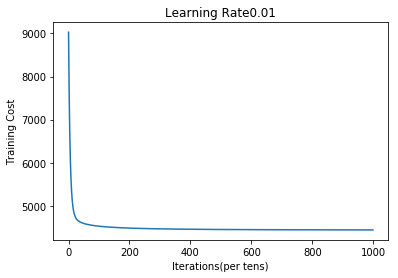

In [163]:
#Alpha = 0.01, iterations = 10000
linear_reg_model(X_train,y_train,X_val,y_val,0.01,10000)

Epochs1 /10000: 
Training cost 9886.90062017849|Validation cost 10302.429864770635
Training MAE 97.34987142641053|Validation MAE 98.29754340454184
Epochs2 /10000: 
Training cost 9876.360027130073|Validation cost 10291.767553287156
Training MAE 97.25282862604892|Validation MAE 98.19967330532306
Epochs3 /10000: 
Training cost 9865.846239829814|Validation cost 10281.132830832761
Training MAE 97.15587985757793|Validation MAE 98.10190621847373
Epochs4 /10000: 
Training cost 9855.359118444925|Validation cost 10270.525550338521
Training MAE 97.0590250510177|Validation MAE 98.00424200158001
Epochs5 /10000: 
Training cost 9844.89852471993|Validation cost 10259.94556637771
Training MAE 96.9622641362731|Validation MAE 97.90668051267116
Epochs6 /10000: 
Training cost 9834.464321953785|Validation cost 10249.392735142363
Training MAE 96.86559704313545|Validation MAE 97.8092216102168
Epochs7 /10000: 
Training cost 9824.056374977374|Validation cost 10238.86691442021
Training MAE 96.76902370128393|Vali

Epochs152 /10000: 
Training cost 8542.911427454721|Validation cost 8945.928248164484
Training MAE 83.72233378343573|Validation MAE 84.6134758138059
Epochs153 /10000: 
Training cost 8535.398741469286|Validation cost 8938.357373362856
Training MAE 83.63872086568769|Validation MAE 84.52975042679698
Epochs154 /10000: 
Training cost 8527.901624817048|Validation cost 8930.802256014196
Training MAE 83.55519992654483|Validation MAE 84.44611036845346
Epochs155 /10000: 
Training cost 8520.420037221895|Validation cost 8923.26285405443
Training MAE 83.47176160528437|Validation MAE 84.36255554106087
Epochs156 /10000: 
Training cost 8512.953938618564|Validation cost 8915.739125647402
Training MAE 83.38840582693669|Validation MAE 84.27908584709711
Epochs157 /10000: 
Training cost 8505.50328915029|Validation cost 8908.23102918232
Training MAE 83.30513251654766|Validation MAE 84.19570118923146
Epochs158 /10000: 
Training cost 8498.068049166457|Validation cost 8900.73852327129
Training MAE 83.2219450345

Epochs236 /10000: 
Training cost 7962.628399549977|Validation cost 8361.27143060798
Training MAE 77.00037212935676|Validation MAE 77.89298913544049
Epochs237 /10000: 
Training cost 7956.2995318773155|Validation cost 8354.8953086491
Training MAE 76.92402644421827|Validation MAE 77.8167749584908
Epochs238 /10000: 
Training cost 7949.9834124363215|Validation cost 8348.53201992752
Training MAE 76.84778241861851|Validation MAE 77.74065712199261
Epochs239 /10000: 
Training cost 7943.680012869224|Validation cost 8342.18153530299
Training MAE 76.77163454503443|Validation MAE 77.66463604135434
Epochs240 /10000: 
Training cost 7937.389304912294|Validation cost 8335.843825737222
Training MAE 76.69558004336062|Validation MAE 77.58873070838025
Epochs241 /10000: 
Training cost 7931.111260395136|Validation cost 8329.518862293075
Training MAE 76.61963471389306|Validation MAE 77.51291899624803
Epochs242 /10000: 
Training cost 7924.845851239941|Validation cost 8323.206616133768
Training MAE 76.543785929

Epochs336 /10000: 
Training cost 7388.583280805978|Validation cost 7782.821328985992
Training MAE 69.85372586731923|Validation MAE 70.75648238095546
Epochs337 /10000: 
Training cost 7383.401793631336|Validation cost 7777.598249649029
Training MAE 69.78722070843178|Validation MAE 70.69021784044735
Epochs338 /10000: 
Training cost 7378.230595495308|Validation cost 7772.385495601983
Training MAE 69.72081697362118|Validation MAE 70.6240535335899
Epochs339 /10000: 
Training cost 7373.069664956501|Validation cost 7767.183045135897
Training MAE 69.65450305600065|Validation MAE 70.55800219701786
Epochs340 /10000: 
Training cost 7367.9189806255545|Validation cost 7761.9908765969185
Training MAE 69.58826657670745|Validation MAE 70.49201914707206
Epochs341 /10000: 
Training cost 7362.778521164927|Validation cost 7756.808968386029
Training MAE 69.5221502732324|Validation MAE 70.42612419906315
Epochs342 /10000: 
Training cost 7357.648265288666|Validation cost 7751.637298958806
Training MAE 69.45612

Epochs425 /10000: 
Training cost 6965.406658310543|Validation cost 7356.060956298248
Training MAE 64.35079655415356|Validation MAE 65.26766513411836
Epochs426 /10000: 
Training cost 6961.062368710881|Validation cost 7351.677537915575
Training MAE 64.29376142503166|Validation MAE 65.21096609132152
Epochs427 /10000: 
Training cost 6956.726642477345|Validation cost 7347.302704511948
Training MAE 64.23681254234143|Validation MAE 65.15440573322897
Epochs428 /10000: 
Training cost 6952.399462111735|Validation cost 7342.936438503028
Training MAE 64.17995495425482|Validation MAE 65.09797317650637
Epochs429 /10000: 
Training cost 6948.0808101539415|Validation cost 7338.578722343821
Training MAE 64.1231843339011|Validation MAE 65.04160754940705
Epochs430 /10000: 
Training cost 6943.770669181836|Validation cost 7334.229538528542
Training MAE 64.066529113183|Validation MAE 64.98534784151941
Epochs431 /10000: 
Training cost 6939.469021811162|Validation cost 7329.888869590493
Training MAE 64.0099983

Epochs517 /10000: 
Training cost 6599.48230576503|Validation cost 6986.619318879094
Training MAE 59.564241307802234|Validation MAE 60.52100441844966
Epochs518 /10000: 
Training cost 6595.85710403012|Validation cost 6982.95674103636
Training MAE 59.517591818037225|Validation MAE 60.47463557677695
Epochs519 /10000: 
Training cost 6592.23900307694|Validation cost 6979.301281517698
Training MAE 59.47110725696205|Validation MAE 60.428381892334706
Epochs520 /10000: 
Training cost 6588.627988520023|Validation cost 6975.652925923786
Training MAE 59.42479347547065|Validation MAE 60.38224781207919
Epochs521 /10000: 
Training cost 6585.024046003988|Validation cost 6972.0116598858285
Training MAE 59.37863425283003|Validation MAE 60.336186534192834
Epochs522 /10000: 
Training cost 6581.427161203461|Validation cost 6968.3774690654745
Training MAE 59.33264813925707|Validation MAE 60.290217360091944
Epochs523 /10000: 
Training cost 6577.837319823017|Validation cost 6964.750339154738
Training MAE 59.28

Epochs603 /10000: 
Training cost 6312.257651996088|Validation cost 6696.243780079526
Training MAE 55.974933757121605|Validation MAE 56.910116475481885
Epochs604 /10000: 
Training cost 6309.193476189519|Validation cost 6693.1437209716605
Training MAE 55.93805630093312|Validation MAE 56.87286797470794
Epochs605 /10000: 
Training cost 6306.13526726065|Validation cost 6690.049646230511
Training MAE 55.90126077634164|Validation MAE 56.835762687318415
Epochs606 /10000: 
Training cost 6303.083013176957|Validation cost 6686.961543831955
Training MAE 55.864548261590144|Validation MAE 56.79875097289057
Epochs607 /10000: 
Training cost 6300.03670193073|Validation cost 6683.879401776807
Training MAE 55.82792620759858|Validation MAE 56.761845729239575
Epochs608 /10000: 
Training cost 6296.996321539012|Validation cost 6680.803208090749
Training MAE 55.79140191068764|Validation MAE 56.72508243258754
Epochs609 /10000: 
Training cost 6293.961860043551|Validation cost 6677.732950824295
Training MAE 55.7

Epochs693 /10000: 
Training cost 6059.026711184239|Validation cost 6439.8545997488945
Training MAE 53.0499473708282|Validation MAE 53.96968934619733
Epochs694 /10000: 
Training cost 6056.454147399444|Validation cost 6437.247769869911
Training MAE 53.02177729714842|Validation MAE 53.94132252505274
Epochs695 /10000: 
Training cost 6053.886560954903|Validation cost 6434.645935854215
Training MAE 52.993704695849345|Validation MAE 53.91300919919481
Epochs696 /10000: 
Training cost 6051.323941851021|Validation cost 6432.049087714924
Training MAE 52.96571368087355|Validation MAE 53.88476343462
Epochs697 /10000: 
Training cost 6048.766280108698|Validation cost 6429.457215485632
Training MAE 52.93780399067396|Validation MAE 53.85659033027252
Epochs698 /10000: 
Training cost 6046.213565769252|Validation cost 6426.870309220357
Training MAE 52.90999893910471|Validation MAE 53.82851576745911
Epochs699 /10000: 
Training cost 6043.665788894404|Validation cost 6424.288358993495
Training MAE 52.8822618

Epochs782 /10000: 
Training cost 5848.472471305815|Validation cost 6226.324612439544
Training MAE 50.86368733521722|Validation MAE 51.78578943632817
Epochs783 /10000: 
Training cost 5846.3059566740385|Validation cost 6224.1255276768725
Training MAE 50.8426291793236|Validation MAE 51.76506419915758
Epochs784 /10000: 
Training cost 5844.143604946083|Validation cost 6221.93062537582
Training MAE 50.82164158661409|Validation MAE 51.7444367863011
Epochs785 /10000: 
Training cost 5841.985407786679|Validation cost 6219.739897211031
Training MAE 50.80075976376585|Validation MAE 51.72388202838283
Epochs786 /10000: 
Training cost 5839.831356877564|Validation cost 6217.553334874104
Training MAE 50.77998946091006|Validation MAE 51.7033782066919
Epochs787 /10000: 
Training cost 5837.68144391743|Validation cost 6215.370930073547
Training MAE 50.75930925406467|Validation MAE 51.68289637016273
Epochs788 /10000: 
Training cost 5835.535660621904|Validation cost 6213.19267453475
Training MAE 50.738707457

Epochs884 /10000: 
Training cost 5647.569324393475|Validation cost 6022.2015401856725
Training MAE 49.10047229467378|Validation MAE 50.02210412701927
Epochs885 /10000: 
Training cost 5645.787265612478|Validation cost 6020.388948410216
Training MAE 49.08677916512741|Validation MAE 50.00809833100913
Epochs886 /10000: 
Training cost 5644.008601340558|Validation cost 6018.5797714447235
Training MAE 49.07317038548937|Validation MAE 49.9941536348067
Epochs887 /10000: 
Training cost 5642.233324806659|Validation cost 6016.774002522654
Training MAE 49.05965961529183|Validation MAE 49.980256624070485
Epochs888 /10000: 
Training cost 5640.461429253488|Validation cost 6014.971634891167
Training MAE 49.04621716634129|Validation MAE 49.96638409187281
Epochs889 /10000: 
Training cost 5638.692907937476|Validation cost 6013.172661811104
Training MAE 49.03283948493238|Validation MAE 49.952568508166856
Epochs890 /10000: 
Training cost 5636.927754128762|Validation cost 6011.377076556949
Training MAE 49.01

Epochs985 /10000: 
Training cost 5483.6492597459455|Validation cost 5855.300699475223
Training MAE 48.009079102914335|Validation MAE 48.88907964841407
Epochs986 /10000: 
Training cost 5482.1780339741545|Validation cost 5853.801005171878
Training MAE 48.00075423694993|Validation MAE 48.880353400567365
Epochs987 /10000: 
Training cost 5480.709583814925|Validation cost 5852.304106977143
Training MAE 47.99246122206065|Validation MAE 48.87167011081745
Epochs988 /10000: 
Training cost 5479.243903752822|Validation cost 5850.809999375022
Training MAE 47.98420554763546|Validation MAE 48.863058322427904
Epochs989 /10000: 
Training cost 5477.780988283567|Validation cost 5849.31867686065
Training MAE 47.976020856124286|Validation MAE 48.85450061260092
Epochs990 /10000: 
Training cost 5476.320831914041|Validation cost 5847.830133940263
Training MAE 47.96788530971653|Validation MAE 48.84598316658166
Epochs991 /10000: 
Training cost 5474.8634291622475|Validation cost 5846.344365131179
Training MAE 47

Epochs1085 /10000: 
Training cost 5349.416250047816|Validation cost 5718.3220342888035
Training MAE 47.368417944091384|Validation MAE 48.221187986849245
Epochs1086 /10000: 
Training cost 5348.197003960213|Validation cost 5717.076359683283
Training MAE 47.36380124501284|Validation MAE 48.21631626961126
Epochs1087 /10000: 
Training cost 5346.980033707115|Validation cost 5715.832981147824
Training MAE 47.359230929701006|Validation MAE 48.21148487880451
Epochs1088 /10000: 
Training cost 5345.765334783932|Validation cost 5714.591894173328
Training MAE 47.35470562115741|Validation MAE 48.20668161808318
Epochs1089 /10000: 
Training cost 5344.552902695175|Validation cost 5713.353094259767
Training MAE 47.35021620050938|Validation MAE 48.20189318144228
Epochs1090 /10000: 
Training cost 5343.342732954435|Validation cost 5712.116576916151
Training MAE 47.34576956561893|Validation MAE 48.19714098387276
Epochs1091 /10000: 
Training cost 5342.13482108436|Validation cost 5710.882337660521
Training MA

Epochs1180 /10000: 
Training cost 5243.153884934592|Validation cost 5609.638586448885
Training MAE 47.071043844731435|Validation MAE 47.91299046270782
Epochs1181 /10000: 
Training cost 5242.131932191776|Validation cost 5608.592103105302
Training MAE 47.06917332001866|Validation MAE 47.91100938426485
Epochs1182 /10000: 
Training cost 5241.1118655064965|Validation cost 5607.547525490628
Training MAE 47.06733433953185|Validation MAE 47.90906410504695
Epochs1183 /10000: 
Training cost 5240.093681160323|Validation cost 5606.504849879194
Training MAE 47.0655319451508|Validation MAE 47.90715725694378
Epochs1184 /10000: 
Training cost 5239.077375442313|Validation cost 5605.464072552792
Training MAE 47.063744220043546|Validation MAE 47.90528978793494
Epochs1185 /10000: 
Training cost 5238.062944648997|Validation cost 5604.425189800667
Training MAE 47.061981778618566|Validation MAE 47.903442168040606
Epochs1186 /10000: 
Training cost 5237.050385084367|Validation cost 5603.388197919499
Training M

Epochs1281 /10000: 
Training cost 5148.870978416665|Validation cost 5512.976133167746
Training MAE 46.99080956022767|Validation MAE 47.833052712221566
Epochs1282 /10000: 
Training cost 5148.021927510674|Validation cost 5512.104498310881
Training MAE 46.99103229339735|Validation MAE 47.83320702419421
Epochs1283 /10000: 
Training cost 5147.174422498088|Validation cost 5511.234428182325
Training MAE 46.99126708746065|Validation MAE 47.83338086156131
Epochs1284 /10000: 
Training cost 5146.3284603447|Validation cost 5510.365919738676
Training MAE 46.991524193677286|Validation MAE 47.833567684659585
Epochs1285 /10000: 
Training cost 5145.4840380224|Validation cost 5509.498969942609
Training MAE 46.991799731121844|Validation MAE 47.833755238300164
Epochs1286 /10000: 
Training cost 5144.64115250916|Validation cost 5508.633575762868
Training MAE 46.99208413169597|Validation MAE 47.833951712100585
Epochs1287 /10000: 
Training cost 5143.799800789017|Validation cost 5507.769734174249
Training MAE 

Epochs1373 /10000: 
Training cost 5076.86480560081|Validation cost 5438.969885902381
Training MAE 47.08267477554222|Validation MAE 47.91369878323043
Epochs1374 /10000: 
Training cost 5076.14600758991|Validation cost 5438.230196545153
Training MAE 47.0843381023997|Validation MAE 47.915240496218274
Epochs1375 /10000: 
Training cost 5075.4285003474815|Validation cost 5437.491815890479
Training MAE 47.08601630559197|Validation MAE 47.91680563643
Epochs1376 /10000: 
Training cost 5074.712281351139|Validation cost 5436.754741405669
Training MAE 47.087724592471375|Validation MAE 47.91838249654093
Epochs1377 /10000: 
Training cost 5073.997348083548|Validation cost 5436.018970563076
Training MAE 47.089453619353996|Validation MAE 47.919966428225955
Epochs1378 /10000: 
Training cost 5073.283698032419|Validation cost 5435.284500840091
Training MAE 47.09119617622276|Validation MAE 47.921572879718966
Epochs1379 /10000: 
Training cost 5072.571328690495|Validation cost 5434.551329719125
Training MAE 4

Epochs1469 /10000: 
Training cost 5013.401882134293|Validation cost 5373.581673673889
Training MAE 47.29389774051797|Validation MAE 48.11570655357447
Epochs1470 /10000: 
Training cost 5012.796185045586|Validation cost 5372.956758812717
Training MAE 47.296594032986214|Validation MAE 48.118310679285344
Epochs1471 /10000: 
Training cost 5012.191558222356|Validation cost 5372.332931128342
Training MAE 47.29930718798241|Validation MAE 48.12091232751385
Epochs1472 /10000: 
Training cost 5011.587999583453|Validation cost 5371.71018852868
Training MAE 47.30203506247331|Validation MAE 48.12351397778117
Epochs1473 /10000: 
Training cost 5010.985507051883|Validation cost 5371.0885289257985
Training MAE 47.30476871986755|Validation MAE 48.126113245319196
Epochs1474 /10000: 
Training cost 5010.384078554804|Validation cost 5370.467950235913
Training MAE 47.307510651450585|Validation MAE 48.128713759606256
Epochs1475 /10000: 
Training cost 5009.783712023515|Validation cost 5369.848450379382
Training 

Epochs1542 /10000: 
Training cost 4971.8736159452055|Validation cost 5330.694269068765
Training MAE 47.51031333649117|Validation MAE 48.32589520280906
Epochs1543 /10000: 
Training cost 4971.340828715177|Validation cost 5330.143469642241
Training MAE 47.513523411363586|Validation MAE 48.32900532015892
Epochs1544 /10000: 
Training cost 4970.808970250211|Validation cost 5329.593615085401
Training MAE 47.51673586572678|Validation MAE 48.332123173628894
Epochs1545 /10000: 
Training cost 4970.2780387516505|Validation cost 5329.044703588448
Training MAE 47.51995827235229|Validation MAE 48.335251312146596
Epochs1546 /10000: 
Training cost 4969.748032424416|Validation cost 5328.496733345166
Training MAE 47.523193325354335|Validation MAE 48.338389041617866
Epochs1547 /10000: 
Training cost 4969.218949477015|Validation cost 5327.949702552924
Training MAE 47.52642856258876|Validation MAE 48.341551292002926
Epochs1548 /10000: 
Training cost 4968.690788121526|Validation cost 5327.403609412656
Traini

Epochs1626 /10000: 
Training cost 4930.192483211748|Validation cost 5287.555189583957
Training MAE 47.79855866787135|Validation MAE 48.60534394712113
Epochs1627 /10000: 
Training cost 4929.731770354871|Validation cost 5287.077778420038
Training MAE 47.80216237405292|Validation MAE 48.60887153527684
Epochs1628 /10000: 
Training cost 4929.2718470166365|Validation cost 5286.6011719418775
Training MAE 47.805765589800345|Validation MAE 48.61239791311122
Epochs1629 /10000: 
Training cost 4928.812711675771|Validation cost 5286.125368617049
Training MAE 47.80937078316492|Validation MAE 48.61592019279881
Epochs1630 /10000: 
Training cost 4928.354362814026|Validation cost 5285.650366916157
Training MAE 47.812979389088134|Validation MAE 48.619438378784
Epochs1631 /10000: 
Training cost 4927.896798916174|Validation cost 5285.1761653128215
Training MAE 47.81659713270334|Validation MAE 48.62295439834725
Epochs1632 /10000: 
Training cost 4927.440018470001|Validation cost 5284.702762283688
Training MA

Epochs1721 /10000: 
Training cost 4889.748687664349|Validation cost 5245.591237331142
Training MAE 48.15677160491363|Validation MAE 48.951539524161085
Epochs1722 /10000: 
Training cost 4889.356586786122|Validation cost 5245.183829453274
Training MAE 48.16069533048086|Validation MAE 48.95528529338199
Epochs1723 /10000: 
Training cost 4888.965143612564|Validation cost 5244.777093395707
Training MAE 48.16461990464886|Validation MAE 48.959038646656374
Epochs1724 /10000: 
Training cost 4888.574356884316|Validation cost 5244.371027888131
Training MAE 48.16854761668287|Validation MAE 48.962799872397966
Epochs1725 /10000: 
Training cost 4888.184225344516|Validation cost 5243.965631662731
Training MAE 48.1724803120223|Validation MAE 48.96656606250964
Epochs1726 /10000: 
Training cost 4887.794747738792|Validation cost 5243.560903454192
Training MAE 48.17641507588031|Validation MAE 48.97033904876121
Epochs1727 /10000: 
Training cost 4887.405922815265|Validation cost 5243.156841999694
Training MAE

Epochs1797 /10000: 
Training cost 4861.738061152143|Validation cost 5216.456742643445
Training MAE 48.45779716043077|Validation MAE 49.24416100983931
Epochs1798 /10000: 
Training cost 4861.392526038063|Validation cost 5216.09694233779
Training MAE 48.461783556372616|Validation MAE 49.24807221375211
Epochs1799 /10000: 
Training cost 4861.047559697573|Validation cost 5215.737724098759
Training MAE 48.46577393129407|Validation MAE 49.251991905518814
Epochs1800 /10000: 
Training cost 4860.703161047566|Validation cost 5215.379086832567
Training MAE 48.46976517196397|Validation MAE 49.255912933753955
Epochs1801 /10000: 
Training cost 4860.359329007082|Validation cost 5215.021029447582
Training MAE 48.47375587967233|Validation MAE 49.25984284198242
Epochs1802 /10000: 
Training cost 4860.0160624973|Validation cost 5214.663550854315
Training MAE 48.47774875749754|Validation MAE 49.263768856570366
Epochs1803 /10000: 
Training cost 4859.673360441533|Validation cost 5214.306649965415
Training MAE 

Epochs1888 /10000: 
Training cost 4832.4974482151665|Validation cost 5185.971146865475
Training MAE 48.823690454602556|Validation MAE 49.60701392540742
Epochs1889 /10000: 
Training cost 4832.199485529458|Validation cost 5185.660085470441
Training MAE 48.82773464266467|Validation MAE 49.61103956482145
Epochs1890 /10000: 
Training cost 4831.902001333671|Validation cost 5185.3495149052405
Training MAE 48.83177512883176|Validation MAE 49.61506232661791
Epochs1891 /10000: 
Training cost 4831.60499472318|Validation cost 5185.039434254994
Training MAE 48.835814599101425|Validation MAE 49.619081373867985
Epochs1892 /10000: 
Training cost 4831.30846479514|Validation cost 5184.729842606611
Training MAE 48.83985184663266|Validation MAE 49.623102047978506
Epochs1893 /10000: 
Training cost 4831.012410648492|Validation cost 5184.420739048789
Training MAE 48.843887992930256|Validation MAE 49.627122006227815
Epochs1894 /10000: 
Training cost 4830.716831383951|Validation cost 5184.112122672011
Training

Epochs1987 /10000: 
Training cost 4805.1848801669075|Validation cost 5157.420079259949
Training MAE 49.22147140043652|Validation MAE 50.00531665449209
Epochs1988 /10000: 
Training cost 4804.930166714809|Validation cost 5157.153439846563
Training MAE 49.2254612852605|Validation MAE 50.00933058212651
Epochs1989 /10000: 
Training cost 4804.675850320658|Validation cost 5156.887208842003
Training MAE 49.22944910257546|Validation MAE 50.01334259427392
Epochs1990 /10000: 
Training cost 4804.4219302403035|Validation cost 5156.621385492406
Training MAE 49.233435451452976|Validation MAE 50.01735667603768
Epochs1991 /10000: 
Training cost 4804.16840573106|Validation cost 5156.355969045379
Training MAE 49.23741975969423|Validation MAE 50.02136815250381
Epochs1992 /10000: 
Training cost 4803.915276051702|Validation cost 5156.090958749998
Training MAE 49.24140377688209|Validation MAE 50.02537696982893
Epochs1993 /10000: 
Training cost 4803.662540462462|Validation cost 5155.826353856798
Training MAE 

Epochs2080 /10000: 
Training cost 4783.102703930455|Validation cost 5134.2761042402235
Training MAE 49.58723390491541|Validation MAE 50.37503473875633
Epochs2081 /10000: 
Training cost 4782.881915099415|Validation cost 5134.044404283653
Training MAE 49.59112517695601|Validation MAE 50.37894862936495
Epochs2082 /10000: 
Training cost 4782.661460019276|Validation cost 5133.813048550592
Training MAE 49.59501210916579|Validation MAE 50.38286140529965
Epochs2083 /10000: 
Training cost 4782.441338070228|Validation cost 5133.582036412061
Training MAE 49.59889687051202|Validation MAE 50.386774895391135
Epochs2084 /10000: 
Training cost 4782.221548633674|Validation cost 5133.351367240308
Training MAE 49.6027778717243|Validation MAE 50.39068409264492
Epochs2085 /10000: 
Training cost 4782.002091092231|Validation cost 5133.121040408796
Training MAE 49.606655144955155|Validation MAE 50.39459156066713
Epochs2086 /10000: 
Training cost 4781.782964829725|Validation cost 5132.891055292206
Training MAE

Epochs2176 /10000: 
Training cost 4763.344214295316|Validation cost 5113.516612376999
Training MAE 49.95379719381465|Validation MAE 50.74292029547852
Epochs2177 /10000: 
Training cost 4763.152805055728|Validation cost 5113.31525645982
Training MAE 49.9575404433084|Validation MAE 50.746686157349835
Epochs2178 /10000: 
Training cost 4762.961675274982|Validation cost 5113.11418962203
Training MAE 49.96128228668373|Validation MAE 50.750449835912214
Epochs2179 /10000: 
Training cost 4762.7708244395135|Validation cost 5112.913411341489
Training MAE 49.9650229683073|Validation MAE 50.75421214287629
Epochs2180 /10000: 
Training cost 4762.580252036767|Validation cost 5112.712921097065
Training MAE 49.96876001373975|Validation MAE 50.75797054401315
Epochs2181 /10000: 
Training cost 4762.389957555185|Validation cost 5112.5127183686345
Training MAE 49.97249912879016|Validation MAE 50.76172594866431
Epochs2182 /10000: 
Training cost 4762.199940484209|Validation cost 5112.312802637076
Training MAE 4

Epochs2271 /10000: 
Training cost 4746.340116340527|Validation cost 5095.609367817839
Training MAE 50.30059486680877|Validation MAE 51.091501327754564
Epochs2272 /10000: 
Training cost 4746.173095330918|Validation cost 5095.433276624611
Training MAE 50.304140478090964|Validation MAE 51.095072287030284
Epochs2273 /10000: 
Training cost 4746.006309205801|Validation cost 5095.257429148739
Training MAE 50.30768249466449|Validation MAE 51.098641341332396
Epochs2274 /10000: 
Training cost 4745.8397575385015|Validation cost 5095.081824955553
Training MAE 50.31122075482477|Validation MAE 51.10220751943309
Epochs2275 /10000: 
Training cost 4745.6734399031775|Validation cost 5094.906463611218
Training MAE 50.31475611729894|Validation MAE 51.105770764428755
Epochs2276 /10000: 
Training cost 4745.507355874814|Validation cost 5094.731344682731
Training MAE 50.31828770080194|Validation MAE 51.10933009618372
Epochs2277 /10000: 
Training cost 4745.34150502922|Validation cost 5094.556467737923
Training

Epochs2365 /10000: 
Training cost 4731.612071298994|Validation cost 5080.066280310569
Training MAE 50.62264655756605|Validation MAE 51.418328009866656
Epochs2366 /10000: 
Training cost 4731.465370825378|Validation cost 5079.911305792738
Training MAE 50.625964841514985|Validation MAE 51.421709190250425
Epochs2367 /10000: 
Training cost 4731.31886854481|Validation cost 5079.7565375753575
Training MAE 50.62928086504976|Validation MAE 51.42509139819313
Epochs2368 /10000: 
Training cost 4731.172564101833|Validation cost 5079.60197529554
Training MAE 50.63259368791664|Validation MAE 51.42847207632081
Epochs2369 /10000: 
Training cost 4731.026457141677|Validation cost 5079.447618591086
Training MAE 50.635905085819054|Validation MAE 51.431854182118016
Epochs2370 /10000: 
Training cost 4730.880547310262|Validation cost 5079.293467100493
Training MAE 50.63921528010409|Validation MAE 51.435232581493686
Epochs2371 /10000: 
Training cost 4730.73483425419|Validation cost 5079.13952046295
Training MA

Epochs2458 /10000: 
Training cost 4718.772611473709|Validation cost 5066.491070413212
Training MAE 50.92088633527708|Validation MAE 51.724457480840194
Epochs2459 /10000: 
Training cost 4718.642907771574|Validation cost 5066.35381561711
Training MAE 50.92397728159082|Validation MAE 51.727632935899045
Epochs2460 /10000: 
Training cost 4718.513371979816|Validation cost 5066.216736172522
Training MAE 50.92706663000682|Validation MAE 51.730806216352825
Epochs2461 /10000: 
Training cost 4718.384003801483|Validation cost 5066.0798317756025
Training MAE 50.930152552532924|Validation MAE 51.733979761209326
Epochs2462 /10000: 
Training cost 4718.254802940194|Validation cost 5065.943102123084
Training MAE 50.933235028627614|Validation MAE 51.737153777305956
Epochs2463 /10000: 
Training cost 4718.1257691001365|Validation cost 5065.806546912275
Training MAE 50.93631406183591|Validation MAE 51.74032431269729
Epochs2464 /10000: 
Training cost 4717.996901986071|Validation cost 5065.6701658410575
Train

Epochs2562 /10000: 
Training cost 4706.1312081532205|Validation cost 5053.102978851469
Training MAE 51.23011247938305|Validation MAE 52.0418723089233
Epochs2563 /10000: 
Training cost 4706.017475836516|Validation cost 5052.982433427982
Training MAE 51.232972779875816|Validation MAE 52.04479873286797
Epochs2564 /10000: 
Training cost 4705.903883415308|Validation cost 5052.862034654328
Training MAE 51.235830084657096|Validation MAE 52.047722956369405
Epochs2565 /10000: 
Training cost 4705.790430646478|Validation cost 5052.74178228107
Training MAE 51.23868642680297|Validation MAE 52.05064397111911
Epochs2566 /10000: 
Training cost 4705.677117287364|Validation cost 5052.62167605924
Training MAE 51.24154104668349|Validation MAE 52.05356178039109
Epochs2567 /10000: 
Training cost 4705.5639430957735|Validation cost 5052.50171574034
Training MAE 51.24439247213099|Validation MAE 52.056476387456044
Epochs2568 /10000: 
Training cost 4705.450907829978|Validation cost 5052.381901076343
Training MAE

Epochs2664 /10000: 
Training cost 4695.211273822631|Validation cost 5041.521837610421
Training MAE 51.51001632653069|Validation MAE 52.32728879945511
Epochs2665 /10000: 
Training cost 4695.110634707147|Validation cost 5041.415042715483
Training MAE 51.51263576228711|Validation MAE 52.32995023855815
Epochs2666 /10000: 
Training cost 4695.010112936635|Validation cost 5041.3083713029855
Training MAE 51.51525279743875|Validation MAE 52.33260873912605
Epochs2667 /10000: 
Training cost 4694.909708311026|Validation cost 5041.201823167085
Training MAE 51.51786813062612|Validation MAE 52.335265062721895
Epochs2668 /10000: 
Training cost 4694.809420630636|Validation cost 5041.095398102318
Training MAE 51.52048052138155|Validation MAE 52.337919351968445
Epochs2669 /10000: 
Training cost 4694.709249696157|Validation cost 5040.989095903605
Training MAE 51.523090621217406|Validation MAE 52.340570709867166
Epochs2670 /10000: 
Training cost 4694.6091953086625|Validation cost 5040.882916366258
Training

Epochs2755 /10000: 
Training cost 4686.510320294402|Validation cost 5032.285152217399
Training MAE 51.739691591378545|Validation MAE 52.5608002565632
Epochs2756 /10000: 
Training cost 4686.419584603617|Validation cost 5032.18879619186
Training MAE 51.742120216223206|Validation MAE 52.5632671648494
Epochs2757 /10000: 
Training cost 4686.328949523211|Validation cost 5032.092546408476
Training MAE 51.74454610165999|Validation MAE 52.56573413629373
Epochs2758 /10000: 
Training cost 4686.238414884855|Validation cost 5031.996402693588
Training MAE 51.74696925050102|Validation MAE 52.568200724907996
Epochs2759 /10000: 
Training cost 4686.147980520543|Validation cost 5031.900364873861
Training MAE 51.74939042512539|Validation MAE 52.57066982907346
Epochs2760 /10000: 
Training cost 4686.057646262583|Validation cost 5031.80443277628
Training MAE 51.751808893346244|Validation MAE 52.57313838065392
Epochs2761 /10000: 
Training cost 4685.967411943605|Validation cost 5031.708606228153
Training MAE 5

Epochs2853 /10000: 
Training cost 4678.071930102576|Validation cost 5023.321942905736
Training MAE 51.966923110217905|Validation MAE 52.79306530095068
Epochs2854 /10000: 
Training cost 4677.990300388944|Validation cost 5023.2352201360845
Training MAE 51.969137714680116|Validation MAE 52.79532725274293
Epochs2855 /10000: 
Training cost 4677.908756211156|Validation cost 5023.14858803355
Training MAE 51.97134980514068|Validation MAE 52.79758739440709
Epochs2856 /10000: 
Training cost 4677.827297429276|Validation cost 5023.062046453312
Training MAE 51.97355975325619|Validation MAE 52.79984626482194
Epochs2857 /10000: 
Training cost 4677.745923903624|Validation cost 5022.9755952508185
Training MAE 51.97576762939367|Validation MAE 52.802103509003054
Epochs2858 /10000: 
Training cost 4677.664635494789|Validation cost 5022.88923428178
Training MAE 51.97797360925728|Validation MAE 52.80435824429513
Epochs2859 /10000: 
Training cost 4677.583432063617|Validation cost 5022.802963402174
Training MA

Epochs2941 /10000: 
Training cost 4671.201182547328|Validation cost 5016.022123401602
Training MAE 52.15483043463355|Validation MAE 52.984728467906564
Epochs2942 /10000: 
Training cost 4671.126571939882|Validation cost 5015.942853080339
Training MAE 52.15688743316445|Validation MAE 52.98682423603859
Epochs2943 /10000: 
Training cost 4671.052035504102|Validation cost 5015.863661649
Training MAE 52.1589435707595|Validation MAE 52.988918446915214
Epochs2944 /10000: 
Training cost 4670.977573121282|Validation cost 5015.784548984377
Training MAE 52.16099788240374|Validation MAE 52.99101140187292
Epochs2945 /10000: 
Training cost 4670.903184672937|Validation cost 5015.705514963482
Training MAE 52.16305131486627|Validation MAE 52.99310202230997
Epochs2946 /10000: 
Training cost 4670.8288700408|Validation cost 5015.626559463552
Training MAE 52.165102620794464|Validation MAE 52.99519031060606
Epochs2947 /10000: 
Training cost 4670.7546291068265|Validation cost 5015.54768236205
Training MAE 52.1

Epochs3032 /10000: 
Training cost 4664.701499945099|Validation cost 5009.117191792079
Training MAE 52.334689490288206|Validation MAE 53.16758933173625
Epochs3033 /10000: 
Training cost 4664.633178572264|Validation cost 5009.044622115257
Training MAE 52.33658644508091|Validation MAE 53.169511143580614
Epochs3034 /10000: 
Training cost 4664.564921423003|Validation cost 5008.97212098692
Training MAE 52.338481263010955|Validation MAE 53.17143080094462
Epochs3035 /10000: 
Training cost 4664.496728397042|Validation cost 5008.89968830265
Training MAE 52.340374014485405|Validation MAE 53.17334830602405
Epochs3036 /10000: 
Training cost 4664.428599394287|Validation cost 5008.827323958222
Training MAE 52.34226574922454|Validation MAE 53.17526366101248
Epochs3037 /10000: 
Training cost 4664.360534314835|Validation cost 5008.7550278495955
Training MAE 52.3441553284047|Validation MAE 53.17717686810125
Epochs3038 /10000: 
Training cost 4664.292533058962|Validation cost 5008.682799872918
Training MAE

Epochs3121 /10000: 
Training cost 4658.8614464809925|Validation cost 5002.915514633515
Training MAE 52.49665335657979|Validation MAE 53.332301970969915
Epochs3122 /10000: 
Training cost 4658.798468474097|Validation cost 5002.848657453363
Training MAE 52.498395809991045|Validation MAE 53.33407795228223
Epochs3123 /10000: 
Training cost 4658.735546451097|Validation cost 5002.781860228193
Training MAE 52.500136431799625|Validation MAE 53.33585193807632
Epochs3124 /10000: 
Training cost 4658.672680326843|Validation cost 5002.7151228690445
Training MAE 52.50187545052159|Validation MAE 53.33762401323924
Epochs3125 /10000: 
Training cost 4658.609870016336|Validation cost 5002.648445287114
Training MAE 52.50361246660387|Validation MAE 53.339394292787304
Epochs3126 /10000: 
Training cost 4658.547115434735|Validation cost 5002.581827393756
Training MAE 52.505347482101534|Validation MAE 53.34116366316143
Epochs3127 /10000: 
Training cost 4658.484416497355|Validation cost 5002.515269100485
Trainin

Epochs3212 /10000: 
Training cost 4653.349759172037|Validation cost 4997.0666306413505
Training MAE 52.64875114895192|Validation MAE 53.48705469921857
Epochs3213 /10000: 
Training cost 4653.291545113532|Validation cost 4997.004883600221
Training MAE 52.650345713227466|Validation MAE 53.4886805450213
Epochs3214 /10000: 
Training cost 4653.233379891741|Validation cost 4996.943189034395
Training MAE 52.6519384314125|Validation MAE 53.49030455341922
Epochs3215 /10000: 
Training cost 4653.175263434495|Validation cost 4996.88154686821
Training MAE 52.653529305401506|Validation MAE 53.49192672628339
Epochs3216 /10000: 
Training cost 4653.117195669757|Validation cost 4996.81995702613
Training MAE 52.655118337087|Validation MAE 53.49354706548297
Epochs3217 /10000: 
Training cost 4653.05917652562|Validation cost 4996.75841943276
Training MAE 52.65670612380836|Validation MAE 53.49516557288525
Epochs3218 /10000: 
Training cost 4653.001205930307|Validation cost 4996.6969340128335
Training MAE 52.65

Epochs3307 /10000: 
Training cost 4648.027891223046|Validation cost 4991.4249018742
Training MAE 52.793296579772296|Validation MAE 53.63533495636713
Epochs3308 /10000: 
Training cost 4647.974011691096|Validation cost 4991.367819856899
Training MAE 52.794749620933686|Validation MAE 53.636832174059016
Epochs3309 /10000: 
Training cost 4647.920174688583|Validation cost 4991.310783689703
Training MAE 52.79620097063106|Validation MAE 53.638327741713915
Epochs3310 /10000: 
Training cost 4647.866380154661|Validation cost 4991.253793308574
Training MAE 52.79765063059974|Validation MAE 53.63982161929447
Epochs3311 /10000: 
Training cost 4647.812628028596|Validation cost 4991.196848649584
Training MAE 52.79909860257336|Validation MAE 53.64131380851977
Epochs3312 /10000: 
Training cost 4647.758918249761|Validation cost 4991.139949648915
Training MAE 52.8005448882837|Validation MAE 53.64280431110718
Epochs3313 /10000: 
Training cost 4647.705250757638|Validation cost 4991.083096242859
Training MAE 

Epochs3401 /10000: 
Training cost 4643.141275441354|Validation cost 4986.251347780253
Training MAE 52.92323915743864|Validation MAE 53.76967302173787
Epochs3402 /10000: 
Training cost 4643.091141659829|Validation cost 4986.198310084052
Training MAE 52.924552710737814|Validation MAE 53.77103691023904
Epochs3403 /10000: 
Training cost 4643.041045135982|Validation cost 4986.145312678661
Training MAE 52.92586627949423|Validation MAE 53.77239924859371
Epochs3404 /10000: 
Training cost 4642.99098581831|Validation cost 4986.092355509656
Training MAE 52.927179335629305|Validation MAE 53.77376003837881
Epochs3405 /10000: 
Training cost 4642.9409636554|Validation cost 4986.039438522704
Training MAE 52.9284909625556|Validation MAE 53.77511928116969
Epochs3406 /10000: 
Training cost 4642.890978595932|Validation cost 4985.986561663565
Training MAE 52.929801772014656|Validation MAE 53.776476978540124
Epochs3407 /10000: 
Training cost 4642.841030588672|Validation cost 4985.933724878096
Training MAE 5

Epochs3492 /10000: 
Training cost 4638.7256489516485|Validation cost 4981.583538055706
Training MAE 53.03791227162272|Validation MAE 53.88816201306156
Epochs3493 /10000: 
Training cost 4638.678705271532|Validation cost 4981.5339548414495
Training MAE 53.03911406410544|Validation MAE 53.88940243636953
Epochs3494 /10000: 
Training cost 4638.6317945131095|Validation cost 4981.484407327217
Training MAE 53.04031443753183|Validation MAE 53.890641437148595
Epochs3495 /10000: 
Training cost 4638.5849166324515|Validation cost 4981.434895466401
Training MAE 53.04151339335859|Validation MAE 53.891879016846744
Epochs3496 /10000: 
Training cost 4638.538071585705|Validation cost 4981.385419212472
Training MAE 53.04271093304091|Validation MAE 53.89311517691047
Epochs3497 /10000: 
Training cost 4638.491259329092|Validation cost 4981.335978518979
Training MAE 53.04390730949058|Validation MAE 53.89434991878483
Epochs3498 /10000: 
Training cost 4638.444479818911|Validation cost 4981.286573339549
Training

Epochs3593 /10000: 
Training cost 4634.143570700244|Validation cost 4976.748461379044
Training MAE 53.15316685671563|Validation MAE 54.00691981333723
Epochs3594 /10000: 
Training cost 4634.099742385731|Validation cost 4976.702261034687
Training MAE 53.154246218651416|Validation MAE 54.00803041342909
Epochs3595 /10000: 
Training cost 4634.0559429174955|Validation cost 4976.656092057013
Training MAE 53.15532429399943|Validation MAE 54.00913972395439
Epochs3596 /10000: 
Training cost 4634.012172258612|Validation cost 4976.6099544066665
Training MAE 53.15640108408105|Validation MAE 54.01024774622694
Epochs3597 /10000: 
Training cost 4633.968430372216|Validation cost 4976.563848044355
Training MAE 53.157476590216355|Validation MAE 54.01135448155922
Epochs3598 /10000: 
Training cost 4633.924717221508|Validation cost 4976.5177729308525
Training MAE 53.15855095415865|Validation MAE 54.012459931262434
Epochs3599 /10000: 
Training cost 4633.881032769749|Validation cost 4976.471729026997
Training

Epochs3698 /10000: 
Training cost 4629.692465515599|Validation cost 4972.0616098462515
Training MAE 53.260432551488464|Validation MAE 54.117218308016795
Epochs3699 /10000: 
Training cost 4629.651475679585|Validation cost 4972.018499781306
Training MAE 53.2613993274752|Validation MAE 54.11820744638494
Epochs3700 /10000: 
Training cost 4629.610511134578|Validation cost 4971.975417284955
Training MAE 53.26236494182061|Validation MAE 54.11919542143286
Epochs3701 /10000: 
Training cost 4629.569571849643|Validation cost 4971.93236232407
Training MAE 53.263329395717626|Validation MAE 54.120182234346814
Epochs3702 /10000: 
Training cost 4629.528657793898|Validation cost 4971.889334865574
Training MAE 53.26429269035797|Validation MAE 54.121167886311824
Epochs3703 /10000: 
Training cost 4629.487768936512|Validation cost 4971.8463348764435
Training MAE 53.265254941948434|Validation MAE 54.122152378511764
Epochs3704 /10000: 
Training cost 4629.4469052467075|Validation cost 4971.803362323711
Traini

Epochs3789 /10000: 
Training cost 4626.062332585793|Validation cost 4968.247601578431
Training MAE 53.34470545686585|Validation MAE 54.202954644329665
Epochs3790 /10000: 
Training cost 4626.023523573019|Validation cost 4968.206870856177
Training MAE 53.34558840590269|Validation MAE 54.20384877676449
Epochs3791 /10000: 
Training cost 4625.984737236209|Validation cost 4968.166164896067
Training MAE 53.346470287311284|Validation MAE 54.20474184546691
Epochs3792 /10000: 
Training cost 4625.945973548747|Validation cost 4968.125483669473
Training MAE 53.347351102187645|Validation MAE 54.20563420493617
Epochs3793 /10000: 
Training cost 4625.907232484062|Validation cost 4968.084827147816
Training MAE 53.34823085162667|Validation MAE 54.20652570552934
Epochs3794 /10000: 
Training cost 4625.868514015626|Validation cost 4968.044195302561
Training MAE 53.34910953672216|Validation MAE 54.20741614511824
Epochs3795 /10000: 
Training cost 4625.829818116956|Validation cost 4968.003588105217
Training MA

Epochs3885 /10000: 
Training cost 4622.436406752995|Validation cost 4964.446423615145
Training MAE 53.42504986345103|Validation MAE 54.28441205238258
Epochs3886 /10000: 
Training cost 4622.399659225854|Validation cost 4964.407945752948
Training MAE 53.42584225409086|Validation MAE 54.28521511590666
Epochs3887 /10000: 
Training cost 4622.36293200698|Validation cost 4964.369490100742
Training MAE 53.426633672740806|Validation MAE 54.286018184351214
Epochs3888 /10000: 
Training cost 4622.326225073589|Validation cost 4964.331056633912
Training MAE 53.42742428380218|Validation MAE 54.286820284266945
Epochs3889 /10000: 
Training cost 4622.289538402931|Validation cost 4964.292645327878
Training MAE 53.428214499345835|Validation MAE 54.28762146604887
Epochs3890 /10000: 
Training cost 4622.252871972292|Validation cost 4964.254256158095
Training MAE 53.429003745519076|Validation MAE 54.28842348369311
Epochs3891 /10000: 
Training cost 4622.216225758996|Validation cost 4964.215889100061
Training M

Training MAE 53.503715769749334|Validation MAE 54.3645396168096
Epochs3991 /10000: 
Training cost 4618.649962831622|Validation cost 4960.486802407197
Training MAE 53.50442205593543|Validation MAE 54.36526247244803
Epochs3992 /10000: 
Training cost 4618.615247881339|Validation cost 4960.450548841274
Training MAE 53.50512834194495|Validation MAE 54.36598478387107
Epochs3993 /10000: 
Training cost 4618.580551014323|Validation cost 4960.414315075664
Training MAE 53.505833879486055|Validation MAE 54.366706218880736
Epochs3994 /10000: 
Training cost 4618.545872211301|Validation cost 4960.378101089441
Training MAE 53.506538686897656|Validation MAE 54.36742744238383
Epochs3995 /10000: 
Training cost 4618.511211453025|Validation cost 4960.341906861703
Training MAE 53.507242619762664|Validation MAE 54.36814825486706
Epochs3996 /10000: 
Training cost 4618.476568720279|Validation cost 4960.3057323715875
Training MAE 53.50794567897973|Validation MAE 54.36886819282247
Epochs3997 /10000: 
Training co

Epochs4096 /10000: 
Training cost 4615.100152423051|Validation cost 4956.784510009855
Training MAE 53.574527455441405|Validation MAE 54.43704041905065
Epochs4097 /10000: 
Training cost 4615.067236337624|Validation cost 4956.750226864781
Training MAE 53.57515639099224|Validation MAE 54.437685257974664
Epochs4098 /10000: 
Training cost 4615.034336465408|Validation cost 4956.71596148484
Training MAE 53.57578453473686|Validation MAE 54.43832930403468
Epochs4099 /10000: 
Training cost 4615.0014527899975|Validation cost 4956.68171385213
Training MAE 53.576411887489265|Validation MAE 54.43897255803968
Epochs4100 /10000: 
Training cost 4614.968585295006|Validation cost 4956.647483948778
Training MAE 53.57703845006262|Validation MAE 54.43961517281557
Epochs4101 /10000: 
Training cost 4614.9357339640765|Validation cost 4956.613271756934
Training MAE 53.5776642232693|Validation MAE 54.440257148300404
Epochs4102 /10000: 
Training cost 4614.902898780876|Validation cost 4956.579077258777
Training MA

Epochs4191 /10000: 
Training cost 4612.043321565921|Validation cost 4953.604535691982
Training MAE 53.631193077454554|Validation MAE 54.495169525143496
Epochs4192 /10000: 
Training cost 4612.011875766735|Validation cost 4953.571863795574
Training MAE 53.63175698579629|Validation MAE 54.49574762986797
Epochs4193 /10000: 
Training cost 4611.9804447267325|Validation cost 4953.539208074717
Training MAE 53.63232017267437|Validation MAE 54.4963255258205
Epochs4194 /10000: 
Training cost 4611.949028431671|Validation cost 4953.506568513808
Training MAE 53.632882668162765|Validation MAE 54.4969032743741
Epochs4195 /10000: 
Training cost 4611.917626867331|Validation cost 4953.473945097265
Training MAE 53.63344459078405|Validation MAE 54.497480303147896
Epochs4196 /10000: 
Training cost 4611.886240019511|Validation cost 4953.4413378095305
Training MAE 53.63400579395225|Validation MAE 54.49805661287631
Epochs4197 /10000: 
Training cost 4611.8548678740335|Validation cost 4953.408746635067
Training 

Epochs4278 /10000: 
Training cost 4609.3612867704705|Validation cost 4950.820987667547
Training MAE 53.67789379637328|Validation MAE 54.54323339077769
Epochs4279 /10000: 
Training cost 4609.331073877022|Validation cost 4950.789666945342
Training MAE 53.67840647016365|Validation MAE 54.543759481950055
Epochs4280 /10000: 
Training cost 4609.300874578129|Validation cost 4950.758361120437
Training MAE 53.67891848175976|Validation MAE 54.54428491065339
Epochs4281 /10000: 
Training cost 4609.270688861236|Validation cost 4950.727070179024
Training MAE 53.67943007540662|Validation MAE 54.54480967756339
Epochs4282 /10000: 
Training cost 4609.240516713806|Validation cost 4950.695794107316
Training MAE 53.67994121846744|Validation MAE 54.5453337833551
Epochs4283 /10000: 
Training cost 4609.21035812332|Validation cost 4950.664532891545
Training MAE 53.68045170113656|Validation MAE 54.54585722870289
Epochs4284 /10000: 
Training cost 4609.180213077275|Validation cost 4950.633286517963
Training MAE 5

Epochs4373 /10000: 
Training cost 4606.550079044301|Validation cost 4947.910183605331
Training MAE 53.7241934023491|Validation MAE 54.59070647940355
Epochs4374 /10000: 
Training cost 4606.521103958697|Validation cost 4947.880219030482
Training MAE 53.72465828331583|Validation MAE 54.591178140037464
Epochs4375 /10000: 
Training cost 4606.492141350756|Validation cost 4947.8502681224645
Training MAE 53.72512263015462|Validation MAE 54.59164919826163
Epochs4376 /10000: 
Training cost 4606.463191209496|Validation cost 4947.820330869152
Training MAE 53.72558670401229|Validation MAE 54.59211965469071
Epochs4377 /10000: 
Training cost 4606.434253523945|Validation cost 4947.790407258435
Training MAE 53.726050839647165|Validation MAE 54.59258950993876
Epochs4378 /10000: 
Training cost 4606.405328283147|Validation cost 4947.760497278219
Training MAE 53.72651437164676|Validation MAE 54.59305876461922
Epochs4379 /10000: 
Training cost 4606.376415476165|Validation cost 4947.730600916431
Training MAE

Epochs4471 /10000: 
Training cost 4603.7682093067415|Validation cost 4945.036826472839
Training MAE 53.767412062618|Validation MAE 54.63429125453861
Epochs4472 /10000: 
Training cost 4603.7404070374805|Validation cost 4945.0081459958365
Training MAE 53.76782912885922|Validation MAE 54.63471197832762
Epochs4473 /10000: 
Training cost 4603.712616237685|Validation cost 4944.979478070787
Training MAE 53.76824564456059|Validation MAE 54.635132155556725
Epochs4474 /10000: 
Training cost 4603.684836897739|Validation cost 4944.950822687038
Training MAE 53.76866161028724|Validation MAE 54.63555178678376
Epochs4475 /10000: 
Training cost 4603.6570690080425|Validation cost 4944.922179833953
Training MAE 53.76907702660371|Validation MAE 54.63597087256599
Epochs4476 /10000: 
Training cost 4603.629312559005|Validation cost 4944.8935495009055
Training MAE 53.76949189407399|Validation MAE 54.63638941346016
Epochs4477 /10000: 
Training cost 4603.601567541047|Validation cost 4944.864931677287
Training M

Epochs4563 /10000: 
Training cost 4601.257239107301|Validation cost 4942.449464986182
Training MAE 53.80374618317802|Validation MAE 54.67098068077601
Epochs4564 /10000: 
Training cost 4601.230453334033|Validation cost 4942.421896376621
Training MAE 53.80412065998489|Validation MAE 54.6713580420765
Epochs4565 /10000: 
Training cost 4601.203678196764|Validation cost 4942.394339394229
Training MAE 53.80449463642928|Validation MAE 54.67173490452722
Epochs4566 /10000: 
Training cost 4601.176913686971|Validation cost 4942.366794029536
Training MAE 53.80486811067668|Validation MAE 54.67211126863747
Epochs4567 /10000: 
Training cost 4601.150159796146|Validation cost 4942.339260273086
Training MAE 53.80524108324251|Validation MAE 54.672487134916054
Epochs4568 /10000: 
Training cost 4601.12341651579|Validation cost 4942.311738115434
Training MAE 53.80561355464172|Validation MAE 54.672862503871244
Epochs4569 /10000: 
Training cost 4601.096683837416|Validation cost 4942.284227547146
Training MAE 5

Epochs4646 /10000: 
Training cost 4599.069451024319|Validation cost 4940.199988964411
Training MAE 53.83333112643139|Validation MAE 54.700841810840934
Epochs4647 /10000: 
Training cost 4599.0435200203665|Validation cost 4940.173354246631
Training MAE 53.833671062010644|Validation MAE 54.70118408702571
Epochs4648 /10000: 
Training cost 4599.017598980973|Validation cost 4940.146730408909
Training MAE 53.83401053424121|Validation MAE 54.7015259034482
Epochs4649 /10000: 
Training cost 4598.991687898474|Validation cost 4940.120117442702
Training MAE 53.83434954359853|Validation MAE 54.7018672605778
Epochs4650 /10000: 
Training cost 4598.96578676521|Validation cost 4940.09351533948
Training MAE 53.83468809055762|Validation MAE 54.70220815888334
Epochs4651 /10000: 
Training cost 4598.939895573531|Validation cost 4940.066924090719
Training MAE 53.835026175592986|Validation MAE 54.702548598833246
Epochs4652 /10000: 
Training cost 4598.914014315798|Validation cost 4940.040343687906
Training MAE 

Epochs4734 /10000: 
Training cost 4596.824847290122|Validation cost 4937.896868856424
Training MAE 53.86161570891762|Validation MAE 54.729459506858134
Epochs4735 /10000: 
Training cost 4596.799764829681|Validation cost 4937.871159987291
Training MAE 53.86191956147351|Validation MAE 54.72976770252296
Epochs4736 /10000: 
Training cost 4596.774691694013|Validation cost 4937.845461284579
Training MAE 53.86222318455504|Validation MAE 54.73007547651955
Epochs4737 /10000: 
Training cost 4596.7496278762355|Validation cost 4937.819772740599
Training MAE 53.862526714929615|Validation MAE 54.730384066684046
Epochs4738 /10000: 
Training cost 4596.724573369472|Validation cost 4937.794094347674
Training MAE 53.8628298221757|Validation MAE 54.73069371751597
Epochs4739 /10000: 
Training cost 4596.699528166858|Validation cost 4937.768426098137
Training MAE 53.86313250672761|Validation MAE 54.73100294656534
Epochs4740 /10000: 
Training cost 4596.674492261534|Validation cost 4937.7427679843295
Training M

Epochs4827 /10000: 
Training cost 4594.531200273924|Validation cost 4935.548464355043
Training MAE 53.888453318628|Validation MAE 54.75674580867959
Epochs4828 /10000: 
Training cost 4594.506956612683|Validation cost 4935.523669219403
Training MAE 53.88872582690256|Validation MAE 54.7570217637907
Epochs4829 /10000: 
Training cost 4594.482721669968|Validation cost 4935.498883572435
Training MAE 53.88899819035438|Validation MAE 54.75729782539952
Epochs4830 /10000: 
Training cost 4594.458495439612|Validation cost 4935.474107407241
Training MAE 53.889270189731185|Validation MAE 54.757573501713495
Epochs4831 /10000: 
Training cost 4594.4342779154595|Validation cost 4935.449340716926
Training MAE 53.88954209109911|Validation MAE 54.757848793125724
Epochs4832 /10000: 
Training cost 4594.410069091358|Validation cost 4935.424583494609
Training MAE 53.889813792336135|Validation MAE 54.75812370002891
Epochs4833 /10000: 
Training cost 4594.385868961164|Validation cost 4935.399835733413
Training MAE

Epochs4920 /10000: 
Training cost 4592.31305792754|Validation cost 4933.28223631587
Training MAE 53.91244037653143|Validation MAE 54.78094856095289
Epochs4921 /10000: 
Training cost 4592.289599611323|Validation cost 4933.2582950973165
Training MAE 53.9126830487468|Validation MAE 54.78119338410826
Epochs4922 /10000: 
Training cost 4592.266149469475|Validation cost 4933.234362757928
Training MAE 53.912925367935514|Validation MAE 54.78143785615681
Epochs4923 /10000: 
Training cost 4592.242707496451|Validation cost 4933.210439291489
Training MAE 53.91316737832761|Validation MAE 54.7816819774569
Epochs4924 /10000: 
Training cost 4592.219273686712|Validation cost 4933.186524691791
Training MAE 53.91340908855958|Validation MAE 54.781925748366476
Epochs4925 /10000: 
Training cost 4592.195848034723|Validation cost 4933.162618952629
Training MAE 53.91365044675556|Validation MAE 54.782169169243204
Epochs4926 /10000: 
Training cost 4592.17243053496|Validation cost 4933.138722067809
Training MAE 53

Epochs5006 /10000: 
Training cost 4590.324965341009|Validation cost 4931.255122819859
Training MAE 53.93220933775566|Validation MAE 54.800892897635414
Epochs5007 /10000: 
Training cost 4590.302190365304|Validation cost 4931.231923165915
Training MAE 53.93242652819505|Validation MAE 54.801113762198796
Epochs5008 /10000: 
Training cost 4590.279423108732|Validation cost 4931.208731880473
Training MAE 53.93264368734804|Validation MAE 54.80133430389509
Epochs5009 /10000: 
Training cost 4590.256663566244|Validation cost 4931.185548957874
Training MAE 53.93286052280306|Validation MAE 54.80155452305341
Epochs5010 /10000: 
Training cost 4590.2339117328|Validation cost 4931.1623743924565
Training MAE 53.933077034892186|Validation MAE 54.80177442000257
Epochs5011 /10000: 
Training cost 4590.211167603365|Validation cost 4931.139208178569
Training MAE 53.93329322394715|Validation MAE 54.80199399507104
Epochs5012 /10000: 
Training cost 4590.188431172907|Validation cost 4931.116050310566
Training MAE

Epochs5103 /10000: 
Training cost 4588.1510072159535|Validation cost 4929.042905325498
Training MAE 53.95201124159217|Validation MAE 54.82117707429782
Epochs5104 /10000: 
Training cost 4588.128958272532|Validation cost 4929.020491902377
Training MAE 53.952202883875486|Validation MAE 54.821373415637964
Epochs5105 /10000: 
Training cost 4588.106916582852|Validation cost 4928.998086325132
Training MAE 53.952394232340005|Validation MAE 54.82156946296019
Epochs5106 /10000: 
Training cost 4588.084882142357|Validation cost 4928.975688588644
Training MAE 53.95258541702744|Validation MAE 54.821765216564046
Epochs5107 /10000: 
Training cost 4588.0628549464955|Validation cost 4928.953298687801
Training MAE 53.95277647978262|Validation MAE 54.82196067674877
Epochs5108 /10000: 
Training cost 4588.040834990724|Validation cost 4928.9309166174935
Training MAE 53.95296724957636|Validation MAE 54.82215584381331
Epochs5109 /10000: 
Training cost 4588.018822270498|Validation cost 4928.90854237262
Training

Epochs5209 /10000: 
Training cost 4585.853330038624|Validation cost 4926.70978261186
Training MAE 53.97099294428029|Validation MAE 54.840561428965
Epochs5210 /10000: 
Training cost 4585.832025512213|Validation cost 4926.688173342502
Training MAE 53.97115975445013|Validation MAE 54.84073088705303
Epochs5211 /10000: 
Training cost 4585.810727781509|Validation cost 4926.666571404253
Training MAE 53.97132630021673|Validation MAE 54.840900080928456
Epochs5212 /10000: 
Training cost 4585.78943684242|Validation cost 4926.644976792514
Training MAE 53.97149258185113|Validation MAE 54.84106901086043
Epochs5213 /10000: 
Training cost 4585.76815269086|Validation cost 4926.623389502687
Training MAE 53.9716585996241|Validation MAE 54.841237677117846
Epochs5214 /10000: 
Training cost 4585.7468753227395|Validation cost 4926.601809530181
Training MAE 53.97182435380613|Validation MAE 54.841406079969325
Epochs5215 /10000: 
Training cost 4585.725604733977|Validation cost 4926.580236870404
Training MAE 53.

Epochs5308 /10000: 
Training cost 4583.7765206232925|Validation cost 4924.6053229739
Training MAE 53.98664584202311|Validation MAE 54.8561324564233
Epochs5309 /10000: 
Training cost 4583.75586962612|Validation cost 4924.584417848109
Training MAE 53.98679346448733|Validation MAE 54.85627843154602
Epochs5310 /10000: 
Training cost 4583.735225038105|Validation cost 4924.563519618862
Training MAE 53.986940846841854|Validation MAE 54.85642416795199
Epochs5311 /10000: 
Training cost 4583.714586855528|Validation cost 4924.542628281975
Training MAE 53.987087989332416|Validation MAE 54.85656966588471
Epochs5312 /10000: 
Training cost 4583.693955074672|Validation cost 4924.521743833269
Training MAE 53.987234892204484|Validation MAE 54.85671492558739
Epochs5313 /10000: 
Training cost 4583.673329691823|Validation cost 4924.5008662685705
Training MAE 53.98738155570331|Validation MAE 54.85685994730299
Epochs5314 /10000: 
Training cost 4583.6527107032725|Validation cost 4924.479995583707
Training MAE

Epochs5401 /10000: 
Training cost 4581.88292351462|Validation cost 4922.690118232722
Training MAE 53.99949216741272|Validation MAE 54.86882063869714
Epochs5402 /10000: 
Training cost 4581.862853096212|Validation cost 4922.669837091538
Training MAE 53.999621532631934|Validation MAE 54.86894754677539
Epochs5403 /10000: 
Training cost 4581.842788755412|Validation cost 4922.649562474204
Training MAE 53.999750678784565|Validation MAE 54.86907423714054
Epochs5404 /10000: 
Training cost 4581.822730488806|Validation cost 4922.629294376884
Training MAE 53.999879904726264|Validation MAE 54.86920071001467
Epochs5405 /10000: 
Training cost 4581.802678292985|Validation cost 4922.6090327957445
Training MAE 54.00000899975713|Validation MAE 54.86932696561967
Epochs5406 /10000: 
Training cost 4581.78263216454|Validation cost 4922.588777726958
Training MAE 54.00013787637184|Validation MAE 54.869453004177174
Epochs5407 /10000: 
Training cost 4581.76259210007|Validation cost 4922.568529166699
Training MAE

Epochs5501 /10000: 
Training cost 4579.905425815936|Validation cost 4920.693690340272
Training MAE 54.01150206831674|Validation MAE 54.88059095491303
Epochs5502 /10000: 
Training cost 4579.88594675002|Validation cost 4920.674043146647
Training MAE 54.0116141099355|Validation MAE 54.8807006579369
Epochs5503 /10000: 
Training cost 4579.866473435129|Validation cost 4920.6544021099435
Training MAE 54.011725952974|Validation MAE 54.8808101638593
Epochs5504 /10000: 
Training cost 4579.847005868138|Validation cost 4920.634767226656
Training MAE 54.011837597635214|Validation MAE 54.880919472881104
Epochs5505 /10000: 
Training cost 4579.827544045931|Validation cost 4920.615138493278
Training MAE 54.01194904412194|Validation MAE 54.88102858520295
Epochs5506 /10000: 
Training cost 4579.808087965391|Validation cost 4920.595515906313
Training MAE 54.01206029263679|Validation MAE 54.88113750102529
Epochs5507 /10000: 
Training cost 4579.788637623402|Validation cost 4920.575899462262
Training MAE 54.0

Epochs5605 /10000: 
Training cost 4577.909849095014|Validation cost 4918.682733986196
Training MAE 54.02221925403092|Validation MAE 54.89126511233604
Epochs5606 /10000: 
Training cost 4577.890951893549|Validation cost 4918.6637088769085
Training MAE 54.02231399836243|Validation MAE 54.89136056157012
Epochs5607 /10000: 
Training cost 4577.872060132374|Validation cost 4918.644689575734
Training MAE 54.02240856376408|Validation MAE 54.891455832444876
Epochs5608 /10000: 
Training cost 4577.853173808631|Validation cost 4918.6256760794695
Training MAE 54.02250296790186|Validation MAE 54.89155092514145
Epochs5609 /10000: 
Training cost 4577.834292919468|Validation cost 4918.60666838491
Training MAE 54.02259735592053|Validation MAE 54.891645839840784
Epochs5610 /10000: 
Training cost 4577.81541746203|Validation cost 4918.587666488858
Training MAE 54.02269156544942|Validation MAE 54.89174057672364
Epochs5611 /10000: 
Training cost 4577.79654743347|Validation cost 4918.568670388115
Training MAE 

Epochs5706 /10000: 
Training cost 4576.02823865218|Validation cost 4916.790005672222
Training MAE 54.0310346291847|Validation MAE 54.90017379479698
Epochs5707 /10000: 
Training cost 4576.009876879604|Validation cost 4916.77155143777
Training MAE 54.031114975806595|Validation MAE 54.90025411469201
Epochs5708 /10000: 
Training cost 4575.99152027037|Validation cost 4916.753102700943
Training MAE 54.031195160410846|Validation MAE 54.900334273115575
Epochs5709 /10000: 
Training cost 4575.973168821849|Validation cost 4916.734659458792
Training MAE 54.031275183163|Validation MAE 54.90041427023165
Epochs5710 /10000: 
Training cost 4575.9548225314165|Validation cost 4916.716221708374
Training MAE 54.031355044228434|Validation MAE 54.90049410620411
Epochs5711 /10000: 
Training cost 4575.936481396445|Validation cost 4916.69778944675
Training MAE 54.03143474377237|Validation MAE 54.900573781196606
Epochs5712 /10000: 
Training cost 4575.918145414309|Validation cost 4916.679362670979
Training MAE 54

Epochs5808 /10000: 
Training cost 4574.181491490675|Validation cost 4914.93549620867
Training MAE 54.038499447650636|Validation MAE 54.90779376551088
Epochs5809 /10000: 
Training cost 4574.163643186094|Validation cost 4914.917587959517
Training MAE 54.03856605050249|Validation MAE 54.90786203608396
Epochs5810 /10000: 
Training cost 4574.1457997870975|Validation cost 4914.899684919453
Training MAE 54.0386325069571|Validation MAE 54.907930160218996
Epochs5811 /10000: 
Training cost 4574.12796129126|Validation cost 4914.881787085769
Training MAE 54.038698817164025|Validation MAE 54.90799813806439
Epochs5812 /10000: 
Training cost 4574.110127696157|Validation cost 4914.863894455753
Training MAE 54.03876498127266|Validation MAE 54.90806596976845
Epochs5813 /10000: 
Training cost 4574.092298999366|Validation cost 4914.846007026696
Training MAE 54.038830999432236|Validation MAE 54.908133655479276
Epochs5814 /10000: 
Training cost 4574.074475198465|Validation cost 4914.828124795888
Training MA

Epochs5933 /10000: 
Training cost 4571.9877184044|Validation cost 4912.736493521396
Training MAE 54.04588999442564|Validation MAE 54.91536361045149
Epochs5934 /10000: 
Training cost 4571.970465069385|Validation cost 4912.719216037569
Training MAE 54.04594210751794|Validation MAE 54.915416768395
Epochs5935 /10000: 
Training cost 4571.953216350545|Validation cost 4912.701943439533
Training MAE 54.04599409123689|Validation MAE 54.91546979680227
Epochs5936 /10000: 
Training cost 4571.93597224567|Validation cost 4912.684675724828
Training MAE 54.04604594571461|Validation MAE 54.91552269580459
Epochs5937 /10000: 
Training cost 4571.918732752557|Validation cost 4912.66741289099
Training MAE 54.04609767108307|Validation MAE 54.91557546553314
Epochs5938 /10000: 
Training cost 4571.901497869|Validation cost 4912.650154935562
Training MAE 54.0461492674741|Validation MAE 54.91562810611895
Epochs5939 /10000: 
Training cost 4571.884267592796|Validation cost 4912.6329018560855
Training MAE 54.0462007

Epochs6047 /10000: 
Training cost 4570.050050806531|Validation cost 4910.797749730649
Training MAE 54.05112354595627|Validation MAE 54.920771418418965
Epochs6048 /10000: 
Training cost 4570.033309877965|Validation cost 4910.78101380108
Training MAE 54.051163933528066|Validation MAE 54.920813044602774
Epochs6049 /10000: 
Training cost 4570.016573324024|Validation cost 4910.764282488131
Training MAE 54.05120420562228|Validation MAE 54.92085455492161
Epochs6050 /10000: 
Training cost 4569.999841142675|Validation cost 4910.747555789541
Training MAE 54.051244362356826|Validation MAE 54.92089594949268
Epochs6051 /10000: 
Training cost 4569.983113331887|Validation cost 4910.73083370305
Training MAE 54.051284403849515|Validation MAE 54.92093722843311
Epochs6052 /10000: 
Training cost 4569.96638988963|Validation cost 4910.714116226399
Training MAE 54.05132433021798|Validation MAE 54.920978391859855
Epochs6053 /10000: 
Training cost 4569.949670813878|Validation cost 4910.69740335733
Training MAE

Epochs6152 /10000: 
Training cost 4568.3157645623105|Validation cost 4909.065267665637
Training MAE 54.0549436736107|Validation MAE 54.92462748343684
Epochs6153 /10000: 
Training cost 4568.299472137337|Validation cost 4909.049004435477
Training MAE 54.05497568213561|Validation MAE 54.92465899116325
Epochs6154 /10000: 
Training cost 4568.283183881225|Validation cost 4909.032745593213
Training MAE 54.055007586444|Validation MAE 54.92469039458692
Epochs6155 /10000: 
Training cost 4568.266899792088|Validation cost 4909.0164911367465
Training MAE 54.055039386642044|Validation MAE 54.92472169381348
Epochs6156 /10000: 
Training cost 4568.250619868038|Validation cost 4909.000241063984
Training MAE 54.05507108283584|Validation MAE 54.92475288894844
Epochs6157 /10000: 
Training cost 4568.234344107187|Validation cost 4908.983995372831
Training MAE 54.05510267513136|Validation MAE 54.92478398009724
Epochs6158 /10000: 
Training cost 4568.218072507654|Validation cost 4908.967754061196
Training MAE 5

Epochs6266 /10000: 
Training cost 4566.484834181401|Validation cost 4907.23902751413
Training MAE 54.058081237072734|Validation MAE 54.927608831127124
Epochs6267 /10000: 
Training cost 4566.4690051484395|Validation cost 4907.223251350845
Training MAE 54.058104213094225|Validation MAE 54.92763104529638
Epochs6268 /10000: 
Training cost 4566.453180077146|Validation cost 4907.207479345744
Training MAE 54.058127096039584|Validation MAE 54.927653580845
Epochs6269 /10000: 
Training cost 4566.437358965772|Validation cost 4907.191711496891
Training MAE 54.05814988600366|Validation MAE 54.92767602317842
Epochs6270 /10000: 
Training cost 4566.421541812571|Validation cost 4907.175947802352
Training MAE 54.058172583081195|Validation MAE 54.927698372390815
Epochs6271 /10000: 
Training cost 4566.405728615798|Validation cost 4907.160188260195
Training MAE 54.058195187366834|Validation MAE 54.92772062857631
Epochs6272 /10000: 
Training cost 4566.389919373706|Validation cost 4907.144432868489
Training 

Epochs6368 /10000: 
Training cost 4564.890384068548|Validation cost 4905.650950945105
Training MAE 54.060075974513396|Validation MAE 54.92948407929301
Epochs6369 /10000: 
Training cost 4564.874950316131|Validation cost 4905.635589171883
Training MAE 54.06009261240486|Validation MAE 54.929498128303756
Epochs6370 /10000: 
Training cost 4564.859520352875|Validation cost 4905.620231366112
Training MAE 54.06010921437134|Validation MAE 54.929512092998536
Epochs6371 /10000: 
Training cost 4564.844094177145|Validation cost 4905.604877525986
Training MAE 54.06012573199379|Validation MAE 54.92952597346272
Epochs6372 /10000: 
Training cost 4564.828671787308|Validation cost 4905.589527649699
Training MAE 54.060142185908916|Validation MAE 54.92953976978159
Epochs6373 /10000: 
Training cost 4564.81325318173|Validation cost 4905.574181735451
Training MAE 54.060158733964315|Validation MAE 54.92955391750509
Epochs6374 /10000: 
Training cost 4564.797838358781|Validation cost 4905.558839781438
Training M

Epochs6478 /10000: 
Training cost 4563.215040424645|Validation cost 4903.984557979379
Training MAE 54.06151580533751|Validation MAE 54.93077719659393
Epochs6479 /10000: 
Training cost 4563.200013900162|Validation cost 4903.969622057704
Training MAE 54.06152510281546|Validation MAE 54.93078715833102
Epochs6480 /10000: 
Training cost 4563.184990991111|Validation cost 4903.954689911921
Training MAE 54.06153432451932|Validation MAE 54.930797043803096
Epochs6481 /10000: 
Training cost 4563.169971695964|Validation cost 4903.939761540351
Training MAE 54.06154347052603|Validation MAE 54.930806853086864
Epochs6482 /10000: 
Training cost 4563.154956013201|Validation cost 4903.924836941317
Training MAE 54.06155254091243|Validation MAE 54.930816788111706
Epochs6483 /10000: 
Training cost 4563.139943941297|Validation cost 4903.909916113144
Training MAE 54.06156153575532|Validation MAE 54.93082675822398
Epochs6484 /10000: 
Training cost 4563.124935478732|Validation cost 4903.894999054153
Training MA

Epochs6579 /10000: 
Training cost 4561.7153691563135|Validation cost 4902.494822832514
Training MAE 54.06214420523223|Validation MAE 54.93162161751152
Epochs6580 /10000: 
Training cost 4561.700700247539|Validation cost 4902.480259978635
Training MAE 54.062147521530456|Validation MAE 54.93162819219565
Epochs6581 /10000: 
Training cost 4561.686034804912|Validation cost 4902.465700736506
Training MAE 54.062150769334764|Validation MAE 54.93163496547775
Epochs6582 /10000: 
Training cost 4561.671372827001|Validation cost 4902.451145104554
Training MAE 54.0621539487147|Validation MAE 54.93164166928111
Epochs6583 /10000: 
Training cost 4561.656714312372|Validation cost 4902.436593081206
Training MAE 54.06215705973981|Validation MAE 54.931648303675054
Epochs6584 /10000: 
Training cost 4561.642059259597|Validation cost 4902.422044664896
Training MAE 54.062160102479496|Validation MAE 54.93165486872879
Epochs6585 /10000: 
Training cost 4561.627407667245|Validation cost 4902.407499854051
Training M

Epochs6679 /10000: 
Training cost 4560.265407520135|Validation cost 4901.056165214512
Training MAE 54.06223059696436|Validation MAE 54.932087398613405
Epochs6680 /10000: 
Training cost 4560.251078276071|Validation cost 4901.0419559110205
Training MAE 54.062228874110154|Validation MAE 54.93209064112462
Epochs6681 /10000: 
Training cost 4560.236752359164|Validation cost 4901.027750066866
Training MAE 54.06222722054118|Validation MAE 54.932093820082166
Epochs6682 /10000: 
Training cost 4560.222429768065|Validation cost 4901.013547680573
Training MAE 54.06222555930159|Validation MAE 54.93209693554916
Epochs6683 /10000: 
Training cost 4560.2081105014295|Validation cost 4900.999348750665
Training MAE 54.06222397244097|Validation MAE 54.93209998758871
Epochs6684 /10000: 
Training cost 4560.193794557909|Validation cost 4900.985153275671
Training MAE 54.06222244291968|Validation MAE 54.93210297626377
Epochs6685 /10000: 
Training cost 4560.179481936159|Validation cost 4900.970961254115
Training 

Epochs6778 /10000: 
Training cost 4558.862743938233|Validation cost 4899.665997283894
Training MAE 54.06189061549933|Validation MAE 54.93219081114079
Epochs6779 /10000: 
Training cost 4558.848737667062|Validation cost 4899.652123435266
Training MAE 54.061884896782345|Validation MAE 54.932189203288104
Epochs6780 /10000: 
Training cost 4558.8347345933935|Validation cost 4899.638252904177
Training MAE 54.06187912150554|Validation MAE 54.93218753772149
Epochs6781 /10000: 
Training cost 4558.820734715955|Validation cost 4899.6243856892415
Training MAE 54.061873289726115|Validation MAE 54.932185814498276
Epochs6782 /10000: 
Training cost 4558.806738033476|Validation cost 4899.61052178907
Training MAE 54.06186740150128|Validation MAE 54.93218403367572
Epochs6783 /10000: 
Training cost 4558.792744544686|Validation cost 4899.596661202276
Training MAE 54.06186145688815|Validation MAE 54.932182195311
Epochs6784 /10000: 
Training cost 4558.778754248316|Validation cost 4899.582803927473
Training MA

Epochs6884 /10000: 
Training cost 4557.395631622142|Validation cost 4898.213567685271
Training MAE 54.06103961294812|Validation MAE 54.93184945900838
Epochs6885 /10000: 
Training cost 4557.381957350606|Validation cost 4898.200037928254
Training MAE 54.061029418966|Validation MAE 54.93184357710085
Epochs6886 /10000: 
Training cost 4557.368286145815|Validation cost 4898.186511346166
Training MAE 54.06101917397628|Validation MAE 54.93183764298337
Epochs6887 /10000: 
Training cost 4557.35461800657|Validation cost 4898.172987937708
Training MAE 54.061008878030556|Validation MAE 54.93183165670769
Epochs6888 /10000: 
Training cost 4557.340952931677|Validation cost 4898.159467701576
Training MAE 54.06099853118035|Validation MAE 54.93182561832551
Epochs6889 /10000: 
Training cost 4557.327290919942|Validation cost 4898.145950636472
Training MAE 54.06098813347715|Validation MAE 54.93181952788845
Epochs6890 /10000: 
Training cost 4557.313631970171|Validation cost 4898.132436741092
Training MAE 54.

Epochs6981 /10000: 
Training cost 4556.0833320390775|Validation cost 4896.915774351817
Training MAE 54.05988841908356|Validation MAE 54.931098812143766
Epochs6982 /10000: 
Training cost 4556.0699497721|Validation cost 4896.902546611367
Training MAE 54.05987466297057|Validation MAE 54.93108985124344
Epochs6983 /10000: 
Training cost 4556.05657045896|Validation cost 4896.889321923043
Training MAE 54.05986086033957|Validation MAE 54.93108084259175
Epochs6984 /10000: 
Training cost 4556.043194098527|Validation cost 4896.876100285613
Training MAE 54.059847011237544|Validation MAE 54.931071786235854
Epochs6985 /10000: 
Training cost 4556.029820689667|Validation cost 4896.862881697848
Training MAE 54.05983311571145|Validation MAE 54.93106268222284
Epochs6986 /10000: 
Training cost 4556.016450231251|Validation cost 4896.84966615852
Training MAE 54.05981917380821|Validation MAE 54.93105353059977
Epochs6987 /10000: 
Training cost 4556.003082722147|Validation cost 4896.836453666402
Training MAE 5

Epochs7060 /10000: 
Training cost 4555.035145138008|Validation cost 4895.880090272542
Training MAE 54.05868209287703|Validation MAE 54.930278525062064
Epochs7061 /10000: 
Training cost 4555.0219927856215|Validation cost 4895.8670999171545
Training MAE 54.05866534824399|Validation MAE 54.93026677146815
Epochs7062 /10000: 
Training cost 4555.008843299552|Validation cost 4895.854112518918
Training MAE 54.05864856054507|Validation MAE 54.930254973572
Epochs7063 /10000: 
Training cost 4554.995696678718|Validation cost 4895.841128076656
Training MAE 54.0586317298238|Validation MAE 54.930243131417285
Epochs7064 /10000: 
Training cost 4554.982552922033|Validation cost 4895.828146589196
Training MAE 54.05861485612364|Validation MAE 54.930231245047636
Epochs7065 /10000: 
Training cost 4554.969412028419|Validation cost 4895.815168055366
Training MAE 54.05859793948803|Validation MAE 54.93021931450663
Epochs7066 /10000: 
Training cost 4554.956273996792|Validation cost 4895.8021924739905
Training MA

Epochs7144 /10000: 
Training cost 4553.94023742559|Validation cost 4894.799098427366
Training MAE 54.05716848825237|Validation MAE 54.9291436245798
Epochs7145 /10000: 
Training cost 4553.927322123106|Validation cost 4894.7863524419445
Training MAE 54.05714901777537|Validation MAE 54.9291286281428
Epochs7146 /10000: 
Training cost 4553.914409597972|Validation cost 4894.7736093173335
Training MAE 54.0571295075998|Validation MAE 54.92911359073574
Epochs7147 /10000: 
Training cost 4553.901499849154|Validation cost 4894.760869052412
Training MAE 54.057109957765775|Validation MAE 54.92909851239899
Epochs7148 /10000: 
Training cost 4553.888592875618|Validation cost 4894.748131646063
Training MAE 54.05709036831337|Validation MAE 54.92908339317286
Epochs7149 /10000: 
Training cost 4553.875688676329|Validation cost 4894.735397097165
Training MAE 54.057070759421215|Validation MAE 54.929068233097645
Epochs7150 /10000: 
Training cost 4553.862787250257|Validation cost 4894.722665404605
Training MAE 

Epochs7217 /10000: 
Training cost 4553.004655471145|Validation cost 4893.876090770554
Training MAE 54.05569053386381|Validation MAE 54.927970037498156
Epochs7218 /10000: 
Training cost 4552.991940230504|Validation cost 4893.863550721875
Training MAE 54.05566933876515|Validation MAE 54.92795329891964
Epochs7219 /10000: 
Training cost 4552.979227693129|Validation cost 4893.851013453944
Training MAE 54.05564810666552|Validation MAE 54.92793652191978
Epochs7220 /10000: 
Training cost 4552.966517858029|Validation cost 4893.838478965687
Training MAE 54.055626837602304|Validation MAE 54.92791970653633
Epochs7221 /10000: 
Training cost 4552.953810724207|Validation cost 4893.8259472560285
Training MAE 54.0556055316128|Validation MAE 54.92790285280693
Epochs7222 /10000: 
Training cost 4552.941106290668|Validation cost 4893.813418323897
Training MAE 54.05558418873431|Validation MAE 54.927885960769196
Epochs7223 /10000: 
Training cost 4552.928404556423|Validation cost 4893.800892168222
Training MA

Epochs7301 /10000: 
Training cost 4551.945905083653|Validation cost 4892.832319181487
Training MAE 54.05384669989352|Validation MAE 54.92646044080158
Epochs7302 /10000: 
Training cost 4551.933413499959|Validation cost 4892.820009028227
Training MAE 54.05382377827548|Validation MAE 54.92644114359603
Epochs7303 /10000: 
Training cost 4551.920924537799|Validation cost 4892.80770156756
Training MAE 54.05380082239715|Validation MAE 54.926421810908586
Epochs7304 /10000: 
Training cost 4551.908438196222|Validation cost 4892.7953967984595
Training MAE 54.053777832292994|Validation MAE 54.926402442774005
Epochs7305 /10000: 
Training cost 4551.895954474278|Validation cost 4892.783094719901
Training MAE 54.05375480799748|Validation MAE 54.926383039227055
Epochs7306 /10000: 
Training cost 4551.8834733710155|Validation cost 4892.770795330863
Training MAE 54.053731749544966|Validation MAE 54.92636360030245
Epochs7307 /10000: 
Training cost 4551.870994885486|Validation cost 4892.75849863032
Training 

Epochs7388 /10000: 
Training cost 4550.868844745682|Validation cost 4891.771301452277
Training MAE 54.051739074229204|Validation MAE 54.9246630654666
Epochs7389 /10000: 
Training cost 4550.856577729552|Validation cost 4891.759221779753
Training MAE 54.05171343606118|Validation MAE 54.924641322123385
Epochs7390 /10000: 
Training cost 4550.844313254047|Validation cost 4891.747144712738
Training MAE 54.05168777020464|Validation MAE 54.924619546149735
Epochs7391 /10000: 
Training cost 4550.832051318256|Validation cost 4891.7350702502545
Training MAE 54.05166208190421|Validation MAE 54.924597737577635
Epochs7392 /10000: 
Training cost 4550.819791921274|Validation cost 4891.722998391328
Training MAE 54.05163636225502|Validation MAE 54.92457589643906
Epochs7393 /10000: 
Training cost 4550.807535062191|Validation cost 4891.71092913498
Training MAE 54.05161061128869|Validation MAE 54.924554022765896
Epochs7394 /10000: 
Training cost 4550.795280740102|Validation cost 4891.698862480234
Training M

Epochs7458 /10000: 
Training cost 4550.016239911577|Validation cost 4890.931963682304
Training MAE 54.049891996241236|Validation MAE 54.92311055203862
Epochs7459 /10000: 
Training cost 4550.004148570227|Validation cost 4890.9200640647605
Training MAE 54.049865466564675|Validation MAE 54.923087322737466
Epochs7460 /10000: 
Training cost 4549.992059707016|Validation cost 4890.908166985602
Training MAE 54.04983890734589|Validation MAE 54.92306406288886
Epochs7461 /10000: 
Training cost 4549.97997332107|Validation cost 4890.896272443889
Training MAE 54.04981231861452|Validation MAE 54.92304077252276
Epochs7462 /10000: 
Training cost 4549.967889411511|Validation cost 4890.88438043868
Training MAE 54.049785700400214|Validation MAE 54.92301745166904
Epochs7463 /10000: 
Training cost 4549.955807977466|Validation cost 4890.872490969035
Training MAE 54.04975905273257|Validation MAE 54.92299410035757
Epochs7464 /10000: 
Training cost 4549.943729018058|Validation cost 4890.8606040340155
Training M

Epochs7541 /10000: 
Training cost 4549.021011993524|Validation cost 4889.952848049093
Training MAE 54.04761703027949|Validation MAE 54.921130893456436
Epochs7542 /10000: 
Training cost 4549.009123396599|Validation cost 4889.941155962602
Training MAE 54.0475886641028|Validation MAE 54.921106783966415
Epochs7543 /10000: 
Training cost 4548.997237206589|Validation cost 4889.929466338122
Training MAE 54.04756027066097|Validation MAE 54.9210826460096
Epochs7544 /10000: 
Training cost 4548.985353422652|Validation cost 4889.917779174751
Training MAE 54.047531849981404|Validation MAE 54.9210584796137
Epochs7545 /10000: 
Training cost 4548.973472043951|Validation cost 4889.906094471591
Training MAE 54.047503402091415|Validation MAE 54.92103428480638
Epochs7546 /10000: 
Training cost 4548.961593069646|Validation cost 4889.894412227742
Training MAE 54.04747492701836|Validation MAE 54.921010061615256
Epochs7547 /10000: 
Training cost 4548.949716498898|Validation cost 4889.882732442305
Training MAE

Epochs7621 /10000: 
Training cost 4548.077461755561|Validation cost 4889.025187909619
Training MAE 54.04528749395138|Validation MAE 54.919129644212155
Epochs7622 /10000: 
Training cost 4548.065763092516|Validation cost 4889.013689979661
Training MAE 54.04525777049688|Validation MAE 54.91910482996779
Epochs7623 /10000: 
Training cost 4548.054066770526|Validation cost 4889.002194441221
Training MAE 54.045228021778534|Validation MAE 54.91907998924812
Epochs7624 /10000: 
Training cost 4548.042372788783|Validation cost 4888.99070129344
Training MAE 54.04519824782167|Validation MAE 54.91905512207882
Epochs7625 /10000: 
Training cost 4548.030681146481|Validation cost 4888.9792105354545
Training MAE 54.04516844865166|Validation MAE 54.91903022848552
Epochs7626 /10000: 
Training cost 4548.018991842815|Validation cost 4888.967722166403
Training MAE 54.04513862429377|Validation MAE 54.919005308493844
Epochs7627 /10000: 
Training cost 4548.007304876978|Validation cost 4888.956236185426
Training MA

Epochs7705 /10000: 
Training cost 4547.102858897877|Validation cost 4888.067617323008
Training MAE 54.042729493074525|Validation MAE 54.91700456597834
Epochs7706 /10000: 
Training cost 4547.091354109907|Validation cost 4888.056317316959
Training MAE 54.04269826695277|Validation MAE 54.91697910599113
Epochs7707 /10000: 
Training cost 4547.07985159663|Validation cost 4888.045019631539
Training MAE 54.0426670175292|Validation MAE 54.916953621183254
Epochs7708 /10000: 
Training cost 4547.068351357274|Validation cost 4888.033724265921
Training MAE 54.0426357448272|Validation MAE 54.91692811157855
Epochs7709 /10000: 
Training cost 4547.056853391064|Validation cost 4888.022431219281
Training MAE 54.04260444887015|Validation MAE 54.916902577200794
Epochs7710 /10000: 
Training cost 4547.04535769723|Validation cost 4888.011140490795
Training MAE 54.04257312968143|Validation MAE 54.91687701807374
Epochs7711 /10000: 
Training cost 4547.033864274999|Validation cost 4887.999852079637
Training MAE 54

Epochs7781 /10000: 
Training cost 4546.234924009391|Validation cost 4887.215373172265
Training MAE 54.04032334025433|Validation MAE 54.91502086478882
Epochs7782 /10000: 
Training cost 4546.223589920719|Validation cost 4887.204247211309
Training MAE 54.040291187093764|Validation MAE 54.91499450974114
Epochs7783 /10000: 
Training cost 4546.212258049044|Validation cost 4887.193123509451
Training MAE 54.04025901225053|Validation MAE 54.9149681314468
Epochs7784 /10000: 
Training cost 4546.200928393618|Validation cost 4887.182002065898
Training MAE 54.0402268157464|Validation MAE 54.91494172992797
Epochs7785 /10000: 
Training cost 4546.189600953696|Validation cost 4887.170882879856
Training MAE 54.04019459760309|Validation MAE 54.91491530520678
Epochs7786 /10000: 
Training cost 4546.178275728536|Validation cost 4887.159765950533
Training MAE 54.04016235784232|Validation MAE 54.91488885730541
Epochs7787 /10000: 
Training cost 4546.166952717395|Validation cost 4887.148651277135
Training MAE 54

Epochs7907 /10000: 
Training cost 4544.824048823081|Validation cost 4885.831038162029
Training MAE 54.0361759741683|Validation MAE 54.911765080289875
Epochs7908 /10000: 
Training cost 4544.8129883267375|Validation cost 4885.820190727186
Training MAE 54.036142138186904|Validation MAE 54.91173971113384
Epochs7909 /10000: 
Training cost 4544.801929956344|Validation cost 4885.8093454545615
Training MAE 54.03610828294435|Validation MAE 54.911714320717415
Epochs7910 /10000: 
Training cost 4544.790873711198|Validation cost 4885.798502343406
Training MAE 54.03607440845995|Validation MAE 54.911688909060445
Epochs7911 /10000: 
Training cost 4544.7798195906|Validation cost 4885.78766139298
Training MAE 54.03604051475302|Validation MAE 54.911663476182774
Epochs7912 /10000: 
Training cost 4544.7687675938505|Validation cost 4885.776822602538
Training MAE 54.03600660184281|Validation MAE 54.91163802210417
Epochs7913 /10000: 
Training cost 4544.757717720251|Validation cost 4885.765985971337
Training M

Epochs7987 /10000: 
Training cost 4543.945870088441|Validation cost 4884.970015402033
Training MAE 54.033456450319605|Validation MAE 54.90971150887384
Epochs7988 /10000: 
Training cost 4543.934977481784|Validation cost 4884.959338622482
Training MAE 54.03342243494824|Validation MAE 54.9096854168581
Epochs7989 /10000: 
Training cost 4543.9240869460855|Validation cost 4884.948663946757
Training MAE 54.033388401558014|Validation MAE 54.90965930498747
Epochs7990 /10000: 
Training cost 4543.91319848067|Validation cost 4884.937991374142
Training MAE 54.03335435016684|Validation MAE 54.909633173280426
Epochs7991 /10000: 
Training cost 4543.902312084864|Validation cost 4884.927320903924
Training MAE 54.03332028079267|Validation MAE 54.90960702175536
Epochs7992 /10000: 
Training cost 4543.891427757995|Validation cost 4884.916652535387
Training MAE 54.03328619345339|Validation MAE 54.909580850430714
Epochs7993 /10000: 
Training cost 4543.880545499389|Validation cost 4884.905986267817
Training MA

Epochs8073 /10000: 
Training cost 4543.016606952289|Validation cost 4884.059429397436
Training MAE 54.03046831370879|Validation MAE 54.90743482532781
Epochs8074 /10000: 
Training cost 4543.00589001656|Validation cost 4884.048930968757
Training MAE 54.03043307751324|Validation MAE 54.90740800372421
Epochs8075 /10000: 
Training cost 4542.995175094971|Validation cost 4884.038434583675
Training MAE 54.03039782470471|Validation MAE 54.90738116356805
Epochs8076 /10000: 
Training cost 4542.984462186872|Validation cost 4884.027940241502
Training MAE 54.03036255529976|Validation MAE 54.9073543048764
Epochs8077 /10000: 
Training cost 4542.973751291619|Validation cost 4884.017447941553
Training MAE 54.03032726931497|Validation MAE 54.907327427666345
Epochs8078 /10000: 
Training cost 4542.963042408563|Validation cost 4884.006957683145
Training MAE 54.03029196676685|Validation MAE 54.90730053195491
Epochs8079 /10000: 
Training cost 4542.952335537058|Validation cost 4883.996469465592
Training MAE 54

Epochs8159 /10000: 
Training cost 4542.102246567711|Validation cost 4883.163964434466
Training MAE 54.02738373580493|Validation MAE 54.90510601916376
Epochs8160 /10000: 
Training cost 4542.091700513388|Validation cost 4883.153639283809
Training MAE 54.0273472079497|Validation MAE 54.90507936978591
Epochs8161 /10000: 
Training cost 4542.081156418645|Validation cost 4883.143316119011
Training MAE 54.02731085482227|Validation MAE 54.90505302703782
Epochs8162 /10000: 
Training cost 4542.07061428286|Validation cost 4883.132994939415
Training MAE 54.02727450587497|Validation MAE 54.90502666684622
Epochs8163 /10000: 
Training cost 4542.060074105414|Validation cost 4883.122675744364
Training MAE 54.02723814171824|Validation MAE 54.90500028922691
Epochs8164 /10000: 
Training cost 4542.049535885682|Validation cost 4883.112358533202
Training MAE 54.02720176236736|Validation MAE 54.904973894195706
Epochs8165 /10000: 
Training cost 4542.038999623048|Validation cost 4883.10204330527
Training MAE 54.

Epochs8236 /10000: 
Training cost 4541.295889038376|Validation cost 4882.37469081003
Training MAE 54.02456951600354|Validation MAE 54.903052501390626
Epochs8237 /10000: 
Training cost 4541.285492074024|Validation cost 4882.364516670585
Training MAE 54.024533241122384|Validation MAE 54.90302553184494
Epochs8238 /10000: 
Training cost 4541.275097022227|Validation cost 4882.3543444673105
Training MAE 54.02449695195014|Validation MAE 54.902998545852974
Epochs8239 /10000: 
Training cost 4541.264703882387|Validation cost 4882.3441741995775
Training MAE 54.02446064850103|Validation MAE 54.90297154342954
Epochs8240 /10000: 
Training cost 4541.254312653903|Validation cost 4882.334005866751
Training MAE 54.024424330789266|Validation MAE 54.90294452458944
Epochs8241 /10000: 
Training cost 4541.243923336177|Validation cost 4882.323839468198
Training MAE 54.02438799882906|Validation MAE 54.90291748934746
Epochs8242 /10000: 
Training cost 4541.23353592861|Validation cost 4882.313675003288
Training M

Epochs8323 /10000: 
Training cost 4540.398445054248|Validation cost 4881.496717453711
Training MAE 54.021393663236104|Validation MAE 54.90070799258228
Epochs8324 /10000: 
Training cost 4540.388212267689|Validation cost 4881.486709424283
Training MAE 54.02135699357883|Validation MAE 54.90068107572967
Epochs8325 /10000: 
Training cost 4540.377981342527|Validation cost 4881.476703277055
Training MAE 54.02132031069506|Validation MAE 54.90065414344248
Epochs8326 /10000: 
Training cost 4540.367752278189|Validation cost 4881.466699011423
Training MAE 54.02128361459792|Validation MAE 54.90062719573443
Epochs8327 /10000: 
Training cost 4540.357525074098|Validation cost 4881.456696626777
Training MAE 54.02124690530052|Validation MAE 54.90060023261925
Epochs8328 /10000: 
Training cost 4540.347299729677|Validation cost 4881.446696122511
Training MAE 54.02121018281598|Validation MAE 54.90057329528889
Epochs8329 /10000: 
Training cost 4540.337076244351|Validation cost 4881.436697498018
Training MAE 

Epochs8403 /10000: 
Training cost 4539.585657219257|Validation cost 4880.7019734012065
Training MAE 54.018481470273535|Validation MAE 54.89854950378155
Epochs8404 /10000: 
Training cost 4539.575571545098|Validation cost 4880.692114051816
Training MAE 54.01844509710453|Validation MAE 54.89852199717669
Epochs8405 /10000: 
Training cost 4539.565487687058|Validation cost 4880.682256536928
Training MAE 54.01840871149643|Validation MAE 54.89849447598836
Epochs8406 /10000: 
Training cost 4539.555405644583|Validation cost 4880.6724008559595
Training MAE 54.01837231346145|Validation MAE 54.89846694022941
Epochs8407 /10000: 
Training cost 4539.545325417115|Validation cost 4880.6625470083245
Training MAE 54.018335903011824|Validation MAE 54.89843938991274
Epochs8408 /10000: 
Training cost 4539.535247004101|Validation cost 4880.652694993439
Training MAE 54.01829948015977|Validation MAE 54.89841182505111
Epochs8409 /10000: 
Training cost 4539.525170404986|Validation cost 4880.642844810718
Training 

Training cost 4538.814333965827|Validation cost 4879.948128836643
Training MAE 54.015663201193405|Validation MAE 54.89642122774679
Epochs8481 /10000: 
Training cost 4538.80438652521|Validation cost 4879.938409052408
Training MAE 54.01562660872252|Validation MAE 54.896393438976354
Epochs8482 /10000: 
Training cost 4538.794440858652|Validation cost 4879.928691058431
Training MAE 54.01559001143592|Validation MAE 54.89636563640005
Epochs8483 /10000: 
Training cost 4538.784496965615|Validation cost 4879.918974854145
Training MAE 54.01555349858529|Validation MAE 54.89633782002989
Epochs8484 /10000: 
Training cost 4538.774554845564|Validation cost 4879.909260438986
Training MAE 54.01551697408878|Validation MAE 54.89630998987794
Epochs8485 /10000: 
Training cost 4538.764614497963|Validation cost 4879.8995478123925
Training MAE 54.015480437957834|Validation MAE 54.896282145956214
Epochs8486 /10000: 
Training cost 4538.754675922275|Validation cost 4879.889836973799
Training MAE 54.01544389020383

Epochs8606 /10000: 
Training cost 4537.574754825809|Validation cost 4878.737353214044
Training MAE 54.01098057876487|Validation MAE 54.892879705003686
Epochs8607 /10000: 
Training cost 4537.565026766676|Validation cost 4878.727854642421
Training MAE 54.01094307697234|Validation MAE 54.892851302952316
Epochs8608 /10000: 
Training cost 4537.555300415822|Validation cost 4878.718357791976
Training MAE 54.0109055647692|Validation MAE 54.89282288842467
Epochs8609 /10000: 
Training cost 4537.545575772741|Validation cost 4878.7088626621735
Training MAE 54.01086804216563|Validation MAE 54.892794461431535
Epochs8610 /10000: 
Training cost 4537.5358528369225|Validation cost 4878.69936925248
Training MAE 54.01083050917184|Validation MAE 54.89276602198368
Epochs8611 /10000: 
Training cost 4537.52613160786|Validation cost 4878.689877562366
Training MAE 54.01079296579798|Validation MAE 54.89273757009191
Epochs8612 /10000: 
Training cost 4537.5164120850495|Validation cost 4878.680387591299
Training MA

Epochs8704 /10000: 
Training cost 4536.629448088088|Validation cost 4877.81459383221
Training MAE 54.00730898882052|Validation MAE 54.89010460496534
Epochs8705 /10000: 
Training cost 4536.619885061617|Validation cost 4877.805261441681
Training MAE 54.007271350077616|Validation MAE 54.89007673292356
Epochs8706 /10000: 
Training cost 4536.610323694735|Validation cost 4877.795930721286
Training MAE 54.00723370172976|Validation MAE 54.89004884916239
Epochs8707 /10000: 
Training cost 4536.60076398695|Validation cost 4877.786601670515
Training MAE 54.007196043786315|Validation MAE 54.89002095369179
Epochs8708 /10000: 
Training cost 4536.591205937781|Validation cost 4877.777274288857
Training MAE 54.007158445884535|Validation MAE 54.88999304652167
Epochs8709 /10000: 
Training cost 4536.58164954674|Validation cost 4877.767948575807
Training MAE 54.00712090214536|Validation MAE 54.88996512766199
Epochs8710 /10000: 
Training cost 4536.572094813341|Validation cost 4877.758624530855
Training MAE 5

Epochs8795 /10000: 
Training cost 4535.76595018073|Validation cost 4876.972124231117
Training MAE 54.00389017704076|Validation MAE 54.88756983065421
Epochs8796 /10000: 
Training cost 4535.756536211067|Validation cost 4876.962941764884
Training MAE 54.00385250405977|Validation MAE 54.88754158148292
Epochs8797 /10000: 
Training cost 4535.747123857599|Validation cost 4876.953760923367
Training MAE 54.00381482221254|Validation MAE 54.88751332142413
Epochs8798 /10000: 
Training cost 4535.73771311986|Validation cost 4876.944581706077
Training MAE 54.00377713150766|Validation MAE 54.88748505048703
Epochs8799 /10000: 
Training cost 4535.728303997381|Validation cost 4876.935404112526
Training MAE 54.00373943195376|Validation MAE 54.887456768680806
Epochs8800 /10000: 
Training cost 4535.718896489696|Validation cost 4876.926228142224
Training MAE 54.003701723559416|Validation MAE 54.88742847601461
Epochs8801 /10000: 
Training cost 4535.709490596338|Validation cost 4876.917053794685
Training MAE 5

Epochs8882 /10000: 
Training cost 4534.952931908213|Validation cost 4876.179276392238
Training MAE 54.00059900239435|Validation MAE 54.885074463522066
Epochs8883 /10000: 
Training cost 4534.943656820062|Validation cost 4876.170233470186
Training MAE 54.00056152163601|Validation MAE 54.88504554129447
Epochs8884 /10000: 
Training cost 4534.934383308183|Validation cost 4876.16119213112
Training MAE 54.00052403264167|Validation MAE 54.88501660890508
Epochs8885 /10000: 
Training cost 4534.925111372126|Validation cost 4876.152152374567
Training MAE 54.00048653541929|Validation MAE 54.88498766636246
Epochs8886 /10000: 
Training cost 4534.9158410114405|Validation cost 4876.143114200057
Training MAE 54.000449029976835|Validation MAE 54.884958713675125
Epochs8887 /10000: 
Training cost 4534.9065722256755|Validation cost 4876.134077607123
Training MAE 54.000411516322266|Validation MAE 54.88492975085158
Epochs8888 /10000: 
Training cost 4534.897305014382|Validation cost 4876.125042595292
Training 

Epochs8954 /10000: 
Training cost 4534.289127851045|Validation cost 4875.532204270231
Training MAE 53.9978997553251|Validation MAE 54.882989979149315
Epochs8955 /10000: 
Training cost 4534.2799651147825|Validation cost 4875.523274132973
Training MAE 53.99786203083061|Validation MAE 54.88296144473367
Epochs8956 /10000: 
Training cost 4534.270803922853|Validation cost 4875.5143455453535
Training MAE 53.997824298560836|Validation MAE 54.882932900557456
Epochs8957 /10000: 
Training cost 4534.261644274818|Validation cost 4875.5054185069175
Training MAE 53.99778655852327|Validation MAE 54.882904346628756
Epochs8958 /10000: 
Training cost 4534.252486170243|Validation cost 4875.496493017209
Training MAE 53.99774881072543|Validation MAE 54.882875782955594
Epochs8959 /10000: 
Training cost 4534.243329608691|Validation cost 4875.487569075771
Training MAE 53.99771105517479|Validation MAE 54.882847209546064
Epochs8960 /10000: 
Training cost 4534.2341745897265|Validation cost 4875.478646682151
Train

Epochs9029 /10000: 
Training cost 4533.6061788834495|Validation cost 4874.866713686595
Training MAE 53.995074842964776|Validation MAE 54.880866046001096
Epochs9030 /10000: 
Training cost 4533.597130772403|Validation cost 4874.857898520749
Training MAE 53.995037536670914|Validation MAE 54.88083774423761
Epochs9031 /10000: 
Training cost 4533.588084173435|Validation cost 4874.8490848709025
Training MAE 53.995000235375095|Validation MAE 54.880809433220584
Epochs9032 /10000: 
Training cost 4533.579039086122|Validation cost 4874.840272736615
Training MAE 53.99496295015121|Validation MAE 54.880781112957614
Epochs9033 /10000: 
Training cost 4533.569995510044|Validation cost 4874.831462117444
Training MAE 53.994925687281345|Validation MAE 54.880752783456266
Epochs9034 /10000: 
Training cost 4533.560953444775|Validation cost 4874.8226530129505
Training MAE 53.99488841711357|Validation MAE 54.880724444724116
Epochs9035 /10000: 
Training cost 4533.551912889892|Validation cost 4874.813845422693
Tr

Epochs9110 /10000: 
Training cost 4532.878145206285|Validation cost 4874.157559766237
Training MAE 53.99205365788768|Validation MAE 54.87854547025678
Epochs9111 /10000: 
Training cost 4532.869218217301|Validation cost 4874.148865983075
Training MAE 53.99201623493574|Validation MAE 54.87851649268852
Epochs9112 /10000: 
Training cost 4532.860292706679|Validation cost 4874.140173680787
Training MAE 53.991978805185155|Validation MAE 54.8784875064752
Epochs9113 /10000: 
Training cost 4532.851368674009|Validation cost 4874.131482858945
Training MAE 53.991941368642465|Validation MAE 54.87845851162388
Epochs9114 /10000: 
Training cost 4532.842446118884|Validation cost 4874.122793517126
Training MAE 53.99190392531422|Validation MAE 54.878429508141664
Epochs9115 /10000: 
Training cost 4532.8335250408945|Validation cost 4874.114105654902
Training MAE 53.99186647520694|Validation MAE 54.8784004960356
Epochs9116 /10000: 
Training cost 4532.82460543963|Validation cost 4874.105419271851
Training MAE 

Epochs9188 /10000: 
Training cost 4532.186248696569|Validation cost 4873.48385958771
Training MAE 53.989151023616024|Validation MAE 54.87629962283488
Epochs9189 /10000: 
Training cost 4532.17743580376|Validation cost 4873.475280046936
Training MAE 53.98911360992516|Validation MAE 54.87627067200892
Epochs9190 /10000: 
Training cost 4532.168624357896|Validation cost 4873.466701954342
Training MAE 53.98907618990192|Validation MAE 54.8762417129818
Epochs9191 /10000: 
Training cost 4532.159814358583|Validation cost 4873.458125309516
Training MAE 53.98903876355238|Validation MAE 54.87621274576018
Epochs9192 /10000: 
Training cost 4532.151005805423|Validation cost 4873.4495501120455
Training MAE 53.989001330882644|Validation MAE 54.8761837703507
Epochs9193 /10000: 
Training cost 4532.14219869802|Validation cost 4873.4409763615195
Training MAE 53.98896389189882|Validation MAE 54.87615478676001
Epochs9194 /10000: 
Training cost 4532.133393035981|Validation cost 4873.432404057526
Training MAE 53

Epochs9260 /10000: 
Training cost 4531.555395341269|Validation cost 4872.869809797019
Training MAE 53.98644520779304|Validation MAE 54.8741992781316
Epochs9261 /10000: 
Training cost 4531.546685625329|Validation cost 4872.861333482035
Training MAE 53.98640753527817|Validation MAE 54.87417002026676
Epochs9262 /10000: 
Training cost 4531.537977328215|Validation cost 4872.852858585994
Training MAE 53.986369856843126|Validation MAE 54.874140754615986
Epochs9263 /10000: 
Training cost 4531.5292704495405|Validation cost 4872.844385108499
Training MAE 53.98633217249364|Validation MAE 54.87411148118558
Epochs9264 /10000: 
Training cost 4531.520564988922|Validation cost 4872.83591304915
Training MAE 53.98629448223545|Validation MAE 54.87408219998181
Epochs9265 /10000: 
Training cost 4531.511860945976|Validation cost 4872.827442407546
Training MAE 53.98625678607428|Validation MAE 54.87405291101095
Epochs9266 /10000: 
Training cost 4531.503158320315|Validation cost 4872.818973183289
Training MAE 

Epochs9352 /10000: 
Training cost 4530.759992788903|Validation cost 4872.095878774052
Training MAE 53.9829637085628|Validation MAE 54.87147573794119
Epochs9353 /10000: 
Training cost 4530.751412013584|Validation cost 4872.087531349078
Training MAE 53.98292623062971|Validation MAE 54.871445789452274
Epochs9354 /10000: 
Training cost 4530.742832622334|Validation cost 4872.079185306954
Training MAE 53.98288874714|Validation MAE 54.871415833734815
Epochs9355 /10000: 
Training cost 4530.734254614784|Validation cost 4872.070840647295
Training MAE 53.982851258099|Validation MAE 54.871385870794676
Epochs9356 /10000: 
Training cost 4530.725677990561|Validation cost 4872.062497369718
Training MAE 53.98281376351203|Validation MAE 54.87135620231229
Epochs9357 /10000: 
Training cost 4530.717102749296|Validation cost 4872.054155473836
Training MAE 53.982776263384395|Validation MAE 54.871326588827344
Epochs9358 /10000: 
Training cost 4530.708528890616|Validation cost 4872.045814959268
Training MAE 53

Epochs9423 /10000: 
Training cost 4530.154176107597|Validation cost 4871.5066261452275
Training MAE 53.98032367181666|Validation MAE 54.869356348177845
Epochs9424 /10000: 
Training cost 4530.14569268835|Validation cost 4871.49837595546
Training MAE 53.9802867116762|Validation MAE 54.869326368542765
Epochs9425 /10000: 
Training cost 4530.137210627214|Validation cost 4871.490127121614
Training MAE 53.98024974620802|Validation MAE 54.86929640224805
Epochs9426 /10000: 
Training cost 4530.128729923832|Validation cost 4871.481879643317
Training MAE 53.98021277541715|Validation MAE 54.869266429061476
Epochs9427 /10000: 
Training cost 4530.120250577841|Validation cost 4871.473633520194
Training MAE 53.980175799308626|Validation MAE 54.86923644898853
Epochs9428 /10000: 
Training cost 4530.111772588883|Validation cost 4871.4653887518725
Training MAE 53.98013881788749|Validation MAE 54.86920646203477
Epochs9429 /10000: 
Training cost 4530.1032959565955|Validation cost 4871.4571453379795
Training 

Epochs9522 /10000: 
Training cost 4529.320849819658|Validation cost 4870.696376895942
Training MAE 53.97667662455267|Validation MAE 54.866375946868715
Epochs9523 /10000: 
Training cost 4529.312499127704|Validation cost 4870.688259153492
Training MAE 53.97664006507965|Validation MAE 54.86634570659405
Epochs9524 /10000: 
Training cost 4529.304149758871|Validation cost 4870.6801427307
Training MAE 53.976603500619234|Validation MAE 54.86631545989681
Epochs9525 /10000: 
Training cost 4529.295801712814|Validation cost 4870.67202762721
Training MAE 53.97656693117607|Validation MAE 54.86628520678213
Epochs9526 /10000: 
Training cost 4529.287454989186|Validation cost 4870.66391384266
Training MAE 53.976530356754814|Validation MAE 54.866254947255115
Epochs9527 /10000: 
Training cost 4529.279109587641|Validation cost 4870.655801376694
Training MAE 53.97649377736013|Validation MAE 54.86622468132086
Epochs9528 /10000: 
Training cost 4529.270765507833|Validation cost 4870.647690228954
Training MAE 5

Epochs9611 /10000: 
Training cost 4528.5827805617555|Validation cost 4869.979025201266
Training MAE 53.973411669692595|Validation MAE 54.86367791662958
Epochs9612 /10000: 
Training cost 4528.574546286084|Validation cost 4869.971023519495
Training MAE 53.97337496857839|Validation MAE 54.86364790655905
Epochs9613 /10000: 
Training cost 4528.566313303221|Validation cost 4869.963023126006
Training MAE 53.97333826281576|Validation MAE 54.863617890365056
Epochs9614 /10000: 
Training cost 4528.558081612833|Validation cost 4869.95502402045
Training MAE 53.97330155240904|Validation MAE 54.86358786805236
Epochs9615 /10000: 
Training cost 4528.549851214585|Validation cost 4869.947026202484
Training MAE 53.97326483736254|Validation MAE 54.86355783962581
Epochs9616 /10000: 
Training cost 4528.541622108143|Validation cost 4869.93902967176
Training MAE 53.973228117680634|Validation MAE 54.863527805090165
Epochs9617 /10000: 
Training cost 4528.533394293174|Validation cost 4869.931034427933
Training MA

Epochs9700 /10000: 
Training cost 4527.854954981717|Validation cost 4869.271881449134
Training MAE 53.97016789223922|Validation MAE 54.860997387583566
Epochs9701 /10000: 
Training cost 4527.846834470288|Validation cost 4869.263993084145
Training MAE 53.9701316384797|Validation MAE 54.860967827149466
Epochs9702 /10000: 
Training cost 4527.8387152223895|Validation cost 4869.25610597716
Training MAE 53.97009538032206|Validation MAE 54.86093826087922
Epochs9703 /10000: 
Training cost 4527.830597237696|Validation cost 4869.248220127842
Training MAE 53.970059117770354|Validation MAE 54.86090868877732
Epochs9704 /10000: 
Training cost 4527.822480515886|Validation cost 4869.240335535858
Training MAE 53.97002285082864|Validation MAE 54.86087911084825
Epochs9705 /10000: 
Training cost 4527.814365056636|Validation cost 4869.232452200876
Training MAE 53.969986579500976|Validation MAE 54.86084952709652
Epochs9706 /10000: 
Training cost 4527.806250859624|Validation cost 4869.22457012256
Training MAE

Epochs9792 /10000: 
Training cost 4527.113116809348|Validation cost 4868.551376273782
Training MAE 53.96683866771999|Validation MAE 54.85826382326607
Epochs9793 /10000: 
Training cost 4527.105111204753|Validation cost 4868.543602262742
Training MAE 53.96680258076399|Validation MAE 54.858233978620426
Epochs9794 /10000: 
Training cost 4527.097106834456|Validation cost 4868.535829479507
Training MAE 53.96676648969248|Validation MAE 54.85820412852769
Epochs9795 /10000: 
Training cost 4527.0891036981475|Validation cost 4868.52805792376
Training MAE 53.96673039450923|Validation MAE 54.85817427299206
Epochs9796 /10000: 
Training cost 4527.081101795513|Validation cost 4868.520287595173
Training MAE 53.96669429521801|Validation MAE 54.85814441201774
Epochs9797 /10000: 
Training cost 4527.073101126242|Validation cost 4868.512518493428
Training MAE 53.9666581918226|Validation MAE 54.85811454560887
Epochs9798 /10000: 
Training cost 4527.065101690023|Validation cost 4868.504750618201
Training MAE 5

Epochs9925 /10000: 
Training cost 4526.059087903458|Validation cost 4867.528088530848
Training MAE 53.96203237319972|Validation MAE 54.8542482370559
Epochs9926 /10000: 
Training cost 4526.051243765761|Validation cost 4867.520475037106
Training MAE 53.96199623586979|Validation MAE 54.8542177035147
Epochs9927 /10000: 
Training cost 4526.043400821872|Validation cost 4867.512862729397
Training MAE 53.961960094832044|Validation MAE 54.854187165056345
Epochs9928 /10000: 
Training cost 4526.035559071495|Validation cost 4867.505251607415
Training MAE 53.96192395525032|Validation MAE 54.854156621684595
Epochs9929 /10000: 
Training cost 4526.027718514335|Validation cost 4867.497641670852
Training MAE 53.96188795733405|Validation MAE 54.85412607340326
Epochs9930 /10000: 
Training cost 4526.0198791500925|Validation cost 4867.490032919406
Training MAE 53.96185195569687|Validation MAE 54.8540955202161
Epochs9931 /10000: 
Training cost 4526.012040978474|Validation cost 4867.482425352769
Training MAE 

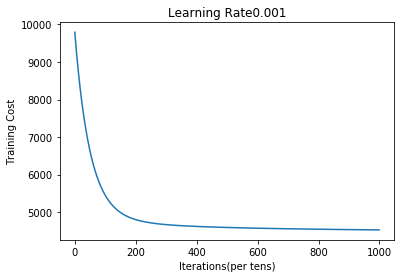

In [156]:
#Alpha = 0.001, iterations = 1000
linear_reg_model(X_train,y_train,X_val,y_val,0.001,10000)

In [159]:
for i in range(0, z_train.shape[1] - 1):
    print(data.columns[i], z_train.T[i])

NameError: name 'z_train' is not defined